In [1]:
import accessvis

In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import os
import pandas as pd
import os
import xarray as xr
import lavavu

from tqdm import tqdm
from scipy.ndimage import gaussian_filter

In [3]:
path="/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/3hr/pr/gn/latest"
file="pr_3hr_ACCESS-ESM1-5_historical_r1i1p1f1_gn_201001010130-201412312230.nc"

In [ ]:
ds=xr.open_dataset(f"{path}/{file}")
ds["pr"][0]

In [ ]:
ds_exa=ds.isel(time=2)["pr"]
ds_exa.time

In [ ]:
ds_exa.pr.data.shape

In [7]:
def get_interpolated(data, colourmap, blur=2.5):
    lat = data['lat'].values
    lon = data['lon'].values
    newlon = np.linspace(lon[0], lon[-1], 2048)
    newlat = np.linspace(lat[0], lat[-1], 1024)

    interpolated = data.interp(lon=newlon, lat=newlat, method="linear")
    if blur > 0:
        # interpolated_array=interpolated.to_dataarray()
        smoothed = gaussian_filter(interpolated, sigma=blur)
        #smoothed = median_filter(interpolated, size=blur)
    else:
        #No blur
        smoothed = interpolated

    #Convert to image, use raw interpolated data as opacity map for transparency
    rgba = accessvis.array_to_rgba(smoothed, flip=True, colourmap=colourmap, opacitymap=True)
    return rgba

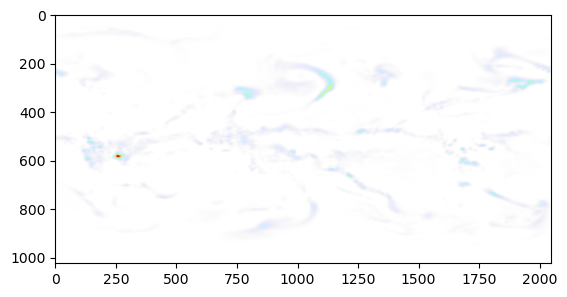

In [8]:
colours = get_interpolated(ds_exa, 'turbo')
# colours[:,:,3]
# np.unique(colours)
plt.imshow(colours)

In [29]:
ds["pr"][0].time.data

array('2010-01-01T01:30:00.000000000', dtype='datetime64[ns]')

In [101]:
def is_el_nino(date):
    el_nino_periods = [
        ("1991-04", "1992-06"),
        ("1994-06", "1995-04"),
        ("1997-04", "1998-05"),
        ("2002-06", "2003-02"),
        ("2004-07", "2005-03"),
        ("2006-09", "2007-02"),
        ("2009-06", "2010-05"),
        ("2014-09", "2014-12"),
    ]

    el_nino_ranges = [
        (pd.to_datetime(start), pd.to_datetime(end))
        for start, end in el_nino_periods
    ]
    """判断给定 datetime64 是否在 El Niño 时间区间内"""
    for start, end in el_nino_ranges:
        if start <= date <= end:
            return True
    return False



In [102]:
is_el_nino(ds["pr"][0].time.data)

True


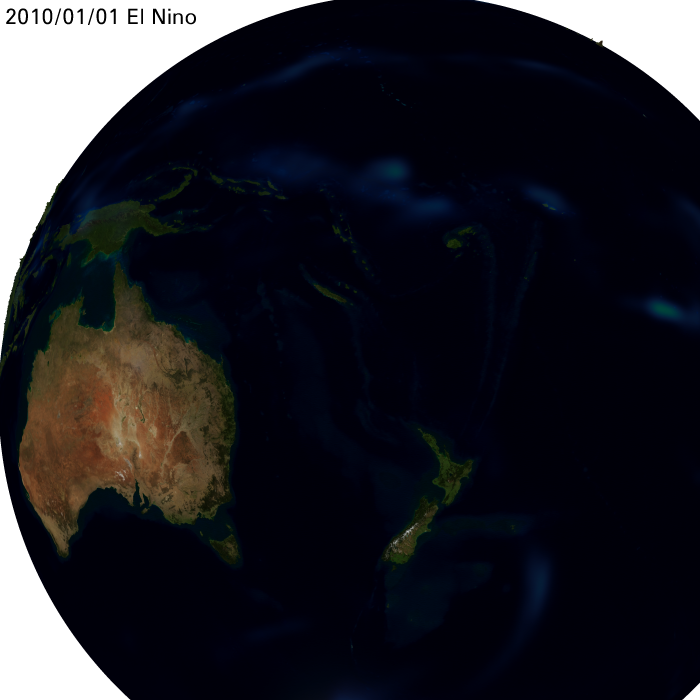

In [103]:
lv = accessvis.plot_earth(texture='bluemarble', background="white", vertical_exaggeration=20)
# lv.rotation(0.0, -125.0, 0.0) #Rotate to Australia
lv.translation(0.8, -0.75, -14.684)
lv.rotation(-145.839, -5, 181.435)
lv.set_properties(diffuse=0.6, ambient=0.85, specular=0.25, shininess=0.03, light=[1,1,0.98,1], lightpos=[0,0,10000,1]) # make pretty
# lv.brightness_contrast_saturation(0.5, 0.4, 0.4)
accessvis.update_earth_values(lv, dataMode=0, data=colours)
formatted_date = pd.to_datetime(ds["pr"][0].time.data).strftime('%Y/%m/%d')
la_el='El Nino'
# la_el=la_el.encode("utf-8")
# print(la_el.decode("utf-8"))
lv["title"]=f"-{formatted_date} {la_el}"
lv.display(resolution=(700,700))

  0%|          | 0/14608 [00:00<?, ?it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 1/14608 [00:00<3:43:32,  1.09it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 2/14608 [00:01<2:45:28,  1.47it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 3/14608 [00:01<2:22:19,  1.71it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 4/14608 [00:02<2:09:37,  1.88it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 5/14608 [00:02<2:02:42,  1.98it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 6/14608 [00:03<1:56:56,  2.08it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 7/14608 [00:03<1:51:38,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 8/14608 [00:04<1:48:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 9/14608 [00:04<1:45:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 10/14608 [00:04<1:44:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 11/14608 [00:05<1:43:24,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 12/14608 [00:05<1:43:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 13/14608 [00:06<1:43:35,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 14/14608 [00:06<1:43:20,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 15/14608 [00:07<1:43:09,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 16/14608 [00:07<1:43:06,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 17/14608 [00:07<1:42:58,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 18/14608 [00:08<1:43:24,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 19/14608 [00:08<1:44:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 20/14608 [00:09<1:45:18,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 21/14608 [00:09<1:46:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 22/14608 [00:10<1:46:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 23/14608 [00:10<1:46:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 24/14608 [00:10<1:46:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 25/14608 [00:11<1:47:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 26/14608 [00:11<1:47:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 27/14608 [00:12<1:47:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 28/14608 [00:12<1:47:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 29/14608 [00:13<1:47:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 30/14608 [00:13<1:47:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 31/14608 [00:14<1:47:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 32/14608 [00:14<1:47:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 33/14608 [00:14<1:47:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 34/14608 [00:15<1:47:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 35/14608 [00:15<1:47:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 36/14608 [00:16<1:47:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 37/14608 [00:16<1:47:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 38/14608 [00:17<1:47:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 39/14608 [00:17<1:47:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 40/14608 [00:18<1:47:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 41/14608 [00:18<1:47:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 42/14608 [00:18<1:47:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 43/14608 [00:19<1:46:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 44/14608 [00:19<1:46:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 45/14608 [00:20<1:46:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 46/14608 [00:20<1:46:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 47/14608 [00:21<1:47:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 48/14608 [00:21<1:46:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 49/14608 [00:21<1:46:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 50/14608 [00:22<1:46:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 51/14608 [00:22<1:46:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 52/14608 [00:23<1:48:34,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 53/14608 [00:23<1:48:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 54/14608 [00:24<1:47:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 55/14608 [00:24<1:46:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 56/14608 [00:25<1:46:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 57/14608 [00:25<1:47:51,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 58/14608 [00:25<1:46:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 59/14608 [00:26<1:46:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 60/14608 [00:26<1:45:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 61/14608 [00:27<1:45:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 62/14608 [00:27<1:45:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 63/14608 [00:28<1:45:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 64/14608 [00:28<1:44:40,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 65/14608 [00:28<1:44:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 66/14608 [00:29<1:44:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 67/14608 [00:29<1:44:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 68/14608 [00:30<1:44:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 69/14608 [00:30<1:44:23,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 70/14608 [00:31<1:44:17,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 71/14608 [00:31<1:44:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 72/14608 [00:31<1:44:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  0%|          | 73/14608 [00:32<1:44:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 74/14608 [00:32<1:44:16,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 75/14608 [00:33<1:44:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 76/14608 [00:33<1:44:13,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 77/14608 [00:34<1:44:25,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 78/14608 [00:34<1:44:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 79/14608 [00:35<1:44:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 80/14608 [00:35<1:44:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 81/14608 [00:35<1:44:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 82/14608 [00:36<1:44:35,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 83/14608 [00:36<1:44:50,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 84/14608 [00:37<1:44:36,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 85/14608 [00:37<1:44:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 86/14608 [00:38<1:44:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 87/14608 [00:38<1:44:15,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 88/14608 [00:38<1:43:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 89/14608 [00:39<1:44:05,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 90/14608 [00:39<1:44:15,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 91/14608 [00:40<1:44:15,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 92/14608 [00:40<1:44:05,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 93/14608 [00:41<1:44:24,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 94/14608 [00:41<1:44:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 95/14608 [00:41<1:44:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 96/14608 [00:42<1:43:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 97/14608 [00:42<1:43:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 98/14608 [00:43<1:43:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 99/14608 [00:43<1:43:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 100/14608 [00:44<1:43:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 101/14608 [00:44<1:43:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 102/14608 [00:44<1:43:25,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 103/14608 [00:45<1:43:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 104/14608 [00:45<1:43:23,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 105/14608 [00:46<1:43:24,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 106/14608 [00:46<1:43:23,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 107/14608 [00:47<1:43:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 108/14608 [00:47<1:43:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 109/14608 [00:47<1:43:21,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 110/14608 [00:48<1:43:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 111/14608 [00:48<1:43:16,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 112/14608 [00:49<1:43:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 113/14608 [00:49<1:43:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 114/14608 [00:50<1:43:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 115/14608 [00:50<1:43:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 116/14608 [00:50<1:43:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 117/14608 [00:51<1:43:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 118/14608 [00:51<1:43:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 119/14608 [00:52<1:43:21,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 120/14608 [00:52<1:43:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 121/14608 [00:53<1:43:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 122/14608 [00:53<1:43:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 123/14608 [00:53<1:43:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 124/14608 [00:54<1:43:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 125/14608 [00:54<1:43:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 126/14608 [00:55<1:43:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 127/14608 [00:55<1:43:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 128/14608 [00:56<1:43:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 129/14608 [00:56<1:43:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 130/14608 [00:56<1:43:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 131/14608 [00:57<1:43:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 132/14608 [00:57<1:46:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 133/14608 [00:58<1:45:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 134/14608 [00:58<1:44:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 135/14608 [00:59<1:44:16,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 136/14608 [00:59<1:44:07,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 137/14608 [00:59<1:43:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 138/14608 [01:00<1:43:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 139/14608 [01:00<1:43:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 140/14608 [01:01<1:43:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 141/14608 [01:01<1:43:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 142/14608 [01:02<1:43:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 143/14608 [01:02<1:43:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 144/14608 [01:02<1:43:58,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 145/14608 [01:03<1:43:45,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 146/14608 [01:03<1:43:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 147/14608 [01:04<1:43:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 148/14608 [01:04<1:43:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 149/14608 [01:05<1:43:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 150/14608 [01:05<1:43:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 151/14608 [01:05<1:43:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 152/14608 [01:06<1:43:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 153/14608 [01:06<1:43:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 154/14608 [01:07<1:43:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 155/14608 [01:07<1:43:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 156/14608 [01:08<1:45:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 157/14608 [01:08<1:45:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 158/14608 [01:08<1:44:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 159/14608 [01:09<1:44:11,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 160/14608 [01:09<1:43:53,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 161/14608 [01:10<1:43:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 162/14608 [01:10<1:43:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 163/14608 [01:11<1:43:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 164/14608 [01:11<1:43:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 165/14608 [01:11<1:43:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 166/14608 [01:12<1:43:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 167/14608 [01:12<1:43:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 168/14608 [01:13<1:43:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 169/14608 [01:13<1:43:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 170/14608 [01:14<1:43:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 171/14608 [01:14<1:43:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 172/14608 [01:14<1:43:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 173/14608 [01:15<1:42:57,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 174/14608 [01:15<1:43:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 175/14608 [01:16<1:43:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 176/14608 [01:16<1:43:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 177/14608 [01:17<1:42:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 178/14608 [01:17<1:43:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 179/14608 [01:17<1:42:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 180/14608 [01:18<1:43:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 181/14608 [01:18<1:42:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|          | 182/14608 [01:19<1:42:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 183/14608 [01:19<1:43:36,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 184/14608 [01:20<1:44:02,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 185/14608 [01:20<1:44:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 186/14608 [01:21<1:44:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 187/14608 [01:21<1:44:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 188/14608 [01:21<1:45:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 189/14608 [01:22<1:44:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 190/14608 [01:22<1:44:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 191/14608 [01:23<1:45:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 192/14608 [01:23<1:45:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 193/14608 [01:24<1:44:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 194/14608 [01:24<1:45:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 195/14608 [01:24<1:45:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 196/14608 [01:25<1:45:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 197/14608 [01:25<1:45:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 198/14608 [01:26<1:44:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 199/14608 [01:26<1:44:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 200/14608 [01:27<1:44:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 201/14608 [01:27<1:44:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 202/14608 [01:27<1:44:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 203/14608 [01:28<1:44:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 204/14608 [01:28<1:44:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 205/14608 [01:29<1:44:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 206/14608 [01:29<1:44:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 207/14608 [01:30<1:44:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 208/14608 [01:30<1:44:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 209/14608 [01:31<1:45:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 210/14608 [01:31<1:44:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 211/14608 [01:31<1:44:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 212/14608 [01:32<1:43:51,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 213/14608 [01:32<1:43:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 214/14608 [01:33<1:43:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 215/14608 [01:33<1:43:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 216/14608 [01:34<1:42:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 217/14608 [01:34<1:42:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 218/14608 [01:34<1:42:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  1%|▏         | 219/14608 [01:35<1:42:40,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 220/14608 [01:35<1:42:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 221/14608 [01:36<1:42:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 222/14608 [01:36<1:42:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 223/14608 [01:37<1:42:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 224/14608 [01:37<1:42:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 225/14608 [01:37<1:42:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 226/14608 [01:38<1:42:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 227/14608 [01:38<1:42:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 228/14608 [01:39<1:42:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 229/14608 [01:39<1:42:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 230/14608 [01:40<1:42:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 231/14608 [01:40<1:42:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 232/14608 [01:40<1:42:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 233/14608 [01:41<1:42:32,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 234/14608 [01:41<1:42:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 235/14608 [01:42<1:42:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 236/14608 [01:42<1:42:27,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 237/14608 [01:43<1:42:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 238/14608 [01:43<1:42:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 239/14608 [01:43<1:42:32,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 240/14608 [01:44<1:42:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 241/14608 [01:44<1:42:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 242/14608 [01:45<1:42:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 243/14608 [01:45<1:42:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 244/14608 [01:46<1:42:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 245/14608 [01:46<1:42:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 246/14608 [01:46<1:42:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 247/14608 [01:47<1:42:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 248/14608 [01:47<1:42:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 249/14608 [01:48<1:42:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 250/14608 [01:48<1:42:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 251/14608 [01:49<1:43:20,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 252/14608 [01:49<1:43:00,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 253/14608 [01:49<1:42:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 254/14608 [01:50<1:42:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 255/14608 [01:50<1:42:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 256/14608 [01:51<1:42:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 257/14608 [01:51<1:42:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 258/14608 [01:52<1:42:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 259/14608 [01:52<1:42:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 260/14608 [01:52<1:42:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 261/14608 [01:53<1:42:16,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 262/14608 [01:53<1:42:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 263/14608 [01:54<1:42:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 264/14608 [01:54<1:42:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 265/14608 [01:55<1:42:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 266/14608 [01:55<1:42:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 267/14608 [01:55<1:42:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 268/14608 [01:56<1:42:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 269/14608 [01:56<1:42:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 270/14608 [01:57<1:42:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 271/14608 [01:57<1:42:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 272/14608 [01:58<1:41:57,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 273/14608 [01:58<1:42:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 274/14608 [01:58<1:42:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 275/14608 [01:59<1:42:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 276/14608 [01:59<1:42:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 277/14608 [02:00<1:42:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 278/14608 [02:00<1:41:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 279/14608 [02:01<1:42:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 280/14608 [02:01<1:42:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 281/14608 [02:01<1:42:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 282/14608 [02:02<1:42:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 283/14608 [02:02<1:42:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 284/14608 [02:03<1:41:57,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 285/14608 [02:03<1:42:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 286/14608 [02:04<1:41:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 287/14608 [02:04<1:42:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 288/14608 [02:04<1:42:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 289/14608 [02:05<1:42:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 290/14608 [02:05<1:41:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 291/14608 [02:06<1:42:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 292/14608 [02:06<1:42:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 293/14608 [02:07<1:42:38,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 294/14608 [02:07<1:42:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 295/14608 [02:07<1:42:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 296/14608 [02:08<1:42:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 297/14608 [02:08<1:42:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 298/14608 [02:09<1:42:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 299/14608 [02:09<1:42:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 300/14608 [02:10<1:42:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 301/14608 [02:10<1:42:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 302/14608 [02:10<1:42:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 303/14608 [02:11<1:42:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 304/14608 [02:11<1:42:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 305/14608 [02:12<1:42:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 306/14608 [02:12<1:42:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 307/14608 [02:13<1:42:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 308/14608 [02:13<1:42:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 309/14608 [02:13<1:42:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 310/14608 [02:14<1:42:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 311/14608 [02:14<1:42:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 312/14608 [02:15<1:42:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 313/14608 [02:15<1:42:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 314/14608 [02:16<1:42:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 315/14608 [02:16<1:42:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 316/14608 [02:16<1:44:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 317/14608 [02:17<1:43:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 318/14608 [02:17<1:43:06,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 319/14608 [02:18<1:42:51,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 320/14608 [02:18<1:42:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 321/14608 [02:19<1:42:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 322/14608 [02:19<1:42:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 323/14608 [02:19<1:42:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 324/14608 [02:20<1:42:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 325/14608 [02:20<1:42:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 326/14608 [02:21<1:42:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 327/14608 [02:21<1:42:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 328/14608 [02:22<1:42:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 329/14608 [02:22<1:42:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 330/14608 [02:22<1:42:22,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 331/14608 [02:23<1:42:24,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 332/14608 [02:23<1:42:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 333/14608 [02:24<1:42:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 334/14608 [02:24<1:42:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 335/14608 [02:25<1:42:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 336/14608 [02:25<1:41:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 337/14608 [02:25<1:42:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 338/14608 [02:26<1:41:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 339/14608 [02:26<1:42:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 340/14608 [02:27<1:43:03,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 341/14608 [02:27<1:43:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 342/14608 [02:28<1:43:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 343/14608 [02:28<1:43:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 344/14608 [02:29<1:43:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 345/14608 [02:29<1:43:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 346/14608 [02:29<1:43:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 347/14608 [02:30<1:43:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 348/14608 [02:30<1:43:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 349/14608 [02:31<1:43:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 350/14608 [02:31<1:43:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 351/14608 [02:32<1:44:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 352/14608 [02:32<1:43:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 353/14608 [02:32<1:43:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 354/14608 [02:33<1:43:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 355/14608 [02:33<1:43:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 356/14608 [02:34<1:43:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 357/14608 [02:34<1:43:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 358/14608 [02:35<1:43:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 359/14608 [02:35<1:43:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 360/14608 [02:35<1:43:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 361/14608 [02:36<1:44:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 362/14608 [02:36<1:44:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 363/14608 [02:37<1:43:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 364/14608 [02:37<1:43:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  2%|▏         | 365/14608 [02:38<1:43:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 366/14608 [02:38<1:43:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 367/14608 [02:39<1:42:46,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 368/14608 [02:39<1:42:13,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 369/14608 [02:39<1:44:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 370/14608 [02:40<1:43:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 371/14608 [02:40<1:43:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 372/14608 [02:41<1:42:38,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 373/14608 [02:41<1:42:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 374/14608 [02:42<1:42:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 375/14608 [02:42<1:41:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 376/14608 [02:42<1:41:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 377/14608 [02:43<1:41:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 378/14608 [02:43<1:41:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 379/14608 [02:44<1:41:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 380/14608 [02:44<1:43:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 381/14608 [02:45<1:43:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 382/14608 [02:45<1:43:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 383/14608 [02:45<1:42:45,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 384/14608 [02:46<1:42:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 385/14608 [02:46<1:41:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 386/14608 [02:47<1:41:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 387/14608 [02:47<1:41:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 388/14608 [02:48<1:41:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 389/14608 [02:48<1:41:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 390/14608 [02:48<1:41:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 391/14608 [02:49<1:41:55,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 392/14608 [02:49<1:41:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 393/14608 [02:50<1:41:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 394/14608 [02:50<1:41:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 395/14608 [02:51<1:41:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 396/14608 [02:51<1:41:24,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 397/14608 [02:51<1:41:25,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 398/14608 [02:52<1:41:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 399/14608 [02:52<1:41:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 400/14608 [02:53<1:41:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 401/14608 [02:53<1:41:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 402/14608 [02:54<1:41:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 403/14608 [02:54<1:41:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 404/14608 [02:54<1:41:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 405/14608 [02:55<1:41:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 406/14608 [02:55<1:41:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 407/14608 [02:56<1:41:21,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 408/14608 [02:56<1:41:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 409/14608 [02:57<1:41:16,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 410/14608 [02:57<1:41:50,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 411/14608 [02:57<1:41:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 412/14608 [02:58<1:41:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 413/14608 [02:58<1:41:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 414/14608 [02:59<1:41:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 415/14608 [02:59<1:41:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 416/14608 [03:00<1:41:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 417/14608 [03:00<1:41:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 418/14608 [03:00<1:41:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 419/14608 [03:01<1:41:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 420/14608 [03:01<1:41:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 421/14608 [03:02<1:41:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 422/14608 [03:02<1:41:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 423/14608 [03:03<1:41:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 424/14608 [03:03<1:41:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 425/14608 [03:03<1:41:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 426/14608 [03:04<1:41:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 427/14608 [03:04<1:41:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 428/14608 [03:05<1:41:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 429/14608 [03:05<1:41:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 430/14608 [03:06<1:41:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 431/14608 [03:06<1:41:37,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 432/14608 [03:06<1:41:51,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 433/14608 [03:07<1:41:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 434/14608 [03:07<1:41:59,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 435/14608 [03:08<1:41:47,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 436/14608 [03:08<1:41:47,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 437/14608 [03:09<1:41:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 438/14608 [03:09<1:41:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 439/14608 [03:10<1:41:55,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 440/14608 [03:10<1:41:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 441/14608 [03:10<1:41:39,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 442/14608 [03:11<1:41:43,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 443/14608 [03:11<1:41:50,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 444/14608 [03:12<1:41:46,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 445/14608 [03:12<1:41:46,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 446/14608 [03:13<1:41:45,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 447/14608 [03:13<1:41:46,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 448/14608 [03:13<1:41:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 449/14608 [03:14<1:41:53,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 450/14608 [03:14<1:42:09,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 451/14608 [03:15<1:42:17,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 452/14608 [03:15<1:42:10,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 453/14608 [03:16<1:42:00,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 454/14608 [03:16<1:42:02,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 455/14608 [03:16<1:42:03,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 456/14608 [03:17<1:42:02,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 457/14608 [03:17<1:41:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 458/14608 [03:18<1:41:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 459/14608 [03:18<1:41:51,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 460/14608 [03:19<1:41:56,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 461/14608 [03:19<1:41:48,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 462/14608 [03:19<1:41:56,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 463/14608 [03:20<1:42:04,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 464/14608 [03:20<1:42:07,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 465/14608 [03:21<1:42:00,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 466/14608 [03:21<1:42:00,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 467/14608 [03:22<1:41:56,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 468/14608 [03:22<1:41:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 469/14608 [03:22<1:41:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 470/14608 [03:23<1:41:48,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 471/14608 [03:23<1:41:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 472/14608 [03:24<1:41:55,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 473/14608 [03:24<1:41:56,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 474/14608 [03:25<1:41:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 475/14608 [03:25<1:41:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 476/14608 [03:25<1:41:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 477/14608 [03:26<1:41:43,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 478/14608 [03:26<1:41:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 479/14608 [03:27<1:41:50,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 480/14608 [03:27<1:41:48,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 481/14608 [03:28<1:41:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 482/14608 [03:28<1:41:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 483/14608 [03:29<1:41:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 484/14608 [03:29<1:43:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 485/14608 [03:29<1:43:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 486/14608 [03:30<1:42:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 487/14608 [03:30<1:42:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 488/14608 [03:31<1:42:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 489/14608 [03:31<1:41:54,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 490/14608 [03:32<1:41:56,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 491/14608 [03:32<1:41:51,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 492/14608 [03:32<1:41:47,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 493/14608 [03:33<1:41:40,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 494/14608 [03:33<1:41:45,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 495/14608 [03:34<1:41:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 496/14608 [03:34<1:41:45,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 497/14608 [03:35<1:41:43,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 498/14608 [03:35<1:41:40,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 499/14608 [03:35<1:41:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 500/14608 [03:36<1:41:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 501/14608 [03:36<1:41:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 502/14608 [03:37<1:41:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 503/14608 [03:37<1:41:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 504/14608 [03:38<1:41:25,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 505/14608 [03:38<1:41:28,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 506/14608 [03:38<1:41:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 507/14608 [03:39<1:41:38,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 508/14608 [03:39<1:41:25,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 509/14608 [03:40<1:41:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 510/14608 [03:40<1:41:23,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  3%|▎         | 511/14608 [03:41<1:41:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 512/14608 [03:41<1:41:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 513/14608 [03:42<1:41:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 514/14608 [03:42<1:41:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 515/14608 [03:42<1:41:25,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 516/14608 [03:43<1:41:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 517/14608 [03:43<1:41:23,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 518/14608 [03:44<1:41:17,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 519/14608 [03:44<1:41:26,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 520/14608 [03:45<1:41:12,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 521/14608 [03:45<1:41:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 522/14608 [03:45<1:41:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 523/14608 [03:46<1:41:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 524/14608 [03:46<1:41:09,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 525/14608 [03:47<1:40:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 526/14608 [03:47<1:40:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 527/14608 [03:48<1:40:29,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 528/14608 [03:48<1:43:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 529/14608 [03:48<1:42:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 530/14608 [03:49<1:41:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 531/14608 [03:49<1:41:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 532/14608 [03:50<1:41:03,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 533/14608 [03:50<1:40:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 534/14608 [03:51<1:40:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 535/14608 [03:51<1:40:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 536/14608 [03:51<1:40:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 537/14608 [03:52<1:42:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 538/14608 [03:52<1:42:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 539/14608 [03:53<1:41:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 540/14608 [03:53<1:41:23,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 541/14608 [03:54<1:41:05,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 542/14608 [03:54<1:40:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 543/14608 [03:54<1:40:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 544/14608 [03:55<1:40:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 545/14608 [03:55<1:40:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 546/14608 [03:56<1:40:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▎         | 547/14608 [03:56<1:40:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 548/14608 [03:57<1:40:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 549/14608 [03:57<1:40:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 550/14608 [03:57<1:40:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 551/14608 [03:58<1:41:36,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 552/14608 [03:58<1:41:10,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 553/14608 [03:59<1:40:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 554/14608 [03:59<1:40:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 555/14608 [04:00<1:40:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 556/14608 [04:00<1:40:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 557/14608 [04:00<1:40:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 558/14608 [04:01<1:40:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 559/14608 [04:01<1:40:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 560/14608 [04:02<1:40:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 561/14608 [04:02<1:40:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 562/14608 [04:03<1:40:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 563/14608 [04:03<1:40:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 564/14608 [04:03<1:40:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 565/14608 [04:04<1:40:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 566/14608 [04:04<1:40:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 567/14608 [04:05<1:40:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 568/14608 [04:05<1:40:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 569/14608 [04:06<1:40:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 570/14608 [04:06<1:40:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 571/14608 [04:06<1:40:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 572/14608 [04:07<1:40:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 573/14608 [04:07<1:40:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 574/14608 [04:08<1:40:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 575/14608 [04:08<1:40:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 576/14608 [04:09<1:40:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 577/14608 [04:09<1:40:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 578/14608 [04:09<1:40:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 579/14608 [04:10<1:40:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 580/14608 [04:10<1:40:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 581/14608 [04:11<1:40:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 582/14608 [04:11<1:40:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 583/14608 [04:12<1:40:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 584/14608 [04:12<1:40:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 585/14608 [04:13<1:42:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 586/14608 [04:13<1:41:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 587/14608 [04:13<1:41:19,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 588/14608 [04:14<1:40:47,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 589/14608 [04:14<1:40:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 590/14608 [04:15<1:40:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 591/14608 [04:15<1:40:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 592/14608 [04:16<1:40:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 593/14608 [04:16<1:40:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 594/14608 [04:16<1:40:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 595/14608 [04:17<1:40:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 596/14608 [04:17<1:40:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 597/14608 [04:18<1:40:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 598/14608 [04:18<1:39:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 599/14608 [04:19<1:40:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 600/14608 [04:19<1:40:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 601/14608 [04:19<1:40:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 602/14608 [04:20<1:39:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 603/14608 [04:20<1:39:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 604/14608 [04:21<1:39:42,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 605/14608 [04:21<1:39:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 606/14608 [04:21<1:39:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 607/14608 [04:22<1:39:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 608/14608 [04:22<1:39:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 609/14608 [04:23<1:40:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 610/14608 [04:23<1:40:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 611/14608 [04:24<1:40:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 612/14608 [04:24<1:40:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 613/14608 [04:25<1:40:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 614/14608 [04:25<1:39:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 615/14608 [04:25<1:40:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 616/14608 [04:26<1:39:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 617/14608 [04:26<1:39:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 618/14608 [04:27<1:39:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 619/14608 [04:27<1:41:06,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 620/14608 [04:28<1:40:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 621/14608 [04:28<1:40:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 622/14608 [04:28<1:40:22,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 623/14608 [04:29<1:40:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 624/14608 [04:29<1:39:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 625/14608 [04:30<1:40:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 626/14608 [04:30<1:39:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 627/14608 [04:31<1:39:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 628/14608 [04:31<1:39:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 629/14608 [04:31<1:39:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 630/14608 [04:32<1:39:41,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 631/14608 [04:32<1:39:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 632/14608 [04:33<1:39:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 633/14608 [04:33<1:39:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 634/14608 [04:34<1:39:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 635/14608 [04:34<1:39:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 636/14608 [04:34<1:39:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 637/14608 [04:35<1:39:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 638/14608 [04:35<1:39:40,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 639/14608 [04:36<1:39:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 640/14608 [04:36<1:39:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 641/14608 [04:37<1:39:39,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 642/14608 [04:37<1:39:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 643/14608 [04:37<1:39:34,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 644/14608 [04:38<1:41:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 645/14608 [04:38<1:41:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 646/14608 [04:39<1:41:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 647/14608 [04:39<1:41:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 648/14608 [04:40<1:41:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 649/14608 [04:40<1:41:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 650/14608 [04:40<1:41:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 651/14608 [04:41<1:41:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 652/14608 [04:41<1:41:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 653/14608 [04:42<1:41:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 654/14608 [04:42<1:41:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 655/14608 [04:43<1:41:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 656/14608 [04:43<1:41:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  4%|▍         | 657/14608 [04:44<1:41:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 658/14608 [04:44<1:41:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 659/14608 [04:44<1:41:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 660/14608 [04:45<1:41:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 661/14608 [04:45<1:41:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 662/14608 [04:46<1:41:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 663/14608 [04:46<1:41:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 664/14608 [04:47<1:41:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 665/14608 [04:47<1:41:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 666/14608 [04:47<1:41:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 667/14608 [04:48<1:41:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 668/14608 [04:48<1:41:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 669/14608 [04:49<1:40:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 670/14608 [04:49<1:40:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 671/14608 [04:50<1:40:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 672/14608 [04:50<1:40:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 673/14608 [04:50<1:40:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 674/14608 [04:51<1:40:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 675/14608 [04:51<1:40:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 676/14608 [04:52<1:40:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 677/14608 [04:52<1:40:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 678/14608 [04:53<1:40:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 679/14608 [04:53<1:40:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 680/14608 [04:54<1:40:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 681/14608 [04:54<1:40:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 682/14608 [04:54<1:40:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 683/14608 [04:55<1:40:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 684/14608 [04:55<1:40:38,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 685/14608 [04:56<1:40:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 686/14608 [04:56<1:40:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 687/14608 [04:57<1:43:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 688/14608 [04:57<1:42:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 689/14608 [04:57<1:41:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 690/14608 [04:58<1:40:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 691/14608 [04:58<1:40:17,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 692/14608 [04:59<1:40:16,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 693/14608 [04:59<1:39:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 694/14608 [05:00<1:39:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 695/14608 [05:00<1:39:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 696/14608 [05:00<1:41:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 697/14608 [05:01<1:41:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 698/14608 [05:01<1:41:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 699/14608 [05:02<1:40:26,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 700/14608 [05:02<1:40:10,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 701/14608 [05:03<1:39:47,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 702/14608 [05:03<1:39:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 703/14608 [05:03<1:39:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 704/14608 [05:04<1:39:53,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 705/14608 [05:04<1:39:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 706/14608 [05:05<1:39:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 707/14608 [05:05<1:39:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 708/14608 [05:06<1:39:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 709/14608 [05:06<1:39:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 710/14608 [05:06<1:39:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 711/14608 [05:07<1:39:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 712/14608 [05:07<1:39:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 713/14608 [05:08<1:39:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 714/14608 [05:08<1:39:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 715/14608 [05:09<1:39:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 716/14608 [05:09<1:39:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 717/14608 [05:10<1:39:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 718/14608 [05:10<1:39:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 719/14608 [05:10<1:39:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 720/14608 [05:11<1:39:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 721/14608 [05:11<1:39:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 722/14608 [05:12<1:39:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 723/14608 [05:12<1:39:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 724/14608 [05:13<1:39:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 725/14608 [05:13<1:38:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 726/14608 [05:13<1:38:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 727/14608 [05:14<1:38:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 728/14608 [05:14<1:39:47,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 729/14608 [05:15<1:39:38,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▍         | 730/14608 [05:15<1:39:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 731/14608 [05:16<1:39:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 732/14608 [05:16<1:39:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 733/14608 [05:16<1:39:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 734/14608 [05:17<1:39:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 735/14608 [05:17<1:39:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 736/14608 [05:18<1:39:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 737/14608 [05:18<1:38:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 738/14608 [05:19<1:39:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 739/14608 [05:19<1:39:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 740/14608 [05:19<1:39:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 741/14608 [05:20<1:38:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 742/14608 [05:20<1:38:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 743/14608 [05:21<1:38:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 744/14608 [05:21<1:38:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 745/14608 [05:22<1:38:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 746/14608 [05:22<1:39:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 747/14608 [05:22<1:39:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 748/14608 [05:23<1:39:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 749/14608 [05:23<1:39:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 750/14608 [05:24<1:39:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 751/14608 [05:24<1:38:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 752/14608 [05:25<1:38:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 753/14608 [05:25<1:38:42,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 754/14608 [05:25<1:38:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 755/14608 [05:26<1:38:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 756/14608 [05:26<1:39:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 757/14608 [05:27<1:39:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 758/14608 [05:27<1:38:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 759/14608 [05:28<1:39:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 760/14608 [05:28<1:38:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 761/14608 [05:28<1:39:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 762/14608 [05:29<1:38:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 763/14608 [05:29<1:38:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 764/14608 [05:30<1:38:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 765/14608 [05:30<1:39:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 766/14608 [05:31<1:38:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 767/14608 [05:31<1:38:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 768/14608 [05:31<1:38:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 769/14608 [05:32<1:39:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 770/14608 [05:32<1:38:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 771/14608 [05:33<1:38:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 772/14608 [05:33<1:38:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 773/14608 [05:34<1:38:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 774/14608 [05:34<1:38:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 775/14608 [05:34<1:38:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 776/14608 [05:35<1:38:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 777/14608 [05:35<1:38:41,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 778/14608 [05:36<1:38:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 779/14608 [05:36<1:38:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 780/14608 [05:37<1:38:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 781/14608 [05:37<1:38:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 782/14608 [05:37<1:38:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 783/14608 [05:38<1:38:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 784/14608 [05:38<1:38:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 785/14608 [05:39<1:38:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 786/14608 [05:39<1:38:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 787/14608 [05:40<1:38:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 788/14608 [05:40<1:38:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 789/14608 [05:40<1:38:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 790/14608 [05:41<1:38:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 791/14608 [05:41<1:38:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 792/14608 [05:42<1:38:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 793/14608 [05:42<1:38:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 794/14608 [05:43<1:38:29,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 795/14608 [05:43<1:38:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 796/14608 [05:43<1:38:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 797/14608 [05:44<1:38:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 798/14608 [05:44<1:40:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 799/14608 [05:45<1:40:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 800/14608 [05:45<1:39:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 801/14608 [05:46<1:39:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 802/14608 [05:46<1:38:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  5%|▌         | 803/14608 [05:46<1:38:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 804/14608 [05:47<1:38:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 805/14608 [05:47<1:38:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 806/14608 [05:48<1:38:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 807/14608 [05:48<1:38:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 808/14608 [05:49<1:38:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 809/14608 [05:49<1:38:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 810/14608 [05:49<1:38:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 811/14608 [05:50<1:38:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 812/14608 [05:50<1:38:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 813/14608 [05:51<1:38:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 814/14608 [05:51<1:38:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 815/14608 [05:52<1:38:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 816/14608 [05:52<1:38:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 817/14608 [05:52<1:38:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 818/14608 [05:53<1:38:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 819/14608 [05:53<1:38:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 820/14608 [05:54<1:38:23,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 821/14608 [05:54<1:38:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 822/14608 [05:55<1:38:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 823/14608 [05:55<1:38:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 824/14608 [05:55<1:38:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 825/14608 [05:56<1:38:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 826/14608 [05:56<1:38:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 827/14608 [05:57<1:38:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 828/14608 [05:57<1:38:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 829/14608 [05:58<1:38:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 830/14608 [05:58<1:38:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 831/14608 [05:58<1:38:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 832/14608 [05:59<1:38:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 833/14608 [05:59<1:41:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 834/14608 [06:00<1:40:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 835/14608 [06:00<1:40:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 836/14608 [06:01<1:39:27,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 837/14608 [06:01<1:39:27,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 838/14608 [06:01<1:39:02,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 839/14608 [06:02<1:41:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 840/14608 [06:02<1:41:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 841/14608 [06:03<1:40:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 842/14608 [06:03<1:39:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 843/14608 [06:04<1:39:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 844/14608 [06:04<1:39:07,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 845/14608 [06:04<1:39:02,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 846/14608 [06:05<1:38:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 847/14608 [06:05<1:38:43,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 848/14608 [06:06<1:38:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 849/14608 [06:06<1:38:40,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 850/14608 [06:07<1:38:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 851/14608 [06:07<1:38:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 852/14608 [06:08<1:38:50,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 853/14608 [06:08<1:38:45,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 854/14608 [06:08<1:38:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 855/14608 [06:09<1:39:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 856/14608 [06:09<1:39:20,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 857/14608 [06:10<1:39:11,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 858/14608 [06:10<1:38:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 859/14608 [06:11<1:38:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 860/14608 [06:11<1:38:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 861/14608 [06:11<1:38:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 862/14608 [06:12<1:38:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 863/14608 [06:12<1:38:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 864/14608 [06:13<1:38:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 865/14608 [06:13<1:38:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 866/14608 [06:14<1:38:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 867/14608 [06:14<1:38:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 868/14608 [06:14<1:38:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 869/14608 [06:15<1:38:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 870/14608 [06:15<1:38:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 871/14608 [06:16<1:38:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 872/14608 [06:16<1:38:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 873/14608 [06:17<1:38:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 874/14608 [06:17<1:38:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 875/14608 [06:17<1:38:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 876/14608 [06:18<1:38:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 877/14608 [06:18<1:38:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 878/14608 [06:19<1:38:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 879/14608 [06:19<1:38:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 880/14608 [06:20<1:37:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 881/14608 [06:20<1:38:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 882/14608 [06:20<1:38:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 883/14608 [06:21<1:37:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 884/14608 [06:21<1:38:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 885/14608 [06:22<1:37:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 886/14608 [06:22<1:38:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 887/14608 [06:23<1:38:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 888/14608 [06:23<1:38:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 889/14608 [06:23<1:38:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 890/14608 [06:24<1:38:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 891/14608 [06:24<1:38:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 892/14608 [06:25<1:37:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 893/14608 [06:25<1:37:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 894/14608 [06:26<1:41:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 895/14608 [06:26<1:40:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 896/14608 [06:26<1:40:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 897/14608 [06:27<1:39:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 898/14608 [06:27<1:39:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 899/14608 [06:28<1:39:03,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 900/14608 [06:28<1:39:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 901/14608 [06:29<1:38:59,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 902/14608 [06:29<1:38:43,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 903/14608 [06:29<1:38:40,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 904/14608 [06:30<1:38:39,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 905/14608 [06:30<1:38:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 906/14608 [06:31<1:38:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 907/14608 [06:31<1:38:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 908/14608 [06:32<1:38:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 909/14608 [06:32<1:38:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 910/14608 [06:32<1:38:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 911/14608 [06:33<1:38:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▌         | 912/14608 [06:33<1:38:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 913/14608 [06:34<1:38:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 914/14608 [06:34<1:38:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 915/14608 [06:35<1:38:51,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 916/14608 [06:35<1:38:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 917/14608 [06:36<1:38:35,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 918/14608 [06:36<1:38:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 919/14608 [06:36<1:38:17,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 920/14608 [06:37<1:38:15,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 921/14608 [06:37<1:38:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 922/14608 [06:38<1:37:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 923/14608 [06:38<1:38:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 924/14608 [06:39<1:37:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 925/14608 [06:39<1:37:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 926/14608 [06:39<1:37:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 927/14608 [06:40<1:37:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 928/14608 [06:40<1:38:06,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 929/14608 [06:41<1:37:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 930/14608 [06:41<1:37:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 931/14608 [06:42<1:37:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 932/14608 [06:42<1:37:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 933/14608 [06:42<1:37:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 934/14608 [06:43<1:37:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 935/14608 [06:43<1:37:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 936/14608 [06:44<1:37:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 937/14608 [06:44<1:37:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 938/14608 [06:45<1:37:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 939/14608 [06:45<1:37:27,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 940/14608 [06:45<1:37:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 941/14608 [06:46<1:37:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 942/14608 [06:46<1:37:32,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 943/14608 [06:47<1:37:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 944/14608 [06:47<1:37:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 945/14608 [06:48<1:37:29,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 946/14608 [06:48<1:37:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 947/14608 [06:48<1:37:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 948/14608 [06:49<1:37:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  6%|▋         | 949/14608 [06:49<1:37:27,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 950/14608 [06:50<1:39:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 951/14608 [06:50<1:38:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 952/14608 [06:51<1:38:17,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 953/14608 [06:51<1:38:00,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 954/14608 [06:51<1:37:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 955/14608 [06:52<1:37:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 956/14608 [06:52<1:37:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 957/14608 [06:53<1:37:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 958/14608 [06:53<1:37:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 959/14608 [06:54<1:37:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 960/14608 [06:54<1:37:21,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 961/14608 [06:54<1:37:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 962/14608 [06:55<1:37:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 963/14608 [06:55<1:37:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 964/14608 [06:56<1:37:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 965/14608 [06:56<1:37:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 966/14608 [06:57<1:37:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 967/14608 [06:57<1:37:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 968/14608 [06:57<1:37:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 969/14608 [06:58<1:37:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 970/14608 [06:58<1:37:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 971/14608 [06:59<1:37:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 972/14608 [06:59<1:37:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 973/14608 [07:00<1:37:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 974/14608 [07:00<1:37:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 975/14608 [07:00<1:37:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 976/14608 [07:01<1:37:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 977/14608 [07:01<1:37:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 978/14608 [07:02<1:37:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 979/14608 [07:02<1:37:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 980/14608 [07:03<1:37:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 981/14608 [07:03<1:37:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 982/14608 [07:03<1:37:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 983/14608 [07:04<1:37:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 984/14608 [07:04<1:37:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 985/14608 [07:05<1:37:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 986/14608 [07:05<1:37:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 987/14608 [07:06<1:37:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 988/14608 [07:06<1:37:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 989/14608 [07:06<1:36:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 990/14608 [07:07<1:37:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 991/14608 [07:07<1:37:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 992/14608 [07:08<1:36:57,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 993/14608 [07:08<1:37:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 994/14608 [07:09<1:39:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 995/14608 [07:09<1:38:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 996/14608 [07:09<1:38:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 997/14608 [07:10<1:37:50,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 998/14608 [07:10<1:37:43,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 999/14608 [07:11<1:37:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1000/14608 [07:11<1:37:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1001/14608 [07:12<1:37:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1002/14608 [07:12<1:37:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1003/14608 [07:12<1:39:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1004/14608 [07:13<1:39:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1005/14608 [07:13<1:38:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1006/14608 [07:14<1:38:16,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1007/14608 [07:14<1:38:01,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1008/14608 [07:15<1:37:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1009/14608 [07:15<1:37:30,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1010/14608 [07:15<1:37:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1011/14608 [07:16<1:37:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1012/14608 [07:16<1:37:28,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1013/14608 [07:17<1:37:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1014/14608 [07:17<1:37:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1015/14608 [07:18<1:37:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1016/14608 [07:18<1:37:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1017/14608 [07:18<1:37:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1018/14608 [07:19<1:36:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1019/14608 [07:19<1:37:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1020/14608 [07:20<1:37:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1021/14608 [07:20<1:37:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1022/14608 [07:21<1:36:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1023/14608 [07:21<1:37:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1024/14608 [07:21<1:36:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1025/14608 [07:22<1:37:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1026/14608 [07:22<1:36:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1027/14608 [07:23<1:36:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1028/14608 [07:23<1:36:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1029/14608 [07:24<1:36:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1030/14608 [07:24<1:36:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1031/14608 [07:24<1:36:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1032/14608 [07:25<1:36:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1033/14608 [07:25<1:36:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1034/14608 [07:26<1:36:49,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1035/14608 [07:26<1:37:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1036/14608 [07:27<1:37:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1037/14608 [07:27<1:37:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1038/14608 [07:27<1:37:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1039/14608 [07:28<1:37:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1040/14608 [07:28<1:36:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1041/14608 [07:29<1:36:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1042/14608 [07:29<1:36:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1043/14608 [07:30<1:36:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1044/14608 [07:30<1:36:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1045/14608 [07:30<1:36:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1046/14608 [07:31<1:36:41,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1047/14608 [07:31<1:36:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1048/14608 [07:32<1:36:44,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1049/14608 [07:32<1:36:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1050/14608 [07:33<1:37:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1051/14608 [07:33<1:37:16,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1052/14608 [07:33<1:36:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1053/14608 [07:34<1:36:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1054/14608 [07:34<1:36:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1055/14608 [07:35<1:36:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1056/14608 [07:35<1:36:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1057/14608 [07:36<1:36:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1058/14608 [07:36<1:36:40,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1059/14608 [07:36<1:36:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1060/14608 [07:37<1:36:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1061/14608 [07:37<1:36:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1062/14608 [07:38<1:36:21,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1063/14608 [07:38<1:36:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1064/14608 [07:39<1:36:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1065/14608 [07:39<1:36:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1066/14608 [07:39<1:36:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1067/14608 [07:40<1:36:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1068/14608 [07:40<1:36:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1069/14608 [07:41<1:36:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1070/14608 [07:41<1:36:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1071/14608 [07:42<1:36:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1072/14608 [07:42<1:36:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1073/14608 [07:42<1:36:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1074/14608 [07:43<1:36:23,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1075/14608 [07:43<1:36:34,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1076/14608 [07:44<1:36:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1077/14608 [07:44<1:36:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1078/14608 [07:45<1:36:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1079/14608 [07:45<1:36:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1080/14608 [07:45<1:36:22,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1081/14608 [07:46<1:36:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1082/14608 [07:46<1:36:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1083/14608 [07:47<1:36:24,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1084/14608 [07:47<1:36:16,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1085/14608 [07:48<1:36:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1086/14608 [07:48<1:36:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1087/14608 [07:48<1:36:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1088/14608 [07:49<1:36:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1089/14608 [07:49<1:36:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1090/14608 [07:50<1:36:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1091/14608 [07:50<1:36:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1092/14608 [07:51<1:36:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1093/14608 [07:51<1:36:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1094/14608 [07:51<1:36:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  7%|▋         | 1095/14608 [07:52<1:36:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1096/14608 [07:52<1:36:25,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1097/14608 [07:53<1:36:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1098/14608 [07:53<1:36:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1099/14608 [07:54<1:36:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1100/14608 [07:54<1:36:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1101/14608 [07:54<1:36:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1102/14608 [07:55<1:36:22,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1103/14608 [07:55<1:36:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1104/14608 [07:56<1:36:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1105/14608 [07:56<1:38:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1106/14608 [07:57<1:37:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1107/14608 [07:57<1:37:27,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1108/14608 [07:57<1:36:59,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1109/14608 [07:58<1:36:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1110/14608 [07:58<1:36:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1111/14608 [07:59<1:36:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1112/14608 [07:59<1:36:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1113/14608 [08:00<1:36:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1114/14608 [08:00<1:35:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1115/14608 [08:00<1:36:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1116/14608 [08:01<1:36:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1117/14608 [08:01<1:36:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1118/14608 [08:02<1:36:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1119/14608 [08:02<1:36:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1120/14608 [08:03<1:36:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1121/14608 [08:03<1:36:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1122/14608 [08:03<1:36:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1123/14608 [08:04<1:36:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1124/14608 [08:04<1:35:49,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1125/14608 [08:05<1:36:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1126/14608 [08:05<1:35:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1127/14608 [08:06<1:36:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1128/14608 [08:06<1:36:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1129/14608 [08:06<1:36:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1130/14608 [08:07<1:36:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1131/14608 [08:07<1:36:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1132/14608 [08:08<1:36:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1133/14608 [08:08<1:36:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1134/14608 [08:09<1:36:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1135/14608 [08:09<1:36:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1136/14608 [08:09<1:36:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1137/14608 [08:10<1:36:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1138/14608 [08:10<1:36:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1139/14608 [08:11<1:36:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1140/14608 [08:11<1:36:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1141/14608 [08:12<1:36:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1142/14608 [08:12<1:36:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1143/14608 [08:12<1:36:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1144/14608 [08:13<1:36:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1145/14608 [08:13<1:36:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1146/14608 [08:14<1:36:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1147/14608 [08:14<1:36:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1148/14608 [08:15<1:36:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1149/14608 [08:15<1:36:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1150/14608 [08:15<1:36:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1151/14608 [08:16<1:36:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1152/14608 [08:16<1:38:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1153/14608 [08:17<1:37:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1154/14608 [08:17<1:37:13,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1155/14608 [08:18<1:36:46,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1156/14608 [08:18<1:36:45,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1157/14608 [08:18<1:36:30,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1158/14608 [08:19<1:36:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1159/14608 [08:19<1:36:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1160/14608 [08:20<1:36:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1161/14608 [08:20<1:38:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1162/14608 [08:21<1:38:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1163/14608 [08:21<1:37:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1164/14608 [08:22<1:37:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1165/14608 [08:22<1:36:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1166/14608 [08:22<1:36:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1167/14608 [08:23<1:36:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1168/14608 [08:23<1:36:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1169/14608 [08:24<1:36:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1170/14608 [08:24<1:36:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1171/14608 [08:25<1:36:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1172/14608 [08:25<1:36:36,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1173/14608 [08:25<1:36:30,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1174/14608 [08:26<1:36:24,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1175/14608 [08:26<1:36:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1176/14608 [08:27<1:36:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1177/14608 [08:27<1:36:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1178/14608 [08:28<1:36:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1179/14608 [08:28<1:36:16,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1180/14608 [08:28<1:36:20,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1181/14608 [08:29<1:36:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1182/14608 [08:29<1:36:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1183/14608 [08:30<1:35:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1184/14608 [08:30<1:35:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1185/14608 [08:31<1:35:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1186/14608 [08:31<1:35:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1187/14608 [08:31<1:35:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1188/14608 [08:32<1:35:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1189/14608 [08:32<1:35:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1190/14608 [08:33<1:35:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1191/14608 [08:33<1:35:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1192/14608 [08:34<1:35:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1193/14608 [08:34<1:36:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1194/14608 [08:34<1:35:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1195/14608 [08:35<1:35:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1196/14608 [08:35<1:35:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1197/14608 [08:36<1:35:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1198/14608 [08:36<1:36:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1199/14608 [08:37<1:35:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1200/14608 [08:37<1:36:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1201/14608 [08:37<1:36:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1202/14608 [08:38<1:36:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1203/14608 [08:38<1:36:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1204/14608 [08:39<1:36:12,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1205/14608 [08:39<1:36:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1206/14608 [08:40<1:36:09,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1207/14608 [08:40<1:35:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1208/14608 [08:40<1:36:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1209/14608 [08:41<1:35:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1210/14608 [08:41<1:35:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1211/14608 [08:42<1:35:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1212/14608 [08:42<1:35:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1213/14608 [08:43<1:35:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1214/14608 [08:43<1:35:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1215/14608 [08:43<1:35:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1216/14608 [08:44<1:35:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1217/14608 [08:44<1:35:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1218/14608 [08:45<1:35:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1219/14608 [08:45<1:35:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1220/14608 [08:46<1:35:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1221/14608 [08:46<1:35:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1222/14608 [08:46<1:35:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1223/14608 [08:47<1:35:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1224/14608 [08:47<1:35:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1225/14608 [08:48<1:35:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1226/14608 [08:48<1:35:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1227/14608 [08:49<1:35:29,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1228/14608 [08:49<1:35:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1229/14608 [08:49<1:35:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1230/14608 [08:50<1:35:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1231/14608 [08:50<1:35:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1232/14608 [08:51<1:35:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1233/14608 [08:51<1:35:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1234/14608 [08:52<1:35:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1235/14608 [08:52<1:35:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1236/14608 [08:52<1:35:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1237/14608 [08:53<1:35:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1238/14608 [08:53<1:35:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1239/14608 [08:54<1:35:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1240/14608 [08:54<1:35:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  8%|▊         | 1241/14608 [08:55<1:35:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1242/14608 [08:55<1:35:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1243/14608 [08:55<1:35:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1244/14608 [08:56<1:35:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1245/14608 [08:56<1:35:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1246/14608 [08:57<1:36:18,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1247/14608 [08:57<1:35:59,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1248/14608 [08:58<1:35:50,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1249/14608 [08:58<1:35:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1250/14608 [08:58<1:35:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1251/14608 [08:59<1:35:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1252/14608 [08:59<1:35:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1253/14608 [09:00<1:35:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1254/14608 [09:00<1:35:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1255/14608 [09:01<1:35:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1256/14608 [09:01<1:35:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1257/14608 [09:01<1:35:45,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1258/14608 [09:02<1:35:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1259/14608 [09:02<1:35:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1260/14608 [09:03<1:35:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1261/14608 [09:03<1:35:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1262/14608 [09:04<1:35:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1263/14608 [09:04<1:35:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1264/14608 [09:04<1:35:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1265/14608 [09:05<1:37:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1266/14608 [09:05<1:36:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1267/14608 [09:06<1:36:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1268/14608 [09:06<1:36:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1269/14608 [09:07<1:37:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1270/14608 [09:07<1:36:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1271/14608 [09:08<1:37:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1272/14608 [09:08<1:37:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1273/14608 [09:08<1:37:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1274/14608 [09:09<1:36:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1275/14608 [09:09<1:36:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1276/14608 [09:10<1:36:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1277/14608 [09:10<1:36:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▊         | 1278/14608 [09:11<1:36:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1279/14608 [09:11<1:35:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1280/14608 [09:11<1:35:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1281/14608 [09:12<1:35:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1282/14608 [09:12<1:34:28,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1283/14608 [09:13<1:34:24,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1284/14608 [09:13<1:34:05,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1285/14608 [09:14<1:34:09,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1286/14608 [09:14<1:34:07,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1287/14608 [09:14<1:34:14,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1288/14608 [09:15<1:33:58,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1289/14608 [09:15<1:34:08,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1290/14608 [09:16<1:33:58,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1291/14608 [09:16<1:34:04,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1292/14608 [09:17<1:33:53,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1293/14608 [09:17<1:34:02,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1294/14608 [09:17<1:33:54,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1295/14608 [09:18<1:34:03,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1296/14608 [09:18<1:33:53,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1297/14608 [09:19<1:34:02,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1298/14608 [09:19<1:33:52,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1299/14608 [09:19<1:33:55,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1300/14608 [09:20<1:33:51,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1301/14608 [09:20<1:33:56,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1302/14608 [09:21<1:33:55,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1303/14608 [09:21<1:34:04,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1304/14608 [09:22<1:33:51,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1305/14608 [09:22<1:33:58,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1306/14608 [09:22<1:33:56,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1307/14608 [09:23<1:36:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1308/14608 [09:23<1:37:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1309/14608 [09:24<1:36:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1310/14608 [09:24<1:35:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1311/14608 [09:25<1:35:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1312/14608 [09:25<1:34:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1313/14608 [09:25<1:34:23,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1314/14608 [09:26<1:34:07,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1315/14608 [09:26<1:34:00,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1316/14608 [09:27<1:33:49,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1317/14608 [09:27<1:33:54,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1318/14608 [09:28<1:34:08,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1319/14608 [09:28<1:36:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1320/14608 [09:28<1:35:22,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1321/14608 [09:29<1:35:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1322/14608 [09:29<1:34:39,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1323/14608 [09:30<1:34:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1324/14608 [09:30<1:34:12,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1325/14608 [09:31<1:33:54,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1326/14608 [09:31<1:33:47,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1327/14608 [09:31<1:33:48,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1328/14608 [09:32<1:33:37,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1329/14608 [09:32<1:33:46,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1330/14608 [09:33<1:33:42,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1331/14608 [09:33<1:34:04,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1332/14608 [09:34<1:34:05,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1333/14608 [09:34<1:34:05,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1334/14608 [09:34<1:33:44,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1335/14608 [09:35<1:33:45,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1336/14608 [09:35<1:33:34,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1337/14608 [09:36<1:33:40,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1338/14608 [09:36<1:33:34,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1339/14608 [09:37<1:33:45,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1340/14608 [09:37<1:33:35,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1341/14608 [09:37<1:33:40,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1342/14608 [09:38<1:33:38,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1343/14608 [09:38<1:33:46,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1344/14608 [09:39<1:33:23,  2.37it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1345/14608 [09:39<1:33:32,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1346/14608 [09:39<1:33:28,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1347/14608 [09:40<1:33:36,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1348/14608 [09:40<1:33:27,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1349/14608 [09:41<1:33:37,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1350/14608 [09:41<1:33:28,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1351/14608 [09:42<1:33:40,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1352/14608 [09:42<1:33:27,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1353/14608 [09:42<1:34:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1354/14608 [09:43<1:34:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1355/14608 [09:43<1:34:08,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1356/14608 [09:44<1:33:40,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1357/14608 [09:44<1:33:36,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1358/14608 [09:45<1:33:26,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1359/14608 [09:45<1:33:34,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1360/14608 [09:45<1:33:27,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1361/14608 [09:46<1:33:44,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1362/14608 [09:46<1:33:46,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1363/14608 [09:47<1:33:42,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1364/14608 [09:47<1:33:27,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1365/14608 [09:48<1:33:30,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1366/14608 [09:48<1:33:18,  2.37it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1367/14608 [09:48<1:33:27,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1368/14608 [09:49<1:33:16,  2.37it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1369/14608 [09:49<1:33:32,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1370/14608 [09:50<1:33:16,  2.37it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1371/14608 [09:50<1:33:23,  2.36it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1372/14608 [09:51<1:34:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1373/14608 [09:51<1:34:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1374/14608 [09:51<1:35:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1375/14608 [09:52<1:35:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1376/14608 [09:52<1:35:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1377/14608 [09:53<1:35:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1378/14608 [09:53<1:35:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1379/14608 [09:54<1:35:36,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1380/14608 [09:54<1:35:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1381/14608 [09:54<1:35:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1382/14608 [09:55<1:35:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1383/14608 [09:55<1:35:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1384/14608 [09:56<1:35:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1385/14608 [09:56<1:35:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1386/14608 [09:57<1:35:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


  9%|▉         | 1387/14608 [09:57<1:35:35,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1388/14608 [09:57<1:35:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1389/14608 [09:58<1:35:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1390/14608 [09:58<1:35:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1391/14608 [09:59<1:35:12,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1392/14608 [09:59<1:35:13,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1393/14608 [10:00<1:35:00,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1394/14608 [10:00<1:35:07,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1395/14608 [10:00<1:35:09,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1396/14608 [10:01<1:35:16,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1397/14608 [10:01<1:35:05,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1398/14608 [10:02<1:34:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1399/14608 [10:02<1:34:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1400/14608 [10:03<1:34:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1401/14608 [10:03<1:34:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1402/14608 [10:03<1:34:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1403/14608 [10:04<1:34:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1404/14608 [10:04<1:34:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1405/14608 [10:05<1:34:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1406/14608 [10:05<1:34:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1407/14608 [10:06<1:34:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1408/14608 [10:06<1:34:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1409/14608 [10:06<1:34:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1410/14608 [10:07<1:34:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1411/14608 [10:07<1:33:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1412/14608 [10:08<1:33:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1413/14608 [10:08<1:33:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1414/14608 [10:09<1:33:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1415/14608 [10:09<1:34:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1416/14608 [10:09<1:34:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1417/14608 [10:10<1:33:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1418/14608 [10:10<1:33:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1419/14608 [10:11<1:33:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1420/14608 [10:11<1:33:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1421/14608 [10:12<1:33:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1422/14608 [10:12<1:34:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1423/14608 [10:12<1:33:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1424/14608 [10:13<1:33:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1425/14608 [10:13<1:33:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1426/14608 [10:14<1:35:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1427/14608 [10:14<1:35:18,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1428/14608 [10:15<1:35:03,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1429/14608 [10:15<1:34:36,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1430/14608 [10:15<1:34:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1431/14608 [10:16<1:34:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1432/14608 [10:16<1:34:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1433/14608 [10:17<1:34:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1434/14608 [10:17<1:34:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1435/14608 [10:18<1:34:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1436/14608 [10:18<1:33:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1437/14608 [10:18<1:33:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1438/14608 [10:19<1:33:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1439/14608 [10:19<1:33:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1440/14608 [10:20<1:33:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1441/14608 [10:20<1:33:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1442/14608 [10:21<1:33:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1443/14608 [10:21<1:33:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1444/14608 [10:21<1:34:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1445/14608 [10:22<1:34:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1446/14608 [10:22<1:34:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1447/14608 [10:23<1:33:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1448/14608 [10:23<1:33:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1449/14608 [10:24<1:33:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1450/14608 [10:24<1:33:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1451/14608 [10:24<1:33:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1452/14608 [10:25<1:33:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1453/14608 [10:25<1:33:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1454/14608 [10:26<1:33:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1455/14608 [10:26<1:33:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1456/14608 [10:27<1:33:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1457/14608 [10:27<1:33:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1458/14608 [10:27<1:33:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1459/14608 [10:28<1:33:49,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|▉         | 1460/14608 [10:28<1:33:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1461/14608 [10:29<1:33:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1462/14608 [10:29<1:33:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1463/14608 [10:30<1:33:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1464/14608 [10:30<1:33:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1465/14608 [10:30<1:33:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1466/14608 [10:31<1:33:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1467/14608 [10:31<1:36:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1468/14608 [10:32<1:35:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1469/14608 [10:32<1:35:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1470/14608 [10:33<1:34:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1471/14608 [10:33<1:34:30,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1472/14608 [10:34<1:34:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1473/14608 [10:34<1:34:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1474/14608 [10:34<1:36:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1475/14608 [10:35<1:36:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1476/14608 [10:35<1:35:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1477/14608 [10:36<1:34:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1478/14608 [10:36<1:34:15,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1479/14608 [10:37<1:34:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1480/14608 [10:37<1:34:07,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1481/14608 [10:37<1:33:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1482/14608 [10:38<1:33:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1483/14608 [10:38<1:33:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1484/14608 [10:39<1:34:06,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1485/14608 [10:39<1:34:09,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1486/14608 [10:40<1:34:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1487/14608 [10:40<1:33:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1488/14608 [10:40<1:33:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1489/14608 [10:41<1:33:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1490/14608 [10:41<1:33:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1491/14608 [10:42<1:33:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1492/14608 [10:42<1:33:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1493/14608 [10:43<1:33:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1494/14608 [10:43<1:33:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1495/14608 [10:43<1:33:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1496/14608 [10:44<1:33:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1497/14608 [10:44<1:33:24,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1498/14608 [10:45<1:33:34,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1499/14608 [10:45<1:33:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1500/14608 [10:46<1:33:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1501/14608 [10:46<1:34:17,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1502/14608 [10:46<1:34:08,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1503/14608 [10:47<1:34:07,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1504/14608 [10:47<1:33:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1505/14608 [10:48<1:33:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1506/14608 [10:48<1:33:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1507/14608 [10:49<1:33:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1508/14608 [10:49<1:33:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1509/14608 [10:49<1:33:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1510/14608 [10:50<1:33:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1511/14608 [10:50<1:33:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1512/14608 [10:51<1:33:27,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1513/14608 [10:51<1:33:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1514/14608 [10:52<1:33:25,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1515/14608 [10:52<1:33:25,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1516/14608 [10:52<1:33:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1517/14608 [10:53<1:33:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1518/14608 [10:53<1:33:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1519/14608 [10:54<1:33:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1520/14608 [10:54<1:33:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1521/14608 [10:55<1:33:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1522/14608 [10:55<1:33:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1523/14608 [10:55<1:33:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1524/14608 [10:56<1:33:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1525/14608 [10:56<1:33:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1526/14608 [10:57<1:33:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1527/14608 [10:57<1:33:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1528/14608 [10:58<1:33:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1529/14608 [10:58<1:33:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1530/14608 [10:58<1:33:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1531/14608 [10:59<1:33:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1532/14608 [10:59<1:33:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 10%|█         | 1533/14608 [11:00<1:33:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1534/14608 [11:00<1:33:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1535/14608 [11:01<1:33:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1536/14608 [11:01<1:33:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1537/14608 [11:01<1:33:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1538/14608 [11:02<1:33:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1539/14608 [11:02<1:33:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1540/14608 [11:03<1:33:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1541/14608 [11:03<1:33:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1542/14608 [11:04<1:33:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1543/14608 [11:04<1:33:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1544/14608 [11:04<1:33:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1545/14608 [11:05<1:33:59,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1546/14608 [11:05<1:33:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1547/14608 [11:06<1:33:40,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1548/14608 [11:06<1:33:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1549/14608 [11:07<1:33:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1550/14608 [11:07<1:33:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1551/14608 [11:07<1:33:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1552/14608 [11:08<1:33:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1553/14608 [11:08<1:33:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1554/14608 [11:09<1:33:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1555/14608 [11:09<1:33:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1556/14608 [11:10<1:33:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1557/14608 [11:10<1:33:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1558/14608 [11:10<1:33:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1559/14608 [11:11<1:33:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1560/14608 [11:11<1:33:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1561/14608 [11:12<1:33:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1562/14608 [11:12<1:33:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1563/14608 [11:13<1:33:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1564/14608 [11:13<1:33:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1565/14608 [11:13<1:33:39,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1566/14608 [11:14<1:33:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1567/14608 [11:14<1:33:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1568/14608 [11:15<1:33:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1569/14608 [11:15<1:33:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1570/14608 [11:16<1:33:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1571/14608 [11:16<1:33:28,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1572/14608 [11:16<1:35:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1573/14608 [11:17<1:34:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1574/14608 [11:17<1:34:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1575/14608 [11:18<1:34:01,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1576/14608 [11:18<1:33:40,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1577/14608 [11:19<1:33:40,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1578/14608 [11:19<1:33:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1579/14608 [11:19<1:33:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1580/14608 [11:20<1:33:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1581/14608 [11:20<1:33:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1582/14608 [11:21<1:36:41,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1583/14608 [11:21<1:35:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1584/14608 [11:22<1:34:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1585/14608 [11:22<1:34:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1586/14608 [11:23<1:33:50,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1587/14608 [11:23<1:33:39,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1588/14608 [11:23<1:33:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1589/14608 [11:24<1:33:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1590/14608 [11:24<1:33:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1591/14608 [11:25<1:33:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1592/14608 [11:25<1:33:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1593/14608 [11:26<1:33:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1594/14608 [11:26<1:33:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1595/14608 [11:26<1:33:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1596/14608 [11:27<1:33:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1597/14608 [11:27<1:33:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1598/14608 [11:28<1:33:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1599/14608 [11:28<1:33:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1600/14608 [11:29<1:32:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1601/14608 [11:29<1:33:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1602/14608 [11:29<1:32:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1603/14608 [11:30<1:32:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1604/14608 [11:30<1:32:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1605/14608 [11:31<1:32:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1606/14608 [11:31<1:32:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1607/14608 [11:32<1:32:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1608/14608 [11:32<1:32:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1609/14608 [11:32<1:32:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1610/14608 [11:33<1:35:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1611/14608 [11:33<1:34:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1612/14608 [11:34<1:34:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1613/14608 [11:34<1:33:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1614/14608 [11:35<1:33:25,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1615/14608 [11:35<1:33:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1616/14608 [11:35<1:33:08,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1617/14608 [11:36<1:34:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1618/14608 [11:36<1:33:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1619/14608 [11:37<1:35:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1620/14608 [11:37<1:35:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1621/14608 [11:38<1:34:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1622/14608 [11:38<1:34:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1623/14608 [11:39<1:33:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1624/14608 [11:39<1:33:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1625/14608 [11:39<1:33:08,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1626/14608 [11:40<1:32:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1627/14608 [11:40<1:33:20,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1628/14608 [11:41<1:33:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1629/14608 [11:41<1:33:08,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1630/14608 [11:42<1:32:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1631/14608 [11:42<1:32:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1632/14608 [11:42<1:33:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1633/14608 [11:43<1:32:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1634/14608 [11:43<1:32:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1635/14608 [11:44<1:32:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1636/14608 [11:44<1:32:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1637/14608 [11:45<1:32:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1638/14608 [11:45<1:32:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1639/14608 [11:45<1:32:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1640/14608 [11:46<1:32:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1641/14608 [11:46<1:32:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1642/14608 [11:47<1:32:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█         | 1643/14608 [11:47<1:32:29,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1644/14608 [11:48<1:32:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1645/14608 [11:48<1:32:22,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1646/14608 [11:48<1:32:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1647/14608 [11:49<1:32:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1648/14608 [11:49<1:32:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1649/14608 [11:50<1:32:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1650/14608 [11:50<1:32:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1651/14608 [11:51<1:34:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1652/14608 [11:51<1:34:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1653/14608 [11:51<1:33:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1654/14608 [11:52<1:33:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1655/14608 [11:52<1:32:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1656/14608 [11:53<1:32:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1657/14608 [11:53<1:32:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1658/14608 [11:54<1:32:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1659/14608 [11:54<1:32:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1660/14608 [11:54<1:32:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1661/14608 [11:55<1:32:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1662/14608 [11:55<1:32:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1663/14608 [11:56<1:32:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1664/14608 [11:56<1:32:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1665/14608 [11:57<1:32:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1666/14608 [11:57<1:32:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1667/14608 [11:57<1:32:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1668/14608 [11:58<1:32:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1669/14608 [11:58<1:32:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1670/14608 [11:59<1:32:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1671/14608 [11:59<1:32:16,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1672/14608 [12:00<1:32:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1673/14608 [12:00<1:31:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1674/14608 [12:00<1:32:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1675/14608 [12:01<1:32:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1676/14608 [12:01<1:32:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1677/14608 [12:02<1:32:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1678/14608 [12:02<1:32:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 11%|█▏        | 1679/14608 [12:03<1:32:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1680/14608 [12:03<1:32:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1681/14608 [12:03<1:32:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1682/14608 [12:04<1:32:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1683/14608 [12:04<1:32:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1684/14608 [12:05<1:32:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1685/14608 [12:05<1:32:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1686/14608 [12:06<1:32:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1687/14608 [12:06<1:32:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1688/14608 [12:06<1:32:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1689/14608 [12:07<1:32:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1690/14608 [12:07<1:32:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1691/14608 [12:08<1:32:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1692/14608 [12:08<1:32:48,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1693/14608 [12:09<1:32:36,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1694/14608 [12:09<1:32:38,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1695/14608 [12:09<1:32:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1696/14608 [12:10<1:32:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1697/14608 [12:10<1:32:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1698/14608 [12:11<1:32:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1699/14608 [12:11<1:32:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1700/14608 [12:12<1:32:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1701/14608 [12:12<1:32:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1702/14608 [12:12<1:32:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1703/14608 [12:13<1:31:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1704/14608 [12:13<1:32:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1705/14608 [12:14<1:32:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1706/14608 [12:14<1:32:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1707/14608 [12:15<1:32:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1708/14608 [12:15<1:32:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1709/14608 [12:15<1:31:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1710/14608 [12:16<1:31:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1711/14608 [12:16<1:31:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1712/14608 [12:17<1:32:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1713/14608 [12:17<1:31:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1714/14608 [12:18<1:32:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1715/14608 [12:18<1:31:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1716/14608 [12:18<1:31:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1717/14608 [12:19<1:31:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1718/14608 [12:19<1:31:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1719/14608 [12:20<1:31:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1720/14608 [12:20<1:32:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1721/14608 [12:21<1:32:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1722/14608 [12:21<1:31:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1723/14608 [12:21<1:31:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1724/14608 [12:22<1:31:57,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1725/14608 [12:22<1:31:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1726/14608 [12:23<1:33:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1727/14608 [12:23<1:33:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1728/14608 [12:24<1:33:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1729/14608 [12:24<1:32:50,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1730/14608 [12:24<1:32:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1731/14608 [12:25<1:32:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1732/14608 [12:25<1:32:20,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1733/14608 [12:26<1:32:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1734/14608 [12:26<1:32:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1735/14608 [12:27<1:31:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1736/14608 [12:27<1:31:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1737/14608 [12:27<1:31:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1738/14608 [12:28<1:31:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1739/14608 [12:28<1:31:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1740/14608 [12:29<1:31:34,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1741/14608 [12:29<1:31:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1742/14608 [12:30<1:31:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1743/14608 [12:30<1:31:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1744/14608 [12:30<1:31:40,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1745/14608 [12:31<1:31:41,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1746/14608 [12:31<1:31:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1747/14608 [12:32<1:32:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1748/14608 [12:32<1:31:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1749/14608 [12:33<1:31:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1750/14608 [12:33<1:31:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1751/14608 [12:33<1:31:44,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1752/14608 [12:34<1:31:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1753/14608 [12:34<1:31:44,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1754/14608 [12:35<1:31:42,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1755/14608 [12:35<1:31:44,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1756/14608 [12:36<1:31:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1757/14608 [12:36<1:31:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1758/14608 [12:36<1:31:34,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1759/14608 [12:37<1:31:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1760/14608 [12:37<1:31:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1761/14608 [12:38<1:31:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1762/14608 [12:38<1:31:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1763/14608 [12:39<1:31:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1764/14608 [12:39<1:31:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1765/14608 [12:39<1:31:24,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1766/14608 [12:40<1:31:22,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1767/14608 [12:40<1:34:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1768/14608 [12:41<1:33:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1769/14608 [12:41<1:32:48,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1770/14608 [12:42<1:32:15,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1771/14608 [12:42<1:32:04,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1772/14608 [12:42<1:31:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1773/14608 [12:43<1:31:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1774/14608 [12:43<1:33:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1775/14608 [12:44<1:33:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1776/14608 [12:44<1:32:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1777/14608 [12:45<1:32:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1778/14608 [12:45<1:32:08,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1779/14608 [12:45<1:32:01,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1780/14608 [12:46<1:31:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1781/14608 [12:46<1:31:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1782/14608 [12:47<1:31:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1783/14608 [12:47<1:31:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1784/14608 [12:48<1:31:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1785/14608 [12:48<1:31:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1786/14608 [12:48<1:31:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1787/14608 [12:49<1:31:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1788/14608 [12:49<1:31:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1789/14608 [12:50<1:32:03,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1790/14608 [12:50<1:31:53,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1791/14608 [12:51<1:31:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1792/14608 [12:51<1:31:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1793/14608 [12:51<1:31:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1794/14608 [12:52<1:31:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1795/14608 [12:52<1:31:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1796/14608 [12:53<1:31:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1797/14608 [12:53<1:31:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1798/14608 [12:54<1:31:16,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1799/14608 [12:54<1:31:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1800/14608 [12:54<1:31:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1801/14608 [12:55<1:31:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1802/14608 [12:55<1:31:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1803/14608 [12:56<1:31:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1804/14608 [12:56<1:31:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1805/14608 [12:57<1:31:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1806/14608 [12:57<1:30:58,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1807/14608 [12:57<1:31:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1808/14608 [12:58<1:31:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1809/14608 [12:58<1:31:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1810/14608 [12:59<1:31:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1811/14608 [12:59<1:31:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1812/14608 [13:00<1:31:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1813/14608 [13:00<1:31:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1814/14608 [13:00<1:31:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1815/14608 [13:01<1:31:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1816/14608 [13:01<1:31:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1817/14608 [13:02<1:31:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1818/14608 [13:02<1:31:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1819/14608 [13:03<1:31:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1820/14608 [13:03<1:31:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1821/14608 [13:03<1:32:01,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1822/14608 [13:04<1:31:51,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1823/14608 [13:04<1:31:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1824/14608 [13:05<1:31:48,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▏        | 1825/14608 [13:05<1:31:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 12%|█▎        | 1826/14608 [13:06<1:31:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1827/14608 [13:06<1:31:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1828/14608 [13:06<1:31:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1829/14608 [13:07<1:31:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1830/14608 [13:07<1:31:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1831/14608 [13:08<1:31:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1832/14608 [13:08<1:31:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1833/14608 [13:09<1:31:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1834/14608 [13:09<1:31:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1835/14608 [13:09<1:31:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1836/14608 [13:10<1:31:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1837/14608 [13:10<1:31:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1838/14608 [13:11<1:31:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1839/14608 [13:11<1:31:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1840/14608 [13:12<1:31:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1841/14608 [13:12<1:31:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1842/14608 [13:12<1:31:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1843/14608 [13:13<1:31:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1844/14608 [13:13<1:31:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1845/14608 [13:14<1:31:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1846/14608 [13:14<1:31:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1847/14608 [13:15<1:31:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1848/14608 [13:15<1:31:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1849/14608 [13:15<1:31:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1850/14608 [13:16<1:30:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1851/14608 [13:16<1:30:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1852/14608 [13:17<1:30:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1853/14608 [13:17<1:31:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1854/14608 [13:18<1:30:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1855/14608 [13:18<1:31:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1856/14608 [13:18<1:30:39,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1857/14608 [13:19<1:30:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1858/14608 [13:19<1:30:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1859/14608 [13:20<1:30:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1860/14608 [13:20<1:31:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1861/14608 [13:21<1:31:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1862/14608 [13:21<1:30:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1863/14608 [13:21<1:30:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1864/14608 [13:22<1:31:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1865/14608 [13:22<1:31:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1866/14608 [13:23<1:31:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1867/14608 [13:23<1:31:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1868/14608 [13:24<1:30:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1869/14608 [13:24<1:31:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1870/14608 [13:24<1:30:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1871/14608 [13:25<1:31:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1872/14608 [13:25<1:30:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1873/14608 [13:26<1:31:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1874/14608 [13:26<1:30:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1875/14608 [13:27<1:30:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1876/14608 [13:27<1:30:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1877/14608 [13:27<1:30:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1878/14608 [13:28<1:30:41,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1879/14608 [13:28<1:30:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1880/14608 [13:29<1:30:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1881/14608 [13:29<1:32:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1882/14608 [13:30<1:32:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1883/14608 [13:30<1:31:38,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1884/14608 [13:31<1:31:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1885/14608 [13:31<1:31:17,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1886/14608 [13:31<1:31:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1887/14608 [13:32<1:31:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1888/14608 [13:32<1:30:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1889/14608 [13:33<1:30:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1890/14608 [13:33<1:30:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1891/14608 [13:34<1:30:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1892/14608 [13:34<1:30:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1893/14608 [13:34<1:30:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1894/14608 [13:35<1:30:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1895/14608 [13:35<1:30:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1896/14608 [13:36<1:30:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1897/14608 [13:36<1:30:41,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1898/14608 [13:37<1:30:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1899/14608 [13:37<1:30:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1900/14608 [13:37<1:30:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1901/14608 [13:38<1:30:32,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1902/14608 [13:38<1:30:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1903/14608 [13:39<1:30:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1904/14608 [13:39<1:30:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1905/14608 [13:39<1:30:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1906/14608 [13:40<1:30:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1907/14608 [13:40<1:30:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1908/14608 [13:41<1:30:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1909/14608 [13:41<1:30:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1910/14608 [13:42<1:30:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1911/14608 [13:42<1:30:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1912/14608 [13:42<1:30:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1913/14608 [13:43<1:30:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1914/14608 [13:43<1:30:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1915/14608 [13:44<1:30:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1916/14608 [13:44<1:30:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1917/14608 [13:45<1:30:27,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1918/14608 [13:45<1:30:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1919/14608 [13:45<1:30:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1920/14608 [13:46<1:30:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1921/14608 [13:46<1:30:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1922/14608 [13:47<1:30:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1923/14608 [13:47<1:30:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1924/14608 [13:48<1:30:29,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1925/14608 [13:48<1:30:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1926/14608 [13:48<1:30:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1927/14608 [13:49<1:33:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1928/14608 [13:49<1:32:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1929/14608 [13:50<1:31:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1930/14608 [13:50<1:31:30,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1931/14608 [13:51<1:31:12,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1932/14608 [13:51<1:30:58,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1933/14608 [13:52<1:30:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1934/14608 [13:52<1:32:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1935/14608 [13:52<1:32:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1936/14608 [13:53<1:32:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1937/14608 [13:53<1:31:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1938/14608 [13:54<1:31:16,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1939/14608 [13:54<1:31:03,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1940/14608 [13:55<1:30:54,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1941/14608 [13:55<1:30:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1942/14608 [13:55<1:30:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1943/14608 [13:56<1:30:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1944/14608 [13:56<1:30:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1945/14608 [13:57<1:30:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1946/14608 [13:57<1:30:48,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1947/14608 [13:58<1:30:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1948/14608 [13:58<1:30:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1949/14608 [13:58<1:30:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1950/14608 [13:59<1:30:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1951/14608 [13:59<1:30:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1952/14608 [14:00<1:30:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1953/14608 [14:00<1:30:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1954/14608 [14:01<1:30:16,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1955/14608 [14:01<1:30:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1956/14608 [14:01<1:30:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1957/14608 [14:02<1:30:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1958/14608 [14:02<1:30:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1959/14608 [14:03<1:30:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1960/14608 [14:03<1:30:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1961/14608 [14:04<1:30:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1962/14608 [14:04<1:30:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1963/14608 [14:04<1:30:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1964/14608 [14:05<1:30:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1965/14608 [14:05<1:30:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1966/14608 [14:06<1:30:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1967/14608 [14:06<1:30:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1968/14608 [14:07<1:30:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1969/14608 [14:07<1:30:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1970/14608 [14:07<1:30:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1971/14608 [14:08<1:30:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 13%|█▎        | 1972/14608 [14:08<1:30:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1973/14608 [14:09<1:30:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1974/14608 [14:09<1:30:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1975/14608 [14:10<1:30:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1976/14608 [14:10<1:30:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1977/14608 [14:10<1:30:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1978/14608 [14:11<1:30:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1979/14608 [14:11<1:30:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1980/14608 [14:12<1:30:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1981/14608 [14:12<1:30:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1982/14608 [14:13<1:30:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1983/14608 [14:13<1:30:30,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1984/14608 [14:13<1:30:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1985/14608 [14:14<1:30:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1986/14608 [14:14<1:30:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1987/14608 [14:15<1:30:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1988/14608 [14:15<1:30:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1989/14608 [14:16<1:30:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1990/14608 [14:16<1:30:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1991/14608 [14:16<1:30:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1992/14608 [14:17<1:30:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1993/14608 [14:17<1:30:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1994/14608 [14:18<1:30:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1995/14608 [14:18<1:29:57,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1996/14608 [14:19<1:30:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1997/14608 [14:19<1:30:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1998/14608 [14:19<1:30:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 1999/14608 [14:20<1:30:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 2000/14608 [14:20<1:30:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 2001/14608 [14:21<1:30:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 2002/14608 [14:21<1:30:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 2003/14608 [14:22<1:30:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 2004/14608 [14:22<1:30:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 2005/14608 [14:22<1:30:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 2006/14608 [14:23<1:30:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 2007/14608 [14:23<1:30:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▎        | 2008/14608 [14:24<1:30:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2009/14608 [14:24<1:30:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2010/14608 [14:25<1:30:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2011/14608 [14:25<1:30:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2012/14608 [14:25<1:29:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2013/14608 [14:26<1:29:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2014/14608 [14:26<1:29:41,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2015/14608 [14:27<1:29:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2016/14608 [14:27<1:29:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2017/14608 [14:28<1:29:40,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2018/14608 [14:28<1:29:42,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2019/14608 [14:28<1:29:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2020/14608 [14:29<1:29:39,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2021/14608 [14:29<1:29:42,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2022/14608 [14:30<1:30:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2023/14608 [14:30<1:30:16,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2024/14608 [14:31<1:30:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2025/14608 [14:31<1:30:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2026/14608 [14:31<1:29:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2027/14608 [14:32<1:29:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2028/14608 [14:32<1:29:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2029/14608 [14:33<1:30:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2030/14608 [14:33<1:29:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2031/14608 [14:34<1:30:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2032/14608 [14:34<1:30:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2033/14608 [14:34<1:30:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2034/14608 [14:35<1:30:10,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2035/14608 [14:35<1:30:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2036/14608 [14:36<1:29:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2037/14608 [14:36<1:30:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2038/14608 [14:37<1:30:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2039/14608 [14:37<1:29:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2040/14608 [14:37<1:29:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2041/14608 [14:38<1:31:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2042/14608 [14:38<1:31:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2043/14608 [14:39<1:30:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2044/14608 [14:39<1:30:23,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2045/14608 [14:40<1:30:08,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2046/14608 [14:40<1:29:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2047/14608 [14:41<1:29:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2048/14608 [14:41<1:29:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2049/14608 [14:41<1:30:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2050/14608 [14:42<1:30:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2051/14608 [14:42<1:31:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2052/14608 [14:43<1:31:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2053/14608 [14:43<1:31:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2054/14608 [14:44<1:31:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2055/14608 [14:44<1:31:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2056/14608 [14:44<1:31:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2057/14608 [14:45<1:31:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2058/14608 [14:45<1:31:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2059/14608 [14:46<1:31:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2060/14608 [14:46<1:31:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2061/14608 [14:47<1:31:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2062/14608 [14:47<1:31:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2063/14608 [14:47<1:31:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2064/14608 [14:48<1:31:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2065/14608 [14:48<1:31:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2066/14608 [14:49<1:31:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2067/14608 [14:49<1:31:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2068/14608 [14:50<1:31:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2069/14608 [14:50<1:31:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2070/14608 [14:51<1:31:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2071/14608 [14:51<1:31:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2072/14608 [14:51<1:31:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2073/14608 [14:52<1:31:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2074/14608 [14:52<1:31:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2075/14608 [14:53<1:31:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2076/14608 [14:53<1:31:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2077/14608 [14:54<1:31:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2078/14608 [14:54<1:31:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2079/14608 [14:55<1:31:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2080/14608 [14:55<1:31:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2081/14608 [14:55<1:31:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2082/14608 [14:56<1:33:41,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2083/14608 [14:56<1:33:10,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2084/14608 [14:57<1:32:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2085/14608 [14:57<1:32:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2086/14608 [14:58<1:32:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2087/14608 [14:58<1:31:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2088/14608 [14:58<1:31:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2089/14608 [14:59<1:31:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2090/14608 [14:59<1:31:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2091/14608 [15:00<1:31:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2092/14608 [15:00<1:31:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2093/14608 [15:01<1:34:03,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2094/14608 [15:01<1:33:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2095/14608 [15:02<1:32:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2096/14608 [15:02<1:32:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2097/14608 [15:02<1:31:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2098/14608 [15:03<1:31:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2099/14608 [15:03<1:31:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2100/14608 [15:04<1:31:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2101/14608 [15:04<1:31:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2102/14608 [15:05<1:30:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2103/14608 [15:05<1:30:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2104/14608 [15:06<1:30:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2105/14608 [15:06<1:30:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2106/14608 [15:06<1:30:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2107/14608 [15:07<1:30:17,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2108/14608 [15:07<1:30:00,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2109/14608 [15:08<1:29:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2110/14608 [15:08<1:29:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2111/14608 [15:09<1:29:40,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2112/14608 [15:09<1:29:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2113/14608 [15:09<1:29:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2114/14608 [15:10<1:29:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2115/14608 [15:10<1:29:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2116/14608 [15:11<1:29:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2117/14608 [15:11<1:29:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 14%|█▍        | 2118/14608 [15:12<1:29:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2119/14608 [15:12<1:29:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2120/14608 [15:12<1:29:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2121/14608 [15:13<1:29:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2122/14608 [15:13<1:29:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2123/14608 [15:14<1:29:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2124/14608 [15:14<1:29:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2125/14608 [15:15<1:29:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2126/14608 [15:15<1:29:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2127/14608 [15:15<1:29:51,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2128/14608 [15:16<1:29:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2129/14608 [15:16<1:29:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2130/14608 [15:17<1:29:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2131/14608 [15:17<1:29:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2132/14608 [15:18<1:29:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2133/14608 [15:18<1:29:25,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2134/14608 [15:18<1:29:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2135/14608 [15:19<1:29:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2136/14608 [15:19<1:29:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2137/14608 [15:20<1:29:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2138/14608 [15:20<1:29:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2139/14608 [15:21<1:28:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2140/14608 [15:21<1:29:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2141/14608 [15:21<1:29:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2142/14608 [15:22<1:29:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2143/14608 [15:22<1:28:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2144/14608 [15:23<1:28:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2145/14608 [15:23<1:28:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2146/14608 [15:24<1:29:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2147/14608 [15:24<1:29:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2148/14608 [15:24<1:29:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2149/14608 [15:25<1:28:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2150/14608 [15:25<1:28:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2151/14608 [15:26<1:28:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2152/14608 [15:26<1:28:49,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2153/14608 [15:27<1:28:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2154/14608 [15:27<1:28:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2155/14608 [15:27<1:28:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2156/14608 [15:28<1:28:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2157/14608 [15:28<1:29:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2158/14608 [15:29<1:29:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2159/14608 [15:29<1:29:16,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2160/14608 [15:30<1:29:14,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2161/14608 [15:30<1:29:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2162/14608 [15:30<1:29:14,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2163/14608 [15:31<1:29:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2164/14608 [15:31<1:29:12,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2165/14608 [15:32<1:29:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2166/14608 [15:32<1:28:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2167/14608 [15:33<1:28:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2168/14608 [15:33<1:29:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2169/14608 [15:33<1:29:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2170/14608 [15:34<1:29:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2171/14608 [15:34<1:29:13,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2172/14608 [15:35<1:28:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2173/14608 [15:35<1:28:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2174/14608 [15:36<1:28:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2175/14608 [15:36<1:28:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2176/14608 [15:36<1:28:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2177/14608 [15:37<1:28:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2178/14608 [15:37<1:28:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2179/14608 [15:38<1:28:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2180/14608 [15:38<1:28:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2181/14608 [15:39<1:28:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2182/14608 [15:39<1:28:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2183/14608 [15:39<1:28:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2184/14608 [15:40<1:28:34,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2185/14608 [15:40<1:28:39,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2186/14608 [15:41<1:28:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2187/14608 [15:41<1:30:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2188/14608 [15:42<1:30:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2189/14608 [15:42<1:29:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2190/14608 [15:42<1:29:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▍        | 2191/14608 [15:43<1:29:17,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2192/14608 [15:43<1:29:10,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2193/14608 [15:44<1:29:00,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2194/14608 [15:44<1:28:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2195/14608 [15:45<1:28:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2196/14608 [15:45<1:28:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2197/14608 [15:45<1:28:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2198/14608 [15:46<1:28:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2199/14608 [15:46<1:28:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2200/14608 [15:47<1:28:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2201/14608 [15:47<1:28:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2202/14608 [15:48<1:28:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2203/14608 [15:48<1:28:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2204/14608 [15:48<1:28:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2205/14608 [15:49<1:28:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2206/14608 [15:49<1:28:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2207/14608 [15:50<1:28:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2208/14608 [15:50<1:28:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2209/14608 [15:51<1:28:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2210/14608 [15:51<1:28:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2211/14608 [15:51<1:28:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2212/14608 [15:52<1:28:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2213/14608 [15:52<1:28:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2214/14608 [15:53<1:28:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2215/14608 [15:53<1:28:53,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2216/14608 [15:54<1:28:51,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2217/14608 [15:54<1:28:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2218/14608 [15:54<1:28:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2219/14608 [15:55<1:28:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2220/14608 [15:55<1:28:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2221/14608 [15:56<1:28:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2222/14608 [15:56<1:28:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2223/14608 [15:57<1:28:23,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2224/14608 [15:57<1:28:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2225/14608 [15:57<1:28:16,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2226/14608 [15:58<1:28:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2227/14608 [15:58<1:28:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2228/14608 [15:59<1:28:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2229/14608 [15:59<1:28:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2230/14608 [16:00<1:28:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2231/14608 [16:00<1:28:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2232/14608 [16:00<1:28:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2233/14608 [16:01<1:28:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2234/14608 [16:01<1:30:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2235/14608 [16:02<1:30:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2236/14608 [16:02<1:29:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2237/14608 [16:03<1:29:23,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2238/14608 [16:03<1:29:15,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2239/14608 [16:04<1:28:48,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2240/14608 [16:04<1:30:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2241/14608 [16:04<1:30:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2242/14608 [16:05<1:29:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2243/14608 [16:05<1:29:14,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2244/14608 [16:06<1:29:02,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2245/14608 [16:06<1:28:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2246/14608 [16:07<1:28:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2247/14608 [16:07<1:28:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2248/14608 [16:07<1:28:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2249/14608 [16:08<1:28:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2250/14608 [16:08<1:28:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2251/14608 [16:09<1:27:57,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2252/14608 [16:09<1:28:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2253/14608 [16:10<1:28:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2254/14608 [16:10<1:28:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2255/14608 [16:10<1:28:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2256/14608 [16:11<1:28:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2257/14608 [16:11<1:28:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2258/14608 [16:12<1:28:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2259/14608 [16:12<1:28:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2260/14608 [16:13<1:28:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2261/14608 [16:13<1:28:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2262/14608 [16:13<1:28:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2263/14608 [16:14<1:28:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 15%|█▌        | 2264/14608 [16:14<1:28:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2265/14608 [16:15<1:28:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2266/14608 [16:15<1:28:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2267/14608 [16:16<1:28:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2268/14608 [16:16<1:27:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2269/14608 [16:16<1:28:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2270/14608 [16:17<1:28:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2271/14608 [16:17<1:28:36,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2272/14608 [16:18<1:28:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2273/14608 [16:18<1:28:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2274/14608 [16:19<1:28:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2275/14608 [16:19<1:28:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2276/14608 [16:19<1:28:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2277/14608 [16:20<1:28:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2278/14608 [16:20<1:28:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2279/14608 [16:21<1:28:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2280/14608 [16:21<1:27:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2281/14608 [16:22<1:28:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2282/14608 [16:22<1:28:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2283/14608 [16:22<1:28:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2284/14608 [16:23<1:28:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2285/14608 [16:23<1:28:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2286/14608 [16:24<1:28:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2287/14608 [16:24<1:28:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2288/14608 [16:25<1:27:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2289/14608 [16:25<1:28:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2290/14608 [16:25<1:28:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2291/14608 [16:26<1:28:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2292/14608 [16:26<1:28:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2293/14608 [16:27<1:27:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2294/14608 [16:27<1:27:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2295/14608 [16:28<1:27:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2296/14608 [16:28<1:27:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2297/14608 [16:28<1:27:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2298/14608 [16:29<1:27:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2299/14608 [16:29<1:27:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2300/14608 [16:30<1:27:32,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2301/14608 [16:30<1:27:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2302/14608 [16:31<1:27:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2303/14608 [16:31<1:27:42,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2304/14608 [16:31<1:27:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2305/14608 [16:32<1:27:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2306/14608 [16:32<1:28:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2307/14608 [16:33<1:28:22,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2308/14608 [16:33<1:28:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2309/14608 [16:34<1:28:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2310/14608 [16:34<1:27:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2311/14608 [16:34<1:27:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2312/14608 [16:35<1:27:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2313/14608 [16:35<1:27:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2314/14608 [16:36<1:27:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2315/14608 [16:36<1:27:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2316/14608 [16:37<1:27:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2317/14608 [16:37<1:27:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2318/14608 [16:37<1:27:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2319/14608 [16:38<1:27:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2320/14608 [16:38<1:27:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2321/14608 [16:39<1:27:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2322/14608 [16:39<1:27:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2323/14608 [16:40<1:27:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2324/14608 [16:40<1:27:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2325/14608 [16:40<1:27:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2326/14608 [16:41<1:27:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2327/14608 [16:41<1:27:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2328/14608 [16:42<1:27:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2329/14608 [16:42<1:27:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2330/14608 [16:43<1:27:32,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2331/14608 [16:43<1:27:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2332/14608 [16:43<1:27:29,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2333/14608 [16:44<1:27:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2334/14608 [16:44<1:27:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2335/14608 [16:45<1:27:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2336/14608 [16:45<1:27:26,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2337/14608 [16:46<1:27:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2338/14608 [16:46<1:29:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2339/14608 [16:46<1:28:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2340/14608 [16:47<1:28:22,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2341/14608 [16:47<1:28:07,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2342/14608 [16:48<1:29:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2343/14608 [16:48<1:29:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2344/14608 [16:49<1:28:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2345/14608 [16:49<1:28:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2346/14608 [16:49<1:27:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2347/14608 [16:50<1:27:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2348/14608 [16:50<1:27:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2349/14608 [16:51<1:27:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2350/14608 [16:51<1:27:28,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2351/14608 [16:52<1:27:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2352/14608 [16:52<1:27:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2353/14608 [16:52<1:27:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2354/14608 [16:53<1:27:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2355/14608 [16:53<1:27:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2356/14608 [16:54<1:27:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2357/14608 [16:54<1:27:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2358/14608 [16:55<1:27:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2359/14608 [16:55<1:27:22,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2360/14608 [16:55<1:27:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2361/14608 [16:56<1:27:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2362/14608 [16:56<1:27:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2363/14608 [16:57<1:27:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2364/14608 [16:57<1:27:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2365/14608 [16:58<1:27:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2366/14608 [16:58<1:27:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2367/14608 [16:58<1:27:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2368/14608 [16:59<1:27:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2369/14608 [16:59<1:27:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2370/14608 [17:00<1:27:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2371/14608 [17:00<1:27:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2372/14608 [17:01<1:29:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▌        | 2373/14608 [17:01<1:30:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2374/14608 [17:02<1:29:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2375/14608 [17:02<1:28:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2376/14608 [17:02<1:28:22,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2377/14608 [17:03<1:28:15,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2378/14608 [17:03<1:27:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2379/14608 [17:04<1:27:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2380/14608 [17:04<1:27:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2381/14608 [17:05<1:27:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2382/14608 [17:05<1:27:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2383/14608 [17:05<1:29:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2384/14608 [17:06<1:29:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2385/14608 [17:06<1:28:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2386/14608 [17:07<1:28:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2387/14608 [17:07<1:28:11,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2388/14608 [17:08<1:27:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2389/14608 [17:08<1:27:39,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2390/14608 [17:08<1:27:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2391/14608 [17:09<1:27:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2392/14608 [17:09<1:27:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2393/14608 [17:10<1:27:37,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2394/14608 [17:10<1:27:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2395/14608 [17:11<1:27:37,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2396/14608 [17:11<1:27:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2397/14608 [17:11<1:27:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2398/14608 [17:12<1:27:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2399/14608 [17:12<1:27:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2400/14608 [17:13<1:27:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2401/14608 [17:13<1:27:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2402/14608 [17:14<1:27:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2403/14608 [17:14<1:27:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2404/14608 [17:14<1:27:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2405/14608 [17:15<1:27:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2406/14608 [17:15<1:27:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2407/14608 [17:16<1:27:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2408/14608 [17:16<1:27:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2409/14608 [17:17<1:27:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 16%|█▋        | 2410/14608 [17:17<1:27:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2411/14608 [17:17<1:26:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2412/14608 [17:18<1:27:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2413/14608 [17:18<1:27:43,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2414/14608 [17:19<1:27:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2415/14608 [17:19<1:27:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2416/14608 [17:20<1:27:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2417/14608 [17:20<1:27:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2418/14608 [17:20<1:27:25,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2419/14608 [17:21<1:27:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2420/14608 [17:21<1:27:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2421/14608 [17:22<1:27:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2422/14608 [17:22<1:27:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2423/14608 [17:23<1:27:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2424/14608 [17:23<1:27:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2425/14608 [17:23<1:27:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2426/14608 [17:24<1:27:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2427/14608 [17:24<1:27:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2428/14608 [17:25<1:27:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2429/14608 [17:25<1:26:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2430/14608 [17:26<1:27:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2431/14608 [17:26<1:26:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2432/14608 [17:26<1:27:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2433/14608 [17:27<1:27:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2434/14608 [17:27<1:27:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2435/14608 [17:28<1:27:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2436/14608 [17:28<1:27:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2437/14608 [17:29<1:27:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2438/14608 [17:29<1:27:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2439/14608 [17:29<1:27:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2440/14608 [17:30<1:27:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2441/14608 [17:30<1:27:35,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2442/14608 [17:31<1:27:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2443/14608 [17:31<1:27:16,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2444/14608 [17:32<1:27:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2445/14608 [17:32<1:27:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2446/14608 [17:32<1:26:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2447/14608 [17:33<1:26:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2448/14608 [17:33<1:26:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2449/14608 [17:34<1:26:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2450/14608 [17:34<1:26:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2451/14608 [17:35<1:26:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2452/14608 [17:35<1:26:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2453/14608 [17:35<1:26:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2454/14608 [17:36<1:27:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2455/14608 [17:36<1:26:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2456/14608 [17:37<1:27:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2457/14608 [17:37<1:26:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2458/14608 [17:38<1:26:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2459/14608 [17:38<1:26:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2460/14608 [17:38<1:26:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2461/14608 [17:39<1:26:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2462/14608 [17:39<1:26:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2463/14608 [17:40<1:26:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2464/14608 [17:40<1:26:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2465/14608 [17:41<1:26:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2466/14608 [17:41<1:27:09,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2467/14608 [17:41<1:27:02,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2468/14608 [17:42<1:26:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2469/14608 [17:42<1:26:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2470/14608 [17:43<1:26:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2471/14608 [17:43<1:26:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2472/14608 [17:44<1:26:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2473/14608 [17:44<1:26:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2474/14608 [17:44<1:26:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2475/14608 [17:45<1:26:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2476/14608 [17:45<1:27:01,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2477/14608 [17:46<1:26:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2478/14608 [17:46<1:26:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2479/14608 [17:47<1:27:03,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2480/14608 [17:47<1:27:07,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2481/14608 [17:47<1:26:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2482/14608 [17:48<1:26:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2483/14608 [17:48<1:26:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2484/14608 [17:49<1:26:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2485/14608 [17:49<1:26:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2486/14608 [17:50<1:26:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2487/14608 [17:50<1:28:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2488/14608 [17:51<1:27:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2489/14608 [17:51<1:27:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2490/14608 [17:51<1:27:17,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2491/14608 [17:52<1:27:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2492/14608 [17:52<1:27:09,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2493/14608 [17:53<1:27:01,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2494/14608 [17:53<1:27:00,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2495/14608 [17:54<1:26:54,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2496/14608 [17:54<1:26:53,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2497/14608 [17:54<1:26:50,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2498/14608 [17:55<1:26:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2499/14608 [17:55<1:26:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2500/14608 [17:56<1:26:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2501/14608 [17:56<1:26:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2502/14608 [17:57<1:26:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2503/14608 [17:57<1:26:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2504/14608 [17:57<1:26:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2505/14608 [17:58<1:26:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2506/14608 [17:58<1:26:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2507/14608 [17:59<1:26:51,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2508/14608 [17:59<1:29:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2509/14608 [18:00<1:28:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2510/14608 [18:00<1:27:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2511/14608 [18:00<1:27:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2512/14608 [18:01<1:27:02,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2513/14608 [18:01<1:26:45,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2514/14608 [18:02<1:26:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2515/14608 [18:02<1:26:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2516/14608 [18:03<1:26:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2517/14608 [18:03<1:26:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2518/14608 [18:03<1:26:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2519/14608 [18:04<1:26:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2520/14608 [18:04<1:26:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2521/14608 [18:05<1:26:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2522/14608 [18:05<1:26:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2523/14608 [18:06<1:26:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2524/14608 [18:06<1:26:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2525/14608 [18:06<1:26:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2526/14608 [18:07<1:26:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2527/14608 [18:07<1:26:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2528/14608 [18:08<1:26:12,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2529/14608 [18:08<1:26:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2530/14608 [18:09<1:26:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2531/14608 [18:09<1:26:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2532/14608 [18:09<1:26:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2533/14608 [18:10<1:26:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2534/14608 [18:10<1:28:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2535/14608 [18:11<1:28:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2536/14608 [18:11<1:27:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2537/14608 [18:12<1:27:02,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2538/14608 [18:12<1:26:47,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2539/14608 [18:13<1:26:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2540/14608 [18:13<1:28:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2541/14608 [18:13<1:28:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2542/14608 [18:14<1:27:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2543/14608 [18:14<1:27:27,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2544/14608 [18:15<1:27:05,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2545/14608 [18:15<1:27:01,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2546/14608 [18:16<1:26:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2547/14608 [18:16<1:26:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2548/14608 [18:16<1:26:55,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2549/14608 [18:17<1:26:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2550/14608 [18:17<1:26:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2551/14608 [18:18<1:26:40,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2552/14608 [18:18<1:26:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2553/14608 [18:19<1:26:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2554/14608 [18:19<1:26:36,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2555/14608 [18:19<1:26:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 17%|█▋        | 2556/14608 [18:20<1:26:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2557/14608 [18:20<1:26:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2558/14608 [18:21<1:26:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2559/14608 [18:21<1:26:24,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2560/14608 [18:22<1:26:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2561/14608 [18:22<1:26:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2562/14608 [18:22<1:26:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2563/14608 [18:23<1:26:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2564/14608 [18:23<1:26:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2565/14608 [18:24<1:26:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2566/14608 [18:24<1:26:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2567/14608 [18:25<1:26:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2568/14608 [18:25<1:26:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2569/14608 [18:25<1:26:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2570/14608 [18:26<1:26:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2571/14608 [18:26<1:26:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2572/14608 [18:27<1:26:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2573/14608 [18:27<1:26:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2574/14608 [18:28<1:26:16,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2575/14608 [18:28<1:26:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2576/14608 [18:28<1:26:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2577/14608 [18:29<1:26:20,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2578/14608 [18:29<1:26:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2579/14608 [18:30<1:26:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2580/14608 [18:30<1:25:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2581/14608 [18:31<1:26:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2582/14608 [18:31<1:26:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2583/14608 [18:31<1:26:15,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2584/14608 [18:32<1:26:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2585/14608 [18:32<1:26:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2586/14608 [18:33<1:26:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2587/14608 [18:33<1:26:30,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2588/14608 [18:34<1:26:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2589/14608 [18:34<1:26:25,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2590/14608 [18:34<1:26:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2591/14608 [18:35<1:26:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2592/14608 [18:35<1:26:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2593/14608 [18:36<1:26:19,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2594/14608 [18:36<1:26:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2595/14608 [18:37<1:26:15,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2596/14608 [18:37<1:26:14,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2597/14608 [18:38<1:26:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2598/14608 [18:38<1:25:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2599/14608 [18:38<1:26:09,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2600/14608 [18:39<1:26:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2601/14608 [18:39<1:26:07,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2602/14608 [18:40<1:25:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2603/14608 [18:40<1:26:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2604/14608 [18:41<1:25:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2605/14608 [18:41<1:25:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2606/14608 [18:41<1:25:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2607/14608 [18:42<1:25:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2608/14608 [18:42<1:25:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2609/14608 [18:43<1:26:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2610/14608 [18:43<1:25:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2611/14608 [18:44<1:25:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2612/14608 [18:44<1:25:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2613/14608 [18:44<1:25:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2614/14608 [18:45<1:25:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2615/14608 [18:45<1:25:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2616/14608 [18:46<1:25:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2617/14608 [18:46<1:25:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2618/14608 [18:47<1:25:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2619/14608 [18:47<1:25:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2620/14608 [18:47<1:25:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2621/14608 [18:48<1:25:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2622/14608 [18:48<1:25:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2623/14608 [18:49<1:26:23,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2624/14608 [18:49<1:25:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2625/14608 [18:50<1:25:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2626/14608 [18:50<1:25:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2627/14608 [18:50<1:25:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2628/14608 [18:51<1:25:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2629/14608 [18:51<1:25:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2630/14608 [18:52<1:25:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2631/14608 [18:52<1:25:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2632/14608 [18:53<1:25:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2633/14608 [18:53<1:25:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2634/14608 [18:53<1:25:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2635/14608 [18:54<1:25:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2636/14608 [18:54<1:25:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2637/14608 [18:55<1:27:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2638/14608 [18:55<1:26:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2639/14608 [18:56<1:26:23,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2640/14608 [18:56<1:26:12,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2641/14608 [18:56<1:25:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2642/14608 [18:57<1:26:02,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2643/14608 [18:57<1:26:01,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2644/14608 [18:58<1:25:53,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2645/14608 [18:58<1:25:46,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2646/14608 [18:59<1:25:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2647/14608 [18:59<1:25:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2648/14608 [18:59<1:25:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2649/14608 [19:00<1:25:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2650/14608 [19:00<1:25:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2651/14608 [19:01<1:25:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2652/14608 [19:01<1:25:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2653/14608 [19:02<1:25:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2654/14608 [19:02<1:25:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2655/14608 [19:02<1:25:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2656/14608 [19:03<1:25:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2657/14608 [19:03<1:25:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2658/14608 [19:04<1:25:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2659/14608 [19:04<1:25:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2660/14608 [19:05<1:25:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2661/14608 [19:05<1:25:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2662/14608 [19:05<1:25:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2663/14608 [19:06<1:25:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2664/14608 [19:06<1:25:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2665/14608 [19:07<1:25:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2666/14608 [19:07<1:25:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2667/14608 [19:08<1:25:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2668/14608 [19:08<1:25:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2669/14608 [19:08<1:25:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2670/14608 [19:09<1:25:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2671/14608 [19:09<1:25:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2672/14608 [19:10<1:25:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2673/14608 [19:10<1:25:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2674/14608 [19:11<1:25:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2675/14608 [19:11<1:25:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2676/14608 [19:11<1:26:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2677/14608 [19:12<1:26:02,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2678/14608 [19:12<1:28:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2679/14608 [19:13<1:27:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2680/14608 [19:13<1:26:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2681/14608 [19:14<1:25:58,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2682/14608 [19:14<1:25:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2683/14608 [19:14<1:25:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2684/14608 [19:15<1:25:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2685/14608 [19:15<1:25:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2686/14608 [19:16<1:25:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2687/14608 [19:16<1:25:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2688/14608 [19:17<1:25:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2689/14608 [19:17<1:25:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2690/14608 [19:18<1:26:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2691/14608 [19:18<1:27:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2692/14608 [19:18<1:26:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2693/14608 [19:19<1:25:59,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2694/14608 [19:19<1:25:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2695/14608 [19:20<1:25:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2696/14608 [19:20<1:25:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2697/14608 [19:21<1:24:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2698/14608 [19:21<1:24:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2699/14608 [19:21<1:24:44,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2700/14608 [19:22<1:25:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2701/14608 [19:22<1:25:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 18%|█▊        | 2702/14608 [19:23<1:24:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2703/14608 [19:23<1:24:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2704/14608 [19:24<1:24:44,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2705/14608 [19:24<1:24:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2706/14608 [19:24<1:24:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2707/14608 [19:25<1:24:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2708/14608 [19:25<1:24:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2709/14608 [19:26<1:24:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2710/14608 [19:26<1:24:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2711/14608 [19:27<1:25:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2712/14608 [19:27<1:24:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2713/14608 [19:27<1:24:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2714/14608 [19:28<1:24:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2715/14608 [19:28<1:24:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2716/14608 [19:29<1:24:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2717/14608 [19:29<1:24:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2718/14608 [19:30<1:24:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2719/14608 [19:30<1:24:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2720/14608 [19:30<1:24:49,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2721/14608 [19:31<1:24:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2722/14608 [19:31<1:24:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2723/14608 [19:32<1:24:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2724/14608 [19:32<1:24:49,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2725/14608 [19:32<1:24:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2726/14608 [19:33<1:24:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2727/14608 [19:33<1:24:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2728/14608 [19:34<1:24:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2729/14608 [19:34<1:24:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2730/14608 [19:35<1:24:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2731/14608 [19:35<1:24:33,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2732/14608 [19:35<1:24:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2733/14608 [19:36<1:24:32,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2734/14608 [19:36<1:24:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2735/14608 [19:37<1:24:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2736/14608 [19:37<1:24:42,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2737/14608 [19:38<1:24:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▊        | 2738/14608 [19:38<1:24:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2739/14608 [19:38<1:24:42,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2740/14608 [19:39<1:24:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2741/14608 [19:39<1:24:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2742/14608 [19:40<1:24:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2743/14608 [19:40<1:24:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2744/14608 [19:41<1:24:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2745/14608 [19:41<1:24:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2746/14608 [19:41<1:24:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2747/14608 [19:42<1:24:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2748/14608 [19:42<1:24:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2749/14608 [19:43<1:24:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2750/14608 [19:43<1:24:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2751/14608 [19:44<1:24:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2752/14608 [19:44<1:24:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2753/14608 [19:44<1:24:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2754/14608 [19:45<1:24:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2755/14608 [19:45<1:24:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2756/14608 [19:46<1:24:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2757/14608 [19:46<1:24:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2758/14608 [19:47<1:24:34,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2759/14608 [19:47<1:24:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2760/14608 [19:47<1:24:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2761/14608 [19:48<1:24:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2762/14608 [19:48<1:24:22,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2763/14608 [19:49<1:24:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2764/14608 [19:49<1:24:22,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2765/14608 [19:50<1:24:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2766/14608 [19:50<1:24:23,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2767/14608 [19:50<1:24:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2768/14608 [19:51<1:24:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2769/14608 [19:51<1:24:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2770/14608 [19:52<1:24:22,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2771/14608 [19:52<1:24:29,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2772/14608 [19:53<1:24:24,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2773/14608 [19:53<1:25:03,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2774/14608 [19:53<1:24:50,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2775/14608 [19:54<1:24:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2776/14608 [19:54<1:24:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2777/14608 [19:55<1:24:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2778/14608 [19:55<1:24:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2779/14608 [19:56<1:24:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2780/14608 [19:56<1:24:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2781/14608 [19:56<1:24:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2782/14608 [19:57<1:24:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2783/14608 [19:57<1:24:23,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2784/14608 [19:58<1:24:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2785/14608 [19:58<1:24:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2786/14608 [19:59<1:24:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2787/14608 [19:59<1:24:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2788/14608 [19:59<1:24:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2789/14608 [20:00<1:24:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2790/14608 [20:00<1:24:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2791/14608 [20:01<1:24:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2792/14608 [20:01<1:24:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2793/14608 [20:02<1:24:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2794/14608 [20:02<1:25:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2795/14608 [20:03<1:25:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2796/14608 [20:03<1:25:08,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2797/14608 [20:03<1:24:59,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2798/14608 [20:04<1:24:48,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2799/14608 [20:04<1:24:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2800/14608 [20:05<1:24:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2801/14608 [20:05<1:24:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2802/14608 [20:06<1:24:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2803/14608 [20:06<1:24:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2804/14608 [20:06<1:24:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2805/14608 [20:07<1:24:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2806/14608 [20:07<1:24:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2807/14608 [20:08<1:24:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2808/14608 [20:08<1:23:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2809/14608 [20:09<1:24:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2810/14608 [20:09<1:23:57,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2811/14608 [20:09<1:24:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2812/14608 [20:10<1:24:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2813/14608 [20:10<1:24:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2814/14608 [20:11<1:24:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2815/14608 [20:11<1:24:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2816/14608 [20:11<1:24:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2817/14608 [20:12<1:24:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2818/14608 [20:12<1:23:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2819/14608 [20:13<1:23:57,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2820/14608 [20:13<1:23:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2821/14608 [20:14<1:24:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2822/14608 [20:14<1:23:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2823/14608 [20:14<1:24:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2824/14608 [20:15<1:24:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2825/14608 [20:15<1:24:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2826/14608 [20:16<1:24:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2827/14608 [20:16<1:24:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2828/14608 [20:17<1:23:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2829/14608 [20:17<1:24:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2830/14608 [20:17<1:23:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2831/14608 [20:18<1:23:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2832/14608 [20:18<1:23:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2833/14608 [20:19<1:23:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2834/14608 [20:19<1:23:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2835/14608 [20:20<1:23:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2836/14608 [20:20<1:23:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2837/14608 [20:20<1:23:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2838/14608 [20:21<1:23:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2839/14608 [20:21<1:26:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2840/14608 [20:22<1:25:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2841/14608 [20:22<1:25:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2842/14608 [20:23<1:24:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2843/14608 [20:23<1:24:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2844/14608 [20:24<1:24:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2845/14608 [20:24<1:24:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2846/14608 [20:24<1:24:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2847/14608 [20:25<1:24:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 19%|█▉        | 2848/14608 [20:25<1:26:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2849/14608 [20:26<1:25:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2850/14608 [20:26<1:25:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2851/14608 [20:27<1:24:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2852/14608 [20:27<1:24:16,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2853/14608 [20:27<1:24:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2854/14608 [20:28<1:24:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2855/14608 [20:28<1:24:22,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2856/14608 [20:29<1:24:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2857/14608 [20:29<1:24:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2858/14608 [20:30<1:24:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2859/14608 [20:30<1:24:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2860/14608 [20:30<1:24:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2861/14608 [20:31<1:24:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2862/14608 [20:31<1:23:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2863/14608 [20:32<1:23:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2864/14608 [20:32<1:23:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2865/14608 [20:33<1:23:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2866/14608 [20:33<1:23:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2867/14608 [20:33<1:23:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2868/14608 [20:34<1:23:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2869/14608 [20:34<1:23:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2870/14608 [20:35<1:23:39,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2871/14608 [20:35<1:23:44,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2872/14608 [20:36<1:23:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2873/14608 [20:36<1:23:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2874/14608 [20:36<1:23:41,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2875/14608 [20:37<1:23:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2876/14608 [20:37<1:23:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2877/14608 [20:38<1:23:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2878/14608 [20:38<1:23:35,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2879/14608 [20:39<1:23:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2880/14608 [20:39<1:23:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2881/14608 [20:39<1:23:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2882/14608 [20:40<1:24:10,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2883/14608 [20:40<1:23:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2884/14608 [20:41<1:23:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2885/14608 [20:41<1:23:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2886/14608 [20:42<1:23:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2887/14608 [20:42<1:23:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2888/14608 [20:42<1:23:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2889/14608 [20:43<1:23:38,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2890/14608 [20:43<1:23:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2891/14608 [20:44<1:23:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2892/14608 [20:44<1:23:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2893/14608 [20:45<1:23:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2894/14608 [20:45<1:23:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2895/14608 [20:45<1:23:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2896/14608 [20:46<1:23:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2897/14608 [20:46<1:23:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2898/14608 [20:47<1:23:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2899/14608 [20:47<1:23:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2900/14608 [20:48<1:23:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2901/14608 [20:48<1:23:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2902/14608 [20:48<1:23:32,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2903/14608 [20:49<1:23:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2904/14608 [20:49<1:23:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2905/14608 [20:50<1:23:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2906/14608 [20:50<1:23:30,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2907/14608 [20:51<1:23:29,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2908/14608 [20:51<1:24:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2909/14608 [20:51<1:24:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2910/14608 [20:52<1:24:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2911/14608 [20:52<1:23:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2912/14608 [20:53<1:23:51,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2913/14608 [20:53<1:23:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2914/14608 [20:54<1:23:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2915/14608 [20:54<1:23:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2916/14608 [20:54<1:23:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2917/14608 [20:55<1:23:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2918/14608 [20:55<1:23:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2919/14608 [20:56<1:23:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2920/14608 [20:56<1:23:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|█▉        | 2921/14608 [20:57<1:23:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2922/14608 [20:57<1:23:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2923/14608 [20:57<1:23:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2924/14608 [20:58<1:23:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2925/14608 [20:58<1:23:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2926/14608 [20:59<1:23:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2927/14608 [20:59<1:23:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2928/14608 [21:00<1:23:15,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2929/14608 [21:00<1:23:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2930/14608 [21:00<1:23:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2931/14608 [21:01<1:23:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2932/14608 [21:01<1:23:16,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2933/14608 [21:02<1:23:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2934/14608 [21:02<1:23:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2935/14608 [21:03<1:23:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2936/14608 [21:03<1:23:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2937/14608 [21:03<1:23:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2938/14608 [21:04<1:23:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2939/14608 [21:04<1:23:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2940/14608 [21:05<1:23:09,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2941/14608 [21:05<1:23:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2942/14608 [21:06<1:23:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2943/14608 [21:06<1:23:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2944/14608 [21:06<1:23:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2945/14608 [21:07<1:24:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2946/14608 [21:07<1:26:04,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2947/14608 [21:08<1:25:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2948/14608 [21:08<1:24:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2949/14608 [21:09<1:24:04,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2950/14608 [21:09<1:23:48,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2951/14608 [21:09<1:23:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2952/14608 [21:10<1:23:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2953/14608 [21:10<1:23:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2954/14608 [21:11<1:23:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2955/14608 [21:11<1:23:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2956/14608 [21:12<1:23:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2957/14608 [21:12<1:23:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2958/14608 [21:12<1:23:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2959/14608 [21:13<1:23:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2960/14608 [21:13<1:23:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2961/14608 [21:14<1:23:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2962/14608 [21:14<1:23:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2963/14608 [21:15<1:23:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2964/14608 [21:15<1:23:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2965/14608 [21:15<1:23:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2966/14608 [21:16<1:23:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2967/14608 [21:16<1:23:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2968/14608 [21:17<1:23:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2969/14608 [21:17<1:23:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2970/14608 [21:18<1:23:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2971/14608 [21:18<1:23:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2972/14608 [21:18<1:23:36,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2973/14608 [21:19<1:23:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2974/14608 [21:19<1:23:37,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2975/14608 [21:20<1:23:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2976/14608 [21:20<1:23:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2977/14608 [21:21<1:23:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2978/14608 [21:21<1:23:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2979/14608 [21:22<1:23:43,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2980/14608 [21:22<1:23:48,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2981/14608 [21:22<1:23:41,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2982/14608 [21:23<1:23:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2983/14608 [21:23<1:23:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2984/14608 [21:24<1:23:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2985/14608 [21:24<1:23:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2986/14608 [21:25<1:25:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2987/14608 [21:25<1:25:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2988/14608 [21:25<1:24:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2989/14608 [21:26<1:24:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2990/14608 [21:26<1:24:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2991/14608 [21:27<1:23:55,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2992/14608 [21:27<1:23:46,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2993/14608 [21:28<1:23:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 20%|██        | 2994/14608 [21:28<1:23:33,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 2995/14608 [21:28<1:23:28,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 2996/14608 [21:29<1:23:32,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 2997/14608 [21:29<1:23:30,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 2998/14608 [21:30<1:26:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 2999/14608 [21:30<1:25:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3000/14608 [21:31<1:24:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3001/14608 [21:31<1:24:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3002/14608 [21:32<1:24:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3003/14608 [21:32<1:24:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3004/14608 [21:32<1:24:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3005/14608 [21:33<1:23:43,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3006/14608 [21:33<1:23:28,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3007/14608 [21:34<1:23:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3008/14608 [21:34<1:23:47,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3009/14608 [21:35<1:23:47,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3010/14608 [21:35<1:23:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3011/14608 [21:35<1:23:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3012/14608 [21:36<1:23:24,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3013/14608 [21:36<1:23:22,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3014/14608 [21:37<1:24:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3015/14608 [21:37<1:23:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3016/14608 [21:38<1:23:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3017/14608 [21:38<1:23:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3018/14608 [21:38<1:23:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3019/14608 [21:39<1:23:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3020/14608 [21:39<1:23:23,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3021/14608 [21:40<1:23:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3022/14608 [21:40<1:23:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3023/14608 [21:41<1:24:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3024/14608 [21:41<1:23:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3025/14608 [21:41<1:24:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3026/14608 [21:42<1:24:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3027/14608 [21:42<1:24:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3028/14608 [21:43<1:24:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3029/14608 [21:43<1:24:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3030/14608 [21:44<1:24:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3031/14608 [21:44<1:24:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3032/14608 [21:45<1:23:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3033/14608 [21:45<1:23:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3034/14608 [21:45<1:23:25,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3035/14608 [21:46<1:23:19,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3036/14608 [21:46<1:23:06,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3037/14608 [21:47<1:23:05,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3038/14608 [21:47<1:23:00,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3039/14608 [21:48<1:23:07,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3040/14608 [21:48<1:22:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3041/14608 [21:48<1:23:08,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3042/14608 [21:49<1:23:02,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3043/14608 [21:49<1:23:09,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3044/14608 [21:50<1:23:06,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3045/14608 [21:50<1:23:12,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3046/14608 [21:51<1:23:07,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3047/14608 [21:51<1:23:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3048/14608 [21:51<1:23:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3049/14608 [21:52<1:24:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3050/14608 [21:52<1:23:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3051/14608 [21:53<1:23:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3052/14608 [21:53<1:23:25,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3053/14608 [21:54<1:23:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3054/14608 [21:54<1:23:06,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3055/14608 [21:54<1:23:13,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3056/14608 [21:55<1:23:08,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3057/14608 [21:55<1:23:14,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3058/14608 [21:56<1:23:03,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3059/14608 [21:56<1:23:11,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3060/14608 [21:57<1:23:02,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3061/14608 [21:57<1:23:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3062/14608 [21:58<1:23:08,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3063/14608 [21:58<1:23:09,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3064/14608 [21:58<1:22:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3065/14608 [21:59<1:22:58,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3066/14608 [21:59<1:22:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3067/14608 [22:00<1:22:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3068/14608 [22:00<1:23:03,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3069/14608 [22:01<1:23:07,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3070/14608 [22:01<1:22:58,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3071/14608 [22:01<1:22:51,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3072/14608 [22:02<1:22:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3073/14608 [22:02<1:22:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3074/14608 [22:03<1:22:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3075/14608 [22:03<1:22:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3076/14608 [22:04<1:22:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3077/14608 [22:04<1:22:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3078/14608 [22:04<1:22:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3079/14608 [22:05<1:22:40,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3080/14608 [22:05<1:22:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3081/14608 [22:06<1:22:43,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3082/14608 [22:06<1:23:08,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3083/14608 [22:07<1:23:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3084/14608 [22:07<1:23:14,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3085/14608 [22:07<1:23:00,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3086/14608 [22:08<1:22:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3087/14608 [22:08<1:22:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3088/14608 [22:09<1:22:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3089/14608 [22:09<1:22:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3090/14608 [22:10<1:22:07,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3091/14608 [22:10<1:23:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3092/14608 [22:10<1:23:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3093/14608 [22:11<1:23:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3094/14608 [22:11<1:22:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3095/14608 [22:12<1:22:39,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3096/14608 [22:12<1:22:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3097/14608 [22:13<1:22:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3098/14608 [22:13<1:22:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3099/14608 [22:13<1:22:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3100/14608 [22:14<1:22:06,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3101/14608 [22:14<1:22:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3102/14608 [22:15<1:22:03,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3103/14608 [22:15<1:22:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██        | 3104/14608 [22:16<1:22:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3105/14608 [22:16<1:22:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3106/14608 [22:16<1:22:05,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3107/14608 [22:17<1:22:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3108/14608 [22:17<1:21:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3109/14608 [22:18<1:22:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3110/14608 [22:18<1:21:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3111/14608 [22:19<1:21:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3112/14608 [22:19<1:22:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3113/14608 [22:19<1:22:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3114/14608 [22:20<1:22:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3115/14608 [22:20<1:22:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3116/14608 [22:21<1:22:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3117/14608 [22:21<1:22:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3118/14608 [22:22<1:22:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3119/14608 [22:22<1:22:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3120/14608 [22:22<1:21:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3121/14608 [22:23<1:21:49,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3122/14608 [22:23<1:21:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3123/14608 [22:24<1:21:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3124/14608 [22:24<1:21:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3125/14608 [22:25<1:21:55,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3126/14608 [22:25<1:21:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3127/14608 [22:25<1:21:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3128/14608 [22:26<1:21:35,  2.35it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3129/14608 [22:26<1:21:50,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3130/14608 [22:27<1:21:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3131/14608 [22:27<1:21:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3132/14608 [22:28<1:21:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3133/14608 [22:28<1:24:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3134/14608 [22:28<1:23:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3135/14608 [22:29<1:22:54,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3136/14608 [22:29<1:22:36,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3137/14608 [22:30<1:22:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3138/14608 [22:30<1:22:50,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3139/14608 [22:31<1:22:51,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 21%|██▏       | 3140/14608 [22:31<1:22:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3141/14608 [22:31<1:22:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3142/14608 [22:32<1:22:45,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3143/14608 [22:32<1:23:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3144/14608 [22:33<1:24:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3145/14608 [22:33<1:23:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3146/14608 [22:34<1:23:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3147/14608 [22:34<1:23:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3148/14608 [22:35<1:23:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3149/14608 [22:35<1:23:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3150/14608 [22:35<1:23:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3151/14608 [22:36<1:23:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3152/14608 [22:36<1:23:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3153/14608 [22:37<1:23:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3154/14608 [22:37<1:22:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3155/14608 [22:38<1:22:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3156/14608 [22:38<1:22:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3157/14608 [22:38<1:22:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3158/14608 [22:39<1:22:47,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3159/14608 [22:39<1:22:43,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3160/14608 [22:40<1:22:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3161/14608 [22:40<1:22:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3162/14608 [22:41<1:22:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3163/14608 [22:41<1:22:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3164/14608 [22:42<1:22:43,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3165/14608 [22:42<1:22:40,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3166/14608 [22:42<1:22:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3167/14608 [22:43<1:22:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3168/14608 [22:43<1:22:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3169/14608 [22:44<1:22:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3170/14608 [22:44<1:22:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3171/14608 [22:45<1:22:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3172/14608 [22:45<1:22:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3173/14608 [22:45<1:22:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3174/14608 [22:46<1:22:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3175/14608 [22:46<1:22:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3176/14608 [22:47<1:22:30,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3177/14608 [22:47<1:22:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3178/14608 [22:48<1:22:14,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3179/14608 [22:48<1:21:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3180/14608 [22:48<1:21:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3181/14608 [22:49<1:21:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3182/14608 [22:49<1:21:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3183/14608 [22:50<1:22:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3184/14608 [22:50<1:22:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3185/14608 [22:51<1:22:22,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3186/14608 [22:51<1:22:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3187/14608 [22:51<1:22:01,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3188/14608 [22:52<1:21:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3189/14608 [22:52<1:21:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3190/14608 [22:53<1:21:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3191/14608 [22:53<1:21:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3192/14608 [22:54<1:21:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3193/14608 [22:54<1:21:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3194/14608 [22:54<1:21:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3195/14608 [22:55<1:21:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3196/14608 [22:55<1:21:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3197/14608 [22:56<1:21:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3198/14608 [22:56<1:21:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3199/14608 [22:57<1:21:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3200/14608 [22:57<1:21:25,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3201/14608 [22:57<1:21:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3202/14608 [22:58<1:21:22,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3203/14608 [22:58<1:21:23,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3204/14608 [22:59<1:21:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3205/14608 [22:59<1:21:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3206/14608 [23:00<1:21:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3207/14608 [23:00<1:21:18,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3208/14608 [23:00<1:21:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3209/14608 [23:01<1:21:20,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3210/14608 [23:01<1:21:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3211/14608 [23:02<1:21:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3212/14608 [23:02<1:21:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3213/14608 [23:03<1:21:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3214/14608 [23:03<1:21:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3215/14608 [23:03<1:21:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3216/14608 [23:04<1:21:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3217/14608 [23:04<1:21:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3218/14608 [23:05<1:21:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3219/14608 [23:05<1:21:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3220/14608 [23:06<1:21:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3221/14608 [23:06<1:21:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3222/14608 [23:06<1:21:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3223/14608 [23:07<1:21:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3224/14608 [23:07<1:21:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3225/14608 [23:08<1:21:08,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3226/14608 [23:08<1:21:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3227/14608 [23:09<1:21:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3228/14608 [23:09<1:21:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3229/14608 [23:09<1:21:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3230/14608 [23:10<1:21:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3231/14608 [23:10<1:21:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3232/14608 [23:11<1:21:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3233/14608 [23:11<1:21:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3234/14608 [23:12<1:21:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3235/14608 [23:12<1:21:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3236/14608 [23:12<1:21:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3237/14608 [23:13<1:21:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3238/14608 [23:13<1:22:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3239/14608 [23:14<1:22:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3240/14608 [23:14<1:22:06,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3241/14608 [23:15<1:21:48,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3242/14608 [23:15<1:21:36,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3243/14608 [23:15<1:21:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3244/14608 [23:16<1:21:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3245/14608 [23:16<1:21:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3246/14608 [23:17<1:21:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3247/14608 [23:17<1:21:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3248/14608 [23:18<1:21:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3249/14608 [23:18<1:21:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3250/14608 [23:19<1:22:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3251/14608 [23:19<1:22:06,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3252/14608 [23:19<1:22:03,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3253/14608 [23:20<1:21:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3254/14608 [23:20<1:21:34,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3255/14608 [23:21<1:21:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3256/14608 [23:21<1:21:23,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3257/14608 [23:22<1:21:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3258/14608 [23:22<1:21:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3259/14608 [23:22<1:21:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3260/14608 [23:23<1:21:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3261/14608 [23:23<1:21:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3262/14608 [23:24<1:21:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3263/14608 [23:24<1:21:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3264/14608 [23:25<1:20:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3265/14608 [23:25<1:21:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3266/14608 [23:25<1:20:56,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3267/14608 [23:26<1:20:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3268/14608 [23:26<1:20:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3269/14608 [23:27<1:20:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3270/14608 [23:27<1:20:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3271/14608 [23:28<1:20:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3272/14608 [23:28<1:20:43,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3273/14608 [23:28<1:20:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3274/14608 [23:29<1:20:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3275/14608 [23:29<1:20:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3276/14608 [23:30<1:20:49,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3277/14608 [23:30<1:20:49,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3278/14608 [23:31<1:20:37,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3279/14608 [23:31<1:20:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3280/14608 [23:31<1:23:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3281/14608 [23:32<1:22:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3282/14608 [23:32<1:21:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3283/14608 [23:33<1:21:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3284/14608 [23:33<1:21:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3285/14608 [23:34<1:21:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 22%|██▏       | 3286/14608 [23:34<1:21:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3287/14608 [23:34<1:21:10,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3288/14608 [23:35<1:21:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3289/14608 [23:35<1:21:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3290/14608 [23:36<1:21:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3291/14608 [23:36<1:21:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3292/14608 [23:37<1:23:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3293/14608 [23:37<1:22:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3294/14608 [23:37<1:21:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3295/14608 [23:38<1:21:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3296/14608 [23:38<1:21:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3297/14608 [23:39<1:21:11,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3298/14608 [23:39<1:20:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3299/14608 [23:40<1:21:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3300/14608 [23:40<1:20:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3301/14608 [23:40<1:20:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3302/14608 [23:41<1:20:41,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3303/14608 [23:41<1:20:39,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3304/14608 [23:42<1:20:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3305/14608 [23:42<1:21:04,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3306/14608 [23:43<1:20:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3307/14608 [23:43<1:20:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3308/14608 [23:43<1:20:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3309/14608 [23:44<1:20:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3310/14608 [23:44<1:20:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3311/14608 [23:45<1:20:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3312/14608 [23:45<1:20:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3313/14608 [23:46<1:20:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3314/14608 [23:46<1:20:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3315/14608 [23:46<1:20:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3316/14608 [23:47<1:20:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3317/14608 [23:47<1:20:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3318/14608 [23:48<1:20:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3319/14608 [23:48<1:20:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3320/14608 [23:49<1:20:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3321/14608 [23:49<1:20:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3322/14608 [23:49<1:20:31,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3323/14608 [23:50<1:20:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3324/14608 [23:50<1:20:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3325/14608 [23:51<1:20:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3326/14608 [23:51<1:20:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3327/14608 [23:52<1:20:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3328/14608 [23:52<1:20:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3329/14608 [23:52<1:20:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3330/14608 [23:53<1:20:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3331/14608 [23:53<1:20:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3332/14608 [23:54<1:20:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3333/14608 [23:54<1:20:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3334/14608 [23:55<1:20:41,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3335/14608 [23:55<1:20:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3336/14608 [23:55<1:20:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3337/14608 [23:56<1:20:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3338/14608 [23:56<1:20:39,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3339/14608 [23:57<1:20:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3340/14608 [23:57<1:20:25,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3341/14608 [23:58<1:20:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3342/14608 [23:58<1:20:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3343/14608 [23:58<1:20:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3344/14608 [23:59<1:20:23,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3345/14608 [23:59<1:20:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3346/14608 [24:00<1:20:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3347/14608 [24:00<1:20:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3348/14608 [24:01<1:20:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3349/14608 [24:01<1:20:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3350/14608 [24:01<1:20:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3351/14608 [24:02<1:20:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3352/14608 [24:02<1:20:19,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3353/14608 [24:03<1:20:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3354/14608 [24:03<1:20:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3355/14608 [24:04<1:20:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3356/14608 [24:04<1:20:17,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3357/14608 [24:04<1:20:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3358/14608 [24:05<1:20:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3359/14608 [24:05<1:20:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3360/14608 [24:06<1:20:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3361/14608 [24:06<1:20:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3362/14608 [24:07<1:20:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3363/14608 [24:07<1:20:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3364/14608 [24:07<1:20:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3365/14608 [24:08<1:20:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3366/14608 [24:08<1:20:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3367/14608 [24:09<1:20:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3368/14608 [24:09<1:20:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3369/14608 [24:10<1:20:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3370/14608 [24:10<1:20:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3371/14608 [24:10<1:20:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3372/14608 [24:11<1:20:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3373/14608 [24:11<1:20:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3374/14608 [24:12<1:20:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3375/14608 [24:12<1:20:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3376/14608 [24:13<1:20:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3377/14608 [24:13<1:20:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3378/14608 [24:13<1:20:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3379/14608 [24:14<1:20:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3380/14608 [24:14<1:20:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3381/14608 [24:15<1:20:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3382/14608 [24:15<1:20:35,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3383/14608 [24:16<1:20:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3384/14608 [24:16<1:20:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3385/14608 [24:16<1:20:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3386/14608 [24:17<1:20:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3387/14608 [24:17<1:20:04,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3388/14608 [24:18<1:20:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3389/14608 [24:18<1:20:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3390/14608 [24:19<1:20:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3391/14608 [24:19<1:20:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3392/14608 [24:20<1:20:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3393/14608 [24:20<1:20:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3394/14608 [24:20<1:20:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3395/14608 [24:21<1:19:59,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3396/14608 [24:21<1:19:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3397/14608 [24:22<1:20:00,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3398/14608 [24:22<1:21:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3399/14608 [24:23<1:21:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3400/14608 [24:23<1:20:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3401/14608 [24:23<1:20:39,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3402/14608 [24:24<1:20:43,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3403/14608 [24:24<1:20:29,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3404/14608 [24:25<1:20:23,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3405/14608 [24:25<1:20:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3406/14608 [24:26<1:20:03,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3407/14608 [24:26<1:19:49,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3408/14608 [24:26<1:19:40,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3409/14608 [24:27<1:19:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3410/14608 [24:27<1:19:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3411/14608 [24:28<1:19:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3412/14608 [24:28<1:19:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3413/14608 [24:29<1:19:51,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3414/14608 [24:29<1:19:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3415/14608 [24:29<1:19:52,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3416/14608 [24:30<1:19:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3417/14608 [24:30<1:19:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3418/14608 [24:31<1:19:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3419/14608 [24:31<1:19:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3420/14608 [24:32<1:20:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3421/14608 [24:32<1:20:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3422/14608 [24:32<1:20:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3423/14608 [24:33<1:20:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3424/14608 [24:33<1:19:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3425/14608 [24:34<1:19:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3426/14608 [24:34<1:20:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3427/14608 [24:35<1:19:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3428/14608 [24:35<1:19:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3429/14608 [24:35<1:19:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3430/14608 [24:36<1:19:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3431/14608 [24:36<1:19:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 23%|██▎       | 3432/14608 [24:37<1:19:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3433/14608 [24:37<1:19:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3434/14608 [24:38<1:19:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3435/14608 [24:38<1:19:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3436/14608 [24:38<1:19:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3437/14608 [24:39<1:19:39,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3438/14608 [24:39<1:19:42,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3439/14608 [24:40<1:19:36,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3440/14608 [24:40<1:21:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3441/14608 [24:41<1:21:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3442/14608 [24:41<1:20:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3443/14608 [24:41<1:20:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3444/14608 [24:42<1:20:14,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3445/14608 [24:42<1:19:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3446/14608 [24:43<1:19:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3447/14608 [24:43<1:19:46,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3448/14608 [24:44<1:20:01,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3449/14608 [24:44<1:19:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3450/14608 [24:44<1:19:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3451/14608 [24:45<1:19:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3452/14608 [24:45<1:22:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3453/14608 [24:46<1:21:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3454/14608 [24:46<1:22:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3455/14608 [24:47<1:21:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3456/14608 [24:47<1:21:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3457/14608 [24:47<1:20:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3458/14608 [24:48<1:20:14,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3459/14608 [24:48<1:19:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3460/14608 [24:49<1:19:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3461/14608 [24:49<1:19:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3462/14608 [24:50<1:19:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3463/14608 [24:50<1:19:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3464/14608 [24:50<1:19:56,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3465/14608 [24:51<1:19:53,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3466/14608 [24:51<1:19:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3467/14608 [24:52<1:19:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3468/14608 [24:52<1:19:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▎       | 3469/14608 [24:53<1:19:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3470/14608 [24:53<1:19:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3471/14608 [24:53<1:19:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3472/14608 [24:54<1:19:34,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3473/14608 [24:54<1:19:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3474/14608 [24:55<1:19:24,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3475/14608 [24:55<1:19:27,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3476/14608 [24:56<1:19:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3477/14608 [24:56<1:19:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3478/14608 [24:56<1:19:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3479/14608 [24:57<1:19:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3480/14608 [24:57<1:19:32,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3481/14608 [24:58<1:19:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3482/14608 [24:58<1:19:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3483/14608 [24:59<1:19:24,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3484/14608 [24:59<1:19:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3485/14608 [24:59<1:19:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3486/14608 [25:00<1:19:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3487/14608 [25:00<1:19:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3488/14608 [25:01<1:21:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3489/14608 [25:01<1:20:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3490/14608 [25:02<1:20:16,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3491/14608 [25:02<1:19:58,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3492/14608 [25:03<1:19:49,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3493/14608 [25:03<1:19:36,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3494/14608 [25:03<1:19:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3495/14608 [25:04<1:19:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3496/14608 [25:04<1:19:44,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3497/14608 [25:05<1:19:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3498/14608 [25:05<1:19:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3499/14608 [25:06<1:19:37,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3500/14608 [25:06<1:19:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3501/14608 [25:06<1:19:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3502/14608 [25:07<1:19:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3503/14608 [25:07<1:19:26,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3504/14608 [25:08<1:19:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3505/14608 [25:08<1:19:21,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3506/14608 [25:09<1:19:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3507/14608 [25:09<1:19:37,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3508/14608 [25:09<1:19:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3509/14608 [25:10<1:19:30,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3510/14608 [25:10<1:19:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3511/14608 [25:11<1:19:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3512/14608 [25:11<1:19:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3513/14608 [25:12<1:19:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3514/14608 [25:12<1:19:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3515/14608 [25:12<1:19:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3516/14608 [25:13<1:19:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3517/14608 [25:13<1:19:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3518/14608 [25:14<1:19:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3519/14608 [25:14<1:19:25,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3520/14608 [25:15<1:19:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3521/14608 [25:15<1:19:24,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3522/14608 [25:15<1:20:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3523/14608 [25:16<1:20:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3524/14608 [25:16<1:20:07,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3525/14608 [25:17<1:20:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3526/14608 [25:17<1:19:54,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3527/14608 [25:18<1:19:48,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3528/14608 [25:18<1:19:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3529/14608 [25:18<1:19:27,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3530/14608 [25:19<1:19:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3531/14608 [25:19<1:19:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3532/14608 [25:20<1:19:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3533/14608 [25:20<1:19:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3534/14608 [25:21<1:19:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3535/14608 [25:21<1:19:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3536/14608 [25:21<1:19:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3537/14608 [25:22<1:19:20,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3538/14608 [25:22<1:19:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3539/14608 [25:23<1:19:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3540/14608 [25:23<1:19:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3541/14608 [25:24<1:19:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3542/14608 [25:24<1:18:54,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3543/14608 [25:24<1:19:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3544/14608 [25:25<1:19:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3545/14608 [25:25<1:19:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3546/14608 [25:26<1:19:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3547/14608 [25:26<1:19:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3548/14608 [25:27<1:18:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3549/14608 [25:27<1:19:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3550/14608 [25:27<1:19:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3551/14608 [25:28<1:19:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3552/14608 [25:28<1:19:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3553/14608 [25:29<1:19:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3554/14608 [25:29<1:19:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3555/14608 [25:30<1:19:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3556/14608 [25:30<1:19:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3557/14608 [25:30<1:19:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3558/14608 [25:31<1:20:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3559/14608 [25:31<1:20:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3560/14608 [25:32<1:19:40,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3561/14608 [25:32<1:19:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3562/14608 [25:33<1:19:14,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3563/14608 [25:33<1:19:14,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3564/14608 [25:33<1:19:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3565/14608 [25:34<1:19:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3566/14608 [25:34<1:18:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3567/14608 [25:35<1:19:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3568/14608 [25:35<1:18:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3569/14608 [25:36<1:19:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3570/14608 [25:36<1:19:05,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3571/14608 [25:37<1:18:59,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3572/14608 [25:37<1:18:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3573/14608 [25:37<1:18:57,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3574/14608 [25:38<1:18:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3575/14608 [25:38<1:18:52,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3576/14608 [25:39<1:18:40,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3577/14608 [25:39<1:18:51,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 24%|██▍       | 3578/14608 [25:40<1:18:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3579/14608 [25:40<1:18:58,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3580/14608 [25:40<1:18:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3581/14608 [25:41<1:19:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3582/14608 [25:41<1:18:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3583/14608 [25:42<1:18:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3584/14608 [25:42<1:18:45,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3585/14608 [25:43<1:18:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3586/14608 [25:43<1:18:40,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3587/14608 [25:43<1:18:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3588/14608 [25:44<1:18:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3589/14608 [25:44<1:19:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3590/14608 [25:45<1:19:30,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3591/14608 [25:45<1:19:25,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3592/14608 [25:46<1:19:09,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3593/14608 [25:46<1:19:08,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3594/14608 [25:46<1:18:54,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3595/14608 [25:47<1:18:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3596/14608 [25:47<1:18:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3597/14608 [25:48<1:18:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3598/14608 [25:48<1:18:43,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3599/14608 [25:49<1:18:59,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3600/14608 [25:49<1:20:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3601/14608 [25:49<1:20:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3602/14608 [25:50<1:19:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3603/14608 [25:50<1:19:25,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3604/14608 [25:51<1:19:06,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3605/14608 [25:51<1:19:00,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3606/14608 [25:52<1:18:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3607/14608 [25:52<1:18:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3608/14608 [25:52<1:18:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3609/14608 [25:53<1:18:47,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3610/14608 [25:53<1:18:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3611/14608 [25:54<1:20:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3612/14608 [25:54<1:20:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3613/14608 [25:55<1:20:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3614/14608 [25:55<1:19:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3615/14608 [25:55<1:19:14,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3616/14608 [25:56<1:18:58,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3617/14608 [25:56<1:18:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3618/14608 [25:57<1:18:44,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3619/14608 [25:57<1:18:50,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3620/14608 [25:58<1:18:42,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3621/14608 [25:58<1:18:40,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3622/14608 [25:58<1:18:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3623/14608 [25:59<1:18:52,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3624/14608 [25:59<1:18:59,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3625/14608 [26:00<1:18:55,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3626/14608 [26:00<1:18:35,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3627/14608 [26:01<1:18:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3628/14608 [26:01<1:18:33,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3629/14608 [26:01<1:18:38,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3630/14608 [26:02<1:19:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3631/14608 [26:02<1:19:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3632/14608 [26:03<1:20:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3633/14608 [26:03<1:19:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3634/14608 [26:04<1:19:13,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3635/14608 [26:04<1:18:57,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3636/14608 [26:05<1:18:42,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3637/14608 [26:05<1:18:31,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3638/14608 [26:05<1:18:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3639/14608 [26:06<1:18:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3640/14608 [26:06<1:18:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3641/14608 [26:07<1:18:11,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3642/14608 [26:07<1:18:10,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3643/14608 [26:08<1:18:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3644/14608 [26:08<1:18:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3645/14608 [26:08<1:18:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3646/14608 [26:09<1:18:14,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3647/14608 [26:09<1:18:13,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3648/14608 [26:10<1:18:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3649/14608 [26:10<1:18:15,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3650/14608 [26:11<1:18:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▍       | 3651/14608 [26:11<1:18:12,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3652/14608 [26:11<1:18:19,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3653/14608 [26:12<1:18:23,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3654/14608 [26:12<1:18:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3655/14608 [26:13<1:18:27,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3656/14608 [26:13<1:18:29,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3657/14608 [26:14<1:18:31,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3658/14608 [26:14<1:18:28,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3659/14608 [26:14<1:18:22,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3660/14608 [26:15<1:18:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3661/14608 [26:15<1:18:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3662/14608 [26:16<1:18:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3663/14608 [26:16<1:18:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3664/14608 [26:17<1:18:16,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3665/14608 [26:17<1:18:17,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3666/14608 [26:17<1:18:18,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3667/14608 [26:18<1:18:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3668/14608 [26:18<1:18:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3669/14608 [26:19<1:18:01,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3670/14608 [26:19<1:18:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3671/14608 [26:20<1:18:08,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3672/14608 [26:20<1:18:07,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3673/14608 [26:20<1:18:02,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3674/14608 [26:21<1:18:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3675/14608 [26:21<1:18:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3676/14608 [26:22<1:18:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3677/14608 [26:22<1:18:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3678/14608 [26:23<1:18:11,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3679/14608 [26:23<1:18:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3680/14608 [26:23<1:18:10,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3681/14608 [26:24<1:18:06,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3682/14608 [26:24<1:18:04,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3683/14608 [26:25<1:18:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3684/14608 [26:25<1:17:58,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3685/14608 [26:26<1:17:53,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3686/14608 [26:26<1:18:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3687/14608 [26:26<1:18:01,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3688/14608 [26:27<1:18:14,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3689/14608 [26:27<1:18:26,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3690/14608 [26:28<1:18:21,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3691/14608 [26:28<1:18:23,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3692/14608 [26:29<1:18:18,  2.32it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3693/14608 [26:29<1:18:13,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3694/14608 [26:29<1:18:09,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3695/14608 [26:30<1:18:02,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3696/14608 [26:30<1:18:00,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3697/14608 [26:31<1:17:56,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3698/14608 [26:31<1:17:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3699/14608 [26:32<1:17:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3700/14608 [26:32<1:17:55,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3701/14608 [26:32<1:17:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3702/14608 [26:33<1:17:48,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3703/14608 [26:33<1:17:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3704/14608 [26:34<1:17:49,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3705/14608 [26:34<1:17:45,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3706/14608 [26:35<1:17:46,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3707/14608 [26:35<1:17:47,  2.34it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3708/14608 [26:35<1:17:53,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3709/14608 [26:36<1:17:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3710/14608 [26:36<1:17:50,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3711/14608 [26:37<1:17:48,  2.33it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3712/14608 [26:37<1:26:11,  2.11it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3713/14608 [26:38<1:23:55,  2.16it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3714/14608 [26:38<1:22:18,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3715/14608 [26:39<1:21:06,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3716/14608 [26:39<1:20:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3717/14608 [26:39<1:21:26,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3718/14608 [26:40<1:20:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3719/14608 [26:40<1:20:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3720/14608 [26:41<1:19:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3721/14608 [26:41<1:19:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3722/14608 [26:42<1:19:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3723/14608 [26:42<1:19:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3724/14608 [26:43<1:18:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 25%|██▌       | 3725/14608 [26:43<1:18:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3726/14608 [26:43<1:18:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3727/14608 [26:44<1:18:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3728/14608 [26:44<1:18:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3729/14608 [26:45<1:18:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3730/14608 [26:45<1:18:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3731/14608 [26:46<1:18:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3732/14608 [26:46<1:18:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3733/14608 [26:46<1:18:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3734/14608 [26:47<1:19:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3735/14608 [26:47<1:18:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3736/14608 [26:48<1:18:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3737/14608 [26:48<1:18:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3738/14608 [26:49<1:18:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3739/14608 [26:49<1:18:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3740/14608 [26:49<1:18:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3741/14608 [26:50<1:18:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3742/14608 [26:50<1:18:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3743/14608 [26:51<1:18:27,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3744/14608 [26:51<1:18:28,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3745/14608 [26:52<1:18:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3746/14608 [26:52<1:18:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3747/14608 [26:53<1:18:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3748/14608 [26:53<1:18:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3749/14608 [26:53<1:18:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3750/14608 [26:54<1:18:25,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3751/14608 [26:54<1:18:20,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3752/14608 [26:55<1:18:20,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3753/14608 [26:55<1:18:14,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3754/14608 [26:56<1:18:17,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3755/14608 [26:56<1:18:13,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3756/14608 [26:56<1:18:15,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3757/14608 [26:57<1:18:22,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3758/14608 [26:57<1:20:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3759/14608 [26:58<1:19:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3760/14608 [26:58<1:19:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3761/14608 [26:59<1:19:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3762/14608 [26:59<1:18:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3763/14608 [26:59<1:20:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3764/14608 [27:00<1:19:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3765/14608 [27:00<1:19:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3766/14608 [27:01<1:18:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3767/14608 [27:01<1:18:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3768/14608 [27:02<1:18:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3769/14608 [27:02<1:18:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3770/14608 [27:03<1:20:42,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3771/14608 [27:03<1:20:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3772/14608 [27:03<1:19:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3773/14608 [27:04<1:18:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3774/14608 [27:04<1:18:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3775/14608 [27:05<1:18:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3776/14608 [27:05<1:18:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3777/14608 [27:06<1:18:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3778/14608 [27:06<1:18:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3779/14608 [27:06<1:18:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3780/14608 [27:07<1:18:16,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3781/14608 [27:07<1:18:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3782/14608 [27:08<1:18:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3783/14608 [27:08<1:18:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3784/14608 [27:09<1:18:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3785/14608 [27:09<1:18:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3786/14608 [27:10<1:18:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3787/14608 [27:10<1:18:27,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3788/14608 [27:10<1:18:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3789/14608 [27:11<1:18:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3790/14608 [27:11<1:18:04,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3791/14608 [27:12<1:18:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3792/14608 [27:12<1:18:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3793/14608 [27:13<1:18:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3794/14608 [27:13<1:18:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3795/14608 [27:13<1:18:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3796/14608 [27:14<1:18:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3797/14608 [27:14<1:18:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3798/14608 [27:15<1:18:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3799/14608 [27:15<1:18:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3800/14608 [27:16<1:18:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3801/14608 [27:16<1:18:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3802/14608 [27:16<1:18:04,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3803/14608 [27:17<1:18:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3804/14608 [27:17<1:19:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3805/14608 [27:18<1:19:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3806/14608 [27:18<1:18:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3807/14608 [27:19<1:18:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3808/14608 [27:19<1:18:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3809/14608 [27:20<1:18:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3810/14608 [27:20<1:18:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3811/14608 [27:20<1:18:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3812/14608 [27:21<1:18:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3813/14608 [27:21<1:18:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3814/14608 [27:22<1:18:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3815/14608 [27:22<1:18:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3816/14608 [27:23<1:18:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3817/14608 [27:23<1:18:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3818/14608 [27:23<1:18:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3819/14608 [27:24<1:18:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3820/14608 [27:24<1:18:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3821/14608 [27:25<1:18:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3822/14608 [27:25<1:18:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3823/14608 [27:26<1:18:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3824/14608 [27:26<1:18:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3825/14608 [27:26<1:18:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3826/14608 [27:27<1:18:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3827/14608 [27:27<1:18:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3828/14608 [27:28<1:18:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3829/14608 [27:28<1:18:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3830/14608 [27:29<1:17:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3831/14608 [27:29<1:18:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3832/14608 [27:30<1:18:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3833/14608 [27:30<1:18:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▌       | 3834/14608 [27:30<1:18:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3835/14608 [27:31<1:18:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3836/14608 [27:31<1:17:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3837/14608 [27:32<1:18:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3838/14608 [27:32<1:18:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3839/14608 [27:33<1:18:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3840/14608 [27:33<1:18:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3841/14608 [27:33<1:18:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3842/14608 [27:34<1:17:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3843/14608 [27:34<1:17:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3844/14608 [27:35<1:17:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3845/14608 [27:35<1:18:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3846/14608 [27:36<1:17:48,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3847/14608 [27:36<1:17:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3848/14608 [27:36<1:17:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3849/14608 [27:37<1:17:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3850/14608 [27:37<1:17:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3851/14608 [27:38<1:18:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3852/14608 [27:38<1:18:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3853/14608 [27:39<1:18:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3854/14608 [27:39<1:17:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3855/14608 [27:40<1:17:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3856/14608 [27:40<1:17:35,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3857/14608 [27:40<1:17:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3858/14608 [27:41<1:17:36,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3859/14608 [27:41<1:17:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3860/14608 [27:42<1:17:26,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3861/14608 [27:42<1:17:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3862/14608 [27:43<1:17:28,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3863/14608 [27:43<1:17:36,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3864/14608 [27:43<1:17:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3865/14608 [27:44<1:17:38,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3866/14608 [27:44<1:17:35,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3867/14608 [27:45<1:17:35,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3868/14608 [27:45<1:17:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3869/14608 [27:46<1:17:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3870/14608 [27:46<1:17:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 26%|██▋       | 3871/14608 [27:46<1:17:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3872/14608 [27:47<1:17:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3873/14608 [27:47<1:17:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3874/14608 [27:48<1:17:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3875/14608 [27:48<1:19:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3876/14608 [27:49<1:18:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3877/14608 [27:49<1:18:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3878/14608 [27:50<1:18:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3879/14608 [27:50<1:18:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3880/14608 [27:50<1:17:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3881/14608 [27:51<1:17:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3882/14608 [27:51<1:17:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3883/14608 [27:52<1:17:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3884/14608 [27:52<1:17:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3885/14608 [27:53<1:17:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3886/14608 [27:53<1:17:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3887/14608 [27:53<1:17:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3888/14608 [27:54<1:17:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3889/14608 [27:54<1:17:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3890/14608 [27:55<1:17:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3891/14608 [27:55<1:17:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3892/14608 [27:56<1:17:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3893/14608 [27:56<1:17:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3894/14608 [27:56<1:17:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3895/14608 [27:57<1:17:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3896/14608 [27:57<1:17:26,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3897/14608 [27:58<1:17:23,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3898/14608 [27:58<1:17:27,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3899/14608 [27:59<1:17:25,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3900/14608 [27:59<1:17:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3901/14608 [28:00<1:17:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3902/14608 [28:00<1:17:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3903/14608 [28:00<1:17:19,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3904/14608 [28:01<1:17:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3905/14608 [28:01<1:17:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3906/14608 [28:02<1:17:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3907/14608 [28:02<1:17:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3908/14608 [28:03<1:17:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3909/14608 [28:03<1:19:33,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3910/14608 [28:03<1:18:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3911/14608 [28:04<1:18:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3912/14608 [28:04<1:18:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3913/14608 [28:05<1:17:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3914/14608 [28:05<1:17:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3915/14608 [28:06<1:19:17,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3916/14608 [28:06<1:19:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3917/14608 [28:07<1:18:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3918/14608 [28:07<1:18:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3919/14608 [28:07<1:18:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3920/14608 [28:08<1:17:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3921/14608 [28:08<1:17:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3922/14608 [28:09<1:17:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3923/14608 [28:09<1:17:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3924/14608 [28:10<1:17:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3925/14608 [28:10<1:17:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3926/14608 [28:10<1:17:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3927/14608 [28:11<1:17:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3928/14608 [28:11<1:17:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3929/14608 [28:12<1:17:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3930/14608 [28:12<1:17:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3931/14608 [28:13<1:17:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3932/14608 [28:13<1:17:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3933/14608 [28:14<1:17:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3934/14608 [28:14<1:17:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3935/14608 [28:14<1:17:06,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3936/14608 [28:15<1:17:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3937/14608 [28:15<1:17:07,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3938/14608 [28:16<1:17:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3939/14608 [28:16<1:17:08,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3940/14608 [28:17<1:17:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3941/14608 [28:17<1:17:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3942/14608 [28:17<1:17:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3943/14608 [28:18<1:17:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3944/14608 [28:18<1:17:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3945/14608 [28:19<1:17:02,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3946/14608 [28:19<1:17:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3947/14608 [28:20<1:16:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3948/14608 [28:20<1:16:55,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3949/14608 [28:20<1:17:03,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3950/14608 [28:21<1:17:01,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3951/14608 [28:21<1:17:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3952/14608 [28:22<1:17:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3953/14608 [28:22<1:16:57,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3954/14608 [28:23<1:17:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3955/14608 [28:23<1:16:57,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3956/14608 [28:23<1:16:57,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3957/14608 [28:24<1:17:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3958/14608 [28:24<1:17:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3959/14608 [28:25<1:16:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3960/14608 [28:25<1:16:50,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3961/14608 [28:26<1:16:50,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3962/14608 [28:26<1:16:54,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3963/14608 [28:27<1:16:55,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3964/14608 [28:27<1:17:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3965/14608 [28:27<1:16:55,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3966/14608 [28:28<1:16:47,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3967/14608 [28:28<1:16:47,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3968/14608 [28:29<1:16:46,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3969/14608 [28:29<1:16:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3970/14608 [28:30<1:16:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3971/14608 [28:30<1:16:51,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3972/14608 [28:30<1:16:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3973/14608 [28:31<1:16:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3974/14608 [28:31<1:17:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3975/14608 [28:32<1:16:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3976/14608 [28:32<1:16:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3977/14608 [28:33<1:16:43,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3978/14608 [28:33<1:16:48,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3979/14608 [28:33<1:16:45,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3980/14608 [28:34<1:16:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3981/14608 [28:34<1:17:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3982/14608 [28:35<1:17:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3983/14608 [28:35<1:16:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3984/14608 [28:36<1:17:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3985/14608 [28:36<1:16:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3986/14608 [28:36<1:16:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3987/14608 [28:37<1:16:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3988/14608 [28:37<1:16:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3989/14608 [28:38<1:16:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3990/14608 [28:38<1:16:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3991/14608 [28:39<1:16:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3992/14608 [28:39<1:16:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3993/14608 [28:40<1:16:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3994/14608 [28:40<1:16:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3995/14608 [28:40<1:16:35,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3996/14608 [28:41<1:16:38,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3997/14608 [28:41<1:16:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3998/14608 [28:42<1:16:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 3999/14608 [28:42<1:16:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4000/14608 [28:43<1:16:41,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4001/14608 [28:43<1:16:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4002/14608 [28:43<1:16:38,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4003/14608 [28:44<1:16:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4004/14608 [28:44<1:16:36,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4005/14608 [28:45<1:16:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4006/14608 [28:45<1:16:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4007/14608 [28:46<1:16:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4008/14608 [28:46<1:16:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4009/14608 [28:47<1:18:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4010/14608 [28:47<1:17:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4011/14608 [28:47<1:17:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4012/14608 [28:48<1:17:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4013/14608 [28:48<1:16:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4014/14608 [28:49<1:16:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4015/14608 [28:49<1:16:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4016/14608 [28:50<1:16:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 27%|██▋       | 4017/14608 [28:50<1:16:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4018/14608 [28:50<1:16:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4019/14608 [28:51<1:16:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4020/14608 [28:51<1:16:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4021/14608 [28:52<1:16:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4022/14608 [28:52<1:16:27,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4023/14608 [28:53<1:16:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4024/14608 [28:53<1:16:20,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4025/14608 [28:53<1:16:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4026/14608 [28:54<1:16:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4027/14608 [28:54<1:16:27,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4028/14608 [28:55<1:16:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4029/14608 [28:55<1:16:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4030/14608 [28:56<1:16:19,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4031/14608 [28:56<1:16:12,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4032/14608 [28:56<1:16:14,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4033/14608 [28:57<1:16:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4034/14608 [28:57<1:16:25,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4035/14608 [28:58<1:16:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4036/14608 [28:58<1:16:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4037/14608 [28:59<1:16:20,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4038/14608 [28:59<1:16:15,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4039/14608 [29:00<1:16:23,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4040/14608 [29:00<1:16:12,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4041/14608 [29:00<1:16:16,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4042/14608 [29:01<1:16:17,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4043/14608 [29:01<1:16:22,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4044/14608 [29:02<1:16:18,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4045/14608 [29:02<1:16:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4046/14608 [29:03<1:16:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4047/14608 [29:03<1:16:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4048/14608 [29:03<1:16:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4049/14608 [29:04<1:16:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4050/14608 [29:04<1:16:15,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4051/14608 [29:05<1:16:19,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4052/14608 [29:05<1:16:09,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4053/14608 [29:06<1:16:18,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4054/14608 [29:06<1:16:15,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4055/14608 [29:06<1:18:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4056/14608 [29:07<1:17:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4057/14608 [29:07<1:17:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4058/14608 [29:08<1:16:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4059/14608 [29:08<1:16:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4060/14608 [29:09<1:16:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4061/14608 [29:09<1:18:15,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4062/14608 [29:10<1:18:08,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4063/14608 [29:10<1:17:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4064/14608 [29:10<1:17:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4065/14608 [29:11<1:16:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4066/14608 [29:11<1:16:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4067/14608 [29:12<1:16:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4068/14608 [29:12<1:16:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4069/14608 [29:13<1:16:27,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4070/14608 [29:13<1:16:09,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4071/14608 [29:13<1:16:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4072/14608 [29:14<1:16:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4073/14608 [29:14<1:16:10,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4074/14608 [29:15<1:16:07,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4075/14608 [29:15<1:16:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4076/14608 [29:16<1:17:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4077/14608 [29:16<1:16:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4078/14608 [29:17<1:16:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4079/14608 [29:17<1:16:27,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4080/14608 [29:17<1:16:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4081/14608 [29:18<1:16:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4082/14608 [29:18<1:16:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4083/14608 [29:19<1:16:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4084/14608 [29:19<1:16:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4085/14608 [29:20<1:16:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4086/14608 [29:20<1:16:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4087/14608 [29:20<1:17:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4088/14608 [29:21<1:17:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4089/14608 [29:21<1:16:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4090/14608 [29:22<1:16:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4091/14608 [29:22<1:16:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4092/14608 [29:23<1:16:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4093/14608 [29:23<1:16:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4094/14608 [29:23<1:16:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4095/14608 [29:24<1:16:00,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4096/14608 [29:24<1:15:51,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4097/14608 [29:25<1:15:45,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4098/14608 [29:25<1:15:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4099/14608 [29:26<1:15:54,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4100/14608 [29:26<1:15:45,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4101/14608 [29:27<1:15:48,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4102/14608 [29:27<1:15:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4103/14608 [29:27<1:15:54,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4104/14608 [29:28<1:15:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4105/14608 [29:28<1:16:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4106/14608 [29:29<1:15:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4107/14608 [29:29<1:15:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4108/14608 [29:30<1:15:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4109/14608 [29:30<1:15:54,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4110/14608 [29:30<1:15:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4111/14608 [29:31<1:16:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4112/14608 [29:31<1:15:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4113/14608 [29:32<1:15:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4114/14608 [29:32<1:15:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4115/14608 [29:33<1:15:46,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4116/14608 [29:33<1:15:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4117/14608 [29:33<1:15:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4118/14608 [29:34<1:15:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4119/14608 [29:34<1:15:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4120/14608 [29:35<1:15:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4121/14608 [29:35<1:16:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4122/14608 [29:36<1:16:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4123/14608 [29:36<1:15:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4124/14608 [29:37<1:15:45,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4125/14608 [29:37<1:15:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4126/14608 [29:37<1:15:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4127/14608 [29:38<1:16:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4128/14608 [29:38<1:15:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4129/14608 [29:39<1:15:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4130/14608 [29:39<1:15:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4131/14608 [29:40<1:15:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4132/14608 [29:40<1:15:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4133/14608 [29:40<1:15:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4134/14608 [29:41<1:15:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4135/14608 [29:41<1:15:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4136/14608 [29:42<1:15:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4137/14608 [29:42<1:15:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4138/14608 [29:43<1:15:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4139/14608 [29:43<1:15:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4140/14608 [29:43<1:15:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4141/14608 [29:44<1:15:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4142/14608 [29:44<1:15:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4143/14608 [29:45<1:15:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4144/14608 [29:45<1:15:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4145/14608 [29:46<1:15:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4146/14608 [29:46<1:15:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4147/14608 [29:46<1:15:38,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4148/14608 [29:47<1:15:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4149/14608 [29:47<1:15:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4150/14608 [29:48<1:15:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4151/14608 [29:48<1:15:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4152/14608 [29:49<1:15:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4153/14608 [29:49<1:15:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4154/14608 [29:50<1:15:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4155/14608 [29:50<1:17:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4156/14608 [29:50<1:16:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4157/14608 [29:51<1:16:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4158/14608 [29:51<1:16:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4159/14608 [29:52<1:16:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4160/14608 [29:52<1:15:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4161/14608 [29:53<1:15:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4162/14608 [29:53<1:15:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 28%|██▊       | 4163/14608 [29:53<1:15:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4164/14608 [29:54<1:15:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4165/14608 [29:54<1:15:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4166/14608 [29:55<1:15:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4167/14608 [29:55<1:15:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4168/14608 [29:56<1:15:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4169/14608 [29:56<1:15:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4170/14608 [29:57<1:15:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4171/14608 [29:57<1:15:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4172/14608 [29:57<1:15:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4173/14608 [29:58<1:15:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4174/14608 [29:58<1:15:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4175/14608 [29:59<1:15:27,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4176/14608 [29:59<1:15:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4177/14608 [30:00<1:15:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4178/14608 [30:00<1:15:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4179/14608 [30:00<1:15:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4180/14608 [30:01<1:15:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4181/14608 [30:01<1:15:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4182/14608 [30:02<1:15:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4183/14608 [30:02<1:15:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4184/14608 [30:03<1:15:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4185/14608 [30:03<1:15:20,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4186/14608 [30:03<1:15:20,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4187/14608 [30:04<1:15:16,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4188/14608 [30:04<1:15:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4189/14608 [30:05<1:15:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4190/14608 [30:05<1:15:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4191/14608 [30:06<1:17:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4192/14608 [30:06<1:16:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4193/14608 [30:07<1:16:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4194/14608 [30:07<1:16:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4195/14608 [30:07<1:15:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4196/14608 [30:08<1:15:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4197/14608 [30:08<1:15:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4198/14608 [30:09<1:15:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▊       | 4199/14608 [30:09<1:15:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4200/14608 [30:10<1:17:25,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4201/14608 [30:10<1:16:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4202/14608 [30:10<1:16:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4203/14608 [30:11<1:15:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4204/14608 [30:11<1:15:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4205/14608 [30:12<1:15:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4206/14608 [30:12<1:15:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4207/14608 [30:13<1:15:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4208/14608 [30:13<1:15:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4209/14608 [30:14<1:15:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4210/14608 [30:14<1:15:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4211/14608 [30:14<1:15:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4212/14608 [30:15<1:15:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4213/14608 [30:15<1:15:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4214/14608 [30:16<1:15:08,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4215/14608 [30:16<1:15:05,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4216/14608 [30:17<1:15:03,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4217/14608 [30:17<1:15:08,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4218/14608 [30:17<1:15:04,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4219/14608 [30:18<1:15:02,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4220/14608 [30:18<1:15:00,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4221/14608 [30:19<1:14:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4222/14608 [30:19<1:14:57,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4223/14608 [30:20<1:14:57,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4224/14608 [30:20<1:14:57,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4225/14608 [30:20<1:14:59,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4226/14608 [30:21<1:14:59,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4227/14608 [30:21<1:15:00,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4228/14608 [30:22<1:15:01,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4229/14608 [30:22<1:15:01,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4230/14608 [30:23<1:15:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4231/14608 [30:23<1:14:55,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4232/14608 [30:23<1:15:00,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4233/14608 [30:24<1:14:59,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4234/14608 [30:24<1:14:59,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4235/14608 [30:25<1:15:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4236/14608 [30:25<1:15:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4237/14608 [30:26<1:15:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4238/14608 [30:26<1:14:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4239/14608 [30:27<1:14:57,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4240/14608 [30:27<1:14:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4241/14608 [30:27<1:14:54,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4242/14608 [30:28<1:14:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4243/14608 [30:28<1:14:51,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4244/14608 [30:29<1:15:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4245/14608 [30:29<1:14:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4246/14608 [30:30<1:16:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4247/14608 [30:30<1:15:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4248/14608 [30:30<1:15:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4249/14608 [30:31<1:15:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4250/14608 [30:31<1:15:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4251/14608 [30:32<1:14:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4252/14608 [30:32<1:14:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4253/14608 [30:33<1:14:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4254/14608 [30:33<1:14:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4255/14608 [30:33<1:14:46,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4256/14608 [30:34<1:14:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4257/14608 [30:34<1:14:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4258/14608 [30:35<1:14:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4259/14608 [30:35<1:14:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4260/14608 [30:36<1:14:40,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4261/14608 [30:36<1:14:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4262/14608 [30:37<1:14:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4263/14608 [30:37<1:14:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4264/14608 [30:37<1:14:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4265/14608 [30:38<1:14:40,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4266/14608 [30:38<1:14:36,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4267/14608 [30:39<1:14:42,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4268/14608 [30:39<1:14:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4269/14608 [30:40<1:14:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4270/14608 [30:40<1:14:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4271/14608 [30:40<1:14:40,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4272/14608 [30:41<1:14:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4273/14608 [30:41<1:14:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4274/14608 [30:42<1:14:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4275/14608 [30:42<1:14:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4276/14608 [30:43<1:14:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4277/14608 [30:43<1:14:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4278/14608 [30:43<1:14:38,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4279/14608 [30:44<1:14:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4280/14608 [30:44<1:14:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4281/14608 [30:45<1:14:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4282/14608 [30:45<1:14:33,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4283/14608 [30:46<1:14:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4284/14608 [30:46<1:14:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4285/14608 [30:47<1:14:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4286/14608 [30:47<1:14:26,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4287/14608 [30:47<1:14:30,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4288/14608 [30:48<1:14:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4289/14608 [30:48<1:14:32,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4290/14608 [30:49<1:14:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4291/14608 [30:49<1:14:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4292/14608 [30:50<1:14:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4293/14608 [30:50<1:14:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4294/14608 [30:50<1:14:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4295/14608 [30:51<1:14:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4296/14608 [30:51<1:14:15,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4297/14608 [30:52<1:14:27,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4298/14608 [30:52<1:14:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4299/14608 [30:53<1:14:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4300/14608 [30:53<1:14:19,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4301/14608 [30:53<1:14:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4302/14608 [30:54<1:14:19,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4303/14608 [30:54<1:14:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4304/14608 [30:55<1:14:21,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4305/14608 [30:55<1:15:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4306/14608 [30:56<1:16:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4307/14608 [30:56<1:15:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4308/14608 [30:57<1:15:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 29%|██▉       | 4309/14608 [30:57<1:15:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4310/14608 [30:57<1:15:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4311/14608 [30:58<1:15:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4312/14608 [30:58<1:14:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4313/14608 [30:59<1:14:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4314/14608 [30:59<1:14:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4315/14608 [31:00<1:15:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4316/14608 [31:00<1:15:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4317/14608 [31:00<1:15:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4318/14608 [31:01<1:15:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4319/14608 [31:01<1:14:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4320/14608 [31:02<1:14:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4321/14608 [31:02<1:14:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4322/14608 [31:03<1:14:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4323/14608 [31:03<1:14:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4324/14608 [31:03<1:14:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4325/14608 [31:04<1:14:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4326/14608 [31:04<1:14:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4327/14608 [31:05<1:14:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4328/14608 [31:05<1:14:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4329/14608 [31:06<1:14:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4330/14608 [31:06<1:14:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4331/14608 [31:07<1:14:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4332/14608 [31:07<1:14:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4333/14608 [31:07<1:14:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4334/14608 [31:08<1:14:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4335/14608 [31:08<1:14:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4336/14608 [31:09<1:14:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4337/14608 [31:09<1:16:36,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4338/14608 [31:10<1:15:51,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4339/14608 [31:10<1:15:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4340/14608 [31:11<1:15:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4341/14608 [31:11<1:14:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4342/14608 [31:11<1:14:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4343/14608 [31:12<1:14:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4344/14608 [31:12<1:14:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4345/14608 [31:13<1:14:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4346/14608 [31:13<1:14:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4347/14608 [31:14<1:14:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4348/14608 [31:14<1:15:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4349/14608 [31:14<1:16:04,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4350/14608 [31:15<1:15:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4351/14608 [31:15<1:15:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4352/14608 [31:16<1:15:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4353/14608 [31:16<1:14:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4354/14608 [31:17<1:14:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4355/14608 [31:17<1:14:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4356/14608 [31:18<1:14:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4357/14608 [31:18<1:14:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4358/14608 [31:18<1:14:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4359/14608 [31:19<1:14:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4360/14608 [31:19<1:14:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4361/14608 [31:20<1:14:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4362/14608 [31:20<1:14:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4363/14608 [31:21<1:14:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4364/14608 [31:21<1:14:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4365/14608 [31:21<1:14:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4366/14608 [31:22<1:14:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4367/14608 [31:22<1:14:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4368/14608 [31:23<1:14:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4369/14608 [31:23<1:14:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4370/14608 [31:24<1:14:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4371/14608 [31:24<1:14:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4372/14608 [31:24<1:14:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4373/14608 [31:25<1:14:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4374/14608 [31:25<1:14:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4375/14608 [31:26<1:14:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4376/14608 [31:26<1:14:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4377/14608 [31:27<1:14:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4378/14608 [31:27<1:14:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4379/14608 [31:28<1:14:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4380/14608 [31:28<1:13:55,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4381/14608 [31:28<1:14:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|██▉       | 4382/14608 [31:29<1:14:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4383/14608 [31:29<1:14:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4384/14608 [31:30<1:14:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4385/14608 [31:30<1:14:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4386/14608 [31:31<1:14:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4387/14608 [31:31<1:14:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4388/14608 [31:31<1:14:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4389/14608 [31:32<1:14:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4390/14608 [31:32<1:14:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4391/14608 [31:33<1:14:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4392/14608 [31:33<1:14:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4393/14608 [31:34<1:14:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4394/14608 [31:34<1:14:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4395/14608 [31:34<1:14:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4396/14608 [31:35<1:14:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4397/14608 [31:35<1:13:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4398/14608 [31:36<1:13:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4399/14608 [31:36<1:13:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4400/14608 [31:37<1:13:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4401/14608 [31:37<1:13:47,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4402/14608 [31:38<1:13:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4403/14608 [31:38<1:13:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4404/14608 [31:38<1:13:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4405/14608 [31:39<1:13:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4406/14608 [31:39<1:13:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4407/14608 [31:40<1:13:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4408/14608 [31:40<1:13:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4409/14608 [31:41<1:13:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4410/14608 [31:41<1:13:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4411/14608 [31:41<1:13:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4412/14608 [31:42<1:13:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4413/14608 [31:42<1:13:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4414/14608 [31:43<1:13:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4415/14608 [31:43<1:13:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4416/14608 [31:44<1:13:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4417/14608 [31:44<1:13:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4418/14608 [31:44<1:14:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4419/14608 [31:45<1:14:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4420/14608 [31:45<1:14:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4421/14608 [31:46<1:14:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4422/14608 [31:46<1:14:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4423/14608 [31:47<1:14:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4424/14608 [31:47<1:14:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4425/14608 [31:48<1:14:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4426/14608 [31:48<1:14:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4427/14608 [31:48<1:14:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4428/14608 [31:49<1:13:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4429/14608 [31:49<1:13:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4430/14608 [31:50<1:14:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4431/14608 [31:50<1:13:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4432/14608 [31:51<1:13:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4433/14608 [31:51<1:13:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4434/14608 [31:51<1:13:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4435/14608 [31:52<1:13:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4436/14608 [31:52<1:13:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4437/14608 [31:53<1:13:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4438/14608 [31:53<1:13:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4439/14608 [31:54<1:13:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4440/14608 [31:54<1:13:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4441/14608 [31:55<1:13:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4442/14608 [31:55<1:13:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4443/14608 [31:55<1:13:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4444/14608 [31:56<1:13:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4445/14608 [31:56<1:13:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4446/14608 [31:57<1:13:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4447/14608 [31:57<1:15:37,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4448/14608 [31:58<1:15:09,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4449/14608 [31:58<1:14:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4450/14608 [31:58<1:14:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4451/14608 [31:59<1:14:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4452/14608 [31:59<1:14:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4453/14608 [32:00<1:14:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4454/14608 [32:00<1:14:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 30%|███       | 4455/14608 [32:01<1:13:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4456/14608 [32:01<1:13:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4457/14608 [32:02<1:13:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4458/14608 [32:02<1:13:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4459/14608 [32:02<1:13:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4460/14608 [32:03<1:13:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4461/14608 [32:03<1:13:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4462/14608 [32:04<1:13:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4463/14608 [32:04<1:13:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4464/14608 [32:05<1:13:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4465/14608 [32:05<1:13:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4466/14608 [32:05<1:13:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4467/14608 [32:06<1:13:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4468/14608 [32:06<1:13:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4469/14608 [32:07<1:13:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4470/14608 [32:07<1:13:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4471/14608 [32:08<1:13:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4472/14608 [32:08<1:13:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4473/14608 [32:08<1:13:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4474/14608 [32:09<1:13:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4475/14608 [32:09<1:13:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4476/14608 [32:10<1:13:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4477/14608 [32:10<1:13:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4478/14608 [32:11<1:13:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4479/14608 [32:11<1:13:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4480/14608 [32:12<1:13:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4481/14608 [32:12<1:13:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4482/14608 [32:12<1:15:29,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4483/14608 [32:13<1:14:50,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4484/14608 [32:13<1:14:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4485/14608 [32:14<1:14:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4486/14608 [32:14<1:14:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4487/14608 [32:15<1:14:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4488/14608 [32:15<1:13:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4489/14608 [32:15<1:13:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4490/14608 [32:16<1:13:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4491/14608 [32:16<1:13:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4492/14608 [32:17<1:13:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4493/14608 [32:17<1:13:27,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4494/14608 [32:18<1:15:29,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4495/14608 [32:18<1:14:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4496/14608 [32:19<1:14:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4497/14608 [32:19<1:14:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4498/14608 [32:19<1:13:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4499/14608 [32:20<1:13:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4500/14608 [32:20<1:13:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4501/14608 [32:21<1:13:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4502/14608 [32:21<1:13:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4503/14608 [32:22<1:13:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4504/14608 [32:22<1:13:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4505/14608 [32:22<1:13:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4506/14608 [32:23<1:13:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4507/14608 [32:23<1:13:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4508/14608 [32:24<1:13:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4509/14608 [32:24<1:13:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4510/14608 [32:25<1:13:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4511/14608 [32:25<1:13:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4512/14608 [32:26<1:13:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4513/14608 [32:26<1:13:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4514/14608 [32:26<1:13:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4515/14608 [32:27<1:13:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4516/14608 [32:27<1:13:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4517/14608 [32:28<1:13:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4518/14608 [32:28<1:13:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4519/14608 [32:29<1:13:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4520/14608 [32:29<1:13:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4521/14608 [32:29<1:13:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4522/14608 [32:30<1:13:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4523/14608 [32:30<1:13:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4524/14608 [32:31<1:13:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4525/14608 [32:31<1:13:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4526/14608 [32:32<1:13:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4527/14608 [32:32<1:13:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4528/14608 [32:33<1:13:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4529/14608 [32:33<1:13:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4530/14608 [32:33<1:13:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4531/14608 [32:34<1:13:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4532/14608 [32:34<1:13:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4533/14608 [32:35<1:13:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4534/14608 [32:35<1:13:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4535/14608 [32:36<1:13:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4536/14608 [32:36<1:12:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4537/14608 [32:36<1:13:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4538/14608 [32:37<1:13:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4539/14608 [32:37<1:13:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4540/14608 [32:38<1:13:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4541/14608 [32:38<1:13:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4542/14608 [32:39<1:12:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4543/14608 [32:39<1:12:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4544/14608 [32:39<1:13:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4545/14608 [32:40<1:13:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4546/14608 [32:40<1:13:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4547/14608 [32:41<1:13:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4548/14608 [32:41<1:12:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4549/14608 [32:42<1:12:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4550/14608 [32:42<1:12:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4551/14608 [32:43<1:12:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4552/14608 [32:43<1:12:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4553/14608 [32:43<1:12:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4554/14608 [32:44<1:12:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4555/14608 [32:44<1:12:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4556/14608 [32:45<1:13:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4557/14608 [32:45<1:13:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4558/14608 [32:46<1:12:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4559/14608 [32:46<1:12:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4560/14608 [32:46<1:12:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4561/14608 [32:47<1:13:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4562/14608 [32:47<1:13:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4563/14608 [32:48<1:13:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███       | 4564/14608 [32:48<1:13:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4565/14608 [32:49<1:13:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4566/14608 [32:49<1:12:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4567/14608 [32:50<1:12:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4568/14608 [32:50<1:12:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4569/14608 [32:50<1:12:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4570/14608 [32:51<1:12:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4571/14608 [32:51<1:12:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4572/14608 [32:52<1:12:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4573/14608 [32:52<1:12:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4574/14608 [32:53<1:12:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4575/14608 [32:53<1:13:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4576/14608 [32:53<1:12:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4577/14608 [32:54<1:13:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4578/14608 [32:54<1:12:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4579/14608 [32:55<1:13:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4580/14608 [32:55<1:12:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4581/14608 [32:56<1:12:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4582/14608 [32:56<1:12:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4583/14608 [32:56<1:12:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4584/14608 [32:57<1:12:24,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4585/14608 [32:57<1:12:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4586/14608 [32:58<1:12:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4587/14608 [32:58<1:12:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4588/14608 [32:59<1:12:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4589/14608 [32:59<1:12:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4590/14608 [33:00<1:12:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4591/14608 [33:00<1:12:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4592/14608 [33:00<1:12:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4593/14608 [33:01<1:12:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4594/14608 [33:01<1:12:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4595/14608 [33:02<1:12:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4596/14608 [33:02<1:12:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4597/14608 [33:03<1:12:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4598/14608 [33:03<1:12:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4599/14608 [33:03<1:14:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4600/14608 [33:04<1:13:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 31%|███▏      | 4601/14608 [33:04<1:13:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4602/14608 [33:05<1:13:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4603/14608 [33:05<1:13:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4604/14608 [33:06<1:12:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4605/14608 [33:06<1:12:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4606/14608 [33:07<1:12:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4607/14608 [33:07<1:12:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4608/14608 [33:07<1:12:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4609/14608 [33:08<1:12:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4610/14608 [33:08<1:12:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4611/14608 [33:09<1:12:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4612/14608 [33:09<1:12:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4613/14608 [33:10<1:12:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4614/14608 [33:10<1:12:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4615/14608 [33:10<1:12:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4616/14608 [33:11<1:12:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4617/14608 [33:11<1:12:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4618/14608 [33:12<1:13:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4619/14608 [33:12<1:13:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4620/14608 [33:13<1:12:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4621/14608 [33:13<1:12:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4622/14608 [33:14<1:12:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4623/14608 [33:14<1:12:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4624/14608 [33:14<1:12:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4625/14608 [33:15<1:12:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4626/14608 [33:15<1:12:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4627/14608 [33:16<1:12:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4628/14608 [33:16<1:12:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4629/14608 [33:17<1:12:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4630/14608 [33:17<1:12:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4631/14608 [33:17<1:12:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4632/14608 [33:18<1:12:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4633/14608 [33:18<1:12:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4634/14608 [33:19<1:12:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4635/14608 [33:19<1:12:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4636/14608 [33:20<1:12:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4637/14608 [33:20<1:12:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4638/14608 [33:20<1:12:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4639/14608 [33:21<1:12:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4640/14608 [33:21<1:14:11,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4641/14608 [33:22<1:13:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4642/14608 [33:22<1:13:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4643/14608 [33:23<1:12:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4644/14608 [33:23<1:12:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4645/14608 [33:24<1:12:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4646/14608 [33:24<1:12:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4647/14608 [33:24<1:12:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4648/14608 [33:25<1:12:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4649/14608 [33:25<1:12:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4650/14608 [33:26<1:12:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4651/14608 [33:26<1:14:10,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4652/14608 [33:27<1:13:40,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4653/14608 [33:27<1:13:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4654/14608 [33:28<1:13:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4655/14608 [33:28<1:12:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4656/14608 [33:28<1:12:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4657/14608 [33:29<1:12:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4658/14608 [33:29<1:13:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4659/14608 [33:30<1:13:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4660/14608 [33:30<1:12:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4661/14608 [33:31<1:12:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4662/14608 [33:31<1:12:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4663/14608 [33:31<1:12:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4664/14608 [33:32<1:12:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4665/14608 [33:32<1:12:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4666/14608 [33:33<1:12:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4667/14608 [33:33<1:12:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4668/14608 [33:34<1:12:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4669/14608 [33:34<1:12:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4670/14608 [33:35<1:12:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4671/14608 [33:35<1:12:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4672/14608 [33:35<1:12:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4673/14608 [33:36<1:12:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4674/14608 [33:36<1:12:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4675/14608 [33:37<1:12:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4676/14608 [33:37<1:12:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4677/14608 [33:38<1:12:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4678/14608 [33:38<1:12:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4679/14608 [33:38<1:12:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4680/14608 [33:39<1:12:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4681/14608 [33:39<1:12:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4682/14608 [33:40<1:12:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4683/14608 [33:40<1:11:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4684/14608 [33:41<1:12:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4685/14608 [33:41<1:12:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4686/14608 [33:42<1:12:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4687/14608 [33:42<1:12:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4688/14608 [33:42<1:12:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4689/14608 [33:43<1:12:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4690/14608 [33:43<1:11:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4691/14608 [33:44<1:12:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4692/14608 [33:44<1:11:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4693/14608 [33:45<1:11:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4694/14608 [33:45<1:11:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4695/14608 [33:45<1:11:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4696/14608 [33:46<1:12:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4697/14608 [33:46<1:11:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4698/14608 [33:47<1:12:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4699/14608 [33:47<1:12:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4700/14608 [33:48<1:11:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4701/14608 [33:48<1:11:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4702/14608 [33:48<1:11:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4703/14608 [33:49<1:12:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4704/14608 [33:49<1:12:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4705/14608 [33:50<1:12:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4706/14608 [33:50<1:11:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4707/14608 [33:51<1:11:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4708/14608 [33:51<1:11:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4709/14608 [33:52<1:12:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4710/14608 [33:52<1:12:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4711/14608 [33:52<1:11:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4712/14608 [33:53<1:11:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4713/14608 [33:53<1:11:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4714/14608 [33:54<1:11:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4715/14608 [33:54<1:11:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4716/14608 [33:55<1:11:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4717/14608 [33:55<1:11:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4718/14608 [33:55<1:11:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4719/14608 [33:56<1:11:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4720/14608 [33:56<1:11:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4721/14608 [33:57<1:11:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4722/14608 [33:57<1:11:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4723/14608 [33:58<1:11:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4724/14608 [33:58<1:11:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4725/14608 [33:58<1:11:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4726/14608 [33:59<1:11:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4727/14608 [33:59<1:11:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4728/14608 [34:00<1:11:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4729/14608 [34:00<1:11:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4730/14608 [34:01<1:11:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4731/14608 [34:01<1:11:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4732/14608 [34:02<1:11:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4733/14608 [34:02<1:11:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4734/14608 [34:02<1:11:27,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4735/14608 [34:03<1:11:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4736/14608 [34:03<1:11:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4737/14608 [34:04<1:11:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4738/14608 [34:04<1:11:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4739/14608 [34:05<1:11:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4740/14608 [34:05<1:11:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4741/14608 [34:05<1:11:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4742/14608 [34:06<1:11:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4743/14608 [34:06<1:11:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4744/14608 [34:07<1:12:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4745/14608 [34:07<1:12:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4746/14608 [34:08<1:12:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 32%|███▏      | 4747/14608 [34:08<1:11:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4748/14608 [34:09<1:11:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4749/14608 [34:09<1:11:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4750/14608 [34:09<1:11:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4751/14608 [34:10<1:13:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4752/14608 [34:10<1:13:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4753/14608 [34:11<1:12:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4754/14608 [34:11<1:12:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4755/14608 [34:12<1:12:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4756/14608 [34:12<1:11:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4757/14608 [34:12<1:11:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4758/14608 [34:13<1:11:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4759/14608 [34:13<1:11:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4760/14608 [34:14<1:11:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4761/14608 [34:14<1:11:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4762/14608 [34:15<1:11:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4763/14608 [34:15<1:11:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4764/14608 [34:16<1:11:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4765/14608 [34:16<1:11:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4766/14608 [34:16<1:11:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4767/14608 [34:17<1:11:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4768/14608 [34:17<1:11:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4769/14608 [34:18<1:11:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4770/14608 [34:18<1:11:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4771/14608 [34:19<1:11:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4772/14608 [34:19<1:11:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4773/14608 [34:19<1:11:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4774/14608 [34:20<1:11:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4775/14608 [34:20<1:12:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4776/14608 [34:21<1:12:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4777/14608 [34:21<1:11:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4778/14608 [34:22<1:11:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4779/14608 [34:22<1:11:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4780/14608 [34:23<1:11:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4781/14608 [34:23<1:11:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4782/14608 [34:23<1:11:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4783/14608 [34:24<1:11:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4784/14608 [34:24<1:11:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4785/14608 [34:25<1:13:15,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4786/14608 [34:25<1:12:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4787/14608 [34:26<1:13:58,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4788/14608 [34:26<1:13:02,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4789/14608 [34:27<1:12:49,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4790/14608 [34:27<1:12:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4791/14608 [34:27<1:12:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4792/14608 [34:28<1:11:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4793/14608 [34:28<1:11:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4794/14608 [34:29<1:11:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4795/14608 [34:29<1:12:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4796/14608 [34:30<1:12:52,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4797/14608 [34:30<1:12:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4798/14608 [34:31<1:13:20,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4799/14608 [34:31<1:12:39,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4800/14608 [34:31<1:12:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4801/14608 [34:32<1:11:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4802/14608 [34:32<1:11:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4803/14608 [34:33<1:11:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4804/14608 [34:33<1:11:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4805/14608 [34:34<1:11:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4806/14608 [34:34<1:11:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4807/14608 [34:34<1:11:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4808/14608 [34:35<1:11:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4809/14608 [34:35<1:11:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4810/14608 [34:36<1:12:59,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4811/14608 [34:36<1:12:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4812/14608 [34:37<1:11:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4813/14608 [34:37<1:11:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4814/14608 [34:38<1:11:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4815/14608 [34:38<1:11:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4816/14608 [34:38<1:11:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4817/14608 [34:39<1:11:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4818/14608 [34:39<1:10:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4819/14608 [34:40<1:11:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4820/14608 [34:40<1:10:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4821/14608 [34:41<1:11:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4822/14608 [34:41<1:10:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4823/14608 [34:41<1:10:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4824/14608 [34:42<1:10:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4825/14608 [34:42<1:11:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4826/14608 [34:43<1:11:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4827/14608 [34:43<1:11:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4828/14608 [34:44<1:11:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4829/14608 [34:44<1:11:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4830/14608 [34:44<1:11:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4831/14608 [34:45<1:11:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4832/14608 [34:45<1:11:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4833/14608 [34:46<1:11:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4834/14608 [34:46<1:11:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4835/14608 [34:47<1:11:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4836/14608 [34:47<1:10:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4837/14608 [34:48<1:10:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4838/14608 [34:48<1:10:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4839/14608 [34:48<1:10:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4840/14608 [34:49<1:10:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4841/14608 [34:49<1:10:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4842/14608 [34:50<1:10:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4843/14608 [34:50<1:10:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4844/14608 [34:51<1:10:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4845/14608 [34:51<1:12:40,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4846/14608 [34:51<1:11:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4847/14608 [34:52<1:11:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4848/14608 [34:52<1:11:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4849/14608 [34:53<1:11:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4850/14608 [34:53<1:11:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4851/14608 [34:54<1:11:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4852/14608 [34:54<1:10:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4853/14608 [34:55<1:10:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4854/14608 [34:55<1:10:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4855/14608 [34:55<1:10:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4856/14608 [34:56<1:12:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4857/14608 [34:56<1:11:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4858/14608 [34:57<1:11:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4859/14608 [34:57<1:11:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4860/14608 [34:58<1:10:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4861/14608 [34:58<1:10:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4862/14608 [34:58<1:10:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4863/14608 [34:59<1:10:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4864/14608 [34:59<1:10:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4865/14608 [35:00<1:10:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4866/14608 [35:00<1:10:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4867/14608 [35:01<1:10:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4868/14608 [35:01<1:11:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4869/14608 [35:02<1:11:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4870/14608 [35:02<1:11:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4871/14608 [35:02<1:10:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4872/14608 [35:03<1:10:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4873/14608 [35:03<1:10:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4874/14608 [35:04<1:10:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4875/14608 [35:04<1:10:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4876/14608 [35:05<1:10:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4877/14608 [35:05<1:10:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4878/14608 [35:05<1:10:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4879/14608 [35:06<1:10:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4880/14608 [35:06<1:10:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4881/14608 [35:07<1:10:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4882/14608 [35:07<1:10:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4883/14608 [35:08<1:10:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4884/14608 [35:08<1:10:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4885/14608 [35:09<1:10:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4886/14608 [35:09<1:10:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4887/14608 [35:09<1:10:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4888/14608 [35:10<1:10:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4889/14608 [35:10<1:10:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4890/14608 [35:11<1:10:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4891/14608 [35:11<1:10:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4892/14608 [35:12<1:10:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 33%|███▎      | 4893/14608 [35:12<1:11:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4894/14608 [35:12<1:11:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4895/14608 [35:13<1:10:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4896/14608 [35:13<1:10:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4897/14608 [35:14<1:10:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4898/14608 [35:14<1:10:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4899/14608 [35:15<1:10:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4900/14608 [35:15<1:10:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4901/14608 [35:16<1:11:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4902/14608 [35:16<1:11:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4903/14608 [35:16<1:11:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4904/14608 [35:17<1:11:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4905/14608 [35:17<1:10:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4906/14608 [35:18<1:10:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4907/14608 [35:18<1:10:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4908/14608 [35:19<1:10:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4909/14608 [35:19<1:10:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4910/14608 [35:19<1:10:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4911/14608 [35:20<1:10:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4912/14608 [35:20<1:10:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4913/14608 [35:21<1:10:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4914/14608 [35:21<1:11:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4915/14608 [35:22<1:11:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4916/14608 [35:22<1:10:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4917/14608 [35:23<1:10:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4918/14608 [35:23<1:10:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4919/14608 [35:23<1:10:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4920/14608 [35:24<1:10:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4921/14608 [35:24<1:10:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4922/14608 [35:25<1:10:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4923/14608 [35:25<1:10:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4924/14608 [35:26<1:10:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4925/14608 [35:26<1:10:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4926/14608 [35:26<1:11:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4927/14608 [35:27<1:11:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4928/14608 [35:27<1:10:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4929/14608 [35:28<1:10:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▎      | 4930/14608 [35:28<1:10:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4931/14608 [35:29<1:10:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4932/14608 [35:29<1:10:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4933/14608 [35:30<1:10:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4934/14608 [35:30<1:10:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4935/14608 [35:30<1:10:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4936/14608 [35:31<1:10:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4937/14608 [35:31<1:10:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4938/14608 [35:32<1:10:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4939/14608 [35:32<1:10:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4940/14608 [35:33<1:10:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4941/14608 [35:33<1:10:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4942/14608 [35:33<1:11:57,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4943/14608 [35:34<1:11:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4944/14608 [35:34<1:10:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4945/14608 [35:35<1:10:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4946/14608 [35:35<1:10:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4947/14608 [35:36<1:10:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4948/14608 [35:36<1:10:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4949/14608 [35:37<1:11:45,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4950/14608 [35:37<1:11:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4951/14608 [35:37<1:10:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4952/14608 [35:38<1:10:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4953/14608 [35:38<1:12:17,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4954/14608 [35:39<1:11:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4955/14608 [35:39<1:11:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4956/14608 [35:40<1:10:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4957/14608 [35:40<1:10:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4958/14608 [35:40<1:10:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4959/14608 [35:41<1:10:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4960/14608 [35:41<1:10:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4961/14608 [35:42<1:10:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4962/14608 [35:42<1:10:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4963/14608 [35:43<1:10:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4964/14608 [35:43<1:10:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4965/14608 [35:44<1:10:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4966/14608 [35:44<1:10:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4967/14608 [35:44<1:10:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4968/14608 [35:45<1:10:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4969/14608 [35:45<1:10:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4970/14608 [35:46<1:10:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4971/14608 [35:46<1:10:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4972/14608 [35:47<1:13:25,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4973/14608 [35:47<1:12:13,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4974/14608 [35:48<1:11:32,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4975/14608 [35:48<1:11:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4976/14608 [35:48<1:10:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4977/14608 [35:49<1:10:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4978/14608 [35:49<1:10:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4979/14608 [35:50<1:10:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4980/14608 [35:50<1:10:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4981/14608 [35:51<1:09:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4982/14608 [35:51<1:09:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4983/14608 [35:51<1:09:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4984/14608 [35:52<1:09:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4985/14608 [35:52<1:09:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4986/14608 [35:53<1:09:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4987/14608 [35:53<1:09:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4988/14608 [35:54<1:09:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4989/14608 [35:54<1:09:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4990/14608 [35:54<1:09:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4991/14608 [35:55<1:09:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4992/14608 [35:55<1:09:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4993/14608 [35:56<1:09:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4994/14608 [35:56<1:09:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4995/14608 [35:57<1:09:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4996/14608 [35:57<1:09:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4997/14608 [35:58<1:09:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4998/14608 [35:58<1:09:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 4999/14608 [35:58<1:09:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5000/14608 [35:59<1:09:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5001/14608 [35:59<1:09:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5002/14608 [36:00<1:11:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5003/14608 [36:00<1:10:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5004/14608 [36:01<1:10:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5005/14608 [36:01<1:10:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5006/14608 [36:01<1:09:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5007/14608 [36:02<1:10:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5008/14608 [36:02<1:10:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5009/14608 [36:03<1:10:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5010/14608 [36:03<1:10:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5011/14608 [36:04<1:10:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5012/14608 [36:04<1:09:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5013/14608 [36:05<1:09:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5014/14608 [36:05<1:09:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5015/14608 [36:05<1:09:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5016/14608 [36:06<1:09:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5017/14608 [36:06<1:09:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5018/14608 [36:07<1:10:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5019/14608 [36:07<1:10:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5020/14608 [36:08<1:10:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5021/14608 [36:08<1:10:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5022/14608 [36:09<1:10:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5023/14608 [36:09<1:10:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5024/14608 [36:09<1:10:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5025/14608 [36:10<1:11:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5026/14608 [36:10<1:11:35,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5027/14608 [36:11<1:12:08,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5028/14608 [36:11<1:12:10,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5029/14608 [36:12<1:11:44,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5030/14608 [36:12<1:12:56,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5031/14608 [36:13<1:12:14,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5032/14608 [36:13<1:11:29,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5033/14608 [36:13<1:11:07,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5034/14608 [36:14<1:10:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5035/14608 [36:14<1:10:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5036/14608 [36:15<1:11:39,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5037/14608 [36:15<1:11:15,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5038/14608 [36:16<1:11:01,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 34%|███▍      | 5039/14608 [36:16<1:10:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5040/14608 [36:17<1:11:36,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5041/14608 [36:17<1:14:38,  2.14it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5042/14608 [36:18<1:13:09,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5043/14608 [36:18<1:12:14,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5044/14608 [36:18<1:11:26,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5045/14608 [36:19<1:10:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5046/14608 [36:19<1:10:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5047/14608 [36:20<1:10:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5048/14608 [36:20<1:10:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5049/14608 [36:21<1:10:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5050/14608 [36:21<1:10:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5051/14608 [36:21<1:10:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5052/14608 [36:22<1:09:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5053/14608 [36:22<1:10:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5054/14608 [36:23<1:09:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5055/14608 [36:23<1:09:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5056/14608 [36:24<1:09:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5057/14608 [36:24<1:09:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5058/14608 [36:25<1:09:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5059/14608 [36:25<1:09:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5060/14608 [36:25<1:09:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5061/14608 [36:26<1:09:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5062/14608 [36:26<1:09:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5063/14608 [36:27<1:09:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5064/14608 [36:27<1:12:27,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5065/14608 [36:28<1:11:34,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5066/14608 [36:28<1:10:44,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5067/14608 [36:29<1:10:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5068/14608 [36:29<1:09:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5069/14608 [36:29<1:09:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5070/14608 [36:30<1:09:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5071/14608 [36:30<1:09:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5072/14608 [36:31<1:09:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5073/14608 [36:31<1:10:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5074/14608 [36:32<1:10:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5075/14608 [36:32<1:10:47,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5076/14608 [36:33<1:10:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5077/14608 [36:33<1:10:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5078/14608 [36:33<1:09:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5079/14608 [36:34<1:09:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5080/14608 [36:34<1:09:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5081/14608 [36:35<1:11:20,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5082/14608 [36:35<1:10:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5083/14608 [36:36<1:10:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5084/14608 [36:36<1:09:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5085/14608 [36:36<1:09:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5086/14608 [36:37<1:09:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5087/14608 [36:37<1:12:47,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5088/14608 [36:38<1:11:41,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5089/14608 [36:38<1:10:53,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5090/14608 [36:39<1:10:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5091/14608 [36:39<1:10:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5092/14608 [36:40<1:12:00,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5093/14608 [36:40<1:11:22,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5094/14608 [36:41<1:10:45,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5095/14608 [36:41<1:10:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5096/14608 [36:41<1:10:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5097/14608 [36:42<1:10:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5098/14608 [36:42<1:10:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5099/14608 [36:43<1:09:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5100/14608 [36:43<1:09:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5101/14608 [36:44<1:09:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5102/14608 [36:44<1:09:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5103/14608 [36:44<1:09:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5104/14608 [36:45<1:09:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5105/14608 [36:45<1:11:08,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5106/14608 [36:46<1:10:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5107/14608 [36:46<1:10:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5108/14608 [36:47<1:09:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5109/14608 [36:47<1:09:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5110/14608 [36:48<1:11:00,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5111/14608 [36:48<1:10:30,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▍      | 5112/14608 [36:48<1:10:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5113/14608 [36:49<1:09:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5114/14608 [36:49<1:09:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5115/14608 [36:50<1:09:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5116/14608 [36:50<1:09:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5117/14608 [36:51<1:09:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5118/14608 [36:51<1:10:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5119/14608 [36:52<1:10:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5120/14608 [36:52<1:10:22,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5121/14608 [36:52<1:10:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5122/14608 [36:53<1:09:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5123/14608 [36:53<1:09:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5124/14608 [36:54<1:09:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5125/14608 [36:54<1:09:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5126/14608 [36:55<1:09:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5127/14608 [36:55<1:09:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5128/14608 [36:56<1:09:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5129/14608 [36:56<1:09:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5130/14608 [36:56<1:09:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5131/14608 [36:57<1:09:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5132/14608 [36:57<1:09:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5133/14608 [36:58<1:11:11,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5134/14608 [36:58<1:10:58,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5135/14608 [36:59<1:10:56,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5136/14608 [36:59<1:10:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5137/14608 [37:00<1:09:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5138/14608 [37:00<1:09:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5139/14608 [37:00<1:13:36,  2.14it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5140/14608 [37:01<1:12:35,  2.17it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5141/14608 [37:01<1:11:27,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5142/14608 [37:02<1:10:40,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5143/14608 [37:02<1:10:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5144/14608 [37:03<1:09:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5145/14608 [37:03<1:09:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5146/14608 [37:04<1:12:23,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5147/14608 [37:04<1:11:14,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5148/14608 [37:04<1:10:27,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5149/14608 [37:05<1:09:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5150/14608 [37:05<1:09:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5151/14608 [37:06<1:09:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5152/14608 [37:06<1:09:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5153/14608 [37:07<1:09:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5154/14608 [37:07<1:08:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5155/14608 [37:08<1:08:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5156/14608 [37:08<1:08:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5157/14608 [37:08<1:09:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5158/14608 [37:09<1:09:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5159/14608 [37:09<1:10:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5160/14608 [37:10<1:09:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5161/14608 [37:10<1:09:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5162/14608 [37:11<1:08:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5163/14608 [37:11<1:08:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5164/14608 [37:11<1:08:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5165/14608 [37:12<1:08:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5166/14608 [37:12<1:08:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5167/14608 [37:13<1:08:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5168/14608 [37:13<1:08:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5169/14608 [37:14<1:10:15,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5170/14608 [37:14<1:09:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5171/14608 [37:15<1:09:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5172/14608 [37:15<1:09:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5173/14608 [37:15<1:08:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5174/14608 [37:16<1:09:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5175/14608 [37:16<1:09:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5176/14608 [37:17<1:09:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5177/14608 [37:17<1:09:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5178/14608 [37:18<1:09:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5179/14608 [37:18<1:09:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5180/14608 [37:19<1:09:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5181/14608 [37:19<1:09:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5182/14608 [37:19<1:09:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5183/14608 [37:20<1:09:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5184/14608 [37:20<1:09:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 35%|███▌      | 5185/14608 [37:21<1:09:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5186/14608 [37:21<1:09:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5187/14608 [37:22<1:09:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5188/14608 [37:22<1:10:21,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5189/14608 [37:23<1:09:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5190/14608 [37:23<1:09:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5191/14608 [37:23<1:09:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5192/14608 [37:24<1:12:24,  2.17it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5193/14608 [37:24<1:11:15,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5194/14608 [37:25<1:10:28,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5195/14608 [37:25<1:09:56,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5196/14608 [37:26<1:09:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5197/14608 [37:26<1:09:54,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5198/14608 [37:27<1:09:40,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5199/14608 [37:27<1:09:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5200/14608 [37:27<1:09:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5201/14608 [37:28<1:08:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5202/14608 [37:28<1:08:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5203/14608 [37:29<1:08:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5204/14608 [37:29<1:08:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5205/14608 [37:30<1:09:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5206/14608 [37:30<1:08:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5207/14608 [37:31<1:08:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5208/14608 [37:31<1:08:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5209/14608 [37:31<1:09:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5210/14608 [37:32<1:09:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5211/14608 [37:32<1:09:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5212/14608 [37:33<1:08:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5213/14608 [37:33<1:08:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5214/14608 [37:34<1:08:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5215/14608 [37:34<1:08:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5216/14608 [37:34<1:08:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5217/14608 [37:35<1:08:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5218/14608 [37:35<1:08:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5219/14608 [37:36<1:10:17,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5220/14608 [37:36<1:10:03,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5221/14608 [37:37<1:09:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5222/14608 [37:37<1:08:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5223/14608 [37:38<1:09:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5224/14608 [37:38<1:08:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5225/14608 [37:38<1:08:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5226/14608 [37:39<1:08:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5227/14608 [37:39<1:08:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5228/14608 [37:40<1:08:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5229/14608 [37:40<1:08:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5230/14608 [37:41<1:09:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5231/14608 [37:41<1:10:55,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5232/14608 [37:42<1:10:07,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5233/14608 [37:42<1:09:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5234/14608 [37:42<1:09:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5235/14608 [37:43<1:08:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5236/14608 [37:43<1:08:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5237/14608 [37:44<1:08:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5238/14608 [37:44<1:08:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5239/14608 [37:45<1:08:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5240/14608 [37:45<1:08:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5241/14608 [37:46<1:08:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5242/14608 [37:46<1:08:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5243/14608 [37:46<1:08:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5244/14608 [37:47<1:08:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5245/14608 [37:47<1:08:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5246/14608 [37:48<1:08:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5247/14608 [37:48<1:08:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5248/14608 [37:49<1:08:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5249/14608 [37:49<1:08:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5250/14608 [37:49<1:08:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5251/14608 [37:50<1:08:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5252/14608 [37:50<1:08:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5253/14608 [37:51<1:08:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5254/14608 [37:51<1:08:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5255/14608 [37:52<1:08:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5256/14608 [37:52<1:08:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5257/14608 [37:53<1:08:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5258/14608 [37:53<1:08:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5259/14608 [37:53<1:08:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5260/14608 [37:54<1:08:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5261/14608 [37:54<1:08:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5262/14608 [37:55<1:08:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5263/14608 [37:55<1:08:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5264/14608 [37:56<1:08:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5265/14608 [37:56<1:08:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5266/14608 [37:56<1:08:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5267/14608 [37:57<1:08:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5268/14608 [37:57<1:08:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5269/14608 [37:58<1:08:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5270/14608 [37:58<1:08:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5271/14608 [37:59<1:08:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5272/14608 [37:59<1:08:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5273/14608 [38:00<1:08:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5274/14608 [38:00<1:08:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5275/14608 [38:00<1:09:08,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5276/14608 [38:01<1:09:15,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5277/14608 [38:01<1:08:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5278/14608 [38:02<1:09:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5279/14608 [38:02<1:08:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5280/14608 [38:03<1:08:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5281/14608 [38:03<1:08:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5282/14608 [38:04<1:08:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5283/14608 [38:04<1:08:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5284/14608 [38:04<1:08:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5285/14608 [38:05<1:08:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5286/14608 [38:05<1:08:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5287/14608 [38:06<1:08:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5288/14608 [38:06<1:08:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5289/14608 [38:07<1:08:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5290/14608 [38:07<1:08:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5291/14608 [38:07<1:08:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5292/14608 [38:08<1:08:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5293/14608 [38:08<1:08:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5294/14608 [38:09<1:08:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▌      | 5295/14608 [38:09<1:08:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5296/14608 [38:10<1:08:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5297/14608 [38:10<1:08:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5298/14608 [38:11<1:08:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5299/14608 [38:11<1:08:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5300/14608 [38:11<1:08:53,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5301/14608 [38:12<1:08:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5302/14608 [38:12<1:08:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5303/14608 [38:13<1:08:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5304/14608 [38:13<1:07:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5305/14608 [38:14<1:07:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5306/14608 [38:14<1:07:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5307/14608 [38:15<1:07:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5308/14608 [38:15<1:07:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5309/14608 [38:15<1:07:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5310/14608 [38:16<1:07:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5311/14608 [38:16<1:07:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5312/14608 [38:17<1:07:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5313/14608 [38:17<1:07:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5314/14608 [38:18<1:07:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5315/14608 [38:18<1:07:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5316/14608 [38:18<1:07:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5317/14608 [38:19<1:07:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5318/14608 [38:19<1:07:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5319/14608 [38:20<1:07:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5320/14608 [38:20<1:07:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5321/14608 [38:21<1:08:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5322/14608 [38:21<1:07:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5323/14608 [38:22<1:08:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5324/14608 [38:22<1:07:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5325/14608 [38:22<1:07:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5326/14608 [38:23<1:07:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5327/14608 [38:23<1:07:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5328/14608 [38:24<1:07:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5329/14608 [38:24<1:10:51,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5330/14608 [38:25<1:09:48,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 36%|███▋      | 5331/14608 [38:25<1:09:13,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5332/14608 [38:26<1:08:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5333/14608 [38:26<1:08:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5334/14608 [38:26<1:08:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5335/14608 [38:27<1:09:57,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5336/14608 [38:27<1:09:15,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5337/14608 [38:28<1:08:57,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5338/14608 [38:28<1:08:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5339/14608 [38:29<1:08:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5340/14608 [38:29<1:08:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5341/14608 [38:30<1:11:18,  2.17it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5342/14608 [38:30<1:10:07,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5343/14608 [38:30<1:09:28,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5344/14608 [38:31<1:08:58,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5345/14608 [38:31<1:08:39,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5346/14608 [38:32<1:08:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5347/14608 [38:32<1:08:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5348/14608 [38:33<1:09:37,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5349/14608 [38:33<1:09:12,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5350/14608 [38:34<1:08:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5351/14608 [38:34<1:08:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5352/14608 [38:34<1:08:42,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5353/14608 [38:35<1:08:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5354/14608 [38:35<1:08:39,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5355/14608 [38:36<1:08:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5356/14608 [38:36<1:08:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5357/14608 [38:37<1:08:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5358/14608 [38:37<1:07:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5359/14608 [38:38<1:07:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5360/14608 [38:38<1:07:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5361/14608 [38:38<1:08:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5362/14608 [38:39<1:08:04,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5363/14608 [38:39<1:07:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5364/14608 [38:40<1:07:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5365/14608 [38:40<1:07:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5366/14608 [38:41<1:07:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5367/14608 [38:41<1:07:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5368/14608 [38:42<1:09:42,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5369/14608 [38:42<1:08:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5370/14608 [38:42<1:08:19,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5371/14608 [38:43<1:09:48,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5372/14608 [38:43<1:08:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5373/14608 [38:44<1:08:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5374/14608 [38:44<1:09:14,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5375/14608 [38:45<1:09:08,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5376/14608 [38:45<1:08:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5377/14608 [38:46<1:08:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5378/14608 [38:46<1:07:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5379/14608 [38:46<1:07:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5380/14608 [38:47<1:07:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5381/14608 [38:47<1:07:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5382/14608 [38:48<1:07:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5383/14608 [38:48<1:07:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5384/14608 [38:49<1:07:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5385/14608 [38:49<1:06:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5386/14608 [38:49<1:07:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5387/14608 [38:50<1:07:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5388/14608 [38:50<1:07:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5389/14608 [38:51<1:07:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5390/14608 [38:51<1:07:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5391/14608 [38:52<1:07:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5392/14608 [38:52<1:06:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5393/14608 [38:53<1:07:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5394/14608 [38:53<1:08:59,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5395/14608 [38:53<1:08:28,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5396/14608 [38:54<1:08:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5397/14608 [38:54<1:07:51,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5398/14608 [38:55<1:07:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5399/14608 [38:55<1:07:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5400/14608 [38:56<1:07:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5401/14608 [38:56<1:07:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5402/14608 [38:57<1:07:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5403/14608 [38:57<1:07:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5404/14608 [38:57<1:07:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5405/14608 [38:58<1:07:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5406/14608 [38:58<1:07:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5407/14608 [38:59<1:07:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5408/14608 [38:59<1:07:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5409/14608 [39:00<1:07:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5410/14608 [39:00<1:07:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5411/14608 [39:00<1:07:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5412/14608 [39:01<1:07:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5413/14608 [39:01<1:07:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5414/14608 [39:02<1:07:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5415/14608 [39:02<1:07:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5416/14608 [39:03<1:07:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5417/14608 [39:03<1:10:34,  2.17it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5418/14608 [39:04<1:09:34,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5419/14608 [39:04<1:08:47,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5420/14608 [39:05<1:08:17,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5421/14608 [39:05<1:07:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5422/14608 [39:05<1:07:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5423/14608 [39:06<1:07:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5424/14608 [39:06<1:07:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5425/14608 [39:07<1:07:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5426/14608 [39:07<1:07:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5427/14608 [39:08<1:06:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5428/14608 [39:08<1:06:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5429/14608 [39:08<1:06:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5430/14608 [39:09<1:06:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5431/14608 [39:09<1:06:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5432/14608 [39:10<1:06:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5433/14608 [39:10<1:06:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5434/14608 [39:11<1:06:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5435/14608 [39:11<1:06:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5436/14608 [39:12<1:06:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5437/14608 [39:12<1:06:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5438/14608 [39:12<1:06:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5439/14608 [39:13<1:06:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5440/14608 [39:13<1:10:18,  2.17it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5441/14608 [39:14<1:09:16,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5442/14608 [39:14<1:09:05,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5443/14608 [39:15<1:08:26,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5444/14608 [39:15<1:08:04,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5445/14608 [39:16<1:07:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5446/14608 [39:16<1:07:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5447/14608 [39:16<1:07:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5448/14608 [39:17<1:07:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5449/14608 [39:17<1:07:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5450/14608 [39:18<1:07:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5451/14608 [39:18<1:07:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5452/14608 [39:19<1:07:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5453/14608 [39:19<1:07:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5454/14608 [39:20<1:07:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5455/14608 [39:20<1:07:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5456/14608 [39:20<1:07:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5457/14608 [39:21<1:07:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5458/14608 [39:21<1:07:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5459/14608 [39:22<1:07:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5460/14608 [39:22<1:07:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5461/14608 [39:23<1:07:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5462/14608 [39:23<1:07:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5463/14608 [39:24<1:08:40,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5464/14608 [39:24<1:08:11,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5465/14608 [39:24<1:07:57,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5466/14608 [39:25<1:07:39,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5467/14608 [39:25<1:07:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5468/14608 [39:26<1:07:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5469/14608 [39:26<1:07:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5470/14608 [39:27<1:07:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5471/14608 [39:27<1:07:44,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5472/14608 [39:27<1:07:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5473/14608 [39:28<1:07:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5474/14608 [39:28<1:07:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5475/14608 [39:29<1:06:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5476/14608 [39:29<1:06:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 37%|███▋      | 5477/14608 [39:30<1:06:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5478/14608 [39:30<1:06:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5479/14608 [39:31<1:06:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5480/14608 [39:31<1:06:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5481/14608 [39:31<1:07:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5482/14608 [39:32<1:06:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5483/14608 [39:32<1:08:12,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5484/14608 [39:33<1:07:50,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5485/14608 [39:33<1:07:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5486/14608 [39:34<1:08:36,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5487/14608 [39:34<1:07:51,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5488/14608 [39:35<1:07:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5489/14608 [39:35<1:07:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5490/14608 [39:35<1:07:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5491/14608 [39:36<1:06:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5492/14608 [39:36<1:06:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5493/14608 [39:37<1:06:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5494/14608 [39:37<1:06:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5495/14608 [39:38<1:06:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5496/14608 [39:38<1:06:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5497/14608 [39:39<1:06:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5498/14608 [39:39<1:06:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5499/14608 [39:39<1:06:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5500/14608 [39:40<1:06:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5501/14608 [39:40<1:06:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5502/14608 [39:41<1:06:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5503/14608 [39:41<1:06:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5504/14608 [39:42<1:06:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5505/14608 [39:42<1:06:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5506/14608 [39:42<1:06:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5507/14608 [39:43<1:06:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5508/14608 [39:43<1:06:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5509/14608 [39:44<1:10:07,  2.16it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5510/14608 [39:44<1:08:53,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5511/14608 [39:45<1:08:08,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5512/14608 [39:45<1:07:36,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5513/14608 [39:46<1:07:15,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5514/14608 [39:46<1:07:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5515/14608 [39:46<1:06:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5516/14608 [39:47<1:06:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5517/14608 [39:47<1:06:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5518/14608 [39:48<1:06:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5519/14608 [39:48<1:06:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5520/14608 [39:49<1:06:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5521/14608 [39:49<1:06:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5522/14608 [39:50<1:06:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5523/14608 [39:50<1:06:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5524/14608 [39:50<1:06:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5525/14608 [39:51<1:06:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5526/14608 [39:51<1:08:01,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5527/14608 [39:52<1:07:32,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5528/14608 [39:52<1:07:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5529/14608 [39:53<1:06:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5530/14608 [39:53<1:06:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5531/14608 [39:54<1:06:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5532/14608 [39:54<1:08:14,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5533/14608 [39:54<1:07:40,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5534/14608 [39:55<1:08:13,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5535/14608 [39:55<1:08:29,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5536/14608 [39:56<1:07:43,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5537/14608 [39:56<1:07:19,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5538/14608 [39:57<1:06:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5539/14608 [39:57<1:06:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5540/14608 [39:58<1:07:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5541/14608 [39:58<1:07:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5542/14608 [39:58<1:07:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5543/14608 [39:59<1:06:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5544/14608 [39:59<1:06:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5545/14608 [40:00<1:06:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5546/14608 [40:00<1:06:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5547/14608 [40:01<1:06:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5548/14608 [40:01<1:06:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5549/14608 [40:02<1:06:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5550/14608 [40:02<1:06:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5551/14608 [40:02<1:06:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5552/14608 [40:03<1:06:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5553/14608 [40:03<1:06:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5554/14608 [40:04<1:07:42,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5555/14608 [40:04<1:07:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5556/14608 [40:05<1:06:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5557/14608 [40:05<1:06:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5558/14608 [40:05<1:06:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5559/14608 [40:06<1:06:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5560/14608 [40:06<1:06:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5561/14608 [40:07<1:06:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5562/14608 [40:07<1:06:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5563/14608 [40:08<1:06:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5564/14608 [40:08<1:06:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5565/14608 [40:09<1:06:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5566/14608 [40:09<1:06:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5567/14608 [40:09<1:06:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5568/14608 [40:10<1:06:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5569/14608 [40:10<1:06:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5570/14608 [40:11<1:06:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5571/14608 [40:11<1:06:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5572/14608 [40:12<1:06:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5573/14608 [40:12<1:06:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5574/14608 [40:13<1:05:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5575/14608 [40:13<1:06:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5576/14608 [40:13<1:06:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5577/14608 [40:14<1:06:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5578/14608 [40:14<1:05:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5579/14608 [40:15<1:07:13,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5580/14608 [40:15<1:06:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5581/14608 [40:16<1:06:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5582/14608 [40:16<1:06:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5583/14608 [40:16<1:06:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5584/14608 [40:17<1:06:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5585/14608 [40:17<1:06:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5586/14608 [40:18<1:06:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5587/14608 [40:18<1:05:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5588/14608 [40:19<1:05:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5589/14608 [40:19<1:05:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5590/14608 [40:20<1:05:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5591/14608 [40:20<1:05:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5592/14608 [40:20<1:05:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5593/14608 [40:21<1:05:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5594/14608 [40:21<1:05:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5595/14608 [40:22<1:05:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5596/14608 [40:22<1:06:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5597/14608 [40:23<1:06:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5598/14608 [40:23<1:05:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5599/14608 [40:24<1:05:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5600/14608 [40:24<1:05:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5601/14608 [40:24<1:05:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5602/14608 [40:25<1:05:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5603/14608 [40:25<1:05:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5604/14608 [40:26<1:05:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5605/14608 [40:26<1:05:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5606/14608 [40:27<1:05:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5607/14608 [40:27<1:05:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5608/14608 [40:27<1:05:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5609/14608 [40:28<1:05:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5610/14608 [40:28<1:05:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5611/14608 [40:29<1:05:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5612/14608 [40:29<1:05:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5613/14608 [40:30<1:05:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5614/14608 [40:30<1:05:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5615/14608 [40:30<1:05:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5616/14608 [40:31<1:05:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5617/14608 [40:31<1:05:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5618/14608 [40:32<1:05:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5619/14608 [40:32<1:05:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5620/14608 [40:33<1:05:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5621/14608 [40:33<1:05:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5622/14608 [40:34<1:05:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5623/14608 [40:34<1:06:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 38%|███▊      | 5624/14608 [40:34<1:05:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5625/14608 [40:35<1:05:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5626/14608 [40:35<1:05:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5627/14608 [40:36<1:05:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5628/14608 [40:36<1:05:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5629/14608 [40:37<1:05:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5630/14608 [40:37<1:05:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5631/14608 [40:38<1:06:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5632/14608 [40:38<1:06:22,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5633/14608 [40:38<1:06:04,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5634/14608 [40:39<1:05:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5635/14608 [40:39<1:06:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5636/14608 [40:40<1:05:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5637/14608 [40:40<1:05:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5638/14608 [40:41<1:05:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5639/14608 [40:41<1:06:37,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5640/14608 [40:42<1:06:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5641/14608 [40:42<1:05:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5642/14608 [40:42<1:05:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5643/14608 [40:43<1:05:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5644/14608 [40:43<1:05:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5645/14608 [40:44<1:05:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5646/14608 [40:44<1:05:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5647/14608 [40:45<1:05:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5648/14608 [40:45<1:05:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5649/14608 [40:45<1:05:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5650/14608 [40:46<1:05:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5651/14608 [40:46<1:05:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5652/14608 [40:47<1:05:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5653/14608 [40:47<1:05:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5654/14608 [40:48<1:05:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5655/14608 [40:48<1:05:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5656/14608 [40:49<1:05:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5657/14608 [40:49<1:05:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5658/14608 [40:49<1:05:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5659/14608 [40:50<1:05:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▊      | 5660/14608 [40:50<1:05:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5661/14608 [40:51<1:05:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5662/14608 [40:51<1:05:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5663/14608 [40:52<1:05:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5664/14608 [40:52<1:05:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5665/14608 [40:52<1:05:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5666/14608 [40:53<1:05:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5667/14608 [40:53<1:05:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5668/14608 [40:54<1:05:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5669/14608 [40:54<1:05:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5670/14608 [40:55<1:05:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5671/14608 [40:55<1:05:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5672/14608 [40:56<1:05:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5673/14608 [40:56<1:05:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5674/14608 [40:56<1:05:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5675/14608 [40:57<1:05:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5676/14608 [40:57<1:05:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5677/14608 [40:58<1:05:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5678/14608 [40:58<1:05:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5679/14608 [40:59<1:05:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5680/14608 [40:59<1:05:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5681/14608 [40:59<1:05:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5682/14608 [41:00<1:07:27,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5683/14608 [41:00<1:06:56,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5684/14608 [41:01<1:06:28,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5685/14608 [41:01<1:06:08,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5686/14608 [41:02<1:05:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5687/14608 [41:02<1:05:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5688/14608 [41:03<1:05:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5689/14608 [41:03<1:05:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5690/14608 [41:04<1:06:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5691/14608 [41:04<1:07:11,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5692/14608 [41:04<1:06:44,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5693/14608 [41:05<1:06:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5694/14608 [41:05<1:06:11,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5695/14608 [41:06<1:06:12,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5696/14608 [41:06<1:05:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5697/14608 [41:07<1:05:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5698/14608 [41:07<1:05:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5699/14608 [41:08<1:05:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5700/14608 [41:08<1:05:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5701/14608 [41:08<1:05:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5702/14608 [41:09<1:04:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5703/14608 [41:09<1:04:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5704/14608 [41:10<1:04:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5705/14608 [41:10<1:05:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5706/14608 [41:11<1:05:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5707/14608 [41:11<1:05:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5708/14608 [41:11<1:05:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5709/14608 [41:12<1:05:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5710/14608 [41:12<1:04:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5711/14608 [41:13<1:04:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5712/14608 [41:13<1:04:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5713/14608 [41:14<1:04:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5714/14608 [41:14<1:04:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5715/14608 [41:15<1:04:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5716/14608 [41:15<1:05:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5717/14608 [41:15<1:05:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5718/14608 [41:16<1:04:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5719/14608 [41:16<1:04:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5720/14608 [41:17<1:04:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5721/14608 [41:17<1:04:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5722/14608 [41:18<1:04:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5723/14608 [41:18<1:04:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5724/14608 [41:18<1:05:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5725/14608 [41:19<1:05:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5726/14608 [41:19<1:05:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5727/14608 [41:20<1:05:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5728/14608 [41:20<1:05:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5729/14608 [41:21<1:05:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5730/14608 [41:21<1:04:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5731/14608 [41:22<1:04:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5732/14608 [41:22<1:04:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5733/14608 [41:22<1:04:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5734/14608 [41:23<1:04:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5735/14608 [41:23<1:04:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5736/14608 [41:24<1:04:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5737/14608 [41:24<1:04:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5738/14608 [41:25<1:04:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5739/14608 [41:25<1:04:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5740/14608 [41:25<1:04:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5741/14608 [41:26<1:05:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5742/14608 [41:26<1:05:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5743/14608 [41:27<1:05:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5744/14608 [41:27<1:05:55,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5745/14608 [41:28<1:05:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5746/14608 [41:28<1:05:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5747/14608 [41:29<1:04:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5748/14608 [41:29<1:04:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5749/14608 [41:29<1:04:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5750/14608 [41:30<1:04:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5751/14608 [41:30<1:04:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5752/14608 [41:31<1:04:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5753/14608 [41:31<1:04:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5754/14608 [41:32<1:04:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5755/14608 [41:32<1:05:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5756/14608 [41:33<1:05:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5757/14608 [41:33<1:05:45,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5758/14608 [41:33<1:05:42,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5759/14608 [41:34<1:06:01,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5760/14608 [41:34<1:05:57,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5761/14608 [41:35<1:05:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5762/14608 [41:35<1:05:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5763/14608 [41:36<1:05:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5764/14608 [41:36<1:04:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5765/14608 [41:37<1:04:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5766/14608 [41:37<1:04:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5767/14608 [41:37<1:04:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5768/14608 [41:38<1:04:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5769/14608 [41:38<1:04:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 39%|███▉      | 5770/14608 [41:39<1:04:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5771/14608 [41:39<1:04:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5772/14608 [41:40<1:04:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5773/14608 [41:40<1:04:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5774/14608 [41:40<1:04:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5775/14608 [41:41<1:04:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5776/14608 [41:41<1:04:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5777/14608 [41:42<1:04:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5778/14608 [41:42<1:04:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5779/14608 [41:43<1:04:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5780/14608 [41:43<1:04:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5781/14608 [41:44<1:04:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5782/14608 [41:44<1:04:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5783/14608 [41:44<1:04:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5784/14608 [41:45<1:04:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5785/14608 [41:45<1:05:47,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5786/14608 [41:46<1:05:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5787/14608 [41:46<1:05:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5788/14608 [41:47<1:04:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5789/14608 [41:47<1:04:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5790/14608 [41:48<1:04:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5791/14608 [41:48<1:04:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5792/14608 [41:48<1:04:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5793/14608 [41:49<1:04:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5794/14608 [41:49<1:04:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5795/14608 [41:50<1:04:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5796/14608 [41:50<1:04:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5797/14608 [41:51<1:04:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5798/14608 [41:51<1:04:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5799/14608 [41:51<1:04:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5800/14608 [41:52<1:04:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5801/14608 [41:52<1:04:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5802/14608 [41:53<1:04:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5803/14608 [41:53<1:04:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5804/14608 [41:54<1:04:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5805/14608 [41:54<1:04:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5806/14608 [41:55<1:04:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5807/14608 [41:55<1:04:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5808/14608 [41:55<1:04:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5809/14608 [41:56<1:04:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5810/14608 [41:56<1:04:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5811/14608 [41:57<1:04:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5812/14608 [41:57<1:04:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5813/14608 [41:58<1:04:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5814/14608 [41:58<1:04:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5815/14608 [41:59<1:04:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5816/14608 [41:59<1:04:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5817/14608 [41:59<1:04:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5818/14608 [42:00<1:04:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5819/14608 [42:00<1:04:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5820/14608 [42:01<1:04:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5821/14608 [42:01<1:04:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5822/14608 [42:02<1:04:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5823/14608 [42:02<1:04:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5824/14608 [42:02<1:04:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5825/14608 [42:03<1:04:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5826/14608 [42:03<1:05:41,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5827/14608 [42:04<1:05:12,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5828/14608 [42:04<1:04:51,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5829/14608 [42:05<1:04:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5830/14608 [42:05<1:04:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5831/14608 [42:06<1:04:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5832/14608 [42:06<1:03:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5833/14608 [42:06<1:03:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5834/14608 [42:07<1:03:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5835/14608 [42:07<1:05:40,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5836/14608 [42:08<1:04:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5837/14608 [42:08<1:04:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5838/14608 [42:09<1:04:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5839/14608 [42:09<1:04:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5840/14608 [42:10<1:03:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5841/14608 [42:10<1:04:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5842/14608 [42:10<1:04:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|███▉      | 5843/14608 [42:11<1:04:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5844/14608 [42:11<1:04:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5845/14608 [42:12<1:04:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5846/14608 [42:12<1:04:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5847/14608 [42:13<1:04:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5848/14608 [42:13<1:04:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5849/14608 [42:14<1:04:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5850/14608 [42:14<1:04:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5851/14608 [42:14<1:04:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5852/14608 [42:15<1:04:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5853/14608 [42:15<1:04:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5854/14608 [42:16<1:03:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5855/14608 [42:16<1:03:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5856/14608 [42:17<1:03:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5857/14608 [42:17<1:03:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5858/14608 [42:17<1:03:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5859/14608 [42:18<1:03:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5860/14608 [42:18<1:03:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5861/14608 [42:19<1:03:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5862/14608 [42:19<1:03:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5863/14608 [42:20<1:03:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5864/14608 [42:20<1:03:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5865/14608 [42:20<1:03:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5866/14608 [42:21<1:03:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5867/14608 [42:21<1:03:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5868/14608 [42:22<1:04:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5869/14608 [42:22<1:04:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5870/14608 [42:23<1:04:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5871/14608 [42:23<1:04:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5872/14608 [42:24<1:04:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5873/14608 [42:24<1:04:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5874/14608 [42:24<1:03:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5875/14608 [42:25<1:03:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5876/14608 [42:25<1:03:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5877/14608 [42:26<1:03:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5878/14608 [42:26<1:03:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5879/14608 [42:27<1:03:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5880/14608 [42:27<1:03:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5881/14608 [42:28<1:04:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5882/14608 [42:28<1:04:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5883/14608 [42:28<1:03:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5884/14608 [42:29<1:04:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5885/14608 [42:29<1:03:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5886/14608 [42:30<1:03:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5887/14608 [42:30<1:03:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5888/14608 [42:31<1:03:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5889/14608 [42:31<1:03:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5890/14608 [42:31<1:03:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5891/14608 [42:32<1:03:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5892/14608 [42:32<1:03:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5893/14608 [42:33<1:03:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5894/14608 [42:33<1:03:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5895/14608 [42:34<1:03:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5896/14608 [42:34<1:03:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5897/14608 [42:35<1:03:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5898/14608 [42:35<1:03:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5899/14608 [42:35<1:03:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5900/14608 [42:36<1:03:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5901/14608 [42:36<1:03:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5902/14608 [42:37<1:03:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5903/14608 [42:37<1:03:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5904/14608 [42:38<1:03:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5905/14608 [42:38<1:03:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5906/14608 [42:38<1:03:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5907/14608 [42:39<1:03:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5908/14608 [42:39<1:03:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5909/14608 [42:40<1:03:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5910/14608 [42:40<1:03:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5911/14608 [42:41<1:03:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5912/14608 [42:41<1:03:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5913/14608 [42:42<1:03:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5914/14608 [42:42<1:03:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5915/14608 [42:42<1:03:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 40%|████      | 5916/14608 [42:43<1:03:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5917/14608 [42:43<1:03:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5918/14608 [42:44<1:03:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5919/14608 [42:44<1:03:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5920/14608 [42:45<1:03:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5921/14608 [42:45<1:03:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5922/14608 [42:46<1:03:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5923/14608 [42:46<1:03:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5924/14608 [42:46<1:03:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5925/14608 [42:47<1:03:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5926/14608 [42:47<1:03:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5927/14608 [42:48<1:03:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5928/14608 [42:48<1:03:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5929/14608 [42:49<1:04:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5930/14608 [42:49<1:04:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5931/14608 [42:49<1:04:08,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5932/14608 [42:50<1:04:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5933/14608 [42:50<1:04:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5934/14608 [42:51<1:03:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5935/14608 [42:51<1:03:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5936/14608 [42:52<1:03:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5937/14608 [42:52<1:03:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5938/14608 [42:53<1:03:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5939/14608 [42:53<1:04:28,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5940/14608 [42:53<1:04:04,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5941/14608 [42:54<1:03:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5942/14608 [42:54<1:03:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5943/14608 [42:55<1:03:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5944/14608 [42:55<1:03:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5945/14608 [42:56<1:03:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5946/14608 [42:56<1:03:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5947/14608 [42:57<1:03:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5948/14608 [42:57<1:03:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5949/14608 [42:57<1:03:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5950/14608 [42:58<1:03:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5951/14608 [42:58<1:02:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5952/14608 [42:59<1:03:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5953/14608 [42:59<1:02:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5954/14608 [43:00<1:02:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5955/14608 [43:00<1:02:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5956/14608 [43:00<1:02:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5957/14608 [43:01<1:02:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5958/14608 [43:01<1:02:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5959/14608 [43:02<1:02:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5960/14608 [43:02<1:02:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5961/14608 [43:03<1:02:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5962/14608 [43:03<1:02:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5963/14608 [43:03<1:03:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5964/14608 [43:04<1:02:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5965/14608 [43:04<1:02:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5966/14608 [43:05<1:02:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5967/14608 [43:05<1:02:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5968/14608 [43:06<1:02:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5969/14608 [43:06<1:02:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5970/14608 [43:07<1:02:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5971/14608 [43:07<1:02:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5972/14608 [43:07<1:02:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5973/14608 [43:08<1:02:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5974/14608 [43:08<1:02:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5975/14608 [43:09<1:02:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5976/14608 [43:09<1:02:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5977/14608 [43:10<1:02:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5978/14608 [43:10<1:02:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5979/14608 [43:10<1:02:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5980/14608 [43:11<1:03:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5981/14608 [43:11<1:03:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5982/14608 [43:12<1:04:51,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5983/14608 [43:12<1:04:17,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5984/14608 [43:13<1:03:53,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5985/14608 [43:13<1:03:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5986/14608 [43:14<1:03:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5987/14608 [43:14<1:03:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5988/14608 [43:14<1:03:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5989/14608 [43:15<1:03:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5990/14608 [43:15<1:03:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5991/14608 [43:16<1:04:19,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5992/14608 [43:16<1:04:23,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5993/14608 [43:17<1:03:51,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5994/14608 [43:17<1:03:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5995/14608 [43:18<1:03:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5996/14608 [43:18<1:03:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5997/14608 [43:18<1:03:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5998/14608 [43:19<1:03:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 5999/14608 [43:19<1:03:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6000/14608 [43:20<1:03:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6001/14608 [43:20<1:02:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6002/14608 [43:21<1:02:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6003/14608 [43:21<1:02:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6004/14608 [43:22<1:02:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6005/14608 [43:22<1:03:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6006/14608 [43:22<1:03:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6007/14608 [43:23<1:03:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6008/14608 [43:23<1:02:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6009/14608 [43:24<1:03:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6010/14608 [43:24<1:03:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6011/14608 [43:25<1:03:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6012/14608 [43:25<1:03:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6013/14608 [43:25<1:03:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6014/14608 [43:26<1:03:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6015/14608 [43:26<1:03:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6016/14608 [43:27<1:02:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6017/14608 [43:27<1:02:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6018/14608 [43:28<1:02:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6019/14608 [43:28<1:03:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6020/14608 [43:29<1:03:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6021/14608 [43:29<1:03:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6022/14608 [43:29<1:03:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6023/14608 [43:30<1:03:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6024/14608 [43:30<1:02:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████      | 6025/14608 [43:31<1:02:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6026/14608 [43:31<1:03:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6027/14608 [43:32<1:03:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6028/14608 [43:32<1:02:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6029/14608 [43:33<1:02:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6030/14608 [43:33<1:02:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6031/14608 [43:33<1:02:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6032/14608 [43:34<1:02:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6033/14608 [43:34<1:02:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6034/14608 [43:35<1:02:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6035/14608 [43:35<1:02:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6036/14608 [43:36<1:02:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6037/14608 [43:36<1:02:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6038/14608 [43:36<1:02:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6039/14608 [43:37<1:02:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6040/14608 [43:37<1:02:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6041/14608 [43:38<1:02:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6042/14608 [43:38<1:02:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6043/14608 [43:39<1:02:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6044/14608 [43:39<1:02:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6045/14608 [43:40<1:02:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6046/14608 [43:40<1:02:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6047/14608 [43:40<1:02:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6048/14608 [43:41<1:02:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6049/14608 [43:41<1:02:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6050/14608 [43:42<1:02:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6051/14608 [43:42<1:02:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6052/14608 [43:43<1:02:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6053/14608 [43:43<1:02:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6054/14608 [43:43<1:02:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6055/14608 [43:44<1:02:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6056/14608 [43:44<1:02:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6057/14608 [43:45<1:02:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6058/14608 [43:45<1:02:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6059/14608 [43:46<1:02:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6060/14608 [43:46<1:02:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6061/14608 [43:47<1:02:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 41%|████▏     | 6062/14608 [43:47<1:02:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6063/14608 [43:47<1:02:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6064/14608 [43:48<1:02:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6065/14608 [43:48<1:02:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6066/14608 [43:49<1:02:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6067/14608 [43:49<1:02:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6068/14608 [43:50<1:03:04,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6069/14608 [43:50<1:03:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6070/14608 [43:50<1:03:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6071/14608 [43:51<1:03:23,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6072/14608 [43:51<1:03:24,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6073/14608 [43:52<1:03:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6074/14608 [43:52<1:02:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6075/14608 [43:53<1:02:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6076/14608 [43:53<1:02:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6077/14608 [43:54<1:02:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6078/14608 [43:54<1:02:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6079/14608 [43:54<1:02:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6080/14608 [43:55<1:02:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6081/14608 [43:55<1:02:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6082/14608 [43:56<1:02:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6083/14608 [43:56<1:02:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6084/14608 [43:57<1:02:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6085/14608 [43:57<1:02:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6086/14608 [43:58<1:02:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6087/14608 [43:58<1:02:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6088/14608 [43:58<1:02:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6089/14608 [43:59<1:02:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6090/14608 [43:59<1:02:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6091/14608 [44:00<1:03:35,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6092/14608 [44:00<1:03:38,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6093/14608 [44:01<1:03:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6094/14608 [44:01<1:03:01,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6095/14608 [44:02<1:02:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6096/14608 [44:02<1:02:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6097/14608 [44:02<1:02:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6098/14608 [44:03<1:02:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6099/14608 [44:03<1:02:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6100/14608 [44:04<1:02:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6101/14608 [44:04<1:02:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6102/14608 [44:05<1:02:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6103/14608 [44:05<1:02:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6104/14608 [44:05<1:02:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6105/14608 [44:06<1:02:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6106/14608 [44:06<1:02:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6107/14608 [44:07<1:02:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6108/14608 [44:07<1:02:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6109/14608 [44:08<1:02:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6110/14608 [44:08<1:02:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6111/14608 [44:09<1:02:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6112/14608 [44:09<1:02:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6113/14608 [44:09<1:02:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6114/14608 [44:10<1:02:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6115/14608 [44:10<1:02:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6116/14608 [44:11<1:02:51,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6117/14608 [44:11<1:02:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6118/14608 [44:12<1:02:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6119/14608 [44:12<1:02:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6120/14608 [44:13<1:02:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6121/14608 [44:13<1:02:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6122/14608 [44:13<1:02:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6123/14608 [44:14<1:02:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6124/14608 [44:14<1:02:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6125/14608 [44:15<1:02:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6126/14608 [44:15<1:01:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6127/14608 [44:16<1:01:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6128/14608 [44:16<1:01:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6129/14608 [44:17<1:02:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6130/14608 [44:17<1:02:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6131/14608 [44:17<1:02:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6132/14608 [44:18<1:02:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6133/14608 [44:18<1:02:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6134/14608 [44:19<1:02:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6135/14608 [44:19<1:02:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6136/14608 [44:20<1:03:50,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6137/14608 [44:20<1:03:18,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6138/14608 [44:21<1:03:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6139/14608 [44:21<1:02:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6140/14608 [44:21<1:02:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6141/14608 [44:22<1:02:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6142/14608 [44:22<1:03:20,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6143/14608 [44:23<1:03:25,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6144/14608 [44:23<1:03:04,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6145/14608 [44:24<1:02:53,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6146/14608 [44:24<1:02:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6147/14608 [44:25<1:02:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6148/14608 [44:25<1:02:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6149/14608 [44:25<1:02:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6150/14608 [44:26<1:02:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6151/14608 [44:26<1:02:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6152/14608 [44:27<1:02:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6153/14608 [44:27<1:02:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6154/14608 [44:28<1:02:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6155/14608 [44:28<1:02:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6156/14608 [44:28<1:02:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6157/14608 [44:29<1:02:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6158/14608 [44:29<1:02:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6159/14608 [44:30<1:02:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6160/14608 [44:30<1:02:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6161/14608 [44:31<1:01:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6162/14608 [44:31<1:01:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6163/14608 [44:32<1:01:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6164/14608 [44:32<1:01:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6165/14608 [44:32<1:01:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6166/14608 [44:33<1:01:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6167/14608 [44:33<1:01:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6168/14608 [44:34<1:01:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6169/14608 [44:34<1:01:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6170/14608 [44:35<1:01:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6171/14608 [44:35<1:01:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6172/14608 [44:35<1:01:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6173/14608 [44:36<1:01:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6174/14608 [44:36<1:01:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6175/14608 [44:37<1:01:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6176/14608 [44:37<1:01:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6177/14608 [44:38<1:01:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6178/14608 [44:38<1:01:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6179/14608 [44:39<1:01:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6180/14608 [44:39<1:01:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6181/14608 [44:39<1:01:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6182/14608 [44:40<1:01:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6183/14608 [44:40<1:01:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6184/14608 [44:41<1:01:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6185/14608 [44:41<1:01:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6186/14608 [44:42<1:01:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6187/14608 [44:42<1:02:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6188/14608 [44:43<1:02:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6189/14608 [44:43<1:01:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6190/14608 [44:43<1:01:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6191/14608 [44:44<1:01:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6192/14608 [44:44<1:01:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6193/14608 [44:45<1:02:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6194/14608 [44:45<1:02:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6195/14608 [44:46<1:02:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6196/14608 [44:46<1:01:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6197/14608 [44:46<1:02:22,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6198/14608 [44:47<1:02:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6199/14608 [44:47<1:02:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6200/14608 [44:48<1:02:04,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6201/14608 [44:48<1:01:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6202/14608 [44:49<1:01:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6203/14608 [44:49<1:01:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6204/14608 [44:50<1:01:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6205/14608 [44:50<1:01:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6206/14608 [44:50<1:02:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6207/14608 [44:51<1:01:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 42%|████▏     | 6208/14608 [44:51<1:01:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6209/14608 [44:52<1:01:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6210/14608 [44:52<1:01:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6211/14608 [44:53<1:01:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6212/14608 [44:53<1:01:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6213/14608 [44:54<1:01:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6214/14608 [44:54<1:01:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6215/14608 [44:54<1:01:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6216/14608 [44:55<1:01:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6217/14608 [44:55<1:01:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6218/14608 [44:56<1:01:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6219/14608 [44:56<1:01:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6220/14608 [44:57<1:01:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6221/14608 [44:57<1:01:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6222/14608 [44:58<1:02:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6223/14608 [44:58<1:02:02,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6224/14608 [44:58<1:01:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6225/14608 [44:59<1:01:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6226/14608 [44:59<1:01:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6227/14608 [45:00<1:01:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6228/14608 [45:00<1:01:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6229/14608 [45:01<1:01:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6230/14608 [45:01<1:02:27,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6231/14608 [45:02<1:01:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6232/14608 [45:02<1:01:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6233/14608 [45:02<1:01:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6234/14608 [45:03<1:01:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6235/14608 [45:03<1:01:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6236/14608 [45:04<1:01:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6237/14608 [45:04<1:01:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6238/14608 [45:05<1:01:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6239/14608 [45:05<1:01:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6240/14608 [45:05<1:01:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6241/14608 [45:06<1:01:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6242/14608 [45:06<1:02:49,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6243/14608 [45:07<1:02:15,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6244/14608 [45:07<1:01:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6245/14608 [45:08<1:01:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6246/14608 [45:08<1:02:37,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6247/14608 [45:09<1:02:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6248/14608 [45:09<1:01:53,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6249/14608 [45:09<1:01:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6250/14608 [45:10<1:01:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6251/14608 [45:10<1:01:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6252/14608 [45:11<1:01:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6253/14608 [45:11<1:01:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6254/14608 [45:12<1:01:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6255/14608 [45:12<1:01:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6256/14608 [45:13<1:02:30,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6257/14608 [45:13<1:02:08,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6258/14608 [45:13<1:01:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6259/14608 [45:14<1:01:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6260/14608 [45:14<1:01:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6261/14608 [45:15<1:01:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6262/14608 [45:15<1:01:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6263/14608 [45:16<1:01:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6264/14608 [45:16<1:00:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6265/14608 [45:17<1:01:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6266/14608 [45:17<1:00:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6267/14608 [45:17<1:01:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6268/14608 [45:18<1:01:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6269/14608 [45:18<1:01:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6270/14608 [45:19<1:01:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6271/14608 [45:19<1:01:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6272/14608 [45:20<1:00:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6273/14608 [45:20<1:01:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6274/14608 [45:20<1:01:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6275/14608 [45:21<1:01:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6276/14608 [45:21<1:01:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6277/14608 [45:22<1:01:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6278/14608 [45:22<1:01:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6279/14608 [45:23<1:01:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6280/14608 [45:23<1:01:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6281/14608 [45:24<1:01:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6282/14608 [45:24<1:01:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6283/14608 [45:24<1:01:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6284/14608 [45:25<1:00:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6285/14608 [45:25<1:00:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6286/14608 [45:26<1:00:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6287/14608 [45:26<1:00:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6288/14608 [45:27<1:00:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6289/14608 [45:27<1:02:19,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6290/14608 [45:28<1:02:13,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6291/14608 [45:28<1:03:33,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6292/14608 [45:28<1:02:39,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6293/14608 [45:29<1:02:14,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6294/14608 [45:29<1:01:44,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6295/14608 [45:30<1:01:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6296/14608 [45:30<1:01:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6297/14608 [45:31<1:00:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6298/14608 [45:31<1:02:31,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6299/14608 [45:32<1:02:03,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6300/14608 [45:32<1:01:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6301/14608 [45:32<1:01:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6302/14608 [45:33<1:01:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6303/14608 [45:33<1:00:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6304/14608 [45:34<1:00:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6305/14608 [45:34<1:00:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6306/14608 [45:35<1:01:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6307/14608 [45:35<1:00:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6308/14608 [45:36<1:00:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6309/14608 [45:36<1:00:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6310/14608 [45:36<1:00:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6311/14608 [45:37<1:00:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6312/14608 [45:37<1:02:31,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6313/14608 [45:38<1:02:23,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6314/14608 [45:38<1:01:46,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6315/14608 [45:39<1:01:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6316/14608 [45:39<1:01:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6317/14608 [45:40<1:01:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6318/14608 [45:40<1:00:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6319/14608 [45:40<1:00:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6320/14608 [45:41<1:00:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6321/14608 [45:41<1:00:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6322/14608 [45:42<1:00:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6323/14608 [45:42<1:00:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6324/14608 [45:43<1:00:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6325/14608 [45:43<1:00:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6326/14608 [45:43<1:00:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6327/14608 [45:44<1:00:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6328/14608 [45:44<1:00:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6329/14608 [45:45<1:00:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6330/14608 [45:45<1:00:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6331/14608 [45:46<1:00:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6332/14608 [45:46<59:59,  2.30it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6333/14608 [45:47<1:00:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6334/14608 [45:47<1:00:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6335/14608 [45:47<1:00:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6336/14608 [45:48<1:00:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6337/14608 [45:48<1:00:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6338/14608 [45:49<1:00:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6339/14608 [45:49<1:00:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6340/14608 [45:50<1:00:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6341/14608 [45:50<1:00:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6342/14608 [45:50<59:57,  2.30it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6343/14608 [45:51<59:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6344/14608 [45:51<59:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6345/14608 [45:52<59:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6346/14608 [45:52<59:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6347/14608 [45:53<59:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6348/14608 [45:53<59:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6349/14608 [45:54<1:00:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6350/14608 [45:54<59:58,  2.29it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6351/14608 [45:54<1:00:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6352/14608 [45:55<59:57,  2.29it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6353/14608 [45:55<1:00:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 43%|████▎     | 6354/14608 [45:56<1:00:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6355/14608 [45:56<1:00:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6356/14608 [45:57<59:56,  2.29it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6357/14608 [45:57<59:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6358/14608 [45:57<1:00:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6359/14608 [45:58<1:00:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6360/14608 [45:58<1:01:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6361/14608 [45:59<1:00:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6362/14608 [45:59<1:00:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6363/14608 [46:00<1:00:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6364/14608 [46:00<1:00:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6365/14608 [46:01<1:00:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6366/14608 [46:01<1:00:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6367/14608 [46:01<1:00:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6368/14608 [46:02<1:00:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6369/14608 [46:02<1:00:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6370/14608 [46:03<1:00:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6371/14608 [46:03<1:00:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6372/14608 [46:04<1:00:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6373/14608 [46:04<1:01:44,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6374/14608 [46:05<1:01:19,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6375/14608 [46:05<1:01:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6376/14608 [46:05<1:00:53,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6377/14608 [46:06<1:00:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6378/14608 [46:06<1:00:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6379/14608 [46:07<1:00:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6380/14608 [46:07<1:00:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6381/14608 [46:08<1:00:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6382/14608 [46:08<1:00:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6383/14608 [46:08<1:00:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6384/14608 [46:09<1:00:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6385/14608 [46:09<59:54,  2.29it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6386/14608 [46:10<1:00:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6387/14608 [46:10<1:00:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6388/14608 [46:11<1:00:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6389/14608 [46:11<59:58,  2.28it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▎     | 6390/14608 [46:12<59:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6391/14608 [46:12<59:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6392/14608 [46:12<59:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6393/14608 [46:13<1:00:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6394/14608 [46:13<1:00:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6395/14608 [46:14<1:01:30,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6396/14608 [46:14<1:02:29,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6397/14608 [46:15<1:01:44,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6398/14608 [46:15<1:01:17,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6399/14608 [46:16<1:00:52,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6400/14608 [46:16<1:00:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6401/14608 [46:16<1:00:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6402/14608 [46:17<1:00:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6403/14608 [46:17<1:00:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6404/14608 [46:18<1:00:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6405/14608 [46:18<1:00:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6406/14608 [46:19<1:00:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6407/14608 [46:19<59:59,  2.28it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6408/14608 [46:20<1:00:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6409/14608 [46:20<1:00:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6410/14608 [46:20<1:00:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6411/14608 [46:21<1:00:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6412/14608 [46:21<1:00:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6413/14608 [46:22<59:57,  2.28it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6414/14608 [46:22<59:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6415/14608 [46:23<59:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6416/14608 [46:23<59:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6417/14608 [46:23<59:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6418/14608 [46:24<59:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6419/14608 [46:24<59:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6420/14608 [46:25<1:00:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6421/14608 [46:25<1:00:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6422/14608 [46:26<1:00:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6423/14608 [46:26<1:00:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6424/14608 [46:27<1:00:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6425/14608 [46:27<1:00:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6426/14608 [46:27<1:00:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6427/14608 [46:28<1:00:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6428/14608 [46:28<1:00:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6429/14608 [46:29<59:57,  2.27it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6430/14608 [46:29<1:00:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6431/14608 [46:30<1:01:27,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6432/14608 [46:30<1:01:11,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6433/14608 [46:31<1:01:25,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6434/14608 [46:31<1:01:23,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6435/14608 [46:31<1:01:19,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6436/14608 [46:32<1:00:53,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6437/14608 [46:32<1:01:43,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6438/14608 [46:33<1:01:32,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6439/14608 [46:33<1:00:57,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6440/14608 [46:34<1:00:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6441/14608 [46:34<1:00:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6442/14608 [46:35<1:00:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6443/14608 [46:35<59:51,  2.27it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6444/14608 [46:35<59:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6445/14608 [46:36<59:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6446/14608 [46:36<59:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6447/14608 [46:37<59:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6448/14608 [46:37<59:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6449/14608 [46:38<59:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6450/14608 [46:38<59:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6451/14608 [46:39<59:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6452/14608 [46:39<59:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6453/14608 [46:39<59:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6454/14608 [46:40<59:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6455/14608 [46:40<59:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6456/14608 [46:41<59:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6457/14608 [46:41<59:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6458/14608 [46:42<59:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6459/14608 [46:42<59:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6460/14608 [46:42<59:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6461/14608 [46:43<59:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6462/14608 [46:43<59:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6463/14608 [46:44<59:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6464/14608 [46:44<59:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6465/14608 [46:45<59:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6466/14608 [46:45<59:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6467/14608 [46:46<59:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6468/14608 [46:46<59:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6469/14608 [46:46<59:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6470/14608 [46:47<59:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6471/14608 [46:47<59:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6472/14608 [46:48<59:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6473/14608 [46:48<59:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6474/14608 [46:49<59:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6475/14608 [46:49<59:51,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6476/14608 [46:49<59:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6477/14608 [46:50<59:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6478/14608 [46:50<59:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6479/14608 [46:51<59:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6480/14608 [46:51<59:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6481/14608 [46:52<59:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6482/14608 [46:52<59:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6483/14608 [46:53<59:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6484/14608 [46:53<59:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6485/14608 [46:53<59:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6486/14608 [46:54<59:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6487/14608 [46:54<59:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6488/14608 [46:55<59:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6489/14608 [46:55<59:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6490/14608 [46:56<59:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6491/14608 [46:56<59:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6492/14608 [46:56<59:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6493/14608 [46:57<59:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6494/14608 [46:57<59:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6495/14608 [46:58<59:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6496/14608 [46:58<59:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6497/14608 [46:59<59:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6498/14608 [46:59<59:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6499/14608 [47:00<1:00:06,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 44%|████▍     | 6500/14608 [47:00<59:53,  2.26it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6501/14608 [47:00<1:00:25,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6502/14608 [47:01<1:00:23,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6503/14608 [47:01<1:00:16,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6504/14608 [47:02<1:00:13,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6505/14608 [47:02<1:00:15,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6506/14608 [47:03<1:00:10,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6507/14608 [47:03<59:50,  2.26it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6508/14608 [47:04<59:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6509/14608 [47:04<59:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6510/14608 [47:04<58:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6511/14608 [47:05<58:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6512/14608 [47:05<59:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6513/14608 [47:06<59:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6514/14608 [47:06<59:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6515/14608 [47:07<59:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6516/14608 [47:07<59:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6517/14608 [47:08<59:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6518/14608 [47:08<1:00:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6519/14608 [47:08<59:51,  2.25it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6520/14608 [47:09<59:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6521/14608 [47:09<59:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6522/14608 [47:10<59:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6523/14608 [47:10<59:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6524/14608 [47:11<59:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6525/14608 [47:11<59:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6526/14608 [47:11<59:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6527/14608 [47:12<59:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6528/14608 [47:12<59:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6529/14608 [47:13<59:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6530/14608 [47:13<58:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6531/14608 [47:14<59:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6532/14608 [47:14<59:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6533/14608 [47:15<59:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6534/14608 [47:15<58:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6535/14608 [47:15<58:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6536/14608 [47:16<58:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6537/14608 [47:16<58:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6538/14608 [47:17<58:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6539/14608 [47:17<1:00:20,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6540/14608 [47:18<59:56,  2.24it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6541/14608 [47:18<59:40,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6542/14608 [47:19<59:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6543/14608 [47:19<59:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6544/14608 [47:19<59:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6545/14608 [47:20<59:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6546/14608 [47:20<59:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6547/14608 [47:21<59:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6548/14608 [47:21<58:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6549/14608 [47:22<59:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6550/14608 [47:22<58:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6551/14608 [47:22<58:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6552/14608 [47:23<58:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6553/14608 [47:23<59:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6554/14608 [47:24<58:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6555/14608 [47:24<58:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6556/14608 [47:25<59:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6557/14608 [47:25<59:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6558/14608 [47:26<59:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6559/14608 [47:26<59:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6560/14608 [47:26<59:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6561/14608 [47:27<59:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6562/14608 [47:27<59:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6563/14608 [47:28<59:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6564/14608 [47:28<59:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6565/14608 [47:29<59:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6566/14608 [47:29<58:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6567/14608 [47:30<59:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6568/14608 [47:30<58:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6569/14608 [47:30<59:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6570/14608 [47:31<1:00:28,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6571/14608 [47:31<1:00:09,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6572/14608 [47:32<59:42,  2.24it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▍     | 6573/14608 [47:32<59:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6574/14608 [47:33<59:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6575/14608 [47:33<59:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6576/14608 [47:34<58:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6577/14608 [47:34<58:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6578/14608 [47:34<59:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6579/14608 [47:35<59:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6580/14608 [47:35<58:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6581/14608 [47:36<59:53,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6582/14608 [47:36<59:47,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6583/14608 [47:37<59:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6584/14608 [47:37<59:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6585/14608 [47:38<59:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6586/14608 [47:38<58:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6587/14608 [47:38<58:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6588/14608 [47:39<58:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6589/14608 [47:39<58:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6590/14608 [47:40<58:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6591/14608 [47:40<58:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6592/14608 [47:41<58:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6593/14608 [47:41<1:00:24,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6594/14608 [47:42<59:57,  2.23it/s]  

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6595/14608 [47:42<59:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6596/14608 [47:42<59:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6597/14608 [47:43<58:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6598/14608 [47:43<58:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6599/14608 [47:44<58:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6600/14608 [47:44<58:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6601/14608 [47:45<58:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6602/14608 [47:45<58:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6603/14608 [47:45<58:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6604/14608 [47:46<58:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6605/14608 [47:46<58:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6606/14608 [47:47<58:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6607/14608 [47:47<58:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6608/14608 [47:48<58:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6609/14608 [47:48<58:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6610/14608 [47:49<58:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6611/14608 [47:49<58:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6612/14608 [47:49<58:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6613/14608 [47:50<58:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6614/14608 [47:50<58:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6615/14608 [47:51<58:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6616/14608 [47:51<58:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6617/14608 [47:52<58:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6618/14608 [47:52<58:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6619/14608 [47:52<58:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6620/14608 [47:53<58:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6621/14608 [47:53<58:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6622/14608 [47:54<58:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6623/14608 [47:54<58:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6624/14608 [47:55<58:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6625/14608 [47:55<58:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6626/14608 [47:56<58:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6627/14608 [47:56<58:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6628/14608 [47:56<58:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6629/14608 [47:57<58:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6630/14608 [47:57<58:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6631/14608 [47:58<58:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6632/14608 [47:58<58:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6633/14608 [47:59<58:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6634/14608 [47:59<58:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6635/14608 [48:00<58:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6636/14608 [48:00<58:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6637/14608 [48:00<58:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6638/14608 [48:01<58:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6639/14608 [48:01<58:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6640/14608 [48:02<58:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6641/14608 [48:02<58:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6642/14608 [48:03<58:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6643/14608 [48:03<58:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6644/14608 [48:03<58:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6645/14608 [48:04<58:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 45%|████▌     | 6646/14608 [48:04<58:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6647/14608 [48:05<58:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6648/14608 [48:05<58:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6649/14608 [48:06<58:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6650/14608 [48:06<58:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6651/14608 [48:07<58:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6652/14608 [48:07<58:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6653/14608 [48:07<58:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6654/14608 [48:08<58:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6655/14608 [48:08<58:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6656/14608 [48:09<58:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6657/14608 [48:09<58:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6658/14608 [48:10<58:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6659/14608 [48:10<58:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6660/14608 [48:11<58:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6661/14608 [48:11<58:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6662/14608 [48:11<58:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6663/14608 [48:12<58:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6664/14608 [48:12<58:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6665/14608 [48:13<58:46,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6666/14608 [48:13<58:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6667/14608 [48:14<59:04,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6668/14608 [48:14<58:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6669/14608 [48:14<58:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6670/14608 [48:15<58:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6671/14608 [48:15<58:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6672/14608 [48:16<58:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6673/14608 [48:16<59:29,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6674/14608 [48:17<58:58,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6675/14608 [48:17<58:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6676/14608 [48:18<58:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6677/14608 [48:18<58:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6678/14608 [48:18<57:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6679/14608 [48:19<57:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6680/14608 [48:19<57:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6681/14608 [48:20<57:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6682/14608 [48:20<57:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6683/14608 [48:21<57:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6684/14608 [48:21<57:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6685/14608 [48:22<57:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6686/14608 [48:22<57:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6687/14608 [48:22<57:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6688/14608 [48:23<57:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6689/14608 [48:23<57:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6690/14608 [48:24<57:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6691/14608 [48:24<57:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6692/14608 [48:25<57:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6693/14608 [48:25<57:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6694/14608 [48:25<57:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6695/14608 [48:26<58:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6696/14608 [48:26<58:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6697/14608 [48:27<58:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6698/14608 [48:27<58:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6699/14608 [48:28<57:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6700/14608 [48:28<57:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6701/14608 [48:29<57:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6702/14608 [48:29<57:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6703/14608 [48:29<57:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6704/14608 [48:30<57:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6705/14608 [48:30<57:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6706/14608 [48:31<57:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6707/14608 [48:31<57:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6708/14608 [48:32<57:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6709/14608 [48:32<57:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6710/14608 [48:32<57:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6711/14608 [48:33<57:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6712/14608 [48:33<57:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6713/14608 [48:34<57:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6714/14608 [48:34<59:12,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6715/14608 [48:35<58:42,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6716/14608 [48:35<58:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6717/14608 [48:36<58:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6718/14608 [48:36<57:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6719/14608 [48:36<57:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6720/14608 [48:37<57:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6721/14608 [48:37<57:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6722/14608 [48:38<57:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6723/14608 [48:38<57:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6724/14608 [48:39<57:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6725/14608 [48:39<58:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6726/14608 [48:40<58:40,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6727/14608 [48:40<58:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6728/14608 [48:40<58:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6729/14608 [48:41<57:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6730/14608 [48:41<57:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6731/14608 [48:42<57:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6732/14608 [48:42<57:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6733/14608 [48:43<57:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6734/14608 [48:43<57:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6735/14608 [48:43<57:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6736/14608 [48:44<57:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6737/14608 [48:44<57:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6738/14608 [48:45<57:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6739/14608 [48:45<57:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6740/14608 [48:46<57:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6741/14608 [48:46<57:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6742/14608 [48:47<57:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6743/14608 [48:47<57:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6744/14608 [48:47<57:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6745/14608 [48:48<57:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6746/14608 [48:48<57:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6747/14608 [48:49<57:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6748/14608 [48:49<57:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6749/14608 [48:50<57:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6750/14608 [48:50<57:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6751/14608 [48:50<57:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6752/14608 [48:51<57:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6753/14608 [48:51<57:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6754/14608 [48:52<57:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6755/14608 [48:52<56:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▌     | 6756/14608 [48:53<56:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6757/14608 [48:53<56:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6758/14608 [48:54<56:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6759/14608 [48:54<57:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6760/14608 [48:54<56:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6761/14608 [48:55<57:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6762/14608 [48:55<57:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6763/14608 [48:56<57:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6764/14608 [48:56<57:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6765/14608 [48:57<57:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6766/14608 [48:57<57:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6767/14608 [48:57<57:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6768/14608 [48:58<57:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6769/14608 [48:58<57:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6770/14608 [48:59<57:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6771/14608 [48:59<57:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6772/14608 [49:00<57:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6773/14608 [49:00<57:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6774/14608 [49:01<56:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6775/14608 [49:01<57:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6776/14608 [49:01<57:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6777/14608 [49:02<57:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6778/14608 [49:02<56:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6779/14608 [49:03<56:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6780/14608 [49:03<56:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6781/14608 [49:04<56:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6782/14608 [49:04<56:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6783/14608 [49:04<56:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6784/14608 [49:05<56:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6785/14608 [49:05<56:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6786/14608 [49:06<56:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6787/14608 [49:06<56:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6788/14608 [49:07<56:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6789/14608 [49:07<56:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6790/14608 [49:07<56:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6791/14608 [49:08<56:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 46%|████▋     | 6792/14608 [49:08<56:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6793/14608 [49:09<56:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6794/14608 [49:09<56:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6795/14608 [49:10<57:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6796/14608 [49:10<57:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6797/14608 [49:11<57:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6798/14608 [49:11<57:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6799/14608 [49:11<57:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6800/14608 [49:12<57:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6801/14608 [49:12<57:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6802/14608 [49:13<57:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6803/14608 [49:13<57:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6804/14608 [49:14<56:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6805/14608 [49:14<56:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6806/14608 [49:15<57:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6807/14608 [49:15<57:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6808/14608 [49:15<57:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6809/14608 [49:16<56:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6810/14608 [49:16<56:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6811/14608 [49:17<56:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6812/14608 [49:17<56:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6813/14608 [49:18<56:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6814/14608 [49:18<56:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6815/14608 [49:18<56:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6816/14608 [49:19<56:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6817/14608 [49:19<56:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6818/14608 [49:20<56:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6819/14608 [49:20<56:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6820/14608 [49:21<56:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6821/14608 [49:21<56:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6822/14608 [49:21<56:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6823/14608 [49:22<57:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6824/14608 [49:22<57:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6825/14608 [49:23<57:50,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6826/14608 [49:23<57:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6827/14608 [49:24<57:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6828/14608 [49:24<57:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6829/14608 [49:25<57:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6830/14608 [49:25<58:14,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6831/14608 [49:26<57:50,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6832/14608 [49:26<57:46,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6833/14608 [49:26<57:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6834/14608 [49:27<57:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6835/14608 [49:27<56:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6836/14608 [49:28<56:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6837/14608 [49:28<56:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6838/14608 [49:29<56:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6839/14608 [49:29<56:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6840/14608 [49:29<56:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6841/14608 [49:30<56:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6842/14608 [49:30<56:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6843/14608 [49:31<56:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6844/14608 [49:31<56:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6845/14608 [49:32<56:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6846/14608 [49:32<57:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6847/14608 [49:33<57:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6848/14608 [49:33<57:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6849/14608 [49:33<57:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6850/14608 [49:34<56:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6851/14608 [49:34<56:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6852/14608 [49:35<56:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6853/14608 [49:35<56:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6854/14608 [49:36<56:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6855/14608 [49:36<56:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6856/14608 [49:36<56:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6857/14608 [49:37<56:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6858/14608 [49:37<56:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6859/14608 [49:38<56:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6860/14608 [49:38<56:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6861/14608 [49:39<56:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6862/14608 [49:39<56:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6863/14608 [49:40<56:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6864/14608 [49:40<58:07,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6865/14608 [49:40<57:41,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6866/14608 [49:41<57:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6867/14608 [49:41<57:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6868/14608 [49:42<56:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6869/14608 [49:42<56:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6870/14608 [49:43<57:44,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6871/14608 [49:43<57:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6872/14608 [49:44<57:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6873/14608 [49:44<57:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6874/14608 [49:44<57:46,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6875/14608 [49:45<57:39,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6876/14608 [49:45<57:41,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6877/14608 [49:46<57:31,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6878/14608 [49:46<57:29,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6879/14608 [49:47<57:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6880/14608 [49:47<57:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6881/14608 [49:48<57:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6882/14608 [49:48<57:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6883/14608 [49:48<57:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6884/14608 [49:49<57:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6885/14608 [49:49<56:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6886/14608 [49:50<56:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6887/14608 [49:50<56:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6888/14608 [49:51<56:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6889/14608 [49:51<56:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6890/14608 [49:52<56:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6891/14608 [49:52<56:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6892/14608 [49:52<56:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6893/14608 [49:53<56:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6894/14608 [49:53<57:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6895/14608 [49:54<57:09,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6896/14608 [49:54<56:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6897/14608 [49:55<57:06,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6898/14608 [49:55<56:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6899/14608 [49:56<57:04,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6900/14608 [49:56<56:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6901/14608 [49:56<56:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6902/14608 [49:57<56:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6903/14608 [49:57<56:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6904/14608 [49:58<56:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6905/14608 [49:58<56:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6906/14608 [49:59<56:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6907/14608 [49:59<56:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6908/14608 [49:59<56:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6909/14608 [50:00<56:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6910/14608 [50:00<56:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6911/14608 [50:01<56:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6912/14608 [50:01<56:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6913/14608 [50:02<56:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6914/14608 [50:02<56:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6915/14608 [50:03<56:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6916/14608 [50:03<56:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6917/14608 [50:03<56:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6918/14608 [50:04<56:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6919/14608 [50:04<55:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6920/14608 [50:05<56:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6921/14608 [50:05<55:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6922/14608 [50:06<55:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6923/14608 [50:06<55:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6924/14608 [50:06<55:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6925/14608 [50:07<55:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6926/14608 [50:07<55:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6927/14608 [50:08<55:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6928/14608 [50:08<55:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6929/14608 [50:09<55:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6930/14608 [50:09<55:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6931/14608 [50:10<55:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6932/14608 [50:10<56:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6933/14608 [50:10<56:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6934/14608 [50:11<56:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6935/14608 [50:11<55:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6936/14608 [50:12<55:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6937/14608 [50:12<55:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 47%|████▋     | 6938/14608 [50:13<55:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6939/14608 [50:13<55:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6940/14608 [50:13<55:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6941/14608 [50:14<55:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6942/14608 [50:14<56:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6943/14608 [50:15<56:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6944/14608 [50:15<55:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6945/14608 [50:16<55:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6946/14608 [50:16<55:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6947/14608 [50:17<55:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6948/14608 [50:17<55:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6949/14608 [50:17<55:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6950/14608 [50:18<55:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6951/14608 [50:18<55:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6952/14608 [50:19<55:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6953/14608 [50:19<55:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6954/14608 [50:20<55:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6955/14608 [50:20<55:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6956/14608 [50:20<55:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6957/14608 [50:21<55:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6958/14608 [50:21<55:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6959/14608 [50:22<55:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6960/14608 [50:22<55:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6961/14608 [50:23<55:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6962/14608 [50:23<55:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6963/14608 [50:24<55:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6964/14608 [50:24<55:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6965/14608 [50:24<56:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6966/14608 [50:25<56:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6967/14608 [50:25<57:11,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6968/14608 [50:26<56:48,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6969/14608 [50:26<56:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6970/14608 [50:27<56:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6971/14608 [50:27<56:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6972/14608 [50:28<56:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6973/14608 [50:28<56:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6974/14608 [50:28<56:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6975/14608 [50:29<56:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6976/14608 [50:29<56:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6977/14608 [50:30<55:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6978/14608 [50:30<56:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6979/14608 [50:31<55:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6980/14608 [50:31<55:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6981/14608 [50:32<55:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6982/14608 [50:32<55:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6983/14608 [50:32<55:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6984/14608 [50:33<55:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6985/14608 [50:33<55:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6986/14608 [50:34<55:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6987/14608 [50:34<56:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6988/14608 [50:35<56:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6989/14608 [50:35<56:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6990/14608 [50:35<56:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6991/14608 [50:36<55:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6992/14608 [50:36<55:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6993/14608 [50:37<55:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6994/14608 [50:37<55:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6995/14608 [50:38<55:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6996/14608 [50:38<55:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6997/14608 [50:39<55:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6998/14608 [50:39<55:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 6999/14608 [50:39<57:04,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7000/14608 [50:40<56:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7001/14608 [50:40<56:48,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7002/14608 [50:41<56:22,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7003/14608 [50:41<56:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7004/14608 [50:42<56:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7005/14608 [50:42<55:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7006/14608 [50:43<55:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7007/14608 [50:43<55:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7008/14608 [50:43<55:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7009/14608 [50:44<55:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7010/14608 [50:44<56:58,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7011/14608 [50:45<56:30,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7012/14608 [50:45<56:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7013/14608 [50:46<55:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7014/14608 [50:46<55:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7015/14608 [50:47<55:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7016/14608 [50:47<55:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7017/14608 [50:47<55:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7018/14608 [50:48<55:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7019/14608 [50:48<56:54,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7020/14608 [50:49<56:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7021/14608 [50:49<56:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7022/14608 [50:50<55:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7023/14608 [50:50<55:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7024/14608 [50:51<55:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7025/14608 [50:51<55:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7026/14608 [50:51<55:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7027/14608 [50:52<55:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7028/14608 [50:52<55:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7029/14608 [50:53<55:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7030/14608 [50:53<55:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7031/14608 [50:54<55:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7032/14608 [50:54<55:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7033/14608 [50:54<55:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7034/14608 [50:55<55:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7035/14608 [50:55<55:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7036/14608 [50:56<55:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7037/14608 [50:56<55:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7038/14608 [50:57<54:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7039/14608 [50:57<54:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7040/14608 [50:57<54:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7041/14608 [50:58<55:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7042/14608 [50:58<54:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7043/14608 [50:59<55:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7044/14608 [50:59<55:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7045/14608 [51:00<55:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7046/14608 [51:00<55:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7047/14608 [51:01<55:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7048/14608 [51:01<54:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7049/14608 [51:01<55:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7050/14608 [51:02<55:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7051/14608 [51:02<55:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7052/14608 [51:03<54:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7053/14608 [51:03<54:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7054/14608 [51:04<54:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7055/14608 [51:04<54:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7056/14608 [51:04<54:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7057/14608 [51:05<54:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7058/14608 [51:05<54:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7059/14608 [51:06<54:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7060/14608 [51:06<54:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7061/14608 [51:07<54:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7062/14608 [51:07<54:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7063/14608 [51:08<54:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7064/14608 [51:08<55:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7065/14608 [51:08<56:34,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7066/14608 [51:09<56:12,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7067/14608 [51:09<55:56,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7068/14608 [51:10<55:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7069/14608 [51:10<55:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7070/14608 [51:11<55:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7071/14608 [51:11<55:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7072/14608 [51:12<55:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7073/14608 [51:12<55:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7074/14608 [51:12<55:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7075/14608 [51:13<55:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7076/14608 [51:13<55:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7077/14608 [51:14<54:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7078/14608 [51:14<54:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7079/14608 [51:15<54:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7080/14608 [51:15<54:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7081/14608 [51:15<54:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7082/14608 [51:16<54:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7083/14608 [51:16<54:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 48%|████▊     | 7084/14608 [51:17<54:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7085/14608 [51:17<54:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7086/14608 [51:18<55:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7087/14608 [51:18<54:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7088/14608 [51:19<54:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7089/14608 [51:19<54:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7090/14608 [51:19<55:57,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7091/14608 [51:20<55:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7092/14608 [51:20<55:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7093/14608 [51:21<54:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7094/14608 [51:21<54:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7095/14608 [51:22<54:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7096/14608 [51:22<54:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7097/14608 [51:22<54:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7098/14608 [51:23<54:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7099/14608 [51:23<54:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7100/14608 [51:24<54:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7101/14608 [51:24<54:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7102/14608 [51:25<54:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7103/14608 [51:25<54:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7104/14608 [51:26<54:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7105/14608 [51:26<54:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7106/14608 [51:26<54:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7107/14608 [51:27<54:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7108/14608 [51:27<54:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7109/14608 [51:28<54:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7110/14608 [51:28<54:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7111/14608 [51:29<54:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7112/14608 [51:29<54:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7113/14608 [51:29<54:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7114/14608 [51:30<54:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7115/14608 [51:30<54:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7116/14608 [51:31<54:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7117/14608 [51:31<54:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7118/14608 [51:32<54:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7119/14608 [51:32<58:26,  2.14it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7120/14608 [51:33<57:16,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▊     | 7121/14608 [51:33<56:34,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7122/14608 [51:33<55:51,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7123/14608 [51:34<55:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7124/14608 [51:34<55:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7125/14608 [51:35<55:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7126/14608 [51:35<54:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7127/14608 [51:36<56:16,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7128/14608 [51:36<55:43,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7129/14608 [51:37<55:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7130/14608 [51:37<55:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7131/14608 [51:37<55:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7132/14608 [51:38<55:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7133/14608 [51:38<54:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7134/14608 [51:39<54:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7135/14608 [51:39<54:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7136/14608 [51:40<54:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7137/14608 [51:40<54:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7138/14608 [51:41<54:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7139/14608 [51:41<54:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7140/14608 [51:41<54:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7141/14608 [51:42<54:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7142/14608 [51:42<54:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7143/14608 [51:43<54:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7144/14608 [51:43<54:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7145/14608 [51:44<54:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7146/14608 [51:44<54:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7147/14608 [51:44<54:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7148/14608 [51:45<54:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7149/14608 [51:45<55:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7150/14608 [51:46<54:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7151/14608 [51:46<54:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7152/14608 [51:47<54:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7153/14608 [51:47<54:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7154/14608 [51:48<54:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7155/14608 [51:48<54:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7156/14608 [51:48<54:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7157/14608 [51:49<54:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7158/14608 [51:49<54:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7159/14608 [51:50<54:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7160/14608 [51:50<54:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7161/14608 [51:51<54:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7162/14608 [51:51<54:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7163/14608 [51:51<54:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7164/14608 [51:52<54:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7165/14608 [51:52<54:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7166/14608 [51:53<55:48,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7167/14608 [51:53<55:15,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7168/14608 [51:54<55:04,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7169/14608 [51:54<54:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7170/14608 [51:55<54:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7171/14608 [51:55<54:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7172/14608 [51:55<54:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7173/14608 [51:56<54:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7174/14608 [51:56<54:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7175/14608 [51:57<55:15,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7176/14608 [51:57<55:23,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7177/14608 [51:58<55:01,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7178/14608 [51:58<54:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7179/14608 [51:59<54:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7180/14608 [51:59<54:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7181/14608 [51:59<54:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7182/14608 [52:00<54:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7183/14608 [52:00<54:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7184/14608 [52:01<54:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7185/14608 [52:01<54:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7186/14608 [52:02<54:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7187/14608 [52:02<54:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7188/14608 [52:03<54:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7189/14608 [52:03<54:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7190/14608 [52:03<54:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7191/14608 [52:04<54:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7192/14608 [52:04<54:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7193/14608 [52:05<54:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7194/14608 [52:05<54:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7195/14608 [52:06<53:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7196/14608 [52:06<53:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7197/14608 [52:06<53:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7198/14608 [52:07<53:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7199/14608 [52:07<53:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7200/14608 [52:08<53:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7201/14608 [52:08<53:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7202/14608 [52:09<54:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7203/14608 [52:09<54:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7204/14608 [52:10<54:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7205/14608 [52:10<54:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7206/14608 [52:10<54:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7207/14608 [52:11<53:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7208/14608 [52:11<54:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7209/14608 [52:12<54:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7210/14608 [52:12<54:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7211/14608 [52:13<54:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7212/14608 [52:13<54:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7213/14608 [52:13<54:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7214/14608 [52:14<54:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7215/14608 [52:14<54:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7216/14608 [52:15<54:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7217/14608 [52:15<53:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7218/14608 [52:16<53:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7219/14608 [52:16<53:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7220/14608 [52:17<53:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7221/14608 [52:17<53:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7222/14608 [52:17<54:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7223/14608 [52:18<53:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7224/14608 [52:18<53:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7225/14608 [52:19<53:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7226/14608 [52:19<53:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7227/14608 [52:20<53:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7228/14608 [52:20<53:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7229/14608 [52:20<53:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 49%|████▉     | 7230/14608 [52:21<53:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7231/14608 [52:21<53:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7232/14608 [52:22<53:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7233/14608 [52:22<53:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7234/14608 [52:23<53:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7235/14608 [52:23<53:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7236/14608 [52:24<53:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7237/14608 [52:24<54:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7238/14608 [52:24<53:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7239/14608 [52:25<53:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7240/14608 [52:25<53:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7241/14608 [52:26<53:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7242/14608 [52:26<53:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7243/14608 [52:27<53:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7244/14608 [52:27<53:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7245/14608 [52:27<53:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7246/14608 [52:28<53:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7247/14608 [52:28<53:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7248/14608 [52:29<53:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7249/14608 [52:29<53:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7250/14608 [52:30<53:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7251/14608 [52:30<53:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7252/14608 [52:31<53:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7253/14608 [52:31<53:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7254/14608 [52:31<53:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7255/14608 [52:32<53:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7256/14608 [52:32<53:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7257/14608 [52:33<53:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7258/14608 [52:33<54:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7259/14608 [52:34<54:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7260/14608 [52:34<53:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7261/14608 [52:34<53:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7262/14608 [52:35<53:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7263/14608 [52:35<53:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7264/14608 [52:36<54:44,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7265/14608 [52:36<54:19,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7266/14608 [52:37<53:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7267/14608 [52:37<53:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7268/14608 [52:38<53:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7269/14608 [52:38<53:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7270/14608 [52:38<53:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7271/14608 [52:39<53:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7272/14608 [52:39<53:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7273/14608 [52:40<53:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7274/14608 [52:40<53:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7275/14608 [52:41<53:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7276/14608 [52:41<55:11,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7277/14608 [52:42<54:40,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7278/14608 [52:42<54:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7279/14608 [52:42<54:15,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7280/14608 [52:43<53:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7281/14608 [52:43<53:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7282/14608 [52:44<53:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7283/14608 [52:44<53:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7284/14608 [52:45<53:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7285/14608 [52:45<53:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7286/14608 [52:45<53:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7287/14608 [52:46<53:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7288/14608 [52:46<54:26,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7289/14608 [52:47<53:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7290/14608 [52:47<53:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7291/14608 [52:48<53:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7292/14608 [52:48<54:49,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7293/14608 [52:49<54:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7294/14608 [52:49<53:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7295/14608 [52:49<53:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7296/14608 [52:50<53:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7297/14608 [52:50<53:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7298/14608 [52:51<54:15,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7299/14608 [52:51<54:19,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7300/14608 [52:52<53:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7301/14608 [52:52<53:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7302/14608 [52:53<53:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|████▉     | 7303/14608 [52:53<53:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7304/14608 [52:53<53:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7305/14608 [52:54<53:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7306/14608 [52:54<53:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7307/14608 [52:55<52:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7308/14608 [52:55<53:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7309/14608 [52:56<53:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7310/14608 [52:56<53:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7311/14608 [52:57<54:57,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7312/14608 [52:57<54:26,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7313/14608 [52:57<54:14,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7314/14608 [52:58<53:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7315/14608 [52:58<53:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7316/14608 [52:59<53:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7317/14608 [52:59<53:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7318/14608 [53:00<53:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7319/14608 [53:00<53:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7320/14608 [53:01<53:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7321/14608 [53:01<53:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7322/14608 [53:01<53:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7323/14608 [53:02<54:35,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7324/14608 [53:02<54:09,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7325/14608 [53:03<53:50,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7326/14608 [53:03<53:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7327/14608 [53:04<53:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7328/14608 [53:04<53:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7329/14608 [53:04<53:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7330/14608 [53:05<53:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7331/14608 [53:05<53:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7332/14608 [53:06<53:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7333/14608 [53:06<53:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7334/14608 [53:07<53:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7335/14608 [53:07<53:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7336/14608 [53:08<53:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7337/14608 [53:08<53:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7338/14608 [53:08<53:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7339/14608 [53:09<53:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7340/14608 [53:09<53:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7341/14608 [53:10<53:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7342/14608 [53:10<53:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7343/14608 [53:11<53:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7344/14608 [53:11<53:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7345/14608 [53:12<53:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7346/14608 [53:12<53:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7347/14608 [53:12<54:39,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7348/14608 [53:13<54:06,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7349/14608 [53:13<53:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7350/14608 [53:14<53:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7351/14608 [53:14<53:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7352/14608 [53:15<53:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7353/14608 [53:15<53:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7354/14608 [53:16<52:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7355/14608 [53:16<52:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7356/14608 [53:16<52:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7357/14608 [53:17<52:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7358/14608 [53:17<52:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7359/14608 [53:18<52:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7360/14608 [53:18<52:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7361/14608 [53:19<52:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7362/14608 [53:19<52:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7363/14608 [53:19<52:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7364/14608 [53:20<52:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7365/14608 [53:20<52:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7366/14608 [53:21<52:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7367/14608 [53:21<52:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7368/14608 [53:22<52:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7369/14608 [53:22<52:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7370/14608 [53:22<52:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7371/14608 [53:23<52:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7372/14608 [53:23<52:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7373/14608 [53:24<52:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7374/14608 [53:24<52:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7375/14608 [53:25<52:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7376/14608 [53:25<52:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 50%|█████     | 7377/14608 [53:26<52:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7378/14608 [53:26<52:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7379/14608 [53:26<52:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7380/14608 [53:27<52:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7381/14608 [53:27<52:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7382/14608 [53:28<53:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7383/14608 [53:28<54:14,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7384/14608 [53:29<53:47,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7385/14608 [53:29<53:38,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7386/14608 [53:30<53:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7387/14608 [53:30<53:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7388/14608 [53:30<53:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7389/14608 [53:31<53:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7390/14608 [53:31<52:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7391/14608 [53:32<52:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7392/14608 [53:32<52:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7393/14608 [53:33<52:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7394/14608 [53:33<52:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7395/14608 [53:34<54:06,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7396/14608 [53:34<53:32,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7397/14608 [53:34<53:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7398/14608 [53:35<53:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7399/14608 [53:35<52:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7400/14608 [53:36<52:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7401/14608 [53:36<53:46,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7402/14608 [53:37<53:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7403/14608 [53:37<53:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7404/14608 [53:37<52:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7405/14608 [53:38<52:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7406/14608 [53:38<52:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7407/14608 [53:39<52:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7408/14608 [53:39<52:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7409/14608 [53:40<52:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7410/14608 [53:40<52:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7411/14608 [53:41<52:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7412/14608 [53:41<52:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7413/14608 [53:41<52:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7414/14608 [53:42<52:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7415/14608 [53:42<52:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7416/14608 [53:43<52:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7417/14608 [53:43<52:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7418/14608 [53:44<52:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7419/14608 [53:44<54:16,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7420/14608 [53:45<53:47,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7421/14608 [53:45<53:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7422/14608 [53:45<53:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7423/14608 [53:46<52:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7424/14608 [53:46<52:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7425/14608 [53:47<52:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7426/14608 [53:47<52:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7427/14608 [53:48<52:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7428/14608 [53:48<52:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7429/14608 [53:48<52:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7430/14608 [53:49<52:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7431/14608 [53:49<53:47,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7432/14608 [53:50<53:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7433/14608 [53:50<53:02,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7434/14608 [53:51<52:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7435/14608 [53:51<52:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7436/14608 [53:52<52:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7437/14608 [53:52<52:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7438/14608 [53:52<52:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7439/14608 [53:53<52:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7440/14608 [53:53<52:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7441/14608 [53:54<52:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7442/14608 [53:54<56:19,  2.12it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7443/14608 [53:55<55:27,  2.15it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7444/14608 [53:55<54:41,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7445/14608 [53:56<53:57,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7446/14608 [53:56<53:34,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7447/14608 [53:57<53:12,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7448/14608 [53:57<53:01,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7449/14608 [53:57<52:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7450/14608 [53:58<52:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7451/14608 [53:58<52:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7452/14608 [53:59<52:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7453/14608 [53:59<52:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7454/14608 [54:00<53:56,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7455/14608 [54:00<53:37,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7456/14608 [54:01<53:17,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7457/14608 [54:01<52:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7458/14608 [54:01<52:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7459/14608 [54:02<52:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7460/14608 [54:02<52:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7461/14608 [54:03<52:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7462/14608 [54:03<52:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7463/14608 [54:04<52:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7464/14608 [54:04<52:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7465/14608 [54:05<52:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7466/14608 [54:05<52:49,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7467/14608 [54:05<52:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7468/14608 [54:06<52:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7469/14608 [54:06<52:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7470/14608 [54:07<52:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7471/14608 [54:07<52:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7472/14608 [54:08<52:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7473/14608 [54:08<52:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7474/14608 [54:08<52:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7475/14608 [54:09<52:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7476/14608 [54:09<54:06,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7477/14608 [54:10<53:32,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7478/14608 [54:10<53:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7479/14608 [54:11<53:03,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7480/14608 [54:11<52:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7481/14608 [54:12<52:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7482/14608 [54:12<52:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7483/14608 [54:12<52:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7484/14608 [54:13<52:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7485/14608 [54:13<52:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████     | 7486/14608 [54:14<51:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7487/14608 [54:14<52:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7488/14608 [54:15<52:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7489/14608 [54:15<52:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7490/14608 [54:16<53:39,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7491/14608 [54:16<53:03,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7492/14608 [54:16<52:41,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7493/14608 [54:17<52:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7494/14608 [54:17<52:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7495/14608 [54:18<52:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7496/14608 [54:18<52:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7497/14608 [54:19<51:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7498/14608 [54:19<51:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7499/14608 [54:20<52:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7500/14608 [54:20<51:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7501/14608 [54:20<53:23,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7502/14608 [54:21<52:59,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7503/14608 [54:21<52:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7504/14608 [54:22<52:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7505/14608 [54:22<52:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7506/14608 [54:23<52:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7507/14608 [54:23<52:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7508/14608 [54:24<51:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7509/14608 [54:24<52:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7510/14608 [54:24<52:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7511/14608 [54:25<52:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7512/14608 [54:25<52:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7513/14608 [54:26<52:41,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7514/14608 [54:26<52:42,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7515/14608 [54:27<52:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7516/14608 [54:27<52:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7517/14608 [54:28<52:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7518/14608 [54:28<52:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7519/14608 [54:28<52:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7520/14608 [54:29<52:39,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7521/14608 [54:29<52:52,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7522/14608 [54:30<52:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 51%|█████▏    | 7523/14608 [54:30<52:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7524/14608 [54:31<51:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7525/14608 [54:31<51:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7526/14608 [54:32<52:59,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7527/14608 [54:32<52:32,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7528/14608 [54:32<52:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7529/14608 [54:33<51:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7530/14608 [54:33<51:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7531/14608 [54:34<51:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7532/14608 [54:34<51:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7533/14608 [54:35<51:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7534/14608 [54:35<51:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7535/14608 [54:35<51:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7536/14608 [54:36<51:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7537/14608 [54:36<51:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7538/14608 [54:37<51:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7539/14608 [54:37<51:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7540/14608 [54:38<52:38,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7541/14608 [54:38<52:37,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7542/14608 [54:39<52:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7543/14608 [54:39<52:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7544/14608 [54:39<52:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7545/14608 [54:40<52:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7546/14608 [54:40<51:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7547/14608 [54:41<51:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7548/14608 [54:41<51:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7549/14608 [54:42<51:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7550/14608 [54:42<52:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7551/14608 [54:43<52:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7552/14608 [54:43<51:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7553/14608 [54:43<52:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7554/14608 [54:44<51:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7555/14608 [54:44<51:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7556/14608 [54:45<51:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7557/14608 [54:45<51:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7558/14608 [54:46<51:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7559/14608 [54:46<51:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7560/14608 [54:47<51:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7561/14608 [54:47<51:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7562/14608 [54:47<51:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7563/14608 [54:48<51:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7564/14608 [54:48<51:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7565/14608 [54:49<51:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7566/14608 [54:49<51:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7567/14608 [54:50<51:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7568/14608 [54:50<51:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7569/14608 [54:50<51:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7570/14608 [54:51<52:59,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7571/14608 [54:51<52:37,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7572/14608 [54:52<52:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7573/14608 [54:52<52:06,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7574/14608 [54:53<51:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7575/14608 [54:53<51:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7576/14608 [54:54<51:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7577/14608 [54:54<51:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7578/14608 [54:54<51:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7579/14608 [54:55<51:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7580/14608 [54:55<51:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7581/14608 [54:56<53:05,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7582/14608 [54:56<52:33,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7583/14608 [54:57<52:17,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7584/14608 [54:57<51:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7585/14608 [54:58<51:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7586/14608 [54:58<51:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7587/14608 [54:58<51:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7588/14608 [54:59<51:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7589/14608 [54:59<51:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7590/14608 [55:00<51:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7591/14608 [55:00<51:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7592/14608 [55:01<51:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7593/14608 [55:01<51:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7594/14608 [55:02<51:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7595/14608 [55:02<51:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7596/14608 [55:02<51:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7597/14608 [55:03<50:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7598/14608 [55:03<50:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7599/14608 [55:04<50:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7600/14608 [55:04<50:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7601/14608 [55:05<50:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7602/14608 [55:05<50:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7603/14608 [55:05<50:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7604/14608 [55:06<50:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7605/14608 [55:06<50:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7606/14608 [55:07<50:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7607/14608 [55:07<50:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7608/14608 [55:08<50:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7609/14608 [55:08<50:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7610/14608 [55:09<50:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7611/14608 [55:09<50:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7612/14608 [55:09<50:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7613/14608 [55:10<50:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7614/14608 [55:10<50:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7615/14608 [55:11<50:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7616/14608 [55:11<50:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7617/14608 [55:12<50:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7618/14608 [55:12<50:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7619/14608 [55:12<50:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7620/14608 [55:13<51:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7621/14608 [55:13<50:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7622/14608 [55:14<50:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7623/14608 [55:14<50:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7624/14608 [55:15<50:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7625/14608 [55:15<50:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7626/14608 [55:15<50:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7627/14608 [55:16<50:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7628/14608 [55:16<50:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7629/14608 [55:17<50:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7630/14608 [55:17<50:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7631/14608 [55:18<50:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7632/14608 [55:18<50:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7633/14608 [55:19<50:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7634/14608 [55:19<50:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7635/14608 [55:19<50:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7636/14608 [55:20<51:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7637/14608 [55:20<50:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7638/14608 [55:21<50:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7639/14608 [55:21<51:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7640/14608 [55:22<51:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7641/14608 [55:22<51:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7642/14608 [55:22<51:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7643/14608 [55:23<51:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7644/14608 [55:23<51:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7645/14608 [55:24<51:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7646/14608 [55:24<51:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7647/14608 [55:25<51:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7648/14608 [55:25<51:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7649/14608 [55:26<51:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7650/14608 [55:26<51:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7651/14608 [55:26<51:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7652/14608 [55:27<51:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7653/14608 [55:27<50:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7654/14608 [55:28<50:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7655/14608 [55:28<50:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7656/14608 [55:29<51:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7657/14608 [55:29<50:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7658/14608 [55:30<50:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7659/14608 [55:30<50:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7660/14608 [55:30<50:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7661/14608 [55:31<50:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7662/14608 [55:31<50:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7663/14608 [55:32<50:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7664/14608 [55:32<50:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7665/14608 [55:33<50:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7666/14608 [55:33<50:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7667/14608 [55:33<50:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7668/14608 [55:34<50:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 52%|█████▏    | 7669/14608 [55:34<50:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7670/14608 [55:35<50:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7671/14608 [55:35<50:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7672/14608 [55:36<50:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7673/14608 [55:36<50:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7674/14608 [55:37<50:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7675/14608 [55:37<50:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7676/14608 [55:37<50:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7677/14608 [55:38<50:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7678/14608 [55:38<50:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7679/14608 [55:39<50:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7680/14608 [55:39<51:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7681/14608 [55:40<51:22,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7682/14608 [55:40<51:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7683/14608 [55:41<51:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7684/14608 [55:41<51:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7685/14608 [55:41<51:53,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7686/14608 [55:42<51:36,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7687/14608 [55:42<51:40,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7688/14608 [55:43<51:24,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7689/14608 [55:43<51:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7690/14608 [55:44<50:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7691/14608 [55:44<50:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7692/14608 [55:44<50:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7693/14608 [55:45<50:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7694/14608 [55:45<50:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7695/14608 [55:46<50:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7696/14608 [55:46<50:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7697/14608 [55:47<50:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7698/14608 [55:47<50:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7699/14608 [55:48<50:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7700/14608 [55:48<50:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7701/14608 [55:48<50:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7702/14608 [55:49<50:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7703/14608 [55:49<50:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7704/14608 [55:50<50:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7705/14608 [55:50<50:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7706/14608 [55:51<50:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7707/14608 [55:51<50:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7708/14608 [55:52<50:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7709/14608 [55:52<50:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7710/14608 [55:52<50:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7711/14608 [55:53<50:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7712/14608 [55:53<50:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7713/14608 [55:54<50:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7714/14608 [55:54<50:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7715/14608 [55:55<50:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7716/14608 [55:55<50:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7717/14608 [55:56<50:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7718/14608 [55:56<50:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7719/14608 [55:56<50:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7720/14608 [55:57<50:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7721/14608 [55:57<50:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7722/14608 [55:58<50:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7723/14608 [55:58<50:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7724/14608 [55:59<50:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7725/14608 [55:59<51:41,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7726/14608 [55:59<51:18,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7727/14608 [56:00<50:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7728/14608 [56:00<50:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7729/14608 [56:01<50:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7730/14608 [56:01<51:42,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7731/14608 [56:02<51:33,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7732/14608 [56:02<51:11,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7733/14608 [56:03<50:52,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7734/14608 [56:03<50:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7735/14608 [56:03<50:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7736/14608 [56:04<50:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7737/14608 [56:04<50:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7738/14608 [56:05<50:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7739/14608 [56:05<50:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7740/14608 [56:06<50:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7741/14608 [56:06<50:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7742/14608 [56:07<50:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7743/14608 [56:07<50:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7744/14608 [56:07<50:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7745/14608 [56:08<50:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7746/14608 [56:08<50:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7747/14608 [56:09<50:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7748/14608 [56:09<50:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7749/14608 [56:10<50:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7750/14608 [56:10<50:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7751/14608 [56:11<50:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7752/14608 [56:11<50:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7753/14608 [56:11<50:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7754/14608 [56:12<50:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7755/14608 [56:12<50:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7756/14608 [56:13<50:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7757/14608 [56:13<50:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7758/14608 [56:14<50:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7759/14608 [56:14<50:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7760/14608 [56:14<50:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7761/14608 [56:15<50:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7762/14608 [56:15<50:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7763/14608 [56:16<50:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7764/14608 [56:16<50:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7765/14608 [56:17<50:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7766/14608 [56:17<50:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7767/14608 [56:18<50:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7768/14608 [56:18<50:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7769/14608 [56:18<50:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7770/14608 [56:19<49:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7771/14608 [56:19<50:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7772/14608 [56:20<50:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7773/14608 [56:20<50:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7774/14608 [56:21<49:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7775/14608 [56:21<50:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7776/14608 [56:22<50:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7777/14608 [56:22<50:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7778/14608 [56:22<50:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7779/14608 [56:23<50:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7780/14608 [56:23<49:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7781/14608 [56:24<49:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7782/14608 [56:24<49:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7783/14608 [56:25<49:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7784/14608 [56:25<49:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7785/14608 [56:25<49:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7786/14608 [56:26<49:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7787/14608 [56:26<49:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7788/14608 [56:27<49:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7789/14608 [56:27<49:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7790/14608 [56:28<49:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7791/14608 [56:28<49:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7792/14608 [56:29<49:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7793/14608 [56:29<49:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7794/14608 [56:29<49:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7795/14608 [56:30<49:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7796/14608 [56:30<50:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7797/14608 [56:31<50:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7798/14608 [56:31<49:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7799/14608 [56:32<49:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7800/14608 [56:32<49:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7801/14608 [56:32<49:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7802/14608 [56:33<49:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7803/14608 [56:33<49:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7804/14608 [56:34<49:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7805/14608 [56:34<49:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7806/14608 [56:35<49:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7807/14608 [56:35<49:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7808/14608 [56:36<49:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7809/14608 [56:36<49:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7810/14608 [56:36<49:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7811/14608 [56:37<49:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7812/14608 [56:37<49:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7813/14608 [56:38<49:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7814/14608 [56:38<49:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 53%|█████▎    | 7815/14608 [56:39<49:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7816/14608 [56:39<49:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7817/14608 [56:40<49:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7818/14608 [56:40<49:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7819/14608 [56:40<49:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7820/14608 [56:41<49:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7821/14608 [56:41<49:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7822/14608 [56:42<49:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7823/14608 [56:42<49:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7824/14608 [56:43<49:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7825/14608 [56:43<49:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7826/14608 [56:43<49:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7827/14608 [56:44<49:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7828/14608 [56:44<49:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7829/14608 [56:45<50:28,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7830/14608 [56:45<50:09,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7831/14608 [56:46<50:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7832/14608 [56:46<49:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7833/14608 [56:47<49:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7834/14608 [56:47<49:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7835/14608 [56:47<49:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7836/14608 [56:48<49:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7837/14608 [56:48<49:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7838/14608 [56:49<49:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7839/14608 [56:49<49:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7840/14608 [56:50<49:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7841/14608 [56:50<49:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7842/14608 [56:51<49:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7843/14608 [56:51<49:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7844/14608 [56:51<49:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7845/14608 [56:52<49:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7846/14608 [56:52<49:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7847/14608 [56:53<49:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7848/14608 [56:53<49:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7849/14608 [56:54<49:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7850/14608 [56:54<49:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▎    | 7851/14608 [56:54<49:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7852/14608 [56:55<49:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7853/14608 [56:55<49:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7854/14608 [56:56<49:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7855/14608 [56:56<49:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7856/14608 [56:57<49:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7857/14608 [56:57<49:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7858/14608 [56:58<49:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7859/14608 [56:58<49:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7860/14608 [56:58<49:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7861/14608 [56:59<49:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7862/14608 [56:59<49:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7863/14608 [57:00<49:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7864/14608 [57:00<49:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7865/14608 [57:01<49:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7866/14608 [57:01<49:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7867/14608 [57:01<49:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7868/14608 [57:02<49:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7869/14608 [57:02<49:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7870/14608 [57:03<49:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7871/14608 [57:03<49:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7872/14608 [57:04<49:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7873/14608 [57:04<49:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7874/14608 [57:05<49:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7875/14608 [57:05<50:43,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7876/14608 [57:05<50:34,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7877/14608 [57:06<50:16,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7878/14608 [57:06<49:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7879/14608 [57:07<49:44,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7880/14608 [57:07<49:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7881/14608 [57:08<50:31,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7882/14608 [57:08<50:32,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7883/14608 [57:09<50:03,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7884/14608 [57:09<49:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7885/14608 [57:09<49:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7886/14608 [57:10<49:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7887/14608 [57:10<49:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7888/14608 [57:11<49:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7889/14608 [57:11<49:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7890/14608 [57:12<49:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7891/14608 [57:12<49:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7892/14608 [57:13<49:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7893/14608 [57:13<49:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7894/14608 [57:13<49:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7895/14608 [57:14<49:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7896/14608 [57:14<49:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7897/14608 [57:15<49:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7898/14608 [57:15<49:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7899/14608 [57:16<49:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7900/14608 [57:16<49:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7901/14608 [57:17<49:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7902/14608 [57:17<49:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7903/14608 [57:17<49:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7904/14608 [57:18<49:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7905/14608 [57:18<49:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7906/14608 [57:19<49:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7907/14608 [57:19<49:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7908/14608 [57:20<49:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7909/14608 [57:20<48:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7910/14608 [57:20<49:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7911/14608 [57:21<49:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7912/14608 [57:21<49:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7913/14608 [57:22<49:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7914/14608 [57:22<49:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7915/14608 [57:23<49:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7916/14608 [57:23<49:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7917/14608 [57:24<48:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7918/14608 [57:24<49:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7919/14608 [57:24<49:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7920/14608 [57:25<49:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7921/14608 [57:25<48:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7922/14608 [57:26<49:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7923/14608 [57:26<49:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7924/14608 [57:27<48:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7925/14608 [57:27<48:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7926/14608 [57:28<48:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7927/14608 [57:28<48:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7928/14608 [57:28<48:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7929/14608 [57:29<48:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7930/14608 [57:29<48:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7931/14608 [57:30<48:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7932/14608 [57:30<48:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7933/14608 [57:31<48:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7934/14608 [57:31<48:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7935/14608 [57:31<49:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7936/14608 [57:32<49:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7937/14608 [57:32<48:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7938/14608 [57:33<48:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7939/14608 [57:33<48:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7940/14608 [57:34<48:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7941/14608 [57:34<48:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7942/14608 [57:35<48:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7943/14608 [57:35<48:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7944/14608 [57:35<48:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7945/14608 [57:36<48:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7946/14608 [57:36<48:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7947/14608 [57:37<48:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7948/14608 [57:37<48:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7949/14608 [57:38<48:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7950/14608 [57:38<48:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7951/14608 [57:39<48:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7952/14608 [57:39<48:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7953/14608 [57:39<48:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7954/14608 [57:40<48:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7955/14608 [57:40<48:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7956/14608 [57:41<48:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7957/14608 [57:41<48:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7958/14608 [57:42<48:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7959/14608 [57:42<48:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7960/14608 [57:42<48:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 54%|█████▍    | 7961/14608 [57:43<48:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7962/14608 [57:43<48:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7963/14608 [57:44<48:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7964/14608 [57:44<48:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7965/14608 [57:45<48:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7966/14608 [57:45<48:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7967/14608 [57:46<48:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7968/14608 [57:46<48:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7969/14608 [57:46<48:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7970/14608 [57:47<48:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7971/14608 [57:47<48:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7972/14608 [57:48<48:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7973/14608 [57:48<48:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7974/14608 [57:49<48:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7975/14608 [57:49<48:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7976/14608 [57:49<48:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7977/14608 [57:50<48:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7978/14608 [57:50<48:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7979/14608 [57:51<48:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7980/14608 [57:51<48:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7981/14608 [57:52<48:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7982/14608 [57:52<48:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7983/14608 [57:53<48:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7984/14608 [57:53<48:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7985/14608 [57:53<49:12,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7986/14608 [57:54<49:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7987/14608 [57:54<49:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7988/14608 [57:55<48:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7989/14608 [57:55<48:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7990/14608 [57:56<48:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7991/14608 [57:56<48:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7992/14608 [57:57<49:24,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7993/14608 [57:57<49:13,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7994/14608 [57:57<48:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7995/14608 [57:58<48:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7996/14608 [57:58<48:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7997/14608 [57:59<48:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7998/14608 [57:59<48:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 7999/14608 [58:00<48:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8000/14608 [58:00<48:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8001/14608 [58:00<48:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8002/14608 [58:01<48:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8003/14608 [58:01<48:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8004/14608 [58:02<48:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8005/14608 [58:02<48:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8006/14608 [58:03<48:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8007/14608 [58:03<48:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8008/14608 [58:04<48:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8009/14608 [58:04<48:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8010/14608 [58:04<48:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8011/14608 [58:05<48:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8012/14608 [58:05<48:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8013/14608 [58:06<48:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8014/14608 [58:06<48:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8015/14608 [58:07<48:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8016/14608 [58:07<48:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8017/14608 [58:08<48:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8018/14608 [58:08<47:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8019/14608 [58:08<48:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8020/14608 [58:09<47:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8021/14608 [58:09<47:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8022/14608 [58:10<48:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8023/14608 [58:10<48:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8024/14608 [58:11<48:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8025/14608 [58:11<48:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8026/14608 [58:12<50:02,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8027/14608 [58:12<49:27,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8028/14608 [58:12<49:00,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8029/14608 [58:13<48:41,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8030/14608 [58:13<48:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8031/14608 [58:14<48:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8032/14608 [58:14<48:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8033/14608 [58:15<48:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▍    | 8034/14608 [58:15<48:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8035/14608 [58:15<48:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8036/14608 [58:16<48:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8037/14608 [58:16<48:58,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8038/14608 [58:17<48:55,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8039/14608 [58:17<48:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8040/14608 [58:18<48:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8041/14608 [58:18<48:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8042/14608 [58:19<47:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8043/14608 [58:19<48:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8044/14608 [58:19<47:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8045/14608 [58:20<48:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8046/14608 [58:20<47:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8047/14608 [58:21<47:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8048/14608 [58:21<47:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8049/14608 [58:22<47:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8050/14608 [58:22<48:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8051/14608 [58:23<48:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8052/14608 [58:23<48:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8053/14608 [58:23<48:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8054/14608 [58:24<47:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8055/14608 [58:24<47:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8056/14608 [58:25<48:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8057/14608 [58:25<48:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8058/14608 [58:26<47:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8059/14608 [58:26<47:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8060/14608 [58:26<47:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8061/14608 [58:27<47:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8062/14608 [58:27<47:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8063/14608 [58:28<47:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8064/14608 [58:28<47:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8065/14608 [58:29<47:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8066/14608 [58:29<47:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8067/14608 [58:30<47:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8068/14608 [58:30<47:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8069/14608 [58:30<47:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8070/14608 [58:31<47:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8071/14608 [58:31<47:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8072/14608 [58:32<47:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8073/14608 [58:32<47:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8074/14608 [58:33<47:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8075/14608 [58:33<47:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8076/14608 [58:33<47:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8077/14608 [58:34<47:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8078/14608 [58:34<47:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8079/14608 [58:35<47:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8080/14608 [58:35<47:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8081/14608 [58:36<47:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8082/14608 [58:36<47:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8083/14608 [58:37<47:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8084/14608 [58:37<47:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8085/14608 [58:37<47:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8086/14608 [58:38<47:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8087/14608 [58:38<47:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8088/14608 [58:39<47:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8089/14608 [58:39<47:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8090/14608 [58:40<47:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8091/14608 [58:40<47:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8092/14608 [58:40<47:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8093/14608 [58:41<47:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8094/14608 [58:41<47:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8095/14608 [58:42<47:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8096/14608 [58:42<47:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8097/14608 [58:43<47:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8098/14608 [58:43<47:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8099/14608 [58:44<47:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8100/14608 [58:44<47:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8101/14608 [58:44<47:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8102/14608 [58:45<47:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8103/14608 [58:45<47:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8104/14608 [58:46<47:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8105/14608 [58:46<47:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8106/14608 [58:47<47:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 55%|█████▌    | 8107/14608 [58:47<47:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8108/14608 [58:47<47:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8109/14608 [58:48<47:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8110/14608 [58:48<47:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8111/14608 [58:49<47:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8112/14608 [58:49<47:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8113/14608 [58:50<47:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8114/14608 [58:50<47:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8115/14608 [58:51<47:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8116/14608 [58:51<47:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8117/14608 [58:51<47:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8118/14608 [58:52<47:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8119/14608 [58:52<47:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8120/14608 [58:53<47:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8121/14608 [58:53<47:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8122/14608 [58:54<47:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8123/14608 [58:54<47:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8124/14608 [58:54<47:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8125/14608 [58:55<47:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8126/14608 [58:55<47:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8127/14608 [58:56<47:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8128/14608 [58:56<47:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8129/14608 [58:57<47:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8130/14608 [58:57<48:17,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8131/14608 [58:58<48:04,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8132/14608 [58:58<48:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8133/14608 [58:58<47:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8134/14608 [58:59<47:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8135/14608 [58:59<47:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8136/14608 [59:00<47:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8137/14608 [59:00<47:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8138/14608 [59:01<47:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8139/14608 [59:01<47:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8140/14608 [59:02<47:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8141/14608 [59:02<47:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8142/14608 [59:02<47:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8143/14608 [59:03<47:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8144/14608 [59:03<47:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8145/14608 [59:04<47:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8146/14608 [59:04<47:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8147/14608 [59:05<47:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8148/14608 [59:05<47:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8149/14608 [59:06<47:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8150/14608 [59:06<47:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8151/14608 [59:06<47:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8152/14608 [59:07<47:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8153/14608 [59:07<47:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8154/14608 [59:08<47:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8155/14608 [59:08<47:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8156/14608 [59:09<47:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8157/14608 [59:09<47:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8158/14608 [59:09<47:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8159/14608 [59:10<47:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8160/14608 [59:10<47:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8161/14608 [59:11<47:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8162/14608 [59:11<47:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8163/14608 [59:12<47:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8164/14608 [59:12<47:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8165/14608 [59:13<47:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8166/14608 [59:13<47:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8167/14608 [59:13<46:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8168/14608 [59:14<47:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8169/14608 [59:14<46:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8170/14608 [59:15<46:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8171/14608 [59:15<46:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8172/14608 [59:16<46:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8173/14608 [59:16<46:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8174/14608 [59:16<47:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8175/14608 [59:17<48:15,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8176/14608 [59:17<47:53,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8177/14608 [59:18<47:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8178/14608 [59:18<47:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8179/14608 [59:19<47:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8180/14608 [59:19<47:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8181/14608 [59:20<46:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8182/14608 [59:20<48:16,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8183/14608 [59:20<47:52,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8184/14608 [59:21<47:39,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8185/14608 [59:21<47:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8186/14608 [59:22<47:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8187/14608 [59:22<47:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8188/14608 [59:23<47:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8189/14608 [59:23<47:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8190/14608 [59:24<47:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8191/14608 [59:24<46:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8192/14608 [59:24<46:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8193/14608 [59:25<46:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8194/14608 [59:25<47:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8195/14608 [59:26<46:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8196/14608 [59:26<46:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8197/14608 [59:27<47:37,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8198/14608 [59:27<47:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8199/14608 [59:28<47:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8200/14608 [59:28<47:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8201/14608 [59:28<47:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8202/14608 [59:29<47:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8203/14608 [59:29<46:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8204/14608 [59:30<46:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8205/14608 [59:30<46:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8206/14608 [59:31<47:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8207/14608 [59:31<47:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8208/14608 [59:31<47:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8209/14608 [59:32<46:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8210/14608 [59:32<46:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8211/14608 [59:33<46:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8212/14608 [59:33<46:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8213/14608 [59:34<46:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8214/14608 [59:34<46:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8215/14608 [59:35<46:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▌    | 8216/14608 [59:35<46:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8217/14608 [59:35<47:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8218/14608 [59:36<47:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8219/14608 [59:36<46:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8220/14608 [59:37<46:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8221/14608 [59:37<46:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8222/14608 [59:38<46:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8223/14608 [59:38<46:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8224/14608 [59:39<46:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8225/14608 [59:39<46:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8226/14608 [59:39<46:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8227/14608 [59:40<46:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8228/14608 [59:40<46:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8229/14608 [59:41<46:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8230/14608 [59:41<46:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8231/14608 [59:42<47:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8232/14608 [59:42<46:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8233/14608 [59:42<46:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8234/14608 [59:43<46:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8235/14608 [59:43<46:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8236/14608 [59:44<46:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8237/14608 [59:44<46:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8238/14608 [59:45<46:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8239/14608 [59:45<46:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8240/14608 [59:46<46:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8241/14608 [59:46<46:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8242/14608 [59:46<46:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8243/14608 [59:47<46:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8244/14608 [59:47<46:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8245/14608 [59:48<46:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8246/14608 [59:48<46:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8247/14608 [59:49<46:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8248/14608 [59:49<46:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8249/14608 [59:49<46:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8250/14608 [59:50<46:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8251/14608 [59:50<46:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8252/14608 [59:51<46:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 56%|█████▋    | 8253/14608 [59:51<46:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8254/14608 [59:52<46:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8255/14608 [59:52<46:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8256/14608 [59:53<46:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8257/14608 [59:53<46:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8258/14608 [59:53<46:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8259/14608 [59:54<46:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8260/14608 [59:54<46:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8261/14608 [59:55<46:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8262/14608 [59:55<46:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8263/14608 [59:56<46:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8264/14608 [59:56<46:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8265/14608 [59:57<46:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8266/14608 [59:57<46:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8267/14608 [59:57<46:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8268/14608 [59:58<46:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8269/14608 [59:58<46:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8270/14608 [59:59<46:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8271/14608 [59:59<46:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8272/14608 [1:00:00<46:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8273/14608 [1:00:00<46:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8274/14608 [1:00:00<46:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8275/14608 [1:00:01<46:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8276/14608 [1:00:01<46:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8277/14608 [1:00:02<46:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8278/14608 [1:00:02<46:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8279/14608 [1:00:03<47:15,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8280/14608 [1:00:03<46:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8281/14608 [1:00:04<46:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8282/14608 [1:00:04<46:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8283/14608 [1:00:04<46:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8284/14608 [1:00:05<46:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8285/14608 [1:00:05<46:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8286/14608 [1:00:06<45:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8287/14608 [1:00:06<46:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8288/14608 [1:00:07<46:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8289/14608 [1:00:07<46:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8290/14608 [1:00:08<46:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8291/14608 [1:00:08<46:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8292/14608 [1:00:08<46:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8293/14608 [1:00:09<46:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8294/14608 [1:00:09<46:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8295/14608 [1:00:10<46:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8296/14608 [1:00:10<46:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8297/14608 [1:00:11<46:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8298/14608 [1:00:11<46:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8299/14608 [1:00:11<46:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8300/14608 [1:00:12<46:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8301/14608 [1:00:12<46:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8302/14608 [1:00:13<46:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8303/14608 [1:00:13<46:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8304/14608 [1:00:14<46:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8305/14608 [1:00:14<46:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8306/14608 [1:00:15<46:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8307/14608 [1:00:15<46:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8308/14608 [1:00:15<46:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8309/14608 [1:00:16<46:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8310/14608 [1:00:16<46:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8311/14608 [1:00:17<46:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8312/14608 [1:00:17<46:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8313/14608 [1:00:18<46:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8314/14608 [1:00:18<46:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8315/14608 [1:00:19<47:20,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8316/14608 [1:00:19<46:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8317/14608 [1:00:19<46:46,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8318/14608 [1:00:20<46:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8319/14608 [1:00:20<46:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8320/14608 [1:00:21<46:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8321/14608 [1:00:21<47:02,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8322/14608 [1:00:22<47:20,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8323/14608 [1:00:22<46:50,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8324/14608 [1:00:23<46:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8325/14608 [1:00:23<46:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8326/14608 [1:00:23<46:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8327/14608 [1:00:24<46:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8328/14608 [1:00:24<46:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8329/14608 [1:00:25<46:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8330/14608 [1:00:25<45:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8331/14608 [1:00:26<46:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8332/14608 [1:00:26<46:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8333/14608 [1:00:26<46:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8334/14608 [1:00:27<45:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8335/14608 [1:00:27<45:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8336/14608 [1:00:28<45:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8337/14608 [1:00:28<45:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8338/14608 [1:00:29<45:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8339/14608 [1:00:29<45:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8340/14608 [1:00:30<45:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8341/14608 [1:00:30<45:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8342/14608 [1:00:30<45:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8343/14608 [1:00:31<45:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8344/14608 [1:00:31<46:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8345/14608 [1:00:32<46:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8346/14608 [1:00:32<46:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8347/14608 [1:00:33<45:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8348/14608 [1:00:33<45:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8349/14608 [1:00:34<45:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8350/14608 [1:00:34<45:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8351/14608 [1:00:34<45:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8352/14608 [1:00:35<45:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8353/14608 [1:00:35<45:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8354/14608 [1:00:36<45:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8355/14608 [1:00:36<45:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8356/14608 [1:00:37<45:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8357/14608 [1:00:37<45:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8358/14608 [1:00:37<45:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8359/14608 [1:00:38<45:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8360/14608 [1:00:38<45:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8361/14608 [1:00:39<45:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8362/14608 [1:00:39<45:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8363/14608 [1:00:40<45:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8364/14608 [1:00:40<45:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8365/14608 [1:00:41<45:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8366/14608 [1:00:41<45:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8367/14608 [1:00:41<45:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8368/14608 [1:00:42<45:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8369/14608 [1:00:42<45:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8370/14608 [1:00:43<45:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8371/14608 [1:00:43<45:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8372/14608 [1:00:44<45:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8373/14608 [1:00:44<45:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8374/14608 [1:00:44<45:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8375/14608 [1:00:45<45:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8376/14608 [1:00:45<45:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8377/14608 [1:00:46<45:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8378/14608 [1:00:46<45:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8379/14608 [1:00:47<45:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8380/14608 [1:00:47<45:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8381/14608 [1:00:48<45:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8382/14608 [1:00:48<45:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8383/14608 [1:00:48<45:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8384/14608 [1:00:49<45:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8385/14608 [1:00:49<45:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8386/14608 [1:00:50<45:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8387/14608 [1:00:50<45:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8388/14608 [1:00:51<45:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8389/14608 [1:00:51<45:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8390/14608 [1:00:51<45:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8391/14608 [1:00:52<45:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8392/14608 [1:00:52<45:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8393/14608 [1:00:53<45:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8394/14608 [1:00:53<45:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8395/14608 [1:00:54<45:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8396/14608 [1:00:54<45:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8397/14608 [1:00:55<45:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8398/14608 [1:00:55<45:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 57%|█████▋    | 8399/14608 [1:00:55<45:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8400/14608 [1:00:56<45:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8401/14608 [1:00:56<45:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8402/14608 [1:00:57<45:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8403/14608 [1:00:57<45:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8404/14608 [1:00:58<45:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8405/14608 [1:00:58<45:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8406/14608 [1:00:59<45:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8407/14608 [1:00:59<45:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8408/14608 [1:00:59<45:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8409/14608 [1:01:00<45:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8410/14608 [1:01:00<45:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8411/14608 [1:01:01<45:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8412/14608 [1:01:01<45:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8413/14608 [1:01:02<45:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8414/14608 [1:01:02<46:04,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8415/14608 [1:01:03<45:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8416/14608 [1:01:03<45:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8417/14608 [1:01:03<45:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8418/14608 [1:01:04<45:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8419/14608 [1:01:04<45:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8420/14608 [1:01:05<45:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8421/14608 [1:01:05<45:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8422/14608 [1:01:06<45:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8423/14608 [1:01:06<45:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8424/14608 [1:01:06<45:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8425/14608 [1:01:07<45:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8426/14608 [1:01:07<45:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8427/14608 [1:01:08<45:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8428/14608 [1:01:08<45:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8429/14608 [1:01:09<45:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8430/14608 [1:01:09<45:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8431/14608 [1:01:10<45:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8432/14608 [1:01:10<45:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8433/14608 [1:01:10<45:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8434/14608 [1:01:11<45:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8435/14608 [1:01:11<45:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8436/14608 [1:01:12<45:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8437/14608 [1:01:12<45:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8438/14608 [1:01:13<45:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8439/14608 [1:01:13<45:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8440/14608 [1:01:14<45:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8441/14608 [1:01:14<45:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8442/14608 [1:01:14<45:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8443/14608 [1:01:15<45:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8444/14608 [1:01:15<45:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8445/14608 [1:01:16<44:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8446/14608 [1:01:16<44:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8447/14608 [1:01:17<44:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8448/14608 [1:01:17<44:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8449/14608 [1:01:17<44:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8450/14608 [1:01:18<44:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8451/14608 [1:01:18<44:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8452/14608 [1:01:19<44:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8453/14608 [1:01:19<44:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8454/14608 [1:01:20<45:52,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8455/14608 [1:01:20<45:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8456/14608 [1:01:21<45:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8457/14608 [1:01:21<45:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8458/14608 [1:01:21<45:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8459/14608 [1:01:22<44:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8460/14608 [1:01:22<44:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8461/14608 [1:01:23<44:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8462/14608 [1:01:23<44:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8463/14608 [1:01:24<44:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8464/14608 [1:01:24<44:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8465/14608 [1:01:24<44:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8466/14608 [1:01:25<45:48,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8467/14608 [1:01:25<45:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8468/14608 [1:01:26<45:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8469/14608 [1:01:26<44:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8470/14608 [1:01:27<44:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8471/14608 [1:01:27<44:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8472/14608 [1:01:28<44:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8473/14608 [1:01:28<44:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8474/14608 [1:01:28<44:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8475/14608 [1:01:29<44:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8476/14608 [1:01:29<44:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8477/14608 [1:01:30<44:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8478/14608 [1:01:30<44:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8479/14608 [1:01:31<44:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8480/14608 [1:01:31<44:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8481/14608 [1:01:31<44:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8482/14608 [1:01:32<44:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8483/14608 [1:01:32<44:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8484/14608 [1:01:33<44:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8485/14608 [1:01:33<44:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8486/14608 [1:01:34<44:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8487/14608 [1:01:34<44:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8488/14608 [1:01:35<44:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8489/14608 [1:01:35<44:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8490/14608 [1:01:35<44:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8491/14608 [1:01:36<44:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8492/14608 [1:01:36<44:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8493/14608 [1:01:37<44:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8494/14608 [1:01:37<44:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8495/14608 [1:01:38<44:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8496/14608 [1:01:38<44:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8497/14608 [1:01:38<44:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8498/14608 [1:01:39<44:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8499/14608 [1:01:39<44:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8500/14608 [1:01:40<44:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8501/14608 [1:01:40<44:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8502/14608 [1:01:41<44:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8503/14608 [1:01:41<44:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8504/14608 [1:01:42<44:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8505/14608 [1:01:42<44:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8506/14608 [1:01:42<44:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8507/14608 [1:01:43<44:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8508/14608 [1:01:43<44:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8509/14608 [1:01:44<44:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8510/14608 [1:01:44<44:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8511/14608 [1:01:45<44:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8512/14608 [1:01:45<44:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8513/14608 [1:01:45<44:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8514/14608 [1:01:46<44:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8515/14608 [1:01:46<44:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8516/14608 [1:01:47<44:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8517/14608 [1:01:47<44:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8518/14608 [1:01:48<44:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8519/14608 [1:01:48<44:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8520/14608 [1:01:49<44:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8521/14608 [1:01:49<44:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8522/14608 [1:01:49<44:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8523/14608 [1:01:50<44:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8524/14608 [1:01:50<44:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8525/14608 [1:01:51<44:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8526/14608 [1:01:51<44:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8527/14608 [1:01:52<44:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8528/14608 [1:01:52<44:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8529/14608 [1:01:52<44:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8530/14608 [1:01:53<44:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8531/14608 [1:01:53<44:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8532/14608 [1:01:54<44:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8533/14608 [1:01:54<44:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8534/14608 [1:01:55<44:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8535/14608 [1:01:55<44:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8536/14608 [1:01:56<44:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8537/14608 [1:01:56<44:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8538/14608 [1:01:56<45:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8539/14608 [1:01:57<45:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8540/14608 [1:01:57<45:09,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8541/14608 [1:01:58<45:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8542/14608 [1:01:58<44:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8543/14608 [1:01:59<44:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8544/14608 [1:01:59<44:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 58%|█████▊    | 8545/14608 [1:02:00<44:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8546/14608 [1:02:00<44:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8547/14608 [1:02:00<44:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8548/14608 [1:02:01<44:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8549/14608 [1:02:01<44:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8550/14608 [1:02:02<44:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8551/14608 [1:02:02<44:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8552/14608 [1:02:03<44:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8553/14608 [1:02:03<44:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8554/14608 [1:02:03<44:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8555/14608 [1:02:04<44:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8556/14608 [1:02:04<43:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8557/14608 [1:02:05<43:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8558/14608 [1:02:05<44:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8559/14608 [1:02:06<44:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8560/14608 [1:02:06<44:57,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8561/14608 [1:02:07<44:41,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8562/14608 [1:02:07<44:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8563/14608 [1:02:07<44:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8564/14608 [1:02:08<44:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8565/14608 [1:02:08<44:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8566/14608 [1:02:09<44:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8567/14608 [1:02:09<45:58,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8568/14608 [1:02:10<45:28,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8569/14608 [1:02:10<45:04,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8570/14608 [1:02:11<44:40,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8571/14608 [1:02:11<44:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8572/14608 [1:02:11<44:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8573/14608 [1:02:12<44:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8574/14608 [1:02:12<44:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8575/14608 [1:02:13<44:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8576/14608 [1:02:13<43:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8577/14608 [1:02:14<44:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8578/14608 [1:02:14<44:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8579/14608 [1:02:15<44:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8580/14608 [1:02:15<44:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8581/14608 [1:02:15<44:53,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▊    | 8582/14608 [1:02:16<44:49,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8583/14608 [1:02:16<44:59,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8584/14608 [1:02:17<44:43,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8585/14608 [1:02:17<44:40,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8586/14608 [1:02:18<44:43,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8587/14608 [1:02:18<44:57,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8588/14608 [1:02:19<44:42,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8589/14608 [1:02:19<44:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8590/14608 [1:02:19<44:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8591/14608 [1:02:20<44:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8592/14608 [1:02:20<44:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8593/14608 [1:02:21<44:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8594/14608 [1:02:21<44:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8595/14608 [1:02:22<44:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8596/14608 [1:02:22<44:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8597/14608 [1:02:23<44:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8598/14608 [1:02:23<45:35,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8599/14608 [1:02:23<45:27,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8600/14608 [1:02:24<44:53,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8601/14608 [1:02:24<45:47,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8602/14608 [1:02:25<45:16,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8603/14608 [1:02:25<44:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8604/14608 [1:02:26<44:39,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8605/14608 [1:02:26<44:32,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8606/14608 [1:02:27<44:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8607/14608 [1:02:27<44:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8608/14608 [1:02:27<44:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8609/14608 [1:02:28<44:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8610/14608 [1:02:28<45:00,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8611/14608 [1:02:29<44:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8612/14608 [1:02:29<44:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8613/14608 [1:02:30<43:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8614/14608 [1:02:30<43:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8615/14608 [1:02:31<43:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8616/14608 [1:02:31<43:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8617/14608 [1:02:31<43:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8618/14608 [1:02:32<43:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8619/14608 [1:02:32<43:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8620/14608 [1:02:33<43:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8621/14608 [1:02:33<43:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8622/14608 [1:02:34<43:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8623/14608 [1:02:34<43:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8624/14608 [1:02:34<43:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8625/14608 [1:02:35<43:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8626/14608 [1:02:35<43:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8627/14608 [1:02:36<43:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8628/14608 [1:02:36<43:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8629/14608 [1:02:37<43:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8630/14608 [1:02:37<43:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8631/14608 [1:02:38<43:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8632/14608 [1:02:38<44:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8633/14608 [1:02:38<43:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8634/14608 [1:02:39<43:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8635/14608 [1:02:39<43:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8636/14608 [1:02:40<43:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8637/14608 [1:02:40<44:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8638/14608 [1:02:41<43:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8639/14608 [1:02:41<44:09,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8640/14608 [1:02:42<43:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8641/14608 [1:02:42<43:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8642/14608 [1:02:42<43:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8643/14608 [1:02:43<43:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8644/14608 [1:02:43<43:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8645/14608 [1:02:44<43:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8646/14608 [1:02:44<43:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8647/14608 [1:02:45<43:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8648/14608 [1:02:45<43:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8649/14608 [1:02:45<43:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8650/14608 [1:02:46<43:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8651/14608 [1:02:46<43:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8652/14608 [1:02:47<43:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8653/14608 [1:02:47<43:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8654/14608 [1:02:48<43:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8655/14608 [1:02:48<43:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8656/14608 [1:02:49<43:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8657/14608 [1:02:49<43:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8658/14608 [1:02:49<43:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8659/14608 [1:02:50<43:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8660/14608 [1:02:50<43:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8661/14608 [1:02:51<43:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8662/14608 [1:02:51<43:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8663/14608 [1:02:52<43:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8664/14608 [1:02:52<43:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8665/14608 [1:02:52<43:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8666/14608 [1:02:53<43:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8667/14608 [1:02:53<43:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8668/14608 [1:02:54<43:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8669/14608 [1:02:54<43:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8670/14608 [1:02:55<43:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8671/14608 [1:02:55<43:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8672/14608 [1:02:56<43:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8673/14608 [1:02:56<43:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8674/14608 [1:02:56<43:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8675/14608 [1:02:57<43:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8676/14608 [1:02:57<43:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8677/14608 [1:02:58<43:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8678/14608 [1:02:58<43:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8679/14608 [1:02:59<43:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8680/14608 [1:02:59<43:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8681/14608 [1:03:00<43:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8682/14608 [1:03:00<43:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8683/14608 [1:03:00<43:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8684/14608 [1:03:01<44:15,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8685/14608 [1:03:01<43:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8686/14608 [1:03:02<43:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8687/14608 [1:03:02<43:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8688/14608 [1:03:03<43:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8689/14608 [1:03:03<43:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8690/14608 [1:03:04<43:46,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 59%|█████▉    | 8691/14608 [1:03:04<43:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8692/14608 [1:03:04<43:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8693/14608 [1:03:05<43:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8694/14608 [1:03:05<43:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8695/14608 [1:03:06<43:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8696/14608 [1:03:06<43:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8697/14608 [1:03:07<43:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8698/14608 [1:03:07<42:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8699/14608 [1:03:07<43:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8700/14608 [1:03:08<42:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8701/14608 [1:03:08<43:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8702/14608 [1:03:09<42:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8703/14608 [1:03:09<42:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8704/14608 [1:03:10<43:56,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8705/14608 [1:03:10<43:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8706/14608 [1:03:11<43:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8707/14608 [1:03:11<43:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8708/14608 [1:03:11<43:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8709/14608 [1:03:12<43:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8710/14608 [1:03:12<43:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8711/14608 [1:03:13<43:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8712/14608 [1:03:13<42:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8713/14608 [1:03:14<42:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8714/14608 [1:03:14<43:40,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8715/14608 [1:03:14<43:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8716/14608 [1:03:15<43:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8717/14608 [1:03:15<43:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8718/14608 [1:03:16<42:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8719/14608 [1:03:16<42:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8720/14608 [1:03:17<42:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8721/14608 [1:03:17<42:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8722/14608 [1:03:18<42:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8723/14608 [1:03:18<42:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8724/14608 [1:03:18<42:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8725/14608 [1:03:19<42:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8726/14608 [1:03:19<42:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8727/14608 [1:03:20<42:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8728/14608 [1:03:20<42:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8729/14608 [1:03:21<42:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8730/14608 [1:03:21<42:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8731/14608 [1:03:21<42:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8732/14608 [1:03:22<42:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8733/14608 [1:03:22<42:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8734/14608 [1:03:23<42:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8735/14608 [1:03:23<42:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8736/14608 [1:03:24<42:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8737/14608 [1:03:24<42:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8738/14608 [1:03:25<42:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8739/14608 [1:03:25<42:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8740/14608 [1:03:25<43:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8741/14608 [1:03:26<43:22,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8742/14608 [1:03:26<43:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8743/14608 [1:03:27<43:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8744/14608 [1:03:27<43:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8745/14608 [1:03:28<43:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8746/14608 [1:03:28<43:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8747/14608 [1:03:29<42:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8748/14608 [1:03:29<42:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8749/14608 [1:03:29<42:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8750/14608 [1:03:30<42:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8751/14608 [1:03:30<42:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8752/14608 [1:03:31<42:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8753/14608 [1:03:31<42:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8754/14608 [1:03:32<42:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8755/14608 [1:03:32<43:41,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8756/14608 [1:03:32<43:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8757/14608 [1:03:33<43:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8758/14608 [1:03:33<42:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8759/14608 [1:03:34<42:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8760/14608 [1:03:34<42:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8761/14608 [1:03:35<42:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8762/14608 [1:03:35<42:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8763/14608 [1:03:36<42:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|█████▉    | 8764/14608 [1:03:36<42:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8765/14608 [1:03:36<42:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8766/14608 [1:03:37<43:45,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8767/14608 [1:03:37<43:26,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8768/14608 [1:03:38<43:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8769/14608 [1:03:38<42:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8770/14608 [1:03:39<42:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8771/14608 [1:03:39<42:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8772/14608 [1:03:40<42:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8773/14608 [1:03:40<42:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8774/14608 [1:03:40<42:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8775/14608 [1:03:41<42:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8776/14608 [1:03:41<42:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8777/14608 [1:03:42<42:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8778/14608 [1:03:42<42:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8779/14608 [1:03:43<42:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8780/14608 [1:03:43<42:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8781/14608 [1:03:43<42:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8782/14608 [1:03:44<42:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8783/14608 [1:03:44<42:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8784/14608 [1:03:45<42:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8785/14608 [1:03:45<42:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8786/14608 [1:03:46<42:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8787/14608 [1:03:46<42:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8788/14608 [1:03:47<42:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8789/14608 [1:03:47<42:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8790/14608 [1:03:47<42:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8791/14608 [1:03:48<42:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8792/14608 [1:03:48<42:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8793/14608 [1:03:49<42:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8794/14608 [1:03:49<42:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8795/14608 [1:03:50<42:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8796/14608 [1:03:50<42:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8797/14608 [1:03:50<42:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8798/14608 [1:03:51<42:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8799/14608 [1:03:51<42:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8800/14608 [1:03:52<42:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8801/14608 [1:03:52<42:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8802/14608 [1:03:53<42:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8803/14608 [1:03:53<42:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8804/14608 [1:03:54<42:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8805/14608 [1:03:54<42:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8806/14608 [1:03:54<42:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8807/14608 [1:03:55<42:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8808/14608 [1:03:55<42:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8809/14608 [1:03:56<42:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8810/14608 [1:03:56<42:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8811/14608 [1:03:57<42:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8812/14608 [1:03:57<42:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8813/14608 [1:03:57<42:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8814/14608 [1:03:58<42:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8815/14608 [1:03:58<42:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8816/14608 [1:03:59<42:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8817/14608 [1:03:59<42:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8818/14608 [1:04:00<42:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8819/14608 [1:04:00<42:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8820/14608 [1:04:01<42:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8821/14608 [1:04:01<42:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8822/14608 [1:04:01<42:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8823/14608 [1:04:02<42:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8824/14608 [1:04:02<42:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8825/14608 [1:04:03<42:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8826/14608 [1:04:03<42:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8827/14608 [1:04:04<42:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8828/14608 [1:04:04<42:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8829/14608 [1:04:04<42:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8830/14608 [1:04:05<42:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8831/14608 [1:04:05<42:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8832/14608 [1:04:06<41:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8833/14608 [1:04:06<41:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8834/14608 [1:04:07<41:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8835/14608 [1:04:07<41:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8836/14608 [1:04:08<41:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 60%|██████    | 8837/14608 [1:04:08<42:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8838/14608 [1:04:08<41:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8839/14608 [1:04:09<42:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8840/14608 [1:04:09<41:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8841/14608 [1:04:10<41:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8842/14608 [1:04:10<41:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8843/14608 [1:04:11<41:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8844/14608 [1:04:11<41:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8845/14608 [1:04:11<41:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8846/14608 [1:04:12<41:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8847/14608 [1:04:12<41:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8848/14608 [1:04:13<41:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8849/14608 [1:04:13<41:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8850/14608 [1:04:14<41:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8851/14608 [1:04:14<41:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8852/14608 [1:04:14<41:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8853/14608 [1:04:15<41:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8854/14608 [1:04:15<41:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8855/14608 [1:04:16<41:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8856/14608 [1:04:16<42:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8857/14608 [1:04:17<42:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8858/14608 [1:04:17<41:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8859/14608 [1:04:18<42:39,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8860/14608 [1:04:18<42:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8861/14608 [1:04:18<42:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8862/14608 [1:04:19<42:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8863/14608 [1:04:19<42:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8864/14608 [1:04:20<41:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8865/14608 [1:04:20<41:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8866/14608 [1:04:21<41:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8867/14608 [1:04:21<41:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8868/14608 [1:04:21<41:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8869/14608 [1:04:22<41:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8870/14608 [1:04:22<41:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8871/14608 [1:04:23<41:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8872/14608 [1:04:23<41:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8873/14608 [1:04:24<42:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8874/14608 [1:04:24<42:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8875/14608 [1:04:25<41:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8876/14608 [1:04:25<41:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8877/14608 [1:04:25<41:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8878/14608 [1:04:26<41:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8879/14608 [1:04:26<41:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8880/14608 [1:04:27<41:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8881/14608 [1:04:27<41:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8882/14608 [1:04:28<41:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8883/14608 [1:04:28<41:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8884/14608 [1:04:29<41:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8885/14608 [1:04:29<41:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8886/14608 [1:04:29<41:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8887/14608 [1:04:30<41:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8888/14608 [1:04:30<41:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8889/14608 [1:04:31<41:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8890/14608 [1:04:31<41:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8891/14608 [1:04:32<41:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8892/14608 [1:04:32<41:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8893/14608 [1:04:32<41:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8894/14608 [1:04:33<41:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8895/14608 [1:04:33<41:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8896/14608 [1:04:34<41:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8897/14608 [1:04:34<41:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8898/14608 [1:04:35<41:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8899/14608 [1:04:35<42:48,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8900/14608 [1:04:36<42:23,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8901/14608 [1:04:36<42:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8902/14608 [1:04:36<41:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8903/14608 [1:04:37<41:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8904/14608 [1:04:37<41:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8905/14608 [1:04:38<41:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8906/14608 [1:04:38<42:09,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8907/14608 [1:04:39<42:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8908/14608 [1:04:39<41:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8909/14608 [1:04:39<41:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8910/14608 [1:04:40<41:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8911/14608 [1:04:40<42:42,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8912/14608 [1:04:41<42:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8913/14608 [1:04:41<41:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8914/14608 [1:04:42<41:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8915/14608 [1:04:42<41:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8916/14608 [1:04:43<41:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8917/14608 [1:04:43<41:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8918/14608 [1:04:43<41:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8919/14608 [1:04:44<41:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8920/14608 [1:04:44<41:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8921/14608 [1:04:45<41:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8922/14608 [1:04:45<41:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8923/14608 [1:04:46<41:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8924/14608 [1:04:46<41:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8925/14608 [1:04:47<41:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8926/14608 [1:04:47<41:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8927/14608 [1:04:47<41:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8928/14608 [1:04:48<41:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8929/14608 [1:04:48<41:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8930/14608 [1:04:49<41:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8931/14608 [1:04:49<41:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8932/14608 [1:04:50<41:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8933/14608 [1:04:50<41:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8934/14608 [1:04:50<41:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8935/14608 [1:04:51<41:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8936/14608 [1:04:51<41:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8937/14608 [1:04:52<41:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8938/14608 [1:04:52<41:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8939/14608 [1:04:53<41:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8940/14608 [1:04:53<41:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8941/14608 [1:04:54<41:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8942/14608 [1:04:54<41:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8943/14608 [1:04:54<41:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8944/14608 [1:04:55<41:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8945/14608 [1:04:55<41:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8946/14608 [1:04:56<41:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████    | 8947/14608 [1:04:56<41:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8948/14608 [1:04:57<41:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8949/14608 [1:04:57<41:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8950/14608 [1:04:57<41:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8951/14608 [1:04:58<41:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8952/14608 [1:04:58<41:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8953/14608 [1:04:59<41:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8954/14608 [1:04:59<41:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8955/14608 [1:05:00<41:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8956/14608 [1:05:00<41:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8957/14608 [1:05:01<41:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8958/14608 [1:05:01<41:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8959/14608 [1:05:01<41:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8960/14608 [1:05:02<41:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8961/14608 [1:05:02<41:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8962/14608 [1:05:03<41:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8963/14608 [1:05:03<41:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8964/14608 [1:05:04<41:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8965/14608 [1:05:04<41:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8966/14608 [1:05:04<41:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8967/14608 [1:05:05<41:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8968/14608 [1:05:05<41:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8969/14608 [1:05:06<40:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8970/14608 [1:05:06<41:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8971/14608 [1:05:07<40:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8972/14608 [1:05:07<40:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8973/14608 [1:05:07<40:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8974/14608 [1:05:08<41:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8975/14608 [1:05:08<41:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8976/14608 [1:05:09<41:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8977/14608 [1:05:09<41:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8978/14608 [1:05:10<41:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8979/14608 [1:05:10<41:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8980/14608 [1:05:11<40:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8981/14608 [1:05:11<40:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8982/14608 [1:05:11<41:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 61%|██████▏   | 8983/14608 [1:05:12<41:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8984/14608 [1:05:12<41:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8985/14608 [1:05:13<41:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8986/14608 [1:05:13<41:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8987/14608 [1:05:14<40:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8988/14608 [1:05:14<40:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8989/14608 [1:05:15<40:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8990/14608 [1:05:15<40:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8991/14608 [1:05:15<40:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8992/14608 [1:05:16<40:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8993/14608 [1:05:16<40:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8994/14608 [1:05:17<40:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8995/14608 [1:05:17<40:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8996/14608 [1:05:18<40:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8997/14608 [1:05:18<40:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8998/14608 [1:05:18<40:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 8999/14608 [1:05:19<40:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9000/14608 [1:05:19<40:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9001/14608 [1:05:20<40:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9002/14608 [1:05:20<40:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9003/14608 [1:05:21<41:49,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9004/14608 [1:05:21<41:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9005/14608 [1:05:22<41:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9006/14608 [1:05:22<41:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9007/14608 [1:05:22<41:56,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9008/14608 [1:05:23<41:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9009/14608 [1:05:23<41:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9010/14608 [1:05:24<41:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9011/14608 [1:05:24<41:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9012/14608 [1:05:25<40:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9013/14608 [1:05:25<40:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9014/14608 [1:05:25<40:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9015/14608 [1:05:26<40:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9016/14608 [1:05:26<40:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9017/14608 [1:05:27<40:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9018/14608 [1:05:27<40:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9019/14608 [1:05:28<41:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9020/14608 [1:05:28<40:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9021/14608 [1:05:29<40:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9022/14608 [1:05:29<40:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9023/14608 [1:05:29<40:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9024/14608 [1:05:30<40:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9025/14608 [1:05:30<40:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9026/14608 [1:05:31<40:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9027/14608 [1:05:31<40:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9028/14608 [1:05:32<40:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9029/14608 [1:05:32<40:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9030/14608 [1:05:32<40:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9031/14608 [1:05:33<40:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9032/14608 [1:05:33<40:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9033/14608 [1:05:34<40:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9034/14608 [1:05:34<40:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9035/14608 [1:05:35<40:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9036/14608 [1:05:35<40:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9037/14608 [1:05:36<40:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9038/14608 [1:05:36<40:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9039/14608 [1:05:36<40:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9040/14608 [1:05:37<40:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9041/14608 [1:05:37<40:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9042/14608 [1:05:38<41:08,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9043/14608 [1:05:38<40:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9044/14608 [1:05:39<41:49,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9045/14608 [1:05:39<41:28,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9046/14608 [1:05:40<41:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9047/14608 [1:05:40<40:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9048/14608 [1:05:40<40:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9049/14608 [1:05:41<40:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9050/14608 [1:05:41<40:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9051/14608 [1:05:42<40:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9052/14608 [1:05:42<40:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9053/14608 [1:05:43<40:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9054/14608 [1:05:43<41:14,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9055/14608 [1:05:44<41:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9056/14608 [1:05:44<40:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9057/14608 [1:05:44<40:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9058/14608 [1:05:45<40:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9059/14608 [1:05:45<40:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9060/14608 [1:05:46<40:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9061/14608 [1:05:46<40:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9062/14608 [1:05:47<40:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9063/14608 [1:05:47<40:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9064/14608 [1:05:47<40:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9065/14608 [1:05:48<40:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9066/14608 [1:05:48<40:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9067/14608 [1:05:49<40:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9068/14608 [1:05:49<40:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9069/14608 [1:05:50<40:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9070/14608 [1:05:50<40:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9071/14608 [1:05:50<40:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9072/14608 [1:05:51<40:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9073/14608 [1:05:51<40:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9074/14608 [1:05:52<40:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9075/14608 [1:05:52<40:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9076/14608 [1:05:53<40:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9077/14608 [1:05:53<40:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9078/14608 [1:05:54<40:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9079/14608 [1:05:54<40:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9080/14608 [1:05:54<40:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9081/14608 [1:05:55<40:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9082/14608 [1:05:55<40:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9083/14608 [1:05:56<40:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9084/14608 [1:05:56<40:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9085/14608 [1:05:57<40:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9086/14608 [1:05:57<40:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9087/14608 [1:05:57<40:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9088/14608 [1:05:58<40:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9089/14608 [1:05:58<40:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9090/14608 [1:05:59<40:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9091/14608 [1:05:59<40:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9092/14608 [1:06:00<40:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9093/14608 [1:06:00<40:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9094/14608 [1:06:01<40:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9095/14608 [1:06:01<40:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9096/14608 [1:06:01<40:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9097/14608 [1:06:02<40:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9098/14608 [1:06:02<40:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9099/14608 [1:06:03<40:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9100/14608 [1:06:03<40:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9101/14608 [1:06:04<40:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9102/14608 [1:06:04<39:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9103/14608 [1:06:04<39:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9104/14608 [1:06:05<39:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9105/14608 [1:06:05<39:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9106/14608 [1:06:06<39:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9107/14608 [1:06:06<39:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9108/14608 [1:06:07<39:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9109/14608 [1:06:07<39:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9110/14608 [1:06:08<40:46,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9111/14608 [1:06:08<40:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9112/14608 [1:06:08<40:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9113/14608 [1:06:09<40:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9114/14608 [1:06:09<40:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9115/14608 [1:06:10<40:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9116/14608 [1:06:10<40:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9117/14608 [1:06:11<40:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9118/14608 [1:06:11<39:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9119/14608 [1:06:12<39:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9120/14608 [1:06:12<39:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9121/14608 [1:06:12<39:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9122/14608 [1:06:13<39:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9123/14608 [1:06:13<39:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9124/14608 [1:06:14<39:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9125/14608 [1:06:14<39:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9126/14608 [1:06:15<39:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9127/14608 [1:06:15<39:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9128/14608 [1:06:15<39:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▏   | 9129/14608 [1:06:16<39:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 62%|██████▎   | 9130/14608 [1:06:16<39:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9131/14608 [1:06:17<39:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9132/14608 [1:06:17<39:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9133/14608 [1:06:18<39:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9134/14608 [1:06:18<39:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9135/14608 [1:06:18<39:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9136/14608 [1:06:19<39:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9137/14608 [1:06:19<39:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9138/14608 [1:06:20<39:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9139/14608 [1:06:20<39:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9140/14608 [1:06:21<39:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9141/14608 [1:06:21<39:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9142/14608 [1:06:22<39:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9143/14608 [1:06:22<40:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9144/14608 [1:06:22<40:44,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9145/14608 [1:06:23<40:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9146/14608 [1:06:23<40:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9147/14608 [1:06:24<40:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9148/14608 [1:06:24<40:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9149/14608 [1:06:25<40:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9150/14608 [1:06:25<40:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9151/14608 [1:06:26<40:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9152/14608 [1:06:26<39:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9153/14608 [1:06:26<39:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9154/14608 [1:06:27<39:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9155/14608 [1:06:27<39:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9156/14608 [1:06:28<39:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9157/14608 [1:06:28<40:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9158/14608 [1:06:29<40:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9159/14608 [1:06:29<40:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9160/14608 [1:06:29<40:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9161/14608 [1:06:30<40:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9162/14608 [1:06:30<39:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9163/14608 [1:06:31<40:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9164/14608 [1:06:31<39:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9165/14608 [1:06:32<39:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9166/14608 [1:06:32<39:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9167/14608 [1:06:33<39:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9168/14608 [1:06:33<39:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9169/14608 [1:06:33<39:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9170/14608 [1:06:34<39:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9171/14608 [1:06:34<39:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9172/14608 [1:06:35<39:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9173/14608 [1:06:35<39:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9174/14608 [1:06:36<39:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9175/14608 [1:06:36<39:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9176/14608 [1:06:36<39:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9177/14608 [1:06:37<39:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9178/14608 [1:06:37<39:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9179/14608 [1:06:38<39:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9180/14608 [1:06:38<39:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9181/14608 [1:06:39<39:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9182/14608 [1:06:39<39:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9183/14608 [1:06:40<39:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9184/14608 [1:06:40<40:58,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9185/14608 [1:06:40<40:33,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9186/14608 [1:06:41<40:09,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9187/14608 [1:06:41<39:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9188/14608 [1:06:42<39:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9189/14608 [1:06:42<39:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9190/14608 [1:06:43<39:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9191/14608 [1:06:43<39:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9192/14608 [1:06:44<39:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9193/14608 [1:06:44<40:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9194/14608 [1:06:44<40:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9195/14608 [1:06:45<39:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9196/14608 [1:06:45<39:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9197/14608 [1:06:46<39:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9198/14608 [1:06:46<39:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9199/14608 [1:06:47<39:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9200/14608 [1:06:47<39:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9201/14608 [1:06:48<39:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9202/14608 [1:06:48<39:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9203/14608 [1:06:48<39:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9204/14608 [1:06:49<39:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9205/14608 [1:06:49<39:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9206/14608 [1:06:50<39:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9207/14608 [1:06:50<39:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9208/14608 [1:06:51<39:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9209/14608 [1:06:51<39:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9210/14608 [1:06:51<39:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9211/14608 [1:06:52<39:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9212/14608 [1:06:52<39:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9213/14608 [1:06:53<39:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9214/14608 [1:06:53<39:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9215/14608 [1:06:54<39:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9216/14608 [1:06:54<39:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9217/14608 [1:06:55<39:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9218/14608 [1:06:55<39:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9219/14608 [1:06:55<39:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9220/14608 [1:06:56<39:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9221/14608 [1:06:56<39:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9222/14608 [1:06:57<39:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9223/14608 [1:06:57<39:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9224/14608 [1:06:58<39:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9225/14608 [1:06:58<39:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9226/14608 [1:06:58<39:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9227/14608 [1:06:59<39:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9228/14608 [1:06:59<39:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9229/14608 [1:07:00<39:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9230/14608 [1:07:00<39:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9231/14608 [1:07:01<39:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9232/14608 [1:07:01<39:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9233/14608 [1:07:01<39:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9234/14608 [1:07:02<39:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9235/14608 [1:07:02<39:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9236/14608 [1:07:03<39:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9237/14608 [1:07:03<39:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9238/14608 [1:07:04<39:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9239/14608 [1:07:04<39:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9240/14608 [1:07:05<39:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9241/14608 [1:07:05<39:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9242/14608 [1:07:05<39:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9243/14608 [1:07:06<39:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9244/14608 [1:07:06<39:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9245/14608 [1:07:07<39:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9246/14608 [1:07:07<39:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9247/14608 [1:07:08<38:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9248/14608 [1:07:08<38:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9249/14608 [1:07:08<39:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9250/14608 [1:07:09<39:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9251/14608 [1:07:09<39:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9252/14608 [1:07:10<39:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9253/14608 [1:07:10<39:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9254/14608 [1:07:11<39:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9255/14608 [1:07:11<39:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9256/14608 [1:07:12<39:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9257/14608 [1:07:12<39:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9258/14608 [1:07:12<39:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9259/14608 [1:07:13<39:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9260/14608 [1:07:13<39:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9261/14608 [1:07:14<39:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9262/14608 [1:07:14<39:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9263/14608 [1:07:15<39:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9264/14608 [1:07:15<39:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9265/14608 [1:07:16<39:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9266/14608 [1:07:16<39:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9267/14608 [1:07:16<39:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9268/14608 [1:07:17<39:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9269/14608 [1:07:17<39:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9270/14608 [1:07:18<39:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9271/14608 [1:07:18<39:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9272/14608 [1:07:19<38:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9273/14608 [1:07:19<38:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9274/14608 [1:07:19<39:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9275/14608 [1:07:20<39:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 63%|██████▎   | 9276/14608 [1:07:20<39:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9277/14608 [1:07:21<39:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9278/14608 [1:07:21<39:36,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9279/14608 [1:07:22<39:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9280/14608 [1:07:22<39:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9281/14608 [1:07:23<39:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9282/14608 [1:07:23<39:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9283/14608 [1:07:23<39:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9284/14608 [1:07:24<39:22,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9285/14608 [1:07:24<39:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9286/14608 [1:07:25<39:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9287/14608 [1:07:25<39:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9288/14608 [1:07:26<39:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9289/14608 [1:07:26<38:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9290/14608 [1:07:27<38:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9291/14608 [1:07:27<38:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9292/14608 [1:07:27<38:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9293/14608 [1:07:28<38:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9294/14608 [1:07:28<38:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9295/14608 [1:07:29<38:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9296/14608 [1:07:29<38:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9297/14608 [1:07:30<39:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9298/14608 [1:07:30<39:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9299/14608 [1:07:31<39:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9300/14608 [1:07:31<38:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9301/14608 [1:07:31<38:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9302/14608 [1:07:32<38:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9303/14608 [1:07:32<38:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9304/14608 [1:07:33<38:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9305/14608 [1:07:33<38:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9306/14608 [1:07:34<38:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9307/14608 [1:07:34<38:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9308/14608 [1:07:34<38:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9309/14608 [1:07:35<38:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9310/14608 [1:07:35<38:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9311/14608 [1:07:36<39:09,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▎   | 9312/14608 [1:07:36<39:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9313/14608 [1:07:37<38:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9314/14608 [1:07:37<38:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9315/14608 [1:07:38<38:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9316/14608 [1:07:38<38:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9317/14608 [1:07:38<38:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9318/14608 [1:07:39<39:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9319/14608 [1:07:39<38:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9320/14608 [1:07:40<38:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9321/14608 [1:07:40<38:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9322/14608 [1:07:41<38:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9323/14608 [1:07:41<38:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9324/14608 [1:07:42<38:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9325/14608 [1:07:42<38:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9326/14608 [1:07:42<38:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9327/14608 [1:07:43<38:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9328/14608 [1:07:43<38:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9329/14608 [1:07:44<38:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9330/14608 [1:07:44<38:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9331/14608 [1:07:45<38:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9332/14608 [1:07:45<38:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9333/14608 [1:07:46<39:34,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9334/14608 [1:07:46<39:24,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9335/14608 [1:07:46<39:08,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9336/14608 [1:07:47<39:10,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9337/14608 [1:07:47<38:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9338/14608 [1:07:48<38:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9339/14608 [1:07:48<38:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9340/14608 [1:07:49<39:35,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9341/14608 [1:07:49<39:16,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9342/14608 [1:07:49<38:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9343/14608 [1:07:50<38:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9344/14608 [1:07:50<38:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9345/14608 [1:07:51<39:13,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9346/14608 [1:07:51<38:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9347/14608 [1:07:52<38:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9348/14608 [1:07:52<38:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9349/14608 [1:07:53<38:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9350/14608 [1:07:53<38:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9351/14608 [1:07:53<38:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9352/14608 [1:07:54<38:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9353/14608 [1:07:54<38:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9354/14608 [1:07:55<38:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9355/14608 [1:07:55<38:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9356/14608 [1:07:56<38:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9357/14608 [1:07:56<38:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9358/14608 [1:07:57<38:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9359/14608 [1:07:57<38:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9360/14608 [1:07:57<38:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9361/14608 [1:07:58<38:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9362/14608 [1:07:58<38:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9363/14608 [1:07:59<38:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9364/14608 [1:07:59<38:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9365/14608 [1:08:00<38:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9366/14608 [1:08:00<38:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9367/14608 [1:08:00<38:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9368/14608 [1:08:01<38:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9369/14608 [1:08:01<38:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9370/14608 [1:08:02<38:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9371/14608 [1:08:02<38:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9372/14608 [1:08:03<38:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9373/14608 [1:08:03<38:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9374/14608 [1:08:04<38:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9375/14608 [1:08:04<38:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9376/14608 [1:08:04<38:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9377/14608 [1:08:05<38:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9378/14608 [1:08:05<38:49,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9379/14608 [1:08:06<38:44,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9380/14608 [1:08:06<38:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9381/14608 [1:08:07<38:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9382/14608 [1:08:07<38:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9383/14608 [1:08:08<38:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9384/14608 [1:08:08<38:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9385/14608 [1:08:08<38:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9386/14608 [1:08:09<38:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9387/14608 [1:08:09<38:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9388/14608 [1:08:10<38:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9389/14608 [1:08:10<38:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9390/14608 [1:08:11<38:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9391/14608 [1:08:11<38:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9392/14608 [1:08:11<38:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9393/14608 [1:08:12<38:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9394/14608 [1:08:12<38:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9395/14608 [1:08:13<38:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9396/14608 [1:08:13<38:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9397/14608 [1:08:14<38:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9398/14608 [1:08:14<38:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9399/14608 [1:08:15<38:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9400/14608 [1:08:15<38:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9401/14608 [1:08:15<38:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9402/14608 [1:08:16<38:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9403/14608 [1:08:16<38:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9404/14608 [1:08:17<37:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9405/14608 [1:08:17<37:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9406/14608 [1:08:18<38:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9407/14608 [1:08:18<38:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9408/14608 [1:08:19<38:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9409/14608 [1:08:19<38:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9410/14608 [1:08:19<38:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9411/14608 [1:08:20<38:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9412/14608 [1:08:20<38:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9413/14608 [1:08:21<38:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9414/14608 [1:08:21<38:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9415/14608 [1:08:22<37:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9416/14608 [1:08:22<38:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9417/14608 [1:08:22<38:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9418/14608 [1:08:23<38:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9419/14608 [1:08:23<37:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9420/14608 [1:08:24<37:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9421/14608 [1:08:24<38:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 64%|██████▍   | 9422/14608 [1:08:25<38:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9423/14608 [1:08:25<38:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9424/14608 [1:08:26<37:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9425/14608 [1:08:26<37:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9426/14608 [1:08:26<37:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9427/14608 [1:08:27<37:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9428/14608 [1:08:27<37:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9429/14608 [1:08:28<38:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9430/14608 [1:08:28<38:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9431/14608 [1:08:29<38:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9432/14608 [1:08:29<37:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9433/14608 [1:08:30<37:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9434/14608 [1:08:30<37:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9435/14608 [1:08:30<37:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9436/14608 [1:08:31<37:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9437/14608 [1:08:31<37:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9438/14608 [1:08:32<37:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9439/14608 [1:08:32<37:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9440/14608 [1:08:33<37:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9441/14608 [1:08:33<38:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9442/14608 [1:08:33<38:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9443/14608 [1:08:34<38:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9444/14608 [1:08:34<37:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9445/14608 [1:08:35<37:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9446/14608 [1:08:35<38:29,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9447/14608 [1:08:36<38:30,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9448/14608 [1:08:36<38:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9449/14608 [1:08:37<38:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9450/14608 [1:08:37<37:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9451/14608 [1:08:37<37:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9452/14608 [1:08:38<37:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9453/14608 [1:08:38<37:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9454/14608 [1:08:39<37:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9455/14608 [1:08:39<37:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9456/14608 [1:08:40<37:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9457/14608 [1:08:40<37:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9458/14608 [1:08:41<37:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9459/14608 [1:08:41<37:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9460/14608 [1:08:41<37:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9461/14608 [1:08:42<37:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9462/14608 [1:08:42<37:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9463/14608 [1:08:43<37:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9464/14608 [1:08:43<37:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9465/14608 [1:08:44<37:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9466/14608 [1:08:44<37:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9467/14608 [1:08:44<37:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9468/14608 [1:08:45<37:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9469/14608 [1:08:45<37:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9470/14608 [1:08:46<37:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9471/14608 [1:08:46<37:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9472/14608 [1:08:47<37:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9473/14608 [1:08:47<37:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9474/14608 [1:08:48<37:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9475/14608 [1:08:48<37:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9476/14608 [1:08:48<37:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9477/14608 [1:08:49<37:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9478/14608 [1:08:49<37:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9479/14608 [1:08:50<37:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9480/14608 [1:08:50<38:31,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9481/14608 [1:08:51<38:13,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9482/14608 [1:08:51<37:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9483/14608 [1:08:52<37:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9484/14608 [1:08:52<38:46,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9485/14608 [1:08:52<38:21,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9486/14608 [1:08:53<38:08,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9487/14608 [1:08:53<37:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9488/14608 [1:08:54<37:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9489/14608 [1:08:54<37:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9490/14608 [1:08:55<37:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9491/14608 [1:08:55<37:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9492/14608 [1:08:55<37:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9493/14608 [1:08:56<37:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9494/14608 [1:08:56<37:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▍   | 9495/14608 [1:08:57<37:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9496/14608 [1:08:57<38:06,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9497/14608 [1:08:58<37:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9498/14608 [1:08:58<37:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9499/14608 [1:08:59<37:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9500/14608 [1:08:59<37:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9501/14608 [1:08:59<37:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9502/14608 [1:09:00<37:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9503/14608 [1:09:00<37:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9504/14608 [1:09:01<37:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9505/14608 [1:09:01<37:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9506/14608 [1:09:02<37:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9507/14608 [1:09:02<37:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9508/14608 [1:09:02<36:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9509/14608 [1:09:03<37:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9510/14608 [1:09:03<36:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9511/14608 [1:09:04<37:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9512/14608 [1:09:04<37:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9513/14608 [1:09:05<38:54,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9514/14608 [1:09:05<38:21,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9515/14608 [1:09:06<38:00,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9516/14608 [1:09:06<37:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9517/14608 [1:09:06<37:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9518/14608 [1:09:07<37:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9519/14608 [1:09:07<37:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9520/14608 [1:09:08<37:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9521/14608 [1:09:08<37:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9522/14608 [1:09:09<37:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9523/14608 [1:09:09<37:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9524/14608 [1:09:10<37:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9525/14608 [1:09:10<37:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9526/14608 [1:09:10<37:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9527/14608 [1:09:11<37:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9528/14608 [1:09:11<37:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9529/14608 [1:09:12<37:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9530/14608 [1:09:12<37:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9531/14608 [1:09:13<37:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9532/14608 [1:09:13<37:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9533/14608 [1:09:14<37:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9534/14608 [1:09:14<37:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9535/14608 [1:09:14<37:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9536/14608 [1:09:15<37:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9537/14608 [1:09:15<37:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9538/14608 [1:09:16<37:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9539/14608 [1:09:16<37:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9540/14608 [1:09:17<37:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9541/14608 [1:09:17<37:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9542/14608 [1:09:17<37:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9543/14608 [1:09:18<37:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9544/14608 [1:09:18<37:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9545/14608 [1:09:19<37:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9546/14608 [1:09:19<36:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9547/14608 [1:09:20<37:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9548/14608 [1:09:20<37:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9549/14608 [1:09:21<37:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9550/14608 [1:09:21<36:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9551/14608 [1:09:21<37:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9552/14608 [1:09:22<36:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9553/14608 [1:09:22<36:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9554/14608 [1:09:23<36:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9555/14608 [1:09:23<36:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9556/14608 [1:09:24<36:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9557/14608 [1:09:24<36:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9558/14608 [1:09:24<37:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9559/14608 [1:09:25<37:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9560/14608 [1:09:25<36:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9561/14608 [1:09:26<37:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9562/14608 [1:09:26<37:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9563/14608 [1:09:27<37:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9564/14608 [1:09:27<37:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9565/14608 [1:09:28<37:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9566/14608 [1:09:28<36:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9567/14608 [1:09:28<36:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 65%|██████▌   | 9568/14608 [1:09:29<36:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9569/14608 [1:09:29<36:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9570/14608 [1:09:30<36:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9571/14608 [1:09:30<36:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9572/14608 [1:09:31<36:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9573/14608 [1:09:31<36:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9574/14608 [1:09:32<36:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9575/14608 [1:09:32<36:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9576/14608 [1:09:32<36:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9577/14608 [1:09:33<37:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9578/14608 [1:09:33<36:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9579/14608 [1:09:34<36:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9580/14608 [1:09:34<36:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9581/14608 [1:09:35<36:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9582/14608 [1:09:35<36:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9583/14608 [1:09:35<36:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9584/14608 [1:09:36<36:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9585/14608 [1:09:36<36:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9586/14608 [1:09:37<36:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9587/14608 [1:09:37<36:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9588/14608 [1:09:38<36:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9589/14608 [1:09:38<36:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9590/14608 [1:09:39<36:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9591/14608 [1:09:39<36:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9592/14608 [1:09:39<36:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9593/14608 [1:09:40<36:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9594/14608 [1:09:40<36:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9595/14608 [1:09:41<36:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9596/14608 [1:09:41<36:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9597/14608 [1:09:42<36:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9598/14608 [1:09:42<36:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9599/14608 [1:09:43<36:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9600/14608 [1:09:43<37:25,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9601/14608 [1:09:43<37:09,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9602/14608 [1:09:44<36:51,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9603/14608 [1:09:44<36:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9604/14608 [1:09:45<36:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9605/14608 [1:09:45<36:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9606/14608 [1:09:46<36:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9607/14608 [1:09:46<36:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9608/14608 [1:09:47<36:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9609/14608 [1:09:47<36:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9610/14608 [1:09:47<36:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9611/14608 [1:09:48<36:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9612/14608 [1:09:48<36:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9613/14608 [1:09:49<36:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9614/14608 [1:09:49<36:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9615/14608 [1:09:50<36:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9616/14608 [1:09:50<36:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9617/14608 [1:09:50<36:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9618/14608 [1:09:51<36:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9619/14608 [1:09:51<36:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9620/14608 [1:09:52<36:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9621/14608 [1:09:52<36:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9622/14608 [1:09:53<36:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9623/14608 [1:09:53<36:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9624/14608 [1:09:54<36:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9625/14608 [1:09:54<36:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9626/14608 [1:09:54<36:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9627/14608 [1:09:55<36:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9628/14608 [1:09:55<36:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9629/14608 [1:09:56<36:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9630/14608 [1:09:56<36:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9631/14608 [1:09:57<36:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9632/14608 [1:09:57<36:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9633/14608 [1:09:57<36:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9634/14608 [1:09:58<36:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9635/14608 [1:09:58<36:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9636/14608 [1:09:59<36:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9637/14608 [1:09:59<36:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9638/14608 [1:10:00<36:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9639/14608 [1:10:00<36:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9640/14608 [1:10:00<36:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9641/14608 [1:10:01<37:07,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9642/14608 [1:10:01<36:51,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9643/14608 [1:10:02<36:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9644/14608 [1:10:02<36:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9645/14608 [1:10:03<36:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9646/14608 [1:10:03<36:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9647/14608 [1:10:04<36:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9648/14608 [1:10:04<36:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9649/14608 [1:10:04<36:49,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9650/14608 [1:10:05<37:12,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9651/14608 [1:10:05<36:49,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9652/14608 [1:10:06<36:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9653/14608 [1:10:06<36:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9654/14608 [1:10:07<36:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9655/14608 [1:10:07<36:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9656/14608 [1:10:08<36:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9657/14608 [1:10:08<36:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9658/14608 [1:10:08<36:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9659/14608 [1:10:09<36:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9660/14608 [1:10:09<36:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9661/14608 [1:10:10<36:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9662/14608 [1:10:10<36:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9663/14608 [1:10:11<36:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9664/14608 [1:10:11<36:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9665/14608 [1:10:12<36:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9666/14608 [1:10:12<36:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9667/14608 [1:10:12<36:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9668/14608 [1:10:13<36:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9669/14608 [1:10:13<36:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9670/14608 [1:10:14<36:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9671/14608 [1:10:14<36:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9672/14608 [1:10:15<36:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9673/14608 [1:10:15<36:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9674/14608 [1:10:15<36:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9675/14608 [1:10:16<36:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9676/14608 [1:10:16<36:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▌   | 9677/14608 [1:10:17<36:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9678/14608 [1:10:17<36:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9679/14608 [1:10:18<35:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9680/14608 [1:10:18<35:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9681/14608 [1:10:19<35:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9682/14608 [1:10:19<36:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9683/14608 [1:10:19<36:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9684/14608 [1:10:20<36:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9685/14608 [1:10:20<36:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9686/14608 [1:10:21<36:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9687/14608 [1:10:21<35:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9688/14608 [1:10:22<35:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9689/14608 [1:10:22<35:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9690/14608 [1:10:22<35:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9691/14608 [1:10:23<35:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9692/14608 [1:10:23<35:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9693/14608 [1:10:24<35:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9694/14608 [1:10:24<35:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9695/14608 [1:10:25<36:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9696/14608 [1:10:25<36:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9697/14608 [1:10:26<36:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9698/14608 [1:10:26<36:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9699/14608 [1:10:26<36:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9700/14608 [1:10:27<36:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9701/14608 [1:10:27<36:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9702/14608 [1:10:28<36:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9703/14608 [1:10:28<36:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9704/14608 [1:10:29<36:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9705/14608 [1:10:29<35:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9706/14608 [1:10:30<36:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9707/14608 [1:10:30<36:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9708/14608 [1:10:30<36:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9709/14608 [1:10:31<36:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9710/14608 [1:10:31<36:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9711/14608 [1:10:32<35:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9712/14608 [1:10:32<35:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9713/14608 [1:10:33<35:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 66%|██████▋   | 9714/14608 [1:10:33<35:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9715/14608 [1:10:34<35:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9716/14608 [1:10:34<35:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9717/14608 [1:10:34<35:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9718/14608 [1:10:35<35:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9719/14608 [1:10:35<35:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9720/14608 [1:10:36<35:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9721/14608 [1:10:36<35:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9722/14608 [1:10:37<35:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9723/14608 [1:10:37<35:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9724/14608 [1:10:37<35:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9725/14608 [1:10:38<35:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9726/14608 [1:10:38<35:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9727/14608 [1:10:39<35:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9728/14608 [1:10:39<35:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9729/14608 [1:10:40<35:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9730/14608 [1:10:40<35:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9731/14608 [1:10:41<35:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9732/14608 [1:10:41<35:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9733/14608 [1:10:41<35:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9734/14608 [1:10:42<35:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9735/14608 [1:10:42<35:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9736/14608 [1:10:43<35:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9737/14608 [1:10:43<35:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9738/14608 [1:10:44<35:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9739/14608 [1:10:44<35:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9740/14608 [1:10:45<35:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9741/14608 [1:10:45<35:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9742/14608 [1:10:45<35:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9743/14608 [1:10:46<35:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9744/14608 [1:10:46<35:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9745/14608 [1:10:47<35:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9746/14608 [1:10:47<35:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9747/14608 [1:10:48<35:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9748/14608 [1:10:48<36:15,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9749/14608 [1:10:49<36:08,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9750/14608 [1:10:49<36:01,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9751/14608 [1:10:49<35:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9752/14608 [1:10:50<35:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9753/14608 [1:10:50<36:27,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9754/14608 [1:10:51<36:09,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9755/14608 [1:10:51<36:01,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9756/14608 [1:10:52<35:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9757/14608 [1:10:52<35:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9758/14608 [1:10:53<35:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9759/14608 [1:10:53<35:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9760/14608 [1:10:53<35:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9761/14608 [1:10:54<35:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9762/14608 [1:10:54<35:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9763/14608 [1:10:55<35:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9764/14608 [1:10:55<35:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9765/14608 [1:10:56<35:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9766/14608 [1:10:56<35:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9767/14608 [1:10:56<35:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9768/14608 [1:10:57<35:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9769/14608 [1:10:57<35:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9770/14608 [1:10:58<35:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9771/14608 [1:10:58<35:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9772/14608 [1:10:59<35:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9773/14608 [1:10:59<35:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9774/14608 [1:10:59<35:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9775/14608 [1:11:00<35:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9776/14608 [1:11:00<34:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9777/14608 [1:11:01<35:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9778/14608 [1:11:01<35:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9779/14608 [1:11:02<35:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9780/14608 [1:11:02<35:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9781/14608 [1:11:03<35:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9782/14608 [1:11:03<34:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9783/14608 [1:11:03<34:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9784/14608 [1:11:04<35:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9785/14608 [1:11:04<35:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9786/14608 [1:11:05<34:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9787/14608 [1:11:05<35:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9788/14608 [1:11:06<35:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9789/14608 [1:11:06<35:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9790/14608 [1:11:06<35:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9791/14608 [1:11:07<35:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9792/14608 [1:11:07<35:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9793/14608 [1:11:08<35:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9794/14608 [1:11:08<34:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9795/14608 [1:11:09<34:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9796/14608 [1:11:09<35:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9797/14608 [1:11:10<35:56,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9798/14608 [1:11:10<35:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9799/14608 [1:11:10<35:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9800/14608 [1:11:11<35:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9801/14608 [1:11:11<35:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9802/14608 [1:11:12<35:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9803/14608 [1:11:12<35:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9804/14608 [1:11:13<34:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9805/14608 [1:11:13<34:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9806/14608 [1:11:14<35:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9807/14608 [1:11:14<35:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9808/14608 [1:11:14<35:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9809/14608 [1:11:15<35:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9810/14608 [1:11:15<35:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9811/14608 [1:11:16<35:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9812/14608 [1:11:16<34:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9813/14608 [1:11:17<35:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9814/14608 [1:11:17<34:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9815/14608 [1:11:17<34:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9816/14608 [1:11:18<34:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9817/14608 [1:11:18<34:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9818/14608 [1:11:19<34:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9819/14608 [1:11:19<34:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9820/14608 [1:11:20<34:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9821/14608 [1:11:20<34:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9822/14608 [1:11:21<34:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9823/14608 [1:11:21<35:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9824/14608 [1:11:21<35:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9825/14608 [1:11:22<35:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9826/14608 [1:11:22<35:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9827/14608 [1:11:23<34:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9828/14608 [1:11:23<34:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9829/14608 [1:11:24<34:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9830/14608 [1:11:24<34:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9831/14608 [1:11:24<34:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9832/14608 [1:11:25<34:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9833/14608 [1:11:25<34:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9834/14608 [1:11:26<34:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9835/14608 [1:11:26<34:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9836/14608 [1:11:27<34:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9837/14608 [1:11:27<34:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9838/14608 [1:11:28<34:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9839/14608 [1:11:28<35:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9840/14608 [1:11:28<34:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9841/14608 [1:11:29<34:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9842/14608 [1:11:29<34:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9843/14608 [1:11:30<35:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9844/14608 [1:11:30<34:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9845/14608 [1:11:31<34:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9846/14608 [1:11:31<34:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9847/14608 [1:11:31<34:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9848/14608 [1:11:32<34:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9849/14608 [1:11:32<34:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9850/14608 [1:11:33<34:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9851/14608 [1:11:33<34:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9852/14608 [1:11:34<34:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9853/14608 [1:11:34<34:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9854/14608 [1:11:35<34:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9855/14608 [1:11:35<34:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9856/14608 [1:11:35<34:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9857/14608 [1:11:36<34:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9858/14608 [1:11:36<34:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9859/14608 [1:11:37<34:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 67%|██████▋   | 9860/14608 [1:11:37<34:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9861/14608 [1:11:38<34:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9862/14608 [1:11:38<34:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9863/14608 [1:11:39<34:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9864/14608 [1:11:39<34:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9865/14608 [1:11:39<34:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9866/14608 [1:11:40<34:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9867/14608 [1:11:40<34:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9868/14608 [1:11:41<34:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9869/14608 [1:11:41<34:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9870/14608 [1:11:42<34:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9871/14608 [1:11:42<34:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9872/14608 [1:11:42<34:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9873/14608 [1:11:43<34:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9874/14608 [1:11:43<34:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9875/14608 [1:11:44<34:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9876/14608 [1:11:44<34:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9877/14608 [1:11:45<34:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9878/14608 [1:11:45<34:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9879/14608 [1:11:46<34:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9880/14608 [1:11:46<34:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9881/14608 [1:11:46<34:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9882/14608 [1:11:47<34:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9883/14608 [1:11:47<34:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9884/14608 [1:11:48<34:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9885/14608 [1:11:48<34:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9886/14608 [1:11:49<34:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9887/14608 [1:11:49<34:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9888/14608 [1:11:49<34:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9889/14608 [1:11:50<34:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9890/14608 [1:11:50<34:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9891/14608 [1:11:51<34:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9892/14608 [1:11:51<34:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9893/14608 [1:11:52<34:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9894/14608 [1:11:52<34:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9895/14608 [1:11:53<34:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9896/14608 [1:11:53<34:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9897/14608 [1:11:53<34:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9898/14608 [1:11:54<34:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9899/14608 [1:11:54<34:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9900/14608 [1:11:55<34:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9901/14608 [1:11:55<34:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9902/14608 [1:11:56<34:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9903/14608 [1:11:56<34:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9904/14608 [1:11:56<34:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9905/14608 [1:11:57<34:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9906/14608 [1:11:57<34:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9907/14608 [1:11:58<34:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9908/14608 [1:11:58<34:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9909/14608 [1:11:59<34:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9910/14608 [1:11:59<34:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9911/14608 [1:12:00<34:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9912/14608 [1:12:00<34:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9913/14608 [1:12:00<34:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9914/14608 [1:12:01<33:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9915/14608 [1:12:01<33:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9916/14608 [1:12:02<33:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9917/14608 [1:12:02<33:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9918/14608 [1:12:03<33:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9919/14608 [1:12:03<33:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9920/14608 [1:12:03<34:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9921/14608 [1:12:04<33:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9922/14608 [1:12:04<33:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9923/14608 [1:12:05<33:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9924/14608 [1:12:05<33:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9925/14608 [1:12:06<33:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9926/14608 [1:12:06<33:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9927/14608 [1:12:06<33:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9928/14608 [1:12:07<33:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9929/14608 [1:12:07<34:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9930/14608 [1:12:08<34:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9931/14608 [1:12:08<34:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9932/14608 [1:12:09<34:52,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9933/14608 [1:12:09<34:45,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9934/14608 [1:12:10<34:43,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9935/14608 [1:12:10<34:44,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9936/14608 [1:12:10<34:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9937/14608 [1:12:11<34:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9938/14608 [1:12:11<34:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9939/14608 [1:12:12<34:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9940/14608 [1:12:12<34:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9941/14608 [1:12:13<35:03,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9942/14608 [1:12:13<34:52,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9943/14608 [1:12:14<34:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9944/14608 [1:12:14<34:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9945/14608 [1:12:14<34:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9946/14608 [1:12:15<34:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9947/14608 [1:12:15<34:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9948/14608 [1:12:16<34:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9949/14608 [1:12:16<34:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9950/14608 [1:12:17<34:37,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9951/14608 [1:12:17<34:37,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9952/14608 [1:12:18<34:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9953/14608 [1:12:18<34:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9954/14608 [1:12:18<34:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9955/14608 [1:12:19<34:38,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9956/14608 [1:12:19<34:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9957/14608 [1:12:20<34:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9958/14608 [1:12:20<34:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9959/14608 [1:12:21<34:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9960/14608 [1:12:21<34:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9961/14608 [1:12:22<33:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9962/14608 [1:12:22<33:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9963/14608 [1:12:22<33:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9964/14608 [1:12:23<33:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9965/14608 [1:12:23<33:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9966/14608 [1:12:24<33:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9967/14608 [1:12:24<33:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9968/14608 [1:12:25<33:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9969/14608 [1:12:25<33:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9970/14608 [1:12:25<33:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9971/14608 [1:12:26<33:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9972/14608 [1:12:26<33:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9973/14608 [1:12:27<33:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9974/14608 [1:12:27<33:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9975/14608 [1:12:28<33:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9976/14608 [1:12:28<33:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9977/14608 [1:12:29<33:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9978/14608 [1:12:29<33:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9979/14608 [1:12:29<33:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9980/14608 [1:12:30<33:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9981/14608 [1:12:30<33:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9982/14608 [1:12:31<33:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9983/14608 [1:12:31<33:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9984/14608 [1:12:32<33:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9985/14608 [1:12:32<33:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9986/14608 [1:12:32<33:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9987/14608 [1:12:33<33:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9988/14608 [1:12:33<34:51,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9989/14608 [1:12:34<34:30,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9990/14608 [1:12:34<34:15,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9991/14608 [1:12:35<33:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9992/14608 [1:12:35<34:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9993/14608 [1:12:36<34:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9994/14608 [1:12:36<34:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9995/14608 [1:12:36<33:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9996/14608 [1:12:37<33:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9997/14608 [1:12:37<33:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9998/14608 [1:12:38<33:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 9999/14608 [1:12:38<33:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 10000/14608 [1:12:39<33:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 10001/14608 [1:12:39<33:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 10002/14608 [1:12:40<33:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 10003/14608 [1:12:40<33:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 10004/14608 [1:12:40<33:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 10005/14608 [1:12:41<33:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 68%|██████▊   | 10006/14608 [1:12:41<33:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10007/14608 [1:12:42<33:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10008/14608 [1:12:42<33:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10009/14608 [1:12:43<33:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10010/14608 [1:12:43<33:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10011/14608 [1:12:43<33:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10012/14608 [1:12:44<33:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10013/14608 [1:12:44<33:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10014/14608 [1:12:45<33:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10015/14608 [1:12:45<33:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10016/14608 [1:12:46<33:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10017/14608 [1:12:46<33:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10018/14608 [1:12:47<33:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10019/14608 [1:12:47<33:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10020/14608 [1:12:47<33:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10021/14608 [1:12:48<33:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10022/14608 [1:12:48<33:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10023/14608 [1:12:49<34:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10024/14608 [1:12:49<34:12,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10025/14608 [1:12:50<34:19,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10026/14608 [1:12:50<34:06,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10027/14608 [1:12:51<33:55,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10028/14608 [1:12:51<33:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10029/14608 [1:12:51<33:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10030/14608 [1:12:52<33:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10031/14608 [1:12:52<33:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10032/14608 [1:12:53<33:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10033/14608 [1:12:53<33:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10034/14608 [1:12:54<33:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10035/14608 [1:12:54<33:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10036/14608 [1:12:55<33:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10037/14608 [1:12:55<33:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10038/14608 [1:12:55<33:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10039/14608 [1:12:56<33:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10040/14608 [1:12:56<33:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10041/14608 [1:12:57<33:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▊   | 10042/14608 [1:12:57<33:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10043/14608 [1:12:58<33:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10044/14608 [1:12:58<33:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10045/14608 [1:12:58<33:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10046/14608 [1:12:59<33:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10047/14608 [1:12:59<33:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10048/14608 [1:13:00<33:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10049/14608 [1:13:00<33:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10050/14608 [1:13:01<33:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10051/14608 [1:13:01<33:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10052/14608 [1:13:02<33:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10053/14608 [1:13:02<33:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10054/14608 [1:13:02<33:56,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10055/14608 [1:13:03<33:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10056/14608 [1:13:03<33:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10057/14608 [1:13:04<34:07,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10058/14608 [1:13:04<33:54,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10059/14608 [1:13:05<33:52,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10060/14608 [1:13:05<33:50,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10061/14608 [1:13:06<33:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10062/14608 [1:13:06<33:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10063/14608 [1:13:06<33:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10064/14608 [1:13:07<33:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10065/14608 [1:13:07<33:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10066/14608 [1:13:08<33:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10067/14608 [1:13:08<33:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10068/14608 [1:13:09<33:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10069/14608 [1:13:09<33:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10070/14608 [1:13:10<33:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10071/14608 [1:13:10<33:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10072/14608 [1:13:10<33:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10073/14608 [1:13:11<33:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10074/14608 [1:13:11<33:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10075/14608 [1:13:12<33:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10076/14608 [1:13:12<33:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10077/14608 [1:13:13<33:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10078/14608 [1:13:13<33:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10079/14608 [1:13:13<33:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10080/14608 [1:13:14<33:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10081/14608 [1:13:14<33:57,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10082/14608 [1:13:15<33:53,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10083/14608 [1:13:15<33:38,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10084/14608 [1:13:16<33:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10085/14608 [1:13:16<34:12,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10086/14608 [1:13:17<33:46,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10087/14608 [1:13:17<33:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10088/14608 [1:13:18<33:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10089/14608 [1:13:18<33:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10090/14608 [1:13:18<33:36,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10091/14608 [1:13:19<33:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10092/14608 [1:13:19<33:33,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10093/14608 [1:13:20<33:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10094/14608 [1:13:20<33:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10095/14608 [1:13:21<33:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10096/14608 [1:13:21<33:43,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10097/14608 [1:13:22<33:49,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10098/14608 [1:13:22<33:42,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10099/14608 [1:13:22<33:28,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10100/14608 [1:13:23<33:28,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10101/14608 [1:13:23<33:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10102/14608 [1:13:24<33:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10103/14608 [1:13:24<33:19,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10104/14608 [1:13:25<33:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10105/14608 [1:13:25<33:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10106/14608 [1:13:25<32:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10107/14608 [1:13:26<32:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10108/14608 [1:13:26<32:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10109/14608 [1:13:27<32:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10110/14608 [1:13:27<32:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10111/14608 [1:13:28<32:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10112/14608 [1:13:28<32:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10113/14608 [1:13:29<32:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10114/14608 [1:13:29<32:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10115/14608 [1:13:29<32:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10116/14608 [1:13:30<32:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10117/14608 [1:13:30<32:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10118/14608 [1:13:31<32:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10119/14608 [1:13:31<32:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10120/14608 [1:13:32<33:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10121/14608 [1:13:32<32:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10122/14608 [1:13:33<32:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10123/14608 [1:13:33<32:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10124/14608 [1:13:33<32:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10125/14608 [1:13:34<33:42,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10126/14608 [1:13:34<33:24,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10127/14608 [1:13:35<33:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10128/14608 [1:13:35<33:16,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10129/14608 [1:13:36<33:06,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10130/14608 [1:13:36<32:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10131/14608 [1:13:37<32:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10132/14608 [1:13:37<32:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10133/14608 [1:13:37<32:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10134/14608 [1:13:38<32:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10135/14608 [1:13:38<32:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10136/14608 [1:13:39<32:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10137/14608 [1:13:39<32:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10138/14608 [1:13:40<32:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10139/14608 [1:13:40<32:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10140/14608 [1:13:40<32:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10141/14608 [1:13:41<32:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10142/14608 [1:13:41<32:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10143/14608 [1:13:42<32:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10144/14608 [1:13:42<32:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10145/14608 [1:13:43<32:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10146/14608 [1:13:43<32:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10147/14608 [1:13:44<32:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10148/14608 [1:13:44<32:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10149/14608 [1:13:44<32:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10150/14608 [1:13:45<32:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10151/14608 [1:13:45<32:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 69%|██████▉   | 10152/14608 [1:13:46<32:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10153/14608 [1:13:46<32:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10154/14608 [1:13:47<32:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10155/14608 [1:13:47<32:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10156/14608 [1:13:47<32:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10157/14608 [1:13:48<32:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10158/14608 [1:13:48<32:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10159/14608 [1:13:49<32:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10160/14608 [1:13:49<32:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10161/14608 [1:13:50<32:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10162/14608 [1:13:50<32:56,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10163/14608 [1:13:51<32:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10164/14608 [1:13:51<32:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10165/14608 [1:13:51<32:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10166/14608 [1:13:52<32:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10167/14608 [1:13:52<32:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10168/14608 [1:13:53<32:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10169/14608 [1:13:53<32:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10170/14608 [1:13:54<32:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10171/14608 [1:13:54<32:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10172/14608 [1:13:55<32:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10173/14608 [1:13:55<32:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10174/14608 [1:13:55<32:53,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10175/14608 [1:13:56<32:56,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10176/14608 [1:13:56<32:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10177/14608 [1:13:57<32:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10178/14608 [1:13:57<32:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10179/14608 [1:13:58<32:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10180/14608 [1:13:58<32:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10181/14608 [1:13:58<32:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10182/14608 [1:13:59<32:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10183/14608 [1:13:59<32:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10184/14608 [1:14:00<32:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10185/14608 [1:14:00<32:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10186/14608 [1:14:01<32:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10187/14608 [1:14:01<32:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10188/14608 [1:14:02<32:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10189/14608 [1:14:02<31:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10190/14608 [1:14:02<32:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10191/14608 [1:14:03<31:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10192/14608 [1:14:03<31:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10193/14608 [1:14:04<31:55,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10194/14608 [1:14:04<31:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10195/14608 [1:14:05<31:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10196/14608 [1:14:05<31:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10197/14608 [1:14:05<31:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10198/14608 [1:14:06<31:52,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10199/14608 [1:14:06<31:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10200/14608 [1:14:07<31:51,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10201/14608 [1:14:07<32:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10202/14608 [1:14:08<32:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10203/14608 [1:14:08<32:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10204/14608 [1:14:08<32:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10205/14608 [1:14:09<32:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10206/14608 [1:14:09<32:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10207/14608 [1:14:10<32:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10208/14608 [1:14:10<32:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10209/14608 [1:14:11<32:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10210/14608 [1:14:11<32:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10211/14608 [1:14:12<32:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10212/14608 [1:14:12<32:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10213/14608 [1:14:12<32:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10214/14608 [1:14:13<32:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10215/14608 [1:14:13<32:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10216/14608 [1:14:14<31:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10217/14608 [1:14:14<31:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10218/14608 [1:14:15<32:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10219/14608 [1:14:15<32:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10220/14608 [1:14:15<32:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10221/14608 [1:14:16<32:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10222/14608 [1:14:16<32:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10223/14608 [1:14:17<32:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10224/14608 [1:14:17<32:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|██████▉   | 10225/14608 [1:14:18<32:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10226/14608 [1:14:18<32:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10227/14608 [1:14:19<32:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10228/14608 [1:14:19<32:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10229/14608 [1:14:19<32:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10230/14608 [1:14:20<32:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10231/14608 [1:14:20<32:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10232/14608 [1:14:21<32:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10233/14608 [1:14:21<32:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10234/14608 [1:14:22<32:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10235/14608 [1:14:22<31:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10236/14608 [1:14:23<31:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10237/14608 [1:14:23<31:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10238/14608 [1:14:23<32:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10239/14608 [1:14:24<32:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10240/14608 [1:14:24<32:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10241/14608 [1:14:25<33:04,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10242/14608 [1:14:25<32:58,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10243/14608 [1:14:26<32:45,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10244/14608 [1:14:26<32:36,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10245/14608 [1:14:27<32:36,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10246/14608 [1:14:27<32:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10247/14608 [1:14:27<32:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10248/14608 [1:14:28<31:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10249/14608 [1:14:28<31:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10250/14608 [1:14:29<31:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10251/14608 [1:14:29<31:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10252/14608 [1:14:30<31:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10253/14608 [1:14:30<32:37,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10254/14608 [1:14:31<32:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10255/14608 [1:14:31<32:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10256/14608 [1:14:31<32:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10257/14608 [1:14:32<31:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10258/14608 [1:14:32<31:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10259/14608 [1:14:33<31:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10260/14608 [1:14:33<31:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10261/14608 [1:14:34<31:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10262/14608 [1:14:34<32:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10263/14608 [1:14:35<32:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10264/14608 [1:14:35<31:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10265/14608 [1:14:35<31:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10266/14608 [1:14:36<31:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10267/14608 [1:14:36<31:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10268/14608 [1:14:37<31:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10269/14608 [1:14:37<31:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10270/14608 [1:14:38<31:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10271/14608 [1:14:38<32:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10272/14608 [1:14:38<32:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10273/14608 [1:14:39<32:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10274/14608 [1:14:39<31:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10275/14608 [1:14:40<31:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10276/14608 [1:14:40<31:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10277/14608 [1:14:41<31:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10278/14608 [1:14:41<31:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10279/14608 [1:14:42<31:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10280/14608 [1:14:42<32:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10281/14608 [1:14:42<31:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10282/14608 [1:14:43<31:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10283/14608 [1:14:43<31:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10284/14608 [1:14:44<31:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10285/14608 [1:14:44<31:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10286/14608 [1:14:45<31:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10287/14608 [1:14:45<31:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10288/14608 [1:14:46<31:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10289/14608 [1:14:46<31:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10290/14608 [1:14:46<31:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10291/14608 [1:14:47<31:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10292/14608 [1:14:47<31:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10293/14608 [1:14:48<31:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10294/14608 [1:14:48<31:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10295/14608 [1:14:49<31:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10296/14608 [1:14:49<31:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10297/14608 [1:14:49<31:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 70%|███████   | 10298/14608 [1:14:50<31:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10299/14608 [1:14:50<31:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10300/14608 [1:14:51<31:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10301/14608 [1:14:51<31:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10302/14608 [1:14:52<31:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10303/14608 [1:14:52<31:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10304/14608 [1:14:53<31:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10305/14608 [1:14:53<31:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10306/14608 [1:14:53<31:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10307/14608 [1:14:54<31:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10308/14608 [1:14:54<31:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10309/14608 [1:14:55<31:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10310/14608 [1:14:55<31:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10311/14608 [1:14:56<31:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10312/14608 [1:14:56<31:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10313/14608 [1:14:57<31:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10314/14608 [1:14:57<31:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10315/14608 [1:14:57<31:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10316/14608 [1:14:58<31:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10317/14608 [1:14:58<31:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10318/14608 [1:14:59<31:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10319/14608 [1:14:59<31:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10320/14608 [1:15:00<31:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10321/14608 [1:15:00<31:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10322/14608 [1:15:00<31:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10323/14608 [1:15:01<31:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10324/14608 [1:15:01<31:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10325/14608 [1:15:02<31:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10326/14608 [1:15:02<31:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10327/14608 [1:15:03<31:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10328/14608 [1:15:03<31:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10329/14608 [1:15:04<31:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10330/14608 [1:15:04<31:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10331/14608 [1:15:04<31:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10332/14608 [1:15:05<31:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10333/14608 [1:15:05<31:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10334/14608 [1:15:06<31:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10335/14608 [1:15:06<31:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10336/14608 [1:15:07<31:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10337/14608 [1:15:07<31:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10338/14608 [1:15:08<31:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10339/14608 [1:15:08<31:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10340/14608 [1:15:08<31:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10341/14608 [1:15:09<31:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10342/14608 [1:15:09<31:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10343/14608 [1:15:10<31:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10344/14608 [1:15:10<31:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10345/14608 [1:15:11<31:53,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10346/14608 [1:15:11<31:39,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10347/14608 [1:15:12<31:32,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10348/14608 [1:15:12<31:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10349/14608 [1:15:12<31:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10350/14608 [1:15:13<31:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10351/14608 [1:15:13<31:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10352/14608 [1:15:14<31:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10353/14608 [1:15:14<31:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10354/14608 [1:15:15<31:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10355/14608 [1:15:15<31:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10356/14608 [1:15:15<31:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10357/14608 [1:15:16<31:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10358/14608 [1:15:16<31:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10359/14608 [1:15:17<31:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10360/14608 [1:15:17<31:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10361/14608 [1:15:18<31:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10362/14608 [1:15:18<31:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10363/14608 [1:15:19<31:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10364/14608 [1:15:19<31:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10365/14608 [1:15:19<31:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10366/14608 [1:15:20<31:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10367/14608 [1:15:20<31:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10368/14608 [1:15:21<31:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10369/14608 [1:15:21<31:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10370/14608 [1:15:22<31:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10371/14608 [1:15:22<31:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10372/14608 [1:15:23<31:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10373/14608 [1:15:23<31:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10374/14608 [1:15:23<31:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10375/14608 [1:15:24<31:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10376/14608 [1:15:24<31:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10377/14608 [1:15:25<31:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10378/14608 [1:15:25<31:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10379/14608 [1:15:26<31:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10380/14608 [1:15:26<31:53,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10381/14608 [1:15:27<31:40,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10382/14608 [1:15:27<31:33,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10383/14608 [1:15:27<31:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10384/14608 [1:15:28<31:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10385/14608 [1:15:28<31:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10386/14608 [1:15:29<31:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10387/14608 [1:15:29<31:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10388/14608 [1:15:30<31:57,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10389/14608 [1:15:30<32:20,  2.17it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10390/14608 [1:15:31<32:06,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10391/14608 [1:15:31<31:47,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10392/14608 [1:15:32<31:33,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10393/14608 [1:15:32<31:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10394/14608 [1:15:32<31:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10395/14608 [1:15:33<31:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10396/14608 [1:15:33<31:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10397/14608 [1:15:34<31:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10398/14608 [1:15:34<31:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10399/14608 [1:15:35<31:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10400/14608 [1:15:35<30:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10401/14608 [1:15:35<31:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10402/14608 [1:15:36<31:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10403/14608 [1:15:36<30:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10404/14608 [1:15:37<30:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10405/14608 [1:15:37<30:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10406/14608 [1:15:38<30:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10407/14608 [1:15:38<30:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████   | 10408/14608 [1:15:39<30:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10409/14608 [1:15:39<30:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10410/14608 [1:15:39<30:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10411/14608 [1:15:40<30:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10412/14608 [1:15:40<30:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10413/14608 [1:15:41<30:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10414/14608 [1:15:41<30:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10415/14608 [1:15:42<30:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10416/14608 [1:15:42<30:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10417/14608 [1:15:43<31:12,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10418/14608 [1:15:43<30:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10419/14608 [1:15:43<30:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10420/14608 [1:15:44<30:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10421/14608 [1:15:44<30:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10422/14608 [1:15:45<30:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10423/14608 [1:15:45<30:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10424/14608 [1:15:46<30:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10425/14608 [1:15:46<30:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10426/14608 [1:15:46<30:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10427/14608 [1:15:47<30:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10428/14608 [1:15:47<30:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10429/14608 [1:15:48<30:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10430/14608 [1:15:48<30:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10431/14608 [1:15:49<31:01,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10432/14608 [1:15:49<30:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10433/14608 [1:15:50<30:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10434/14608 [1:15:50<30:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10435/14608 [1:15:50<30:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10436/14608 [1:15:51<30:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10437/14608 [1:15:51<30:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10438/14608 [1:15:52<30:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10439/14608 [1:15:52<30:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10440/14608 [1:15:53<30:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10441/14608 [1:15:53<30:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10442/14608 [1:15:53<30:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10443/14608 [1:15:54<30:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 71%|███████▏  | 10444/14608 [1:15:54<30:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10445/14608 [1:15:55<30:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10446/14608 [1:15:55<30:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10447/14608 [1:15:56<30:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10448/14608 [1:15:56<30:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10449/14608 [1:15:57<30:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10450/14608 [1:15:57<30:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10451/14608 [1:15:57<30:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10452/14608 [1:15:58<30:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10453/14608 [1:15:58<30:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10454/14608 [1:15:59<30:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10455/14608 [1:15:59<30:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10456/14608 [1:16:00<30:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10457/14608 [1:16:00<30:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10458/14608 [1:16:00<30:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10459/14608 [1:16:01<30:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10460/14608 [1:16:01<30:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10461/14608 [1:16:02<30:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10462/14608 [1:16:02<30:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10463/14608 [1:16:03<30:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10464/14608 [1:16:03<30:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10465/14608 [1:16:04<30:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10466/14608 [1:16:04<30:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10467/14608 [1:16:04<30:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10468/14608 [1:16:05<30:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10469/14608 [1:16:05<30:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10470/14608 [1:16:06<30:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10471/14608 [1:16:06<30:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10472/14608 [1:16:07<30:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10473/14608 [1:16:07<30:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10474/14608 [1:16:07<30:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10475/14608 [1:16:08<30:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10476/14608 [1:16:08<30:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10477/14608 [1:16:09<30:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10478/14608 [1:16:09<30:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10479/14608 [1:16:10<30:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10480/14608 [1:16:10<30:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10481/14608 [1:16:11<30:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10482/14608 [1:16:11<31:06,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10483/14608 [1:16:11<31:00,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10484/14608 [1:16:12<30:45,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10485/14608 [1:16:12<30:38,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10486/14608 [1:16:13<30:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10487/14608 [1:16:13<30:32,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10488/14608 [1:16:14<30:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10489/14608 [1:16:14<30:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10490/14608 [1:16:15<30:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10491/14608 [1:16:15<30:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10492/14608 [1:16:15<30:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10493/14608 [1:16:16<30:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10494/14608 [1:16:16<30:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10495/14608 [1:16:17<30:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10496/14608 [1:16:17<30:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10497/14608 [1:16:18<30:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10498/14608 [1:16:18<30:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10499/14608 [1:16:18<30:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10500/14608 [1:16:19<30:32,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10501/14608 [1:16:19<30:37,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10502/14608 [1:16:20<30:29,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10503/14608 [1:16:20<30:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10504/14608 [1:16:21<30:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10505/14608 [1:16:21<30:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10506/14608 [1:16:22<30:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10507/14608 [1:16:22<30:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10508/14608 [1:16:22<30:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10509/14608 [1:16:23<30:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10510/14608 [1:16:23<30:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10511/14608 [1:16:24<30:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10512/14608 [1:16:24<30:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10513/14608 [1:16:25<30:52,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10514/14608 [1:16:25<30:33,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10515/14608 [1:16:26<30:23,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10516/14608 [1:16:26<31:03,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10517/14608 [1:16:27<30:46,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10518/14608 [1:16:27<30:29,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10519/14608 [1:16:27<30:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10520/14608 [1:16:28<30:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10521/14608 [1:16:28<30:04,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10522/14608 [1:16:29<29:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10523/14608 [1:16:29<30:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10524/14608 [1:16:30<30:47,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10525/14608 [1:16:30<30:32,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10526/14608 [1:16:31<30:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10527/14608 [1:16:31<30:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10528/14608 [1:16:31<30:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10529/14608 [1:16:32<30:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10530/14608 [1:16:32<29:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10531/14608 [1:16:33<29:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10532/14608 [1:16:33<29:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10533/14608 [1:16:34<29:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10534/14608 [1:16:34<30:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10535/14608 [1:16:34<30:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10536/14608 [1:16:35<29:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10537/14608 [1:16:35<29:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10538/14608 [1:16:36<29:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10539/14608 [1:16:36<29:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10540/14608 [1:16:37<29:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10541/14608 [1:16:37<29:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10542/14608 [1:16:38<29:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10543/14608 [1:16:38<29:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10544/14608 [1:16:38<29:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10545/14608 [1:16:39<29:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10546/14608 [1:16:39<29:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10547/14608 [1:16:40<29:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10548/14608 [1:16:40<29:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10549/14608 [1:16:41<29:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10550/14608 [1:16:41<29:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10551/14608 [1:16:41<29:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10552/14608 [1:16:42<29:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10553/14608 [1:16:42<29:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10554/14608 [1:16:43<29:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10555/14608 [1:16:43<29:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10556/14608 [1:16:44<29:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10557/14608 [1:16:44<29:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10558/14608 [1:16:45<29:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10559/14608 [1:16:45<29:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10560/14608 [1:16:45<29:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10561/14608 [1:16:46<29:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10562/14608 [1:16:46<29:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10563/14608 [1:16:47<29:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10564/14608 [1:16:47<29:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10565/14608 [1:16:48<29:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10566/14608 [1:16:48<29:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10567/14608 [1:16:49<29:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10568/14608 [1:16:49<29:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10569/14608 [1:16:49<29:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10570/14608 [1:16:50<29:59,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10571/14608 [1:16:50<29:53,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10572/14608 [1:16:51<29:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10573/14608 [1:16:51<29:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10574/14608 [1:16:52<29:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10575/14608 [1:16:52<29:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10576/14608 [1:16:52<29:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10577/14608 [1:16:53<29:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10578/14608 [1:16:53<29:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10579/14608 [1:16:54<29:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10580/14608 [1:16:54<29:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10581/14608 [1:16:55<29:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10582/14608 [1:16:55<29:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10583/14608 [1:16:56<29:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10584/14608 [1:16:56<29:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10585/14608 [1:16:56<29:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10586/14608 [1:16:57<29:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10587/14608 [1:16:57<29:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10588/14608 [1:16:58<29:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10589/14608 [1:16:58<29:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 72%|███████▏  | 10590/14608 [1:16:59<29:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10591/14608 [1:16:59<29:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10592/14608 [1:17:00<29:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10593/14608 [1:17:00<29:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10594/14608 [1:17:00<29:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10595/14608 [1:17:01<29:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10596/14608 [1:17:01<29:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10597/14608 [1:17:02<29:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10598/14608 [1:17:02<29:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10599/14608 [1:17:03<29:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10600/14608 [1:17:03<29:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10601/14608 [1:17:03<29:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10602/14608 [1:17:04<29:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10603/14608 [1:17:04<29:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10604/14608 [1:17:05<29:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10605/14608 [1:17:05<29:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10606/14608 [1:17:06<29:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10607/14608 [1:17:06<29:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10608/14608 [1:17:07<29:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10609/14608 [1:17:07<29:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10610/14608 [1:17:07<29:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10611/14608 [1:17:08<29:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10612/14608 [1:17:08<29:42,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10613/14608 [1:17:09<29:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10614/14608 [1:17:09<29:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10615/14608 [1:17:10<29:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10616/14608 [1:17:10<29:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10617/14608 [1:17:11<29:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10618/14608 [1:17:11<29:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10619/14608 [1:17:11<29:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10620/14608 [1:17:12<29:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10621/14608 [1:17:12<29:49,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10622/14608 [1:17:13<29:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10623/14608 [1:17:13<29:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10624/14608 [1:17:14<29:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10625/14608 [1:17:14<29:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10626/14608 [1:17:15<29:32,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10627/14608 [1:17:15<29:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10628/14608 [1:17:15<29:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10629/14608 [1:17:16<29:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10630/14608 [1:17:16<29:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10631/14608 [1:17:17<29:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10632/14608 [1:17:17<29:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10633/14608 [1:17:18<29:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10634/14608 [1:17:18<28:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10635/14608 [1:17:18<28:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10636/14608 [1:17:19<28:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10637/14608 [1:17:19<28:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10638/14608 [1:17:20<28:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10639/14608 [1:17:20<29:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10640/14608 [1:17:21<29:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10641/14608 [1:17:21<29:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10642/14608 [1:17:22<29:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10643/14608 [1:17:22<29:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10644/14608 [1:17:22<29:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10645/14608 [1:17:23<29:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10646/14608 [1:17:23<29:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10647/14608 [1:17:24<29:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10648/14608 [1:17:24<28:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10649/14608 [1:17:25<28:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10650/14608 [1:17:25<28:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10651/14608 [1:17:26<28:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10652/14608 [1:17:26<29:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10653/14608 [1:17:26<28:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10654/14608 [1:17:27<28:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10655/14608 [1:17:27<28:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10656/14608 [1:17:28<29:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10657/14608 [1:17:28<30:02,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10658/14608 [1:17:29<29:40,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10659/14608 [1:17:29<29:34,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10660/14608 [1:17:30<29:33,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10661/14608 [1:17:30<29:18,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10662/14608 [1:17:30<29:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10663/14608 [1:17:31<28:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10664/14608 [1:17:31<28:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10665/14608 [1:17:32<28:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10666/14608 [1:17:32<28:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10667/14608 [1:17:33<28:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10668/14608 [1:17:33<29:37,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10669/14608 [1:17:34<29:18,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10670/14608 [1:17:34<29:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10671/14608 [1:17:34<29:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10672/14608 [1:17:35<29:06,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10673/14608 [1:17:35<29:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10674/14608 [1:17:36<28:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10675/14608 [1:17:36<28:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10676/14608 [1:17:37<29:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10677/14608 [1:17:37<28:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10678/14608 [1:17:37<28:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10679/14608 [1:17:38<28:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10680/14608 [1:17:38<28:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10681/14608 [1:17:39<28:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10682/14608 [1:17:39<28:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10683/14608 [1:17:40<28:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10684/14608 [1:17:40<28:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10685/14608 [1:17:41<28:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10686/14608 [1:17:41<28:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10687/14608 [1:17:41<28:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10688/14608 [1:17:42<28:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10689/14608 [1:17:42<28:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10690/14608 [1:17:43<28:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10691/14608 [1:17:43<28:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10692/14608 [1:17:44<28:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10693/14608 [1:17:44<28:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10694/14608 [1:17:44<28:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10695/14608 [1:17:45<28:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10696/14608 [1:17:45<28:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10697/14608 [1:17:46<28:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10698/14608 [1:17:46<28:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10699/14608 [1:17:47<28:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10700/14608 [1:17:47<28:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10701/14608 [1:17:48<28:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10702/14608 [1:17:48<28:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10703/14608 [1:17:48<28:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10704/14608 [1:17:49<28:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10705/14608 [1:17:49<28:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10706/14608 [1:17:50<28:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10707/14608 [1:17:50<28:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10708/14608 [1:17:51<28:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10709/14608 [1:17:51<28:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10710/14608 [1:17:52<28:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10711/14608 [1:17:52<28:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10712/14608 [1:17:52<28:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10713/14608 [1:17:53<28:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10714/14608 [1:17:53<28:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10715/14608 [1:17:54<28:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10716/14608 [1:17:54<28:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10717/14608 [1:17:55<28:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10718/14608 [1:17:55<28:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10719/14608 [1:17:55<28:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10720/14608 [1:17:56<28:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10721/14608 [1:17:56<28:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10722/14608 [1:17:57<28:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10723/14608 [1:17:57<28:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10724/14608 [1:17:58<28:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10725/14608 [1:17:58<28:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10726/14608 [1:17:58<28:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10727/14608 [1:17:59<28:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10728/14608 [1:17:59<28:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10729/14608 [1:18:00<28:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10730/14608 [1:18:00<28:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10731/14608 [1:18:01<28:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10732/14608 [1:18:01<28:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10733/14608 [1:18:02<28:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10734/14608 [1:18:02<28:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10735/14608 [1:18:02<28:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 73%|███████▎  | 10736/14608 [1:18:03<28:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10737/14608 [1:18:03<28:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10738/14608 [1:18:04<28:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10739/14608 [1:18:04<28:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10740/14608 [1:18:05<28:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10741/14608 [1:18:05<28:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10742/14608 [1:18:05<28:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10743/14608 [1:18:06<28:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10744/14608 [1:18:06<28:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10745/14608 [1:18:07<28:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10746/14608 [1:18:07<28:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10747/14608 [1:18:08<28:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10748/14608 [1:18:08<28:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10749/14608 [1:18:09<28:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10750/14608 [1:18:09<28:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10751/14608 [1:18:09<28:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10752/14608 [1:18:10<28:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10753/14608 [1:18:10<28:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10754/14608 [1:18:11<28:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10755/14608 [1:18:11<28:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10756/14608 [1:18:12<28:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10757/14608 [1:18:12<28:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10758/14608 [1:18:13<28:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10759/14608 [1:18:13<28:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10760/14608 [1:18:13<28:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10761/14608 [1:18:14<28:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10762/14608 [1:18:14<28:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10763/14608 [1:18:15<28:36,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10764/14608 [1:18:15<28:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10765/14608 [1:18:16<28:41,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10766/14608 [1:18:16<28:51,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10767/14608 [1:18:17<28:46,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10768/14608 [1:18:17<28:41,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10769/14608 [1:18:17<28:42,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10770/14608 [1:18:18<28:37,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10771/14608 [1:18:18<28:37,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10772/14608 [1:18:19<29:17,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▎  | 10773/14608 [1:18:19<28:58,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10774/14608 [1:18:20<28:46,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10775/14608 [1:18:20<28:37,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10776/14608 [1:18:21<28:29,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10777/14608 [1:18:21<28:28,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10778/14608 [1:18:21<28:41,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10779/14608 [1:18:22<28:40,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10780/14608 [1:18:22<28:34,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10781/14608 [1:18:23<28:35,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10782/14608 [1:18:23<28:30,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10783/14608 [1:18:24<28:32,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10784/14608 [1:18:24<28:30,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10785/14608 [1:18:25<28:29,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10786/14608 [1:18:25<28:26,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10787/14608 [1:18:26<28:26,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10788/14608 [1:18:26<28:25,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10789/14608 [1:18:26<28:27,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10790/14608 [1:18:27<28:23,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10791/14608 [1:18:27<28:24,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10792/14608 [1:18:28<28:25,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10793/14608 [1:18:28<28:27,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10794/14608 [1:18:29<28:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10795/14608 [1:18:29<28:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10796/14608 [1:18:30<28:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10797/14608 [1:18:30<28:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10798/14608 [1:18:30<28:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10799/14608 [1:18:31<28:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10800/14608 [1:18:31<28:59,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10801/14608 [1:18:32<28:46,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10802/14608 [1:18:32<28:34,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10803/14608 [1:18:33<28:25,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10804/14608 [1:18:33<28:18,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10805/14608 [1:18:34<28:16,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10806/14608 [1:18:34<28:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10807/14608 [1:18:34<28:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10808/14608 [1:18:35<28:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10809/14608 [1:18:35<28:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10810/14608 [1:18:36<28:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10811/14608 [1:18:36<28:37,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10812/14608 [1:18:37<28:51,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10813/14608 [1:18:37<28:47,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10814/14608 [1:18:38<28:32,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10815/14608 [1:18:38<28:26,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10816/14608 [1:18:38<28:18,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10817/14608 [1:18:39<28:15,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10818/14608 [1:18:39<28:20,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10819/14608 [1:18:40<28:13,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10820/14608 [1:18:40<28:10,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10821/14608 [1:18:41<28:07,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10822/14608 [1:18:41<28:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10823/14608 [1:18:42<28:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10824/14608 [1:18:42<28:02,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10825/14608 [1:18:42<28:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10826/14608 [1:18:43<27:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10827/14608 [1:18:43<27:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10828/14608 [1:18:44<27:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10829/14608 [1:18:44<27:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10830/14608 [1:18:45<27:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10831/14608 [1:18:45<27:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10832/14608 [1:18:46<27:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10833/14608 [1:18:46<27:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10834/14608 [1:18:46<27:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10835/14608 [1:18:47<27:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10836/14608 [1:18:47<27:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10837/14608 [1:18:48<27:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10838/14608 [1:18:48<27:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10839/14608 [1:18:49<27:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10840/14608 [1:18:49<27:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10841/14608 [1:18:50<27:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10842/14608 [1:18:50<27:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10843/14608 [1:18:50<27:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10844/14608 [1:18:51<27:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10845/14608 [1:18:51<27:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10846/14608 [1:18:52<27:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10847/14608 [1:18:52<27:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10848/14608 [1:18:53<27:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10849/14608 [1:18:53<27:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10850/14608 [1:18:54<27:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10851/14608 [1:18:54<27:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10852/14608 [1:18:54<27:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10853/14608 [1:18:55<27:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10854/14608 [1:18:55<27:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10855/14608 [1:18:56<27:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10856/14608 [1:18:56<27:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10857/14608 [1:18:57<27:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10858/14608 [1:18:57<27:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10859/14608 [1:18:57<27:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10860/14608 [1:18:58<27:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10861/14608 [1:18:58<27:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10862/14608 [1:18:59<27:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10863/14608 [1:18:59<27:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10864/14608 [1:19:00<27:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10865/14608 [1:19:00<27:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10866/14608 [1:19:00<27:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10867/14608 [1:19:01<27:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10868/14608 [1:19:01<27:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10869/14608 [1:19:02<27:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10870/14608 [1:19:02<27:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10871/14608 [1:19:03<27:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10872/14608 [1:19:03<27:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10873/14608 [1:19:04<27:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10874/14608 [1:19:04<27:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10875/14608 [1:19:04<27:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10876/14608 [1:19:05<27:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10877/14608 [1:19:05<27:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10878/14608 [1:19:06<27:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10879/14608 [1:19:06<27:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10880/14608 [1:19:07<27:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10881/14608 [1:19:07<27:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 74%|███████▍  | 10882/14608 [1:19:08<27:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10883/14608 [1:19:08<27:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10884/14608 [1:19:08<27:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10885/14608 [1:19:09<27:47,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10886/14608 [1:19:09<27:38,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10887/14608 [1:19:10<27:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10888/14608 [1:19:10<27:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10889/14608 [1:19:11<27:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10890/14608 [1:19:11<27:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10891/14608 [1:19:11<27:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10892/14608 [1:19:12<27:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10893/14608 [1:19:12<27:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10894/14608 [1:19:13<27:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10895/14608 [1:19:13<27:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10896/14608 [1:19:14<27:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10897/14608 [1:19:14<27:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10898/14608 [1:19:15<27:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10899/14608 [1:19:15<27:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10900/14608 [1:19:15<27:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10901/14608 [1:19:16<27:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10902/14608 [1:19:16<27:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10903/14608 [1:19:17<27:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10904/14608 [1:19:17<27:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10905/14608 [1:19:18<27:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10906/14608 [1:19:18<27:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10907/14608 [1:19:19<26:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10908/14608 [1:19:19<26:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10909/14608 [1:19:19<26:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10910/14608 [1:19:20<26:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10911/14608 [1:19:20<26:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10912/14608 [1:19:21<26:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10913/14608 [1:19:21<26:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10914/14608 [1:19:22<26:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10915/14608 [1:19:22<26:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10916/14608 [1:19:22<26:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10917/14608 [1:19:23<26:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10918/14608 [1:19:23<26:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10919/14608 [1:19:24<27:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10920/14608 [1:19:24<27:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10921/14608 [1:19:25<27:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10922/14608 [1:19:25<27:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10923/14608 [1:19:26<26:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10924/14608 [1:19:26<26:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10925/14608 [1:19:26<26:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10926/14608 [1:19:27<26:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10927/14608 [1:19:27<26:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10928/14608 [1:19:28<26:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10929/14608 [1:19:28<26:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10930/14608 [1:19:29<26:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10931/14608 [1:19:29<26:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10932/14608 [1:19:29<26:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10933/14608 [1:19:30<26:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10934/14608 [1:19:30<26:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10935/14608 [1:19:31<26:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10936/14608 [1:19:31<26:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10937/14608 [1:19:32<26:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10938/14608 [1:19:32<26:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10939/14608 [1:19:33<26:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10940/14608 [1:19:33<26:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10941/14608 [1:19:33<26:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10942/14608 [1:19:34<26:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10943/14608 [1:19:34<26:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10944/14608 [1:19:35<27:38,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10945/14608 [1:19:35<27:19,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10946/14608 [1:19:36<27:08,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10947/14608 [1:19:36<26:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10948/14608 [1:19:37<26:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10949/14608 [1:19:37<26:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10950/14608 [1:19:37<26:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10951/14608 [1:19:38<26:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10952/14608 [1:19:38<26:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10953/14608 [1:19:39<27:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10954/14608 [1:19:39<26:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▍  | 10955/14608 [1:19:40<27:23,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10956/14608 [1:19:40<27:21,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10957/14608 [1:19:41<27:06,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10958/14608 [1:19:41<27:19,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10959/14608 [1:19:41<27:04,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10960/14608 [1:19:42<26:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10961/14608 [1:19:42<26:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10962/14608 [1:19:43<26:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10963/14608 [1:19:43<26:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10964/14608 [1:19:44<26:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10965/14608 [1:19:44<26:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10966/14608 [1:19:44<26:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10967/14608 [1:19:45<26:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10968/14608 [1:19:45<26:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10969/14608 [1:19:46<26:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10970/14608 [1:19:46<26:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10971/14608 [1:19:47<26:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10972/14608 [1:19:47<26:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10973/14608 [1:19:48<26:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10974/14608 [1:19:48<26:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10975/14608 [1:19:48<26:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10976/14608 [1:19:49<26:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10977/14608 [1:19:49<26:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10978/14608 [1:19:50<26:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10979/14608 [1:19:50<26:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10980/14608 [1:19:51<26:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10981/14608 [1:19:51<26:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10982/14608 [1:19:52<26:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10983/14608 [1:19:52<26:49,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10984/14608 [1:19:52<26:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10985/14608 [1:19:53<26:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10986/14608 [1:19:53<26:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10987/14608 [1:19:54<27:03,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10988/14608 [1:19:54<26:58,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10989/14608 [1:19:55<26:52,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10990/14608 [1:19:55<26:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10991/14608 [1:19:56<26:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10992/14608 [1:19:56<26:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10993/14608 [1:19:56<26:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10994/14608 [1:19:57<26:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10995/14608 [1:19:57<26:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10996/14608 [1:19:58<26:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10997/14608 [1:19:58<26:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10998/14608 [1:19:59<26:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 10999/14608 [1:19:59<26:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11000/14608 [1:19:59<26:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11001/14608 [1:20:00<26:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11002/14608 [1:20:00<26:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11003/14608 [1:20:01<26:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11004/14608 [1:20:01<26:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11005/14608 [1:20:02<26:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11006/14608 [1:20:02<26:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11007/14608 [1:20:03<26:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11008/14608 [1:20:03<26:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11009/14608 [1:20:03<26:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11010/14608 [1:20:04<26:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11011/14608 [1:20:04<26:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11012/14608 [1:20:05<26:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11013/14608 [1:20:05<26:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11014/14608 [1:20:06<26:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11015/14608 [1:20:06<26:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11016/14608 [1:20:07<26:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11017/14608 [1:20:07<26:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11018/14608 [1:20:07<26:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11019/14608 [1:20:08<26:40,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11020/14608 [1:20:08<26:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11021/14608 [1:20:09<26:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11022/14608 [1:20:09<26:50,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11023/14608 [1:20:10<26:52,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11024/14608 [1:20:10<26:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11025/14608 [1:20:11<26:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11026/14608 [1:20:11<26:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11027/14608 [1:20:11<26:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11028/14608 [1:20:12<26:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 75%|███████▌  | 11029/14608 [1:20:12<26:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11030/14608 [1:20:13<26:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11031/14608 [1:20:13<26:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11032/14608 [1:20:14<26:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11033/14608 [1:20:14<26:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11034/14608 [1:20:14<26:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11035/14608 [1:20:15<26:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11036/14608 [1:20:15<26:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11037/14608 [1:20:16<26:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11038/14608 [1:20:16<26:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11039/14608 [1:20:17<26:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11040/14608 [1:20:17<26:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11041/14608 [1:20:18<26:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11042/14608 [1:20:18<26:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11043/14608 [1:20:18<26:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11044/14608 [1:20:19<26:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11045/14608 [1:20:19<26:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11046/14608 [1:20:20<26:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11047/14608 [1:20:20<26:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11048/14608 [1:20:21<25:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11049/14608 [1:20:21<25:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11050/14608 [1:20:21<25:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11051/14608 [1:20:22<26:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11052/14608 [1:20:22<25:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11053/14608 [1:20:23<25:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11054/14608 [1:20:23<26:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11055/14608 [1:20:24<26:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11056/14608 [1:20:24<25:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11057/14608 [1:20:25<25:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11058/14608 [1:20:25<25:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11059/14608 [1:20:25<26:34,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11060/14608 [1:20:26<26:34,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11061/14608 [1:20:26<26:29,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11062/14608 [1:20:27<26:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11063/14608 [1:20:27<26:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11064/14608 [1:20:28<25:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11065/14608 [1:20:28<25:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11066/14608 [1:20:29<25:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11067/14608 [1:20:29<25:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11068/14608 [1:20:29<25:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11069/14608 [1:20:30<25:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11070/14608 [1:20:30<25:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11071/14608 [1:20:31<25:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11072/14608 [1:20:31<25:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11073/14608 [1:20:32<25:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11074/14608 [1:20:32<25:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11075/14608 [1:20:32<25:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11076/14608 [1:20:33<25:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11077/14608 [1:20:33<25:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11078/14608 [1:20:34<25:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11079/14608 [1:20:34<25:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11080/14608 [1:20:35<25:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11081/14608 [1:20:35<25:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11082/14608 [1:20:36<25:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11083/14608 [1:20:36<25:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11084/14608 [1:20:36<25:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11085/14608 [1:20:37<25:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11086/14608 [1:20:37<25:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11087/14608 [1:20:38<25:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11088/14608 [1:20:38<25:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11089/14608 [1:20:39<25:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11090/14608 [1:20:39<25:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11091/14608 [1:20:39<25:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11092/14608 [1:20:40<25:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11093/14608 [1:20:40<25:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11094/14608 [1:20:41<25:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11095/14608 [1:20:41<25:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11096/14608 [1:20:42<25:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11097/14608 [1:20:42<25:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11098/14608 [1:20:43<25:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11099/14608 [1:20:43<25:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11100/14608 [1:20:43<26:26,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11101/14608 [1:20:44<26:14,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11102/14608 [1:20:44<26:02,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11103/14608 [1:20:45<25:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11104/14608 [1:20:45<25:51,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11105/14608 [1:20:46<25:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11106/14608 [1:20:46<25:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11107/14608 [1:20:47<25:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11108/14608 [1:20:47<25:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11109/14608 [1:20:47<25:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11110/14608 [1:20:48<25:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11111/14608 [1:20:48<26:06,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11112/14608 [1:20:49<26:03,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11113/14608 [1:20:49<25:53,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11114/14608 [1:20:50<25:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11115/14608 [1:20:50<25:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11116/14608 [1:20:51<25:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11117/14608 [1:20:51<25:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11118/14608 [1:20:51<25:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11119/14608 [1:20:52<25:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11120/14608 [1:20:52<25:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11121/14608 [1:20:53<25:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11122/14608 [1:20:53<25:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11123/14608 [1:20:54<25:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11124/14608 [1:20:54<25:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11125/14608 [1:20:54<25:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11126/14608 [1:20:55<25:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11127/14608 [1:20:55<25:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11128/14608 [1:20:56<25:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11129/14608 [1:20:56<25:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11130/14608 [1:20:57<25:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11131/14608 [1:20:57<25:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11132/14608 [1:20:58<25:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11133/14608 [1:20:58<25:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11134/14608 [1:20:58<25:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11135/14608 [1:20:59<25:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11136/14608 [1:20:59<25:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11137/14608 [1:21:00<25:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▌  | 11138/14608 [1:21:00<25:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11139/14608 [1:21:01<25:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11140/14608 [1:21:01<25:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11141/14608 [1:21:01<25:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11142/14608 [1:21:02<25:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11143/14608 [1:21:02<25:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11144/14608 [1:21:03<25:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11145/14608 [1:21:03<25:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11146/14608 [1:21:04<25:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11147/14608 [1:21:04<25:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11148/14608 [1:21:05<25:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11149/14608 [1:21:05<25:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11150/14608 [1:21:05<25:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11151/14608 [1:21:06<25:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11152/14608 [1:21:06<25:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11153/14608 [1:21:07<25:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11154/14608 [1:21:07<25:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11155/14608 [1:21:08<25:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11156/14608 [1:21:08<25:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11157/14608 [1:21:08<25:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11158/14608 [1:21:09<25:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11159/14608 [1:21:09<25:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11160/14608 [1:21:10<25:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11161/14608 [1:21:10<25:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11162/14608 [1:21:11<25:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11163/14608 [1:21:11<25:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11164/14608 [1:21:12<25:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11165/14608 [1:21:12<25:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11166/14608 [1:21:12<25:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11167/14608 [1:21:13<25:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11168/14608 [1:21:13<25:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11169/14608 [1:21:14<24:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11170/14608 [1:21:14<24:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11171/14608 [1:21:15<24:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11172/14608 [1:21:15<24:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11173/14608 [1:21:15<24:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11174/14608 [1:21:16<24:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 76%|███████▋  | 11175/14608 [1:21:16<24:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11176/14608 [1:21:17<24:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11177/14608 [1:21:17<24:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11178/14608 [1:21:18<24:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11179/14608 [1:21:18<24:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11180/14608 [1:21:19<24:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11181/14608 [1:21:19<25:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11182/14608 [1:21:19<25:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11183/14608 [1:21:20<25:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11184/14608 [1:21:20<25:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11185/14608 [1:21:21<25:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11186/14608 [1:21:21<25:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11187/14608 [1:21:22<25:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11188/14608 [1:21:22<25:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11189/14608 [1:21:23<25:17,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11190/14608 [1:21:23<25:27,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11191/14608 [1:21:23<25:29,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11192/14608 [1:21:24<25:25,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11193/14608 [1:21:24<25:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11194/14608 [1:21:25<25:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11195/14608 [1:21:25<25:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11196/14608 [1:21:26<25:15,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11197/14608 [1:21:26<25:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11198/14608 [1:21:27<25:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11199/14608 [1:21:27<25:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11200/14608 [1:21:27<24:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11201/14608 [1:21:28<24:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11202/14608 [1:21:28<24:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11203/14608 [1:21:29<24:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11204/14608 [1:21:29<25:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11205/14608 [1:21:30<25:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11206/14608 [1:21:30<25:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11207/14608 [1:21:30<25:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11208/14608 [1:21:31<24:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11209/14608 [1:21:31<24:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11210/14608 [1:21:32<24:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11211/14608 [1:21:32<24:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11212/14608 [1:21:33<24:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11213/14608 [1:21:33<24:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11214/14608 [1:21:34<24:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11215/14608 [1:21:34<24:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11216/14608 [1:21:34<24:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11217/14608 [1:21:35<24:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11218/14608 [1:21:35<24:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11219/14608 [1:21:36<24:29,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11220/14608 [1:21:36<24:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11221/14608 [1:21:37<24:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11222/14608 [1:21:37<24:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11223/14608 [1:21:37<24:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11224/14608 [1:21:38<24:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11225/14608 [1:21:38<24:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11226/14608 [1:21:39<24:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11227/14608 [1:21:39<24:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11228/14608 [1:21:40<24:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11229/14608 [1:21:40<24:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11230/14608 [1:21:41<24:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11231/14608 [1:21:41<24:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11232/14608 [1:21:41<24:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11233/14608 [1:21:42<24:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11234/14608 [1:21:42<24:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11235/14608 [1:21:43<24:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11236/14608 [1:21:43<24:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11237/14608 [1:21:44<24:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11238/14608 [1:21:44<24:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11239/14608 [1:21:44<24:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11240/14608 [1:21:45<24:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11241/14608 [1:21:45<24:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11242/14608 [1:21:46<24:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11243/14608 [1:21:46<24:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11244/14608 [1:21:47<24:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11245/14608 [1:21:47<24:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11246/14608 [1:21:47<24:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11247/14608 [1:21:48<24:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11248/14608 [1:21:48<24:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11249/14608 [1:21:49<25:10,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11250/14608 [1:21:49<25:01,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11251/14608 [1:21:50<24:49,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11252/14608 [1:21:50<24:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11253/14608 [1:21:51<24:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11254/14608 [1:21:51<24:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11255/14608 [1:21:51<24:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11256/14608 [1:21:52<25:10,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11257/14608 [1:21:52<25:04,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11258/14608 [1:21:53<24:50,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11259/14608 [1:21:53<24:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11260/14608 [1:21:54<24:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11261/14608 [1:21:54<24:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11262/14608 [1:21:55<24:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11263/14608 [1:21:55<24:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11264/14608 [1:21:55<24:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11265/14608 [1:21:56<24:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11266/14608 [1:21:56<24:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11267/14608 [1:21:57<24:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11268/14608 [1:21:57<24:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11269/14608 [1:21:58<24:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11270/14608 [1:21:58<24:49,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11271/14608 [1:21:59<24:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11272/14608 [1:21:59<24:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11273/14608 [1:21:59<24:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11274/14608 [1:22:00<24:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11275/14608 [1:22:00<24:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11276/14608 [1:22:01<24:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11277/14608 [1:22:01<24:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11278/14608 [1:22:02<24:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11279/14608 [1:22:02<24:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11280/14608 [1:22:03<24:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11281/14608 [1:22:03<24:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11282/14608 [1:22:03<24:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11283/14608 [1:22:04<24:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11284/14608 [1:22:04<24:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11285/14608 [1:22:05<24:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11286/14608 [1:22:05<24:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11287/14608 [1:22:06<24:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11288/14608 [1:22:06<24:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11289/14608 [1:22:07<24:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11290/14608 [1:22:07<24:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11291/14608 [1:22:07<24:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11292/14608 [1:22:08<24:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11293/14608 [1:22:08<24:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11294/14608 [1:22:09<24:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11295/14608 [1:22:09<24:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11296/14608 [1:22:10<24:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11297/14608 [1:22:10<24:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11298/14608 [1:22:10<24:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11299/14608 [1:22:11<24:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11300/14608 [1:22:11<24:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11301/14608 [1:22:12<24:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11302/14608 [1:22:12<24:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11303/14608 [1:22:13<24:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11304/14608 [1:22:13<24:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11305/14608 [1:22:14<24:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11306/14608 [1:22:14<24:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11307/14608 [1:22:14<24:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11308/14608 [1:22:15<24:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11309/14608 [1:22:15<24:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11310/14608 [1:22:16<24:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11311/14608 [1:22:16<24:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11312/14608 [1:22:17<24:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11313/14608 [1:22:17<24:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11314/14608 [1:22:18<24:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11315/14608 [1:22:18<23:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11316/14608 [1:22:18<23:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11317/14608 [1:22:19<23:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11318/14608 [1:22:19<23:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11319/14608 [1:22:20<23:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11320/14608 [1:22:20<23:46,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 77%|███████▋  | 11321/14608 [1:22:21<23:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11322/14608 [1:22:21<23:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11323/14608 [1:22:21<23:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11324/14608 [1:22:22<23:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11325/14608 [1:22:22<23:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11326/14608 [1:22:23<24:25,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11327/14608 [1:22:23<24:15,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11328/14608 [1:22:24<24:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11329/14608 [1:22:24<23:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11330/14608 [1:22:24<23:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11331/14608 [1:22:25<23:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11332/14608 [1:22:25<23:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11333/14608 [1:22:26<23:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11334/14608 [1:22:26<23:40,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11335/14608 [1:22:27<23:39,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11336/14608 [1:22:27<23:37,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11337/14608 [1:22:28<23:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11338/14608 [1:22:28<23:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11339/14608 [1:22:28<23:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11340/14608 [1:22:29<23:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11341/14608 [1:22:29<24:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11342/14608 [1:22:30<23:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11343/14608 [1:22:30<23:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11344/14608 [1:22:31<23:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11345/14608 [1:22:31<23:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11346/14608 [1:22:31<23:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11347/14608 [1:22:32<23:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11348/14608 [1:22:32<23:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11349/14608 [1:22:33<23:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11350/14608 [1:22:33<23:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11351/14608 [1:22:34<23:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11352/14608 [1:22:34<23:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11353/14608 [1:22:35<23:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11354/14608 [1:22:35<23:31,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11355/14608 [1:22:35<23:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11356/14608 [1:22:36<23:36,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11357/14608 [1:22:36<23:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11358/14608 [1:22:37<23:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11359/14608 [1:22:37<23:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11360/14608 [1:22:38<23:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11361/14608 [1:22:38<23:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11362/14608 [1:22:38<23:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11363/14608 [1:22:39<23:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11364/14608 [1:22:39<23:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11365/14608 [1:22:40<23:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11366/14608 [1:22:40<23:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11367/14608 [1:22:41<23:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11368/14608 [1:22:41<23:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11369/14608 [1:22:41<23:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11370/14608 [1:22:42<23:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11371/14608 [1:22:42<23:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11372/14608 [1:22:43<23:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11373/14608 [1:22:43<24:13,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11374/14608 [1:22:44<23:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11375/14608 [1:22:44<23:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11376/14608 [1:22:45<23:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11377/14608 [1:22:45<23:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11378/14608 [1:22:45<23:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11379/14608 [1:22:46<23:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11380/14608 [1:22:46<23:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11381/14608 [1:22:47<23:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11382/14608 [1:22:47<24:33,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11383/14608 [1:22:48<24:13,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11384/14608 [1:22:48<24:08,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11385/14608 [1:22:49<23:57,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11386/14608 [1:22:49<23:51,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11387/14608 [1:22:49<23:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11388/14608 [1:22:50<23:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11389/14608 [1:22:50<23:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11390/14608 [1:22:51<23:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11391/14608 [1:22:51<23:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11392/14608 [1:22:52<23:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11393/14608 [1:22:52<23:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11394/14608 [1:22:53<23:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11395/14608 [1:22:53<23:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11396/14608 [1:22:53<23:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11397/14608 [1:22:54<23:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11398/14608 [1:22:54<23:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11399/14608 [1:22:55<23:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11400/14608 [1:22:55<23:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11401/14608 [1:22:56<23:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11402/14608 [1:22:56<23:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11403/14608 [1:22:57<23:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11404/14608 [1:22:57<23:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11405/14608 [1:22:57<23:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11406/14608 [1:22:58<23:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11407/14608 [1:22:58<23:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11408/14608 [1:22:59<23:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11409/14608 [1:22:59<23:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11410/14608 [1:23:00<23:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11411/14608 [1:23:00<23:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11412/14608 [1:23:00<23:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11413/14608 [1:23:01<23:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11414/14608 [1:23:01<23:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11415/14608 [1:23:02<23:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11416/14608 [1:23:02<23:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11417/14608 [1:23:03<23:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11418/14608 [1:23:03<23:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11419/14608 [1:23:04<23:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11420/14608 [1:23:04<23:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11421/14608 [1:23:04<23:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11422/14608 [1:23:05<23:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11423/14608 [1:23:05<23:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11424/14608 [1:23:06<23:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11425/14608 [1:23:06<23:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11426/14608 [1:23:07<23:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11427/14608 [1:23:07<23:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11428/14608 [1:23:07<23:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11429/14608 [1:23:08<23:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11430/14608 [1:23:08<23:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11431/14608 [1:23:09<23:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11432/14608 [1:23:09<23:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11433/14608 [1:23:10<23:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11434/14608 [1:23:10<23:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11435/14608 [1:23:11<23:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11436/14608 [1:23:11<23:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11437/14608 [1:23:11<23:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11438/14608 [1:23:12<23:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11439/14608 [1:23:12<23:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11440/14608 [1:23:13<23:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11441/14608 [1:23:13<23:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11442/14608 [1:23:14<23:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11443/14608 [1:23:14<23:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11444/14608 [1:23:14<23:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11445/14608 [1:23:15<23:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11446/14608 [1:23:15<23:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11447/14608 [1:23:16<23:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11448/14608 [1:23:16<23:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11449/14608 [1:23:17<23:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11450/14608 [1:23:17<23:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11451/14608 [1:23:18<23:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11452/14608 [1:23:18<23:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11453/14608 [1:23:18<23:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11454/14608 [1:23:19<22:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11455/14608 [1:23:19<22:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11456/14608 [1:23:20<22:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11457/14608 [1:23:20<22:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11458/14608 [1:23:21<22:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11459/14608 [1:23:21<22:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11460/14608 [1:23:21<22:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11461/14608 [1:23:22<22:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11462/14608 [1:23:22<22:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11463/14608 [1:23:23<22:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11464/14608 [1:23:23<22:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11465/14608 [1:23:24<22:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11466/14608 [1:23:24<22:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 78%|███████▊  | 11467/14608 [1:23:25<22:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11468/14608 [1:23:25<22:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11469/14608 [1:23:25<22:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11470/14608 [1:23:26<22:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11471/14608 [1:23:26<22:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11472/14608 [1:23:27<22:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11473/14608 [1:23:27<22:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11474/14608 [1:23:28<22:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11475/14608 [1:23:28<22:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11476/14608 [1:23:28<22:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11477/14608 [1:23:29<22:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11478/14608 [1:23:29<22:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11479/14608 [1:23:30<22:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11480/14608 [1:23:30<22:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11481/14608 [1:23:31<23:18,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11482/14608 [1:23:31<23:08,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11483/14608 [1:23:32<23:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11484/14608 [1:23:32<22:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11485/14608 [1:23:32<22:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11486/14608 [1:23:33<22:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11487/14608 [1:23:33<22:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11488/14608 [1:23:34<22:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11489/14608 [1:23:34<22:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11490/14608 [1:23:35<22:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11491/14608 [1:23:35<22:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11492/14608 [1:23:35<22:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11493/14608 [1:23:36<22:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11494/14608 [1:23:36<22:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11495/14608 [1:23:37<22:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11496/14608 [1:23:37<22:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11497/14608 [1:23:38<22:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11498/14608 [1:23:38<22:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11499/14608 [1:23:39<22:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11500/14608 [1:23:39<22:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11501/14608 [1:23:39<22:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11502/14608 [1:23:40<22:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▊  | 11503/14608 [1:23:40<22:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11504/14608 [1:23:41<22:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11505/14608 [1:23:41<22:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11506/14608 [1:23:42<22:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11507/14608 [1:23:42<22:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11508/14608 [1:23:43<22:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11509/14608 [1:23:43<22:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11510/14608 [1:23:43<22:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11511/14608 [1:23:44<22:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11512/14608 [1:23:44<22:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11513/14608 [1:23:45<22:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11514/14608 [1:23:45<22:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11515/14608 [1:23:46<22:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11516/14608 [1:23:46<22:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11517/14608 [1:23:47<23:14,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11518/14608 [1:23:47<23:00,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11519/14608 [1:23:47<22:51,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11520/14608 [1:23:48<22:53,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11521/14608 [1:23:48<22:55,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11522/14608 [1:23:49<22:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11523/14608 [1:23:49<22:57,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11524/14608 [1:23:50<22:54,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11525/14608 [1:23:50<22:55,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11526/14608 [1:23:51<22:54,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11527/14608 [1:23:51<22:59,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11528/14608 [1:23:51<23:15,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11529/14608 [1:23:52<23:43,  2.16it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11530/14608 [1:23:52<23:27,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11531/14608 [1:23:53<23:17,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11532/14608 [1:23:53<23:07,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11533/14608 [1:23:54<23:19,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11534/14608 [1:23:54<23:11,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11535/14608 [1:23:55<23:14,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11536/14608 [1:23:55<23:03,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11537/14608 [1:23:55<23:01,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11538/14608 [1:23:56<22:59,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11539/14608 [1:23:56<22:54,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11540/14608 [1:23:57<22:51,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11541/14608 [1:23:57<22:49,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11542/14608 [1:23:58<22:49,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11543/14608 [1:23:58<22:48,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11544/14608 [1:23:59<23:00,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11545/14608 [1:23:59<22:57,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11546/14608 [1:24:00<22:52,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11547/14608 [1:24:00<22:50,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11548/14608 [1:24:00<22:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11549/14608 [1:24:01<22:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11550/14608 [1:24:01<22:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11551/14608 [1:24:02<22:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11552/14608 [1:24:02<22:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11553/14608 [1:24:03<22:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11554/14608 [1:24:03<22:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11555/14608 [1:24:03<22:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11556/14608 [1:24:04<22:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11557/14608 [1:24:04<22:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11558/14608 [1:24:05<22:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11559/14608 [1:24:05<22:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11560/14608 [1:24:06<22:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11561/14608 [1:24:06<22:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11562/14608 [1:24:07<22:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11563/14608 [1:24:07<22:41,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11564/14608 [1:24:07<22:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11565/14608 [1:24:08<22:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11566/14608 [1:24:08<22:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11567/14608 [1:24:09<22:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11568/14608 [1:24:09<22:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11569/14608 [1:24:10<22:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11570/14608 [1:24:10<22:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11571/14608 [1:24:11<22:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11572/14608 [1:24:11<22:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11573/14608 [1:24:11<22:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11574/14608 [1:24:12<22:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11575/14608 [1:24:12<22:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11576/14608 [1:24:13<22:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11577/14608 [1:24:13<22:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11578/14608 [1:24:14<21:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11579/14608 [1:24:14<21:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11580/14608 [1:24:14<21:53,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11581/14608 [1:24:15<21:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11582/14608 [1:24:15<21:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11583/14608 [1:24:16<21:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11584/14608 [1:24:16<21:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11585/14608 [1:24:17<21:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11586/14608 [1:24:17<21:49,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11587/14608 [1:24:17<21:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11588/14608 [1:24:18<21:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11589/14608 [1:24:18<21:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11590/14608 [1:24:19<21:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11591/14608 [1:24:19<21:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11592/14608 [1:24:20<21:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11593/14608 [1:24:20<21:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11594/14608 [1:24:21<21:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11595/14608 [1:24:21<21:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11596/14608 [1:24:21<21:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11597/14608 [1:24:22<21:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11598/14608 [1:24:22<21:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11599/14608 [1:24:23<21:44,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11600/14608 [1:24:23<21:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11601/14608 [1:24:24<21:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11602/14608 [1:24:24<21:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11603/14608 [1:24:24<21:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11604/14608 [1:24:25<21:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11605/14608 [1:24:25<21:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11606/14608 [1:24:26<21:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11607/14608 [1:24:26<21:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11608/14608 [1:24:27<21:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11609/14608 [1:24:27<21:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11610/14608 [1:24:27<21:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11611/14608 [1:24:28<21:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11612/14608 [1:24:28<21:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 79%|███████▉  | 11613/14608 [1:24:29<21:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11614/14608 [1:24:29<21:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11615/14608 [1:24:30<21:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11616/14608 [1:24:30<21:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11617/14608 [1:24:31<21:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11618/14608 [1:24:31<21:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11619/14608 [1:24:31<21:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11620/14608 [1:24:32<21:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11621/14608 [1:24:32<21:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11622/14608 [1:24:33<21:34,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11623/14608 [1:24:33<21:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11624/14608 [1:24:34<21:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11625/14608 [1:24:34<21:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11626/14608 [1:24:34<22:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11627/14608 [1:24:35<22:11,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11628/14608 [1:24:35<22:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11629/14608 [1:24:36<21:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11630/14608 [1:24:36<21:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11631/14608 [1:24:37<21:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11632/14608 [1:24:37<22:21,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11633/14608 [1:24:38<22:08,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11634/14608 [1:24:38<22:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11635/14608 [1:24:38<21:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11636/14608 [1:24:39<21:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11637/14608 [1:24:39<21:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11638/14608 [1:24:40<21:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11639/14608 [1:24:40<21:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11640/14608 [1:24:41<21:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11641/14608 [1:24:41<22:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11642/14608 [1:24:42<21:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11643/14608 [1:24:42<21:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11644/14608 [1:24:42<21:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11645/14608 [1:24:43<21:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11646/14608 [1:24:43<21:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11647/14608 [1:24:44<21:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11648/14608 [1:24:44<21:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11649/14608 [1:24:45<21:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11650/14608 [1:24:45<21:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11651/14608 [1:24:46<21:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11652/14608 [1:24:46<21:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11653/14608 [1:24:46<21:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11654/14608 [1:24:47<21:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11655/14608 [1:24:47<21:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11656/14608 [1:24:48<21:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11657/14608 [1:24:48<21:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11658/14608 [1:24:49<21:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11659/14608 [1:24:49<21:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11660/14608 [1:24:49<21:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11661/14608 [1:24:50<21:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11662/14608 [1:24:50<21:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11663/14608 [1:24:51<21:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11664/14608 [1:24:51<21:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11665/14608 [1:24:52<21:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11666/14608 [1:24:52<22:12,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11667/14608 [1:24:53<21:56,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11668/14608 [1:24:53<21:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11669/14608 [1:24:53<21:52,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11670/14608 [1:24:54<21:51,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11671/14608 [1:24:54<21:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11672/14608 [1:24:55<21:56,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11673/14608 [1:24:55<21:51,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11674/14608 [1:24:56<21:42,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11675/14608 [1:24:56<21:47,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11676/14608 [1:24:57<21:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11677/14608 [1:24:57<21:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11678/14608 [1:24:57<21:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11679/14608 [1:24:58<21:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11680/14608 [1:24:58<21:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11681/14608 [1:24:59<21:44,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11682/14608 [1:24:59<21:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11683/14608 [1:25:00<21:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11684/14608 [1:25:00<21:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11685/14608 [1:25:01<21:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|███████▉  | 11686/14608 [1:25:01<21:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11687/14608 [1:25:01<21:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11688/14608 [1:25:02<21:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11689/14608 [1:25:02<21:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11690/14608 [1:25:03<21:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11691/14608 [1:25:03<21:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11692/14608 [1:25:04<21:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11693/14608 [1:25:04<21:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11694/14608 [1:25:05<21:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11695/14608 [1:25:05<21:38,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11696/14608 [1:25:05<21:32,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11697/14608 [1:25:06<21:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11698/14608 [1:25:06<21:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11699/14608 [1:25:07<21:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11700/14608 [1:25:07<21:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11701/14608 [1:25:08<21:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11702/14608 [1:25:08<21:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11703/14608 [1:25:08<21:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11704/14608 [1:25:09<21:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11705/14608 [1:25:09<21:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11706/14608 [1:25:10<21:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11707/14608 [1:25:10<21:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11708/14608 [1:25:11<21:35,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11709/14608 [1:25:11<21:36,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11710/14608 [1:25:12<21:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11711/14608 [1:25:12<21:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11712/14608 [1:25:12<21:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11713/14608 [1:25:13<21:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11714/14608 [1:25:13<21:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11715/14608 [1:25:14<21:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11716/14608 [1:25:14<21:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11717/14608 [1:25:15<21:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11718/14608 [1:25:15<21:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11719/14608 [1:25:16<21:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11720/14608 [1:25:16<21:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11721/14608 [1:25:16<21:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11722/14608 [1:25:17<21:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11723/14608 [1:25:17<21:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11724/14608 [1:25:18<21:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11725/14608 [1:25:18<21:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11726/14608 [1:25:19<21:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11727/14608 [1:25:19<21:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11728/14608 [1:25:19<21:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11729/14608 [1:25:20<20:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11730/14608 [1:25:20<20:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11731/14608 [1:25:21<21:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11732/14608 [1:25:21<21:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11733/14608 [1:25:22<21:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11734/14608 [1:25:22<21:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11735/14608 [1:25:23<21:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11736/14608 [1:25:23<21:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11737/14608 [1:25:23<21:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11738/14608 [1:25:24<21:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11739/14608 [1:25:24<20:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11740/14608 [1:25:25<20:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11741/14608 [1:25:25<20:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11742/14608 [1:25:26<20:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11743/14608 [1:25:26<20:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11744/14608 [1:25:27<20:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11745/14608 [1:25:27<20:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11746/14608 [1:25:27<20:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11747/14608 [1:25:28<20:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11748/14608 [1:25:28<20:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11749/14608 [1:25:29<20:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11750/14608 [1:25:29<20:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11751/14608 [1:25:30<20:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11752/14608 [1:25:30<20:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11753/14608 [1:25:30<20:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11754/14608 [1:25:31<20:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11755/14608 [1:25:31<20:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11756/14608 [1:25:32<20:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11757/14608 [1:25:32<20:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11758/14608 [1:25:33<20:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 80%|████████  | 11759/14608 [1:25:33<20:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11760/14608 [1:25:34<20:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11761/14608 [1:25:34<20:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11762/14608 [1:25:34<20:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11763/14608 [1:25:35<20:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11764/14608 [1:25:35<21:10,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11765/14608 [1:25:36<21:11,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11766/14608 [1:25:36<21:13,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11767/14608 [1:25:37<21:06,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11768/14608 [1:25:37<21:06,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11769/14608 [1:25:38<21:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11770/14608 [1:25:38<20:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11771/14608 [1:25:38<20:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11772/14608 [1:25:39<20:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11773/14608 [1:25:39<20:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11774/14608 [1:25:40<20:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11775/14608 [1:25:40<20:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11776/14608 [1:25:41<20:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11777/14608 [1:25:41<20:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11778/14608 [1:25:41<20:51,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11779/14608 [1:25:42<20:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11780/14608 [1:25:42<20:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11781/14608 [1:25:43<20:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11782/14608 [1:25:43<20:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11783/14608 [1:25:44<20:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11784/14608 [1:25:44<20:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11785/14608 [1:25:45<20:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11786/14608 [1:25:45<20:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11787/14608 [1:25:45<20:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11788/14608 [1:25:46<20:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11789/14608 [1:25:46<20:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11790/14608 [1:25:47<20:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11791/14608 [1:25:47<20:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11792/14608 [1:25:48<20:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11793/14608 [1:25:48<20:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11794/14608 [1:25:49<20:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11795/14608 [1:25:49<20:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11796/14608 [1:25:49<20:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11797/14608 [1:25:50<20:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11798/14608 [1:25:50<20:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11799/14608 [1:25:51<20:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11800/14608 [1:25:51<20:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11801/14608 [1:25:52<20:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11802/14608 [1:25:52<20:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11803/14608 [1:25:52<20:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11804/14608 [1:25:53<20:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11805/14608 [1:25:53<20:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11806/14608 [1:25:54<20:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11807/14608 [1:25:54<20:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11808/14608 [1:25:55<20:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11809/14608 [1:25:55<20:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11810/14608 [1:25:56<20:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11811/14608 [1:25:56<20:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11812/14608 [1:25:56<20:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11813/14608 [1:25:57<20:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11814/14608 [1:25:57<20:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11815/14608 [1:25:58<20:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11816/14608 [1:25:58<20:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11817/14608 [1:25:59<20:46,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11818/14608 [1:25:59<20:51,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11819/14608 [1:26:00<20:45,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11820/14608 [1:26:00<20:41,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11821/14608 [1:26:00<20:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11822/14608 [1:26:01<20:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11823/14608 [1:26:01<20:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11824/14608 [1:26:02<20:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11825/14608 [1:26:02<20:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11826/14608 [1:26:03<20:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11827/14608 [1:26:03<20:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11828/14608 [1:26:04<20:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11829/14608 [1:26:04<20:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11830/14608 [1:26:04<20:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11831/14608 [1:26:05<20:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11832/14608 [1:26:05<20:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11833/14608 [1:26:06<20:36,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11834/14608 [1:26:06<20:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11835/14608 [1:26:07<20:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11836/14608 [1:26:07<20:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11837/14608 [1:26:07<20:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11838/14608 [1:26:08<20:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11839/14608 [1:26:08<20:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11840/14608 [1:26:09<20:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11841/14608 [1:26:09<20:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11842/14608 [1:26:10<20:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11843/14608 [1:26:10<20:33,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11844/14608 [1:26:11<20:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11845/14608 [1:26:11<20:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11846/14608 [1:26:11<20:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11847/14608 [1:26:12<20:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11848/14608 [1:26:12<20:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11849/14608 [1:26:13<20:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11850/14608 [1:26:13<20:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11851/14608 [1:26:14<20:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11852/14608 [1:26:14<20:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11853/14608 [1:26:15<20:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11854/14608 [1:26:15<20:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11855/14608 [1:26:15<20:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11856/14608 [1:26:16<20:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11857/14608 [1:26:16<20:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11858/14608 [1:26:17<20:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11859/14608 [1:26:17<20:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11860/14608 [1:26:18<20:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11861/14608 [1:26:18<20:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11862/14608 [1:26:19<20:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11863/14608 [1:26:19<20:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11864/14608 [1:26:19<20:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11865/14608 [1:26:20<20:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11866/14608 [1:26:20<20:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11867/14608 [1:26:21<20:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████  | 11868/14608 [1:26:21<20:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11869/14608 [1:26:22<20:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11870/14608 [1:26:22<20:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11871/14608 [1:26:23<20:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11872/14608 [1:26:23<20:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11873/14608 [1:26:23<20:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11874/14608 [1:26:24<20:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11875/14608 [1:26:24<20:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11876/14608 [1:26:25<19:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11877/14608 [1:26:25<20:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11878/14608 [1:26:26<19:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11879/14608 [1:26:26<20:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11880/14608 [1:26:26<19:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11881/14608 [1:26:27<19:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11882/14608 [1:26:27<19:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11883/14608 [1:26:28<19:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11884/14608 [1:26:28<19:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11885/14608 [1:26:29<19:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11886/14608 [1:26:29<19:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11887/14608 [1:26:30<19:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11888/14608 [1:26:30<19:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11889/14608 [1:26:30<19:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11890/14608 [1:26:31<19:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11891/14608 [1:26:31<19:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11892/14608 [1:26:32<19:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11893/14608 [1:26:32<19:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11894/14608 [1:26:33<19:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11895/14608 [1:26:33<19:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11896/14608 [1:26:33<19:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11897/14608 [1:26:34<19:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11898/14608 [1:26:34<19:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11899/14608 [1:26:35<19:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11900/14608 [1:26:35<19:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11901/14608 [1:26:36<19:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11902/14608 [1:26:36<19:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11903/14608 [1:26:37<19:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11904/14608 [1:26:37<19:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 81%|████████▏ | 11905/14608 [1:26:37<19:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11906/14608 [1:26:38<19:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11907/14608 [1:26:38<19:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11908/14608 [1:26:39<19:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11909/14608 [1:26:39<19:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11910/14608 [1:26:40<19:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11911/14608 [1:26:40<19:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11912/14608 [1:26:40<19:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11913/14608 [1:26:41<19:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11914/14608 [1:26:41<19:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11915/14608 [1:26:42<19:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11916/14608 [1:26:42<19:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11917/14608 [1:26:43<19:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11918/14608 [1:26:43<19:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11919/14608 [1:26:44<19:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11920/14608 [1:26:44<20:11,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11921/14608 [1:26:44<20:01,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11922/14608 [1:26:45<19:55,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11923/14608 [1:26:45<19:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11924/14608 [1:26:46<19:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11925/14608 [1:26:46<19:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11926/14608 [1:26:47<19:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11927/14608 [1:26:47<19:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11928/14608 [1:26:48<19:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11929/14608 [1:26:48<19:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11930/14608 [1:26:48<19:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11931/14608 [1:26:49<19:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11932/14608 [1:26:49<19:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11933/14608 [1:26:50<19:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11934/14608 [1:26:50<19:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11935/14608 [1:26:51<19:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11936/14608 [1:26:51<19:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11937/14608 [1:26:52<19:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11938/14608 [1:26:52<19:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11939/14608 [1:26:52<19:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11940/14608 [1:26:53<19:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11941/14608 [1:26:53<19:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11942/14608 [1:26:54<19:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11943/14608 [1:26:54<19:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11944/14608 [1:26:55<19:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11945/14608 [1:26:55<19:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11946/14608 [1:26:55<19:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11947/14608 [1:26:56<19:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11948/14608 [1:26:56<19:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11949/14608 [1:26:57<19:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11950/14608 [1:26:57<19:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11951/14608 [1:26:58<19:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11952/14608 [1:26:58<19:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11953/14608 [1:26:59<19:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11954/14608 [1:26:59<19:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11955/14608 [1:26:59<19:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11956/14608 [1:27:00<19:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11957/14608 [1:27:00<19:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11958/14608 [1:27:01<19:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11959/14608 [1:27:01<19:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11960/14608 [1:27:02<19:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11961/14608 [1:27:02<19:53,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11962/14608 [1:27:03<19:44,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11963/14608 [1:27:03<19:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11964/14608 [1:27:03<19:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11965/14608 [1:27:04<19:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11966/14608 [1:27:04<19:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11967/14608 [1:27:05<19:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11968/14608 [1:27:05<19:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11969/14608 [1:27:06<19:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11970/14608 [1:27:06<19:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11971/14608 [1:27:06<19:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11972/14608 [1:27:07<19:48,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11973/14608 [1:27:07<19:46,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11974/14608 [1:27:08<19:35,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11975/14608 [1:27:08<19:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11976/14608 [1:27:09<19:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11977/14608 [1:27:09<19:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11978/14608 [1:27:10<19:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11979/14608 [1:27:10<19:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11980/14608 [1:27:10<19:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11981/14608 [1:27:11<19:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11982/14608 [1:27:11<19:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11983/14608 [1:27:12<19:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11984/14608 [1:27:12<19:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11985/14608 [1:27:13<19:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11986/14608 [1:27:13<19:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11987/14608 [1:27:14<19:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11988/14608 [1:27:14<19:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11989/14608 [1:27:14<19:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11990/14608 [1:27:15<19:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11991/14608 [1:27:15<19:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11992/14608 [1:27:16<19:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11993/14608 [1:27:16<19:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11994/14608 [1:27:17<19:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11995/14608 [1:27:17<19:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11996/14608 [1:27:17<19:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11997/14608 [1:27:18<19:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11998/14608 [1:27:18<19:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 11999/14608 [1:27:19<19:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12000/14608 [1:27:19<19:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12001/14608 [1:27:20<19:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12002/14608 [1:27:20<18:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12003/14608 [1:27:21<19:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12004/14608 [1:27:21<19:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12005/14608 [1:27:21<19:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12006/14608 [1:27:22<18:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12007/14608 [1:27:22<18:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12008/14608 [1:27:23<18:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12009/14608 [1:27:23<18:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12010/14608 [1:27:24<18:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12011/14608 [1:27:24<18:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12012/14608 [1:27:24<18:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12013/14608 [1:27:25<18:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12014/14608 [1:27:25<18:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12015/14608 [1:27:26<18:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12016/14608 [1:27:26<18:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12017/14608 [1:27:27<18:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12018/14608 [1:27:27<18:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12019/14608 [1:27:28<18:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12020/14608 [1:27:28<18:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12021/14608 [1:27:28<18:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12022/14608 [1:27:29<18:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12023/14608 [1:27:29<18:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12024/14608 [1:27:30<18:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12025/14608 [1:27:30<18:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12026/14608 [1:27:31<18:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12027/14608 [1:27:31<18:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12028/14608 [1:27:31<18:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12029/14608 [1:27:32<18:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12030/14608 [1:27:32<18:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12031/14608 [1:27:33<18:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12032/14608 [1:27:33<18:41,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12033/14608 [1:27:34<18:40,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12034/14608 [1:27:34<18:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12035/14608 [1:27:35<18:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12036/14608 [1:27:35<18:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12037/14608 [1:27:35<18:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12038/14608 [1:27:36<18:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12039/14608 [1:27:36<18:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12040/14608 [1:27:37<18:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12041/14608 [1:27:37<18:37,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12042/14608 [1:27:38<18:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12043/14608 [1:27:38<18:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12044/14608 [1:27:38<18:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12045/14608 [1:27:39<18:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12046/14608 [1:27:39<18:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12047/14608 [1:27:40<18:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12048/14608 [1:27:40<18:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12049/14608 [1:27:41<18:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12050/14608 [1:27:41<18:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 82%|████████▏ | 12051/14608 [1:27:42<18:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12052/14608 [1:27:42<18:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12053/14608 [1:27:42<18:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12054/14608 [1:27:43<18:51,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12055/14608 [1:27:43<18:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12056/14608 [1:27:44<18:58,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12057/14608 [1:27:44<18:54,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12058/14608 [1:27:45<18:56,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12059/14608 [1:27:45<18:51,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12060/14608 [1:27:46<18:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12061/14608 [1:27:46<18:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12062/14608 [1:27:46<18:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12063/14608 [1:27:47<18:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12064/14608 [1:27:47<18:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12065/14608 [1:27:48<18:58,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12066/14608 [1:27:48<18:49,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12067/14608 [1:27:49<18:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12068/14608 [1:27:49<18:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12069/14608 [1:27:50<18:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12070/14608 [1:27:50<18:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12071/14608 [1:27:50<18:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12072/14608 [1:27:51<18:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12073/14608 [1:27:51<18:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12074/14608 [1:27:52<18:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12075/14608 [1:27:52<18:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12076/14608 [1:27:53<18:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12077/14608 [1:27:53<18:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12078/14608 [1:27:53<18:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12079/14608 [1:27:54<18:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12080/14608 [1:27:54<18:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12081/14608 [1:27:55<18:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12082/14608 [1:27:55<18:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12083/14608 [1:27:56<18:44,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12084/14608 [1:27:56<18:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12085/14608 [1:27:57<18:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12086/14608 [1:27:57<18:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12087/14608 [1:27:57<18:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12088/14608 [1:27:58<18:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12089/14608 [1:27:58<18:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12090/14608 [1:27:59<18:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12091/14608 [1:27:59<18:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12092/14608 [1:28:00<18:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12093/14608 [1:28:00<18:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12094/14608 [1:28:00<18:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12095/14608 [1:28:01<18:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12096/14608 [1:28:01<18:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12097/14608 [1:28:02<18:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12098/14608 [1:28:02<18:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12099/14608 [1:28:03<18:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12100/14608 [1:28:03<18:27,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12101/14608 [1:28:04<18:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12102/14608 [1:28:04<18:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12103/14608 [1:28:04<18:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12104/14608 [1:28:05<18:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12105/14608 [1:28:05<18:51,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12106/14608 [1:28:06<18:48,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12107/14608 [1:28:06<18:38,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12108/14608 [1:28:07<18:35,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12109/14608 [1:28:07<18:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12110/14608 [1:28:08<18:31,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12111/14608 [1:28:08<18:28,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12112/14608 [1:28:08<18:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12113/14608 [1:28:09<18:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12114/14608 [1:28:09<18:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12115/14608 [1:28:10<18:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12116/14608 [1:28:10<18:48,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12117/14608 [1:28:11<18:43,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12118/14608 [1:28:11<18:29,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12119/14608 [1:28:12<18:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12120/14608 [1:28:12<18:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12121/14608 [1:28:12<18:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12122/14608 [1:28:13<18:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12123/14608 [1:28:13<18:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12124/14608 [1:28:14<18:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12125/14608 [1:28:14<18:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12126/14608 [1:28:15<18:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12127/14608 [1:28:15<18:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12128/14608 [1:28:16<18:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12129/14608 [1:28:16<18:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12130/14608 [1:28:16<17:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12131/14608 [1:28:17<17:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12132/14608 [1:28:17<18:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12133/14608 [1:28:18<18:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12134/14608 [1:28:18<18:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12135/14608 [1:28:19<18:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12136/14608 [1:28:19<18:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12137/14608 [1:28:19<18:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12138/14608 [1:28:20<18:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12139/14608 [1:28:20<18:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12140/14608 [1:28:21<18:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12141/14608 [1:28:21<18:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12142/14608 [1:28:22<18:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12143/14608 [1:28:22<18:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12144/14608 [1:28:23<18:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12145/14608 [1:28:23<18:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12146/14608 [1:28:23<18:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12147/14608 [1:28:24<18:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12148/14608 [1:28:24<18:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12149/14608 [1:28:25<18:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12150/14608 [1:28:25<18:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12151/14608 [1:28:26<18:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12152/14608 [1:28:26<18:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12153/14608 [1:28:27<17:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12154/14608 [1:28:27<17:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12155/14608 [1:28:27<17:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12156/14608 [1:28:28<17:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12157/14608 [1:28:28<17:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12158/14608 [1:28:29<17:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12159/14608 [1:28:29<17:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12160/14608 [1:28:30<17:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12161/14608 [1:28:30<17:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12162/14608 [1:28:30<17:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12163/14608 [1:28:31<17:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12164/14608 [1:28:31<17:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12165/14608 [1:28:32<17:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12166/14608 [1:28:32<17:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12167/14608 [1:28:33<17:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12168/14608 [1:28:33<17:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12169/14608 [1:28:34<17:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12170/14608 [1:28:34<17:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12171/14608 [1:28:34<17:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12172/14608 [1:28:35<17:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12173/14608 [1:28:35<17:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12174/14608 [1:28:36<17:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12175/14608 [1:28:36<17:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12176/14608 [1:28:37<17:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12177/14608 [1:28:37<17:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12178/14608 [1:28:37<17:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12179/14608 [1:28:38<17:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12180/14608 [1:28:38<17:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12181/14608 [1:28:39<17:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12182/14608 [1:28:39<17:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12183/14608 [1:28:40<17:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12184/14608 [1:28:40<17:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12185/14608 [1:28:41<17:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12186/14608 [1:28:41<17:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12187/14608 [1:28:41<17:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12188/14608 [1:28:42<17:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12189/14608 [1:28:42<17:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12190/14608 [1:28:43<17:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12191/14608 [1:28:43<17:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12192/14608 [1:28:44<17:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12193/14608 [1:28:44<17:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12194/14608 [1:28:44<17:29,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12195/14608 [1:28:45<17:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12196/14608 [1:28:45<17:28,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 83%|████████▎ | 12197/14608 [1:28:46<17:27,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12198/14608 [1:28:46<17:26,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12199/14608 [1:28:47<17:23,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12200/14608 [1:28:47<17:23,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12201/14608 [1:28:47<17:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12202/14608 [1:28:48<17:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12203/14608 [1:28:48<17:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12204/14608 [1:28:49<17:25,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12205/14608 [1:28:49<17:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12206/14608 [1:28:50<17:23,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12207/14608 [1:28:50<17:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12208/14608 [1:28:51<17:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12209/14608 [1:28:51<17:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12210/14608 [1:28:51<17:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12211/14608 [1:28:52<17:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12212/14608 [1:28:52<17:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12213/14608 [1:28:53<17:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12214/14608 [1:28:53<17:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12215/14608 [1:28:54<17:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12216/14608 [1:28:54<17:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12217/14608 [1:28:54<17:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12218/14608 [1:28:55<17:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12219/14608 [1:28:55<17:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12220/14608 [1:28:56<17:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12221/14608 [1:28:56<17:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12222/14608 [1:28:57<17:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12223/14608 [1:28:57<17:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12224/14608 [1:28:58<17:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12225/14608 [1:28:58<17:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12226/14608 [1:28:58<17:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12227/14608 [1:28:59<17:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12228/14608 [1:28:59<17:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12229/14608 [1:29:00<17:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12230/14608 [1:29:00<17:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12231/14608 [1:29:01<17:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12232/14608 [1:29:01<17:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12233/14608 [1:29:01<17:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▎ | 12234/14608 [1:29:02<17:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12235/14608 [1:29:02<17:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12236/14608 [1:29:03<17:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12237/14608 [1:29:03<17:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12238/14608 [1:29:04<17:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12239/14608 [1:29:04<17:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12240/14608 [1:29:05<17:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12241/14608 [1:29:05<17:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12242/14608 [1:29:05<17:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12243/14608 [1:29:06<17:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12244/14608 [1:29:06<17:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12245/14608 [1:29:07<17:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12246/14608 [1:29:07<17:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12247/14608 [1:29:08<17:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12248/14608 [1:29:08<17:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12249/14608 [1:29:09<17:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12250/14608 [1:29:09<17:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12251/14608 [1:29:09<17:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12252/14608 [1:29:10<17:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12253/14608 [1:29:10<17:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12254/14608 [1:29:11<17:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12255/14608 [1:29:11<17:31,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12256/14608 [1:29:12<17:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12257/14608 [1:29:12<17:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12258/14608 [1:29:12<17:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12259/14608 [1:29:13<17:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12260/14608 [1:29:13<17:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12261/14608 [1:29:14<17:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12262/14608 [1:29:14<17:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12263/14608 [1:29:15<17:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12264/14608 [1:29:15<17:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12265/14608 [1:29:16<17:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12266/14608 [1:29:16<17:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12267/14608 [1:29:16<17:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12268/14608 [1:29:17<16:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12269/14608 [1:29:17<16:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12270/14608 [1:29:18<16:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12271/14608 [1:29:18<16:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12272/14608 [1:29:19<16:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12273/14608 [1:29:19<16:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12274/14608 [1:29:19<17:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12275/14608 [1:29:20<17:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12276/14608 [1:29:20<16:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12277/14608 [1:29:21<16:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12278/14608 [1:29:21<17:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12279/14608 [1:29:22<17:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12280/14608 [1:29:22<17:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12281/14608 [1:29:23<17:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12282/14608 [1:29:23<17:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12283/14608 [1:29:23<16:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12284/14608 [1:29:24<16:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12285/14608 [1:29:24<16:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12286/14608 [1:29:25<16:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12287/14608 [1:29:25<16:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12288/14608 [1:29:26<16:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12289/14608 [1:29:26<16:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12290/14608 [1:29:26<16:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12291/14608 [1:29:27<17:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12292/14608 [1:29:27<16:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12293/14608 [1:29:28<16:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12294/14608 [1:29:28<16:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12295/14608 [1:29:29<16:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12296/14608 [1:29:29<16:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12297/14608 [1:29:30<16:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12298/14608 [1:29:30<16:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12299/14608 [1:29:30<16:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12300/14608 [1:29:31<16:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12301/14608 [1:29:31<16:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12302/14608 [1:29:32<16:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12303/14608 [1:29:32<16:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12304/14608 [1:29:33<16:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12305/14608 [1:29:33<16:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12306/14608 [1:29:33<16:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12307/14608 [1:29:34<16:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12308/14608 [1:29:34<16:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12309/14608 [1:29:35<17:10,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12310/14608 [1:29:35<16:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12311/14608 [1:29:36<16:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12312/14608 [1:29:36<16:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12313/14608 [1:29:37<17:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12314/14608 [1:29:37<16:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12315/14608 [1:29:38<16:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12316/14608 [1:29:38<16:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12317/14608 [1:29:38<16:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12318/14608 [1:29:39<16:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12319/14608 [1:29:39<16:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12320/14608 [1:29:40<16:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12321/14608 [1:29:40<16:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12322/14608 [1:29:41<16:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12323/14608 [1:29:41<16:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12324/14608 [1:29:41<16:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12325/14608 [1:29:42<16:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12326/14608 [1:29:42<16:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12327/14608 [1:29:43<16:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12328/14608 [1:29:43<16:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12329/14608 [1:29:44<16:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12330/14608 [1:29:44<16:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12331/14608 [1:29:45<16:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12332/14608 [1:29:45<16:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12333/14608 [1:29:45<16:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12334/14608 [1:29:46<16:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12335/14608 [1:29:46<16:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12336/14608 [1:29:47<16:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12337/14608 [1:29:47<16:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12338/14608 [1:29:48<16:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12339/14608 [1:29:48<16:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12340/14608 [1:29:48<16:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12341/14608 [1:29:49<16:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12342/14608 [1:29:49<16:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 84%|████████▍ | 12343/14608 [1:29:50<16:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12344/14608 [1:29:50<16:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12345/14608 [1:29:51<16:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12346/14608 [1:29:51<16:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12347/14608 [1:29:52<16:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12348/14608 [1:29:52<16:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12349/14608 [1:29:52<16:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12350/14608 [1:29:53<16:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12351/14608 [1:29:53<16:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12352/14608 [1:29:54<16:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12353/14608 [1:29:54<16:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12354/14608 [1:29:55<16:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12355/14608 [1:29:55<16:39,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12356/14608 [1:29:56<16:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12357/14608 [1:29:56<16:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12358/14608 [1:29:56<16:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12359/14608 [1:29:57<16:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12360/14608 [1:29:57<16:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12361/14608 [1:29:58<16:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12362/14608 [1:29:58<16:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12363/14608 [1:29:59<16:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12364/14608 [1:29:59<16:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12365/14608 [1:29:59<16:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12366/14608 [1:30:00<16:36,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12367/14608 [1:30:00<16:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12368/14608 [1:30:01<16:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12369/14608 [1:30:01<16:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12370/14608 [1:30:02<16:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12371/14608 [1:30:02<16:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12372/14608 [1:30:03<16:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12373/14608 [1:30:03<16:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12374/14608 [1:30:03<16:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12375/14608 [1:30:04<16:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12376/14608 [1:30:04<16:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12377/14608 [1:30:05<16:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12378/14608 [1:30:05<16:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12379/14608 [1:30:06<16:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12380/14608 [1:30:06<16:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12381/14608 [1:30:06<16:46,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12382/14608 [1:30:07<16:45,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12383/14608 [1:30:07<16:33,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12384/14608 [1:30:08<16:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12385/14608 [1:30:08<16:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12386/14608 [1:30:09<16:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12387/14608 [1:30:09<16:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12388/14608 [1:30:10<16:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12389/14608 [1:30:10<16:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12390/14608 [1:30:10<16:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12391/14608 [1:30:11<16:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12392/14608 [1:30:11<16:39,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12393/14608 [1:30:12<16:27,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12394/14608 [1:30:12<16:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12395/14608 [1:30:13<16:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12396/14608 [1:30:13<16:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12397/14608 [1:30:14<16:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12398/14608 [1:30:14<16:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12399/14608 [1:30:14<16:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12400/14608 [1:30:15<16:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12401/14608 [1:30:15<16:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12402/14608 [1:30:16<16:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12403/14608 [1:30:16<15:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12404/14608 [1:30:17<15:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12405/14608 [1:30:17<15:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12406/14608 [1:30:17<16:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12407/14608 [1:30:18<16:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12408/14608 [1:30:18<16:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12409/14608 [1:30:19<16:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12410/14608 [1:30:19<16:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12411/14608 [1:30:20<16:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12412/14608 [1:30:20<15:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12413/14608 [1:30:21<16:24,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12414/14608 [1:30:21<16:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12415/14608 [1:30:21<16:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▍ | 12416/14608 [1:30:22<16:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12417/14608 [1:30:22<16:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12418/14608 [1:30:23<16:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12419/14608 [1:30:23<16:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12420/14608 [1:30:24<16:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12421/14608 [1:30:24<15:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12422/14608 [1:30:25<16:17,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12423/14608 [1:30:25<16:17,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12424/14608 [1:30:25<16:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12425/14608 [1:30:26<16:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12426/14608 [1:30:26<16:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12427/14608 [1:30:27<16:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12428/14608 [1:30:27<15:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12429/14608 [1:30:28<15:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12430/14608 [1:30:28<16:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12431/14608 [1:30:29<15:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12432/14608 [1:30:29<15:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12433/14608 [1:30:29<15:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12434/14608 [1:30:30<15:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12435/14608 [1:30:30<15:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12436/14608 [1:30:31<15:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12437/14608 [1:30:31<15:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12438/14608 [1:30:32<15:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12439/14608 [1:30:32<15:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12440/14608 [1:30:32<15:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12441/14608 [1:30:33<15:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12442/14608 [1:30:33<15:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12443/14608 [1:30:34<15:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12444/14608 [1:30:34<15:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12445/14608 [1:30:35<15:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12446/14608 [1:30:35<15:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12447/14608 [1:30:36<15:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12448/14608 [1:30:36<15:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12449/14608 [1:30:36<15:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12450/14608 [1:30:37<15:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12451/14608 [1:30:37<15:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12452/14608 [1:30:38<15:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12453/14608 [1:30:38<15:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12454/14608 [1:30:39<15:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12455/14608 [1:30:39<15:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12456/14608 [1:30:39<15:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12457/14608 [1:30:40<15:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12458/14608 [1:30:40<15:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12459/14608 [1:30:41<15:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12460/14608 [1:30:41<15:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12461/14608 [1:30:42<15:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12462/14608 [1:30:42<15:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12463/14608 [1:30:43<15:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12464/14608 [1:30:43<15:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12465/14608 [1:30:43<15:33,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12466/14608 [1:30:44<15:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12467/14608 [1:30:44<15:32,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12468/14608 [1:30:45<15:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12469/14608 [1:30:45<15:31,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12470/14608 [1:30:46<15:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12471/14608 [1:30:46<15:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12472/14608 [1:30:46<15:30,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12473/14608 [1:30:47<15:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12474/14608 [1:30:47<15:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12475/14608 [1:30:48<15:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12476/14608 [1:30:48<15:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12477/14608 [1:30:49<15:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12478/14608 [1:30:49<15:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12479/14608 [1:30:50<15:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12480/14608 [1:30:50<15:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12481/14608 [1:30:50<15:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12482/14608 [1:30:51<16:15,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12483/14608 [1:30:51<15:59,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12484/14608 [1:30:52<15:49,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12485/14608 [1:30:52<15:41,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12486/14608 [1:30:53<15:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12487/14608 [1:30:53<15:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12488/14608 [1:30:54<15:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 85%|████████▌ | 12489/14608 [1:30:54<15:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12490/14608 [1:30:54<15:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12491/14608 [1:30:55<15:21,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12492/14608 [1:30:55<15:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12493/14608 [1:30:56<15:20,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12494/14608 [1:30:56<15:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12495/14608 [1:30:57<15:17,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12496/14608 [1:30:57<15:18,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12497/14608 [1:30:57<15:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12498/14608 [1:30:58<15:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12499/14608 [1:30:58<15:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12500/14608 [1:30:59<15:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12501/14608 [1:30:59<15:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12502/14608 [1:31:00<15:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12503/14608 [1:31:00<15:13,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12504/14608 [1:31:00<15:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12505/14608 [1:31:01<15:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12506/14608 [1:31:01<15:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12507/14608 [1:31:02<15:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12508/14608 [1:31:02<15:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12509/14608 [1:31:03<15:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12510/14608 [1:31:03<15:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12511/14608 [1:31:04<15:11,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12512/14608 [1:31:04<15:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12513/14608 [1:31:04<15:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12514/14608 [1:31:05<15:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12515/14608 [1:31:05<15:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12516/14608 [1:31:06<15:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12517/14608 [1:31:06<15:30,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12518/14608 [1:31:07<15:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12519/14608 [1:31:07<15:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12520/14608 [1:31:08<15:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12521/14608 [1:31:08<15:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12522/14608 [1:31:08<15:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12523/14608 [1:31:09<15:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12524/14608 [1:31:09<15:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12525/14608 [1:31:10<15:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12526/14608 [1:31:10<15:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12527/14608 [1:31:11<15:32,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12528/14608 [1:31:11<15:27,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12529/14608 [1:31:12<15:23,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12530/14608 [1:31:12<15:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12531/14608 [1:31:12<15:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12532/14608 [1:31:13<15:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12533/14608 [1:31:13<15:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12534/14608 [1:31:14<15:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12535/14608 [1:31:14<15:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12536/14608 [1:31:15<15:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12537/14608 [1:31:15<15:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12538/14608 [1:31:15<15:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12539/14608 [1:31:16<15:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12540/14608 [1:31:16<15:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12541/14608 [1:31:17<15:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12542/14608 [1:31:17<15:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12543/14608 [1:31:18<15:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12544/14608 [1:31:18<15:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12545/14608 [1:31:19<15:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12546/14608 [1:31:19<15:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12547/14608 [1:31:19<15:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12548/14608 [1:31:20<14:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12549/14608 [1:31:20<15:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12550/14608 [1:31:21<15:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12551/14608 [1:31:21<15:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12552/14608 [1:31:22<15:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12553/14608 [1:31:22<15:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12554/14608 [1:31:22<15:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12555/14608 [1:31:23<15:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12556/14608 [1:31:23<15:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12557/14608 [1:31:24<15:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12558/14608 [1:31:24<15:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12559/14608 [1:31:25<15:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12560/14608 [1:31:25<14:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12561/14608 [1:31:26<15:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12562/14608 [1:31:26<14:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12563/14608 [1:31:26<14:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12564/14608 [1:31:27<14:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12565/14608 [1:31:27<14:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12566/14608 [1:31:28<14:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12567/14608 [1:31:28<14:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12568/14608 [1:31:29<14:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12569/14608 [1:31:29<14:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12570/14608 [1:31:30<15:17,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12571/14608 [1:31:30<15:12,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12572/14608 [1:31:30<15:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12573/14608 [1:31:31<15:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12574/14608 [1:31:31<14:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12575/14608 [1:31:32<14:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12576/14608 [1:31:32<14:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12577/14608 [1:31:33<14:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12578/14608 [1:31:33<15:09,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12579/14608 [1:31:34<15:11,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12580/14608 [1:31:34<15:03,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12581/14608 [1:31:34<15:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12582/14608 [1:31:35<14:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12583/14608 [1:31:35<14:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12584/14608 [1:31:36<14:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12585/14608 [1:31:36<14:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12586/14608 [1:31:37<14:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12587/14608 [1:31:37<14:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12588/14608 [1:31:38<14:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12589/14608 [1:31:38<14:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12590/14608 [1:31:38<14:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12591/14608 [1:31:39<14:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12592/14608 [1:31:39<14:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12593/14608 [1:31:40<14:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12594/14608 [1:31:40<14:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12595/14608 [1:31:41<14:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12596/14608 [1:31:41<14:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12597/14608 [1:31:41<14:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12598/14608 [1:31:42<14:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▌ | 12599/14608 [1:31:42<14:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12600/14608 [1:31:43<14:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12601/14608 [1:31:43<14:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12602/14608 [1:31:44<14:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12603/14608 [1:31:44<14:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12604/14608 [1:31:45<14:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12605/14608 [1:31:45<14:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12606/14608 [1:31:45<14:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12607/14608 [1:31:46<14:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12608/14608 [1:31:46<14:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12609/14608 [1:31:47<14:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12610/14608 [1:31:47<14:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12611/14608 [1:31:48<14:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12612/14608 [1:31:48<14:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12613/14608 [1:31:48<14:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12614/14608 [1:31:49<14:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12615/14608 [1:31:49<14:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12616/14608 [1:31:50<14:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12617/14608 [1:31:50<14:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12618/14608 [1:31:51<14:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12619/14608 [1:31:51<14:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12620/14608 [1:31:52<14:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12621/14608 [1:31:52<14:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12622/14608 [1:31:52<14:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12623/14608 [1:31:53<14:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12624/14608 [1:31:53<14:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12625/14608 [1:31:54<14:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12626/14608 [1:31:54<14:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12627/14608 [1:31:55<14:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12628/14608 [1:31:55<14:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12629/14608 [1:31:56<14:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12630/14608 [1:31:56<14:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12631/14608 [1:31:56<14:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12632/14608 [1:31:57<14:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12633/14608 [1:31:57<14:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12634/14608 [1:31:58<14:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 86%|████████▋ | 12635/14608 [1:31:58<14:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12636/14608 [1:31:59<14:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12637/14608 [1:31:59<14:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12638/14608 [1:31:59<14:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12639/14608 [1:32:00<14:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12640/14608 [1:32:00<14:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12641/14608 [1:32:01<14:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12642/14608 [1:32:01<14:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12643/14608 [1:32:02<14:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12644/14608 [1:32:02<14:15,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12645/14608 [1:32:03<14:14,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12646/14608 [1:32:03<14:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12647/14608 [1:32:03<14:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12648/14608 [1:32:04<14:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12649/14608 [1:32:04<14:12,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12650/14608 [1:32:05<14:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12651/14608 [1:32:05<14:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12652/14608 [1:32:06<14:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12653/14608 [1:32:06<14:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12654/14608 [1:32:06<14:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12655/14608 [1:32:07<14:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12656/14608 [1:32:07<14:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12657/14608 [1:32:08<14:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12658/14608 [1:32:08<14:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12659/14608 [1:32:09<14:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12660/14608 [1:32:09<14:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12661/14608 [1:32:10<14:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12662/14608 [1:32:10<14:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12663/14608 [1:32:10<14:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12664/14608 [1:32:11<14:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12665/14608 [1:32:11<14:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12666/14608 [1:32:12<14:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12667/14608 [1:32:12<14:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12668/14608 [1:32:13<14:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12669/14608 [1:32:13<14:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12670/14608 [1:32:13<14:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12671/14608 [1:32:14<14:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12672/14608 [1:32:14<14:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12673/14608 [1:32:15<14:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12674/14608 [1:32:15<14:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12675/14608 [1:32:16<14:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12676/14608 [1:32:16<14:19,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12677/14608 [1:32:17<14:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12678/14608 [1:32:17<14:30,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12679/14608 [1:32:17<14:23,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12680/14608 [1:32:18<14:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12681/14608 [1:32:18<14:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12682/14608 [1:32:19<14:24,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12683/14608 [1:32:19<14:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12684/14608 [1:32:20<14:17,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12685/14608 [1:32:20<14:20,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12686/14608 [1:32:21<14:15,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12687/14608 [1:32:21<14:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12688/14608 [1:32:21<14:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12689/14608 [1:32:22<14:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12690/14608 [1:32:22<14:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12691/14608 [1:32:23<14:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12692/14608 [1:32:23<14:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12693/14608 [1:32:24<13:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12694/14608 [1:32:24<13:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12695/14608 [1:32:25<13:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12696/14608 [1:32:25<13:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12697/14608 [1:32:25<14:36,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12698/14608 [1:32:26<14:26,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12699/14608 [1:32:26<14:17,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12700/14608 [1:32:27<14:12,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12701/14608 [1:32:27<14:14,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12702/14608 [1:32:28<14:08,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12703/14608 [1:32:28<14:04,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12704/14608 [1:32:29<14:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12705/14608 [1:32:29<13:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12706/14608 [1:32:29<14:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12707/14608 [1:32:30<14:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12708/14608 [1:32:30<14:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12709/14608 [1:32:31<13:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12710/14608 [1:32:31<13:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12711/14608 [1:32:32<13:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12712/14608 [1:32:32<14:11,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12713/14608 [1:32:33<14:04,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12714/14608 [1:32:33<14:01,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12715/14608 [1:32:33<14:04,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12716/14608 [1:32:34<14:01,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12717/14608 [1:32:34<13:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12718/14608 [1:32:35<13:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12719/14608 [1:32:35<13:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12720/14608 [1:32:36<13:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12721/14608 [1:32:36<13:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12722/14608 [1:32:37<13:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12723/14608 [1:32:37<13:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12724/14608 [1:32:37<13:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12725/14608 [1:32:38<14:14,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12726/14608 [1:32:38<14:13,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12727/14608 [1:32:39<14:04,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12728/14608 [1:32:39<13:57,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12729/14608 [1:32:40<13:59,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12730/14608 [1:32:40<13:56,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12731/14608 [1:32:41<13:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12732/14608 [1:32:41<13:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12733/14608 [1:32:41<13:52,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12734/14608 [1:32:42<14:14,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12735/14608 [1:32:42<14:07,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12736/14608 [1:32:43<14:01,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12737/14608 [1:32:43<13:55,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12738/14608 [1:32:44<13:51,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12739/14608 [1:32:44<13:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12740/14608 [1:32:45<13:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12741/14608 [1:32:45<13:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12742/14608 [1:32:45<13:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12743/14608 [1:32:46<13:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12744/14608 [1:32:46<13:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12745/14608 [1:32:47<13:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12746/14608 [1:32:47<13:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12747/14608 [1:32:48<13:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12748/14608 [1:32:48<13:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12749/14608 [1:32:49<13:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12750/14608 [1:32:49<13:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12751/14608 [1:32:49<13:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12752/14608 [1:32:50<13:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12753/14608 [1:32:50<13:53,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12754/14608 [1:32:51<13:46,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12755/14608 [1:32:51<13:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12756/14608 [1:32:52<13:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12757/14608 [1:32:52<13:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12758/14608 [1:32:53<13:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12759/14608 [1:32:53<13:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12760/14608 [1:32:53<13:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12761/14608 [1:32:54<13:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12762/14608 [1:32:54<13:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12763/14608 [1:32:55<13:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12764/14608 [1:32:55<13:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12765/14608 [1:32:56<13:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12766/14608 [1:32:56<13:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12767/14608 [1:32:56<13:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12768/14608 [1:32:57<13:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12769/14608 [1:32:57<13:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12770/14608 [1:32:58<13:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12771/14608 [1:32:58<13:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12772/14608 [1:32:59<13:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12773/14608 [1:32:59<13:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12774/14608 [1:33:00<13:19,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12775/14608 [1:33:00<13:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12776/14608 [1:33:00<13:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12777/14608 [1:33:01<13:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12778/14608 [1:33:01<13:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12779/14608 [1:33:02<13:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12780/14608 [1:33:02<13:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 87%|████████▋ | 12781/14608 [1:33:03<13:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12782/14608 [1:33:03<13:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12783/14608 [1:33:03<13:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12784/14608 [1:33:04<13:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12785/14608 [1:33:04<13:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12786/14608 [1:33:05<13:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12787/14608 [1:33:05<13:37,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12788/14608 [1:33:06<13:31,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12789/14608 [1:33:06<13:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12790/14608 [1:33:07<13:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12791/14608 [1:33:07<13:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12792/14608 [1:33:07<13:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12793/14608 [1:33:08<13:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12794/14608 [1:33:08<13:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12795/14608 [1:33:09<13:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12796/14608 [1:33:09<13:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12797/14608 [1:33:10<13:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12798/14608 [1:33:10<13:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12799/14608 [1:33:11<13:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12800/14608 [1:33:11<13:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12801/14608 [1:33:11<13:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12802/14608 [1:33:12<13:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12803/14608 [1:33:12<13:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12804/14608 [1:33:13<13:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12805/14608 [1:33:13<13:05,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12806/14608 [1:33:14<13:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12807/14608 [1:33:14<13:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12808/14608 [1:33:14<13:03,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12809/14608 [1:33:15<13:02,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12810/14608 [1:33:15<13:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12811/14608 [1:33:16<13:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12812/14608 [1:33:16<12:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12813/14608 [1:33:17<13:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12814/14608 [1:33:17<12:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12815/14608 [1:33:18<13:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12816/14608 [1:33:18<13:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12817/14608 [1:33:18<13:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12818/14608 [1:33:19<13:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12819/14608 [1:33:19<13:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12820/14608 [1:33:20<13:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12821/14608 [1:33:20<13:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12822/14608 [1:33:21<13:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12823/14608 [1:33:21<13:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12824/14608 [1:33:21<13:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12825/14608 [1:33:22<13:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12826/14608 [1:33:22<13:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12827/14608 [1:33:23<13:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12828/14608 [1:33:23<13:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12829/14608 [1:33:24<13:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12830/14608 [1:33:24<12:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12831/14608 [1:33:25<12:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12832/14608 [1:33:25<12:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12833/14608 [1:33:25<12:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12834/14608 [1:33:26<13:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12835/14608 [1:33:26<13:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12836/14608 [1:33:27<12:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12837/14608 [1:33:27<12:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12838/14608 [1:33:28<13:13,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12839/14608 [1:33:28<13:06,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12840/14608 [1:33:29<13:08,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12841/14608 [1:33:29<13:06,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12842/14608 [1:33:29<13:06,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12843/14608 [1:33:30<13:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12844/14608 [1:33:30<12:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12845/14608 [1:33:31<12:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12846/14608 [1:33:31<12:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12847/14608 [1:33:32<12:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12848/14608 [1:33:32<12:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12849/14608 [1:33:33<12:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12850/14608 [1:33:33<12:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12851/14608 [1:33:33<12:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12852/14608 [1:33:34<12:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12853/14608 [1:33:34<12:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12854/14608 [1:33:35<12:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12855/14608 [1:33:35<12:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12856/14608 [1:33:36<12:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12857/14608 [1:33:36<12:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12858/14608 [1:33:36<12:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12859/14608 [1:33:37<12:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12860/14608 [1:33:37<12:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12861/14608 [1:33:38<12:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12862/14608 [1:33:38<12:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12863/14608 [1:33:39<12:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12864/14608 [1:33:39<12:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12865/14608 [1:33:40<12:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12866/14608 [1:33:40<12:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12867/14608 [1:33:40<12:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12868/14608 [1:33:41<12:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12869/14608 [1:33:41<12:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12870/14608 [1:33:42<12:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12871/14608 [1:33:42<12:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12872/14608 [1:33:43<12:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12873/14608 [1:33:43<12:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12874/14608 [1:33:44<12:58,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12875/14608 [1:33:44<12:52,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12876/14608 [1:33:44<12:50,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12877/14608 [1:33:45<12:50,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12878/14608 [1:33:45<12:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12879/14608 [1:33:46<12:49,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12880/14608 [1:33:46<12:54,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12881/14608 [1:33:47<12:59,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12882/14608 [1:33:47<12:55,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12883/14608 [1:33:48<12:48,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12884/14608 [1:33:48<12:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12885/14608 [1:33:48<12:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12886/14608 [1:33:49<12:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12887/14608 [1:33:49<12:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12888/14608 [1:33:50<12:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12889/14608 [1:33:50<12:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12890/14608 [1:33:51<12:45,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12891/14608 [1:33:51<12:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12892/14608 [1:33:51<12:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12893/14608 [1:33:52<12:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12894/14608 [1:33:52<12:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12895/14608 [1:33:53<12:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12896/14608 [1:33:53<12:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12897/14608 [1:33:54<12:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12898/14608 [1:33:54<12:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12899/14608 [1:33:55<12:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12900/14608 [1:33:55<12:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12901/14608 [1:33:55<12:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12902/14608 [1:33:56<12:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12903/14608 [1:33:56<12:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12904/14608 [1:33:57<12:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12905/14608 [1:33:57<12:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12906/14608 [1:33:58<12:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12907/14608 [1:33:58<12:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12908/14608 [1:33:59<12:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12909/14608 [1:33:59<12:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12910/14608 [1:33:59<12:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12911/14608 [1:34:00<12:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12912/14608 [1:34:00<12:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12913/14608 [1:34:01<12:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12914/14608 [1:34:01<12:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12915/14608 [1:34:02<12:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12916/14608 [1:34:02<12:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12917/14608 [1:34:02<12:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12918/14608 [1:34:03<12:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12919/14608 [1:34:03<12:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12920/14608 [1:34:04<12:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12921/14608 [1:34:04<12:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12922/14608 [1:34:05<12:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12923/14608 [1:34:05<12:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12924/14608 [1:34:06<12:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12925/14608 [1:34:06<12:26,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12926/14608 [1:34:06<12:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12927/14608 [1:34:07<12:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 88%|████████▊ | 12928/14608 [1:34:07<12:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12929/14608 [1:34:08<12:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12930/14608 [1:34:08<12:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12931/14608 [1:34:09<12:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12932/14608 [1:34:09<12:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12933/14608 [1:34:10<12:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12934/14608 [1:34:10<12:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12935/14608 [1:34:10<12:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12936/14608 [1:34:11<12:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12937/14608 [1:34:11<12:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12938/14608 [1:34:12<12:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12939/14608 [1:34:12<12:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12940/14608 [1:34:13<12:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12941/14608 [1:34:13<12:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12942/14608 [1:34:13<12:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12943/14608 [1:34:14<12:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12944/14608 [1:34:14<12:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12945/14608 [1:34:15<12:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12946/14608 [1:34:15<12:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12947/14608 [1:34:16<12:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12948/14608 [1:34:16<12:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12949/14608 [1:34:16<12:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12950/14608 [1:34:17<12:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12951/14608 [1:34:17<12:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12952/14608 [1:34:18<12:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12953/14608 [1:34:18<12:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12954/14608 [1:34:19<12:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12955/14608 [1:34:19<12:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12956/14608 [1:34:20<12:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12957/14608 [1:34:20<12:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12958/14608 [1:34:20<12:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12959/14608 [1:34:21<12:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12960/14608 [1:34:21<12:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12961/14608 [1:34:22<12:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12962/14608 [1:34:22<12:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12963/14608 [1:34:23<11:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▊ | 12964/14608 [1:34:23<11:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12965/14608 [1:34:23<11:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12966/14608 [1:34:24<11:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12967/14608 [1:34:24<11:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12968/14608 [1:34:25<11:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12969/14608 [1:34:25<11:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12970/14608 [1:34:26<11:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12971/14608 [1:34:26<11:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12972/14608 [1:34:27<11:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12973/14608 [1:34:27<12:10,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12974/14608 [1:34:27<12:06,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12975/14608 [1:34:28<12:04,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12976/14608 [1:34:28<12:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12977/14608 [1:34:29<11:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12978/14608 [1:34:29<11:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12979/14608 [1:34:30<11:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12980/14608 [1:34:30<11:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12981/14608 [1:34:31<11:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12982/14608 [1:34:31<11:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12983/14608 [1:34:31<11:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12984/14608 [1:34:32<11:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12985/14608 [1:34:32<11:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12986/14608 [1:34:33<11:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12987/14608 [1:34:33<11:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12988/14608 [1:34:34<11:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12989/14608 [1:34:34<11:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12990/14608 [1:34:35<11:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12991/14608 [1:34:35<11:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12992/14608 [1:34:35<11:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12993/14608 [1:34:36<11:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12994/14608 [1:34:36<11:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12995/14608 [1:34:37<11:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12996/14608 [1:34:37<11:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12997/14608 [1:34:38<11:59,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12998/14608 [1:34:38<11:55,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 12999/14608 [1:34:39<11:55,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13000/14608 [1:34:39<11:51,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13001/14608 [1:34:39<11:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13002/14608 [1:34:40<11:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13003/14608 [1:34:40<11:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13004/14608 [1:34:41<11:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13005/14608 [1:34:41<11:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13006/14608 [1:34:42<11:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13007/14608 [1:34:42<11:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13008/14608 [1:34:42<11:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13009/14608 [1:34:43<11:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13010/14608 [1:34:43<11:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13011/14608 [1:34:44<11:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13012/14608 [1:34:44<11:55,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13013/14608 [1:34:45<11:50,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13014/14608 [1:34:45<11:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13015/14608 [1:34:46<11:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13016/14608 [1:34:46<11:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13017/14608 [1:34:46<11:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13018/14608 [1:34:47<11:56,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13019/14608 [1:34:47<11:50,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13020/14608 [1:34:48<11:44,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13021/14608 [1:34:48<11:42,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13022/14608 [1:34:49<11:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13023/14608 [1:34:49<11:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13024/14608 [1:34:50<11:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13025/14608 [1:34:50<11:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13026/14608 [1:34:50<11:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13027/14608 [1:34:51<11:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13028/14608 [1:34:51<11:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13029/14608 [1:34:52<11:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13030/14608 [1:34:52<11:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13031/14608 [1:34:53<11:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13032/14608 [1:34:53<11:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13033/14608 [1:34:53<11:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13034/14608 [1:34:54<11:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13035/14608 [1:34:54<11:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13036/14608 [1:34:55<11:24,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13037/14608 [1:34:55<11:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13038/14608 [1:34:56<11:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13039/14608 [1:34:56<11:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13040/14608 [1:34:57<11:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13041/14608 [1:34:57<11:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13042/14608 [1:34:57<11:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13043/14608 [1:34:58<11:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13044/14608 [1:34:58<11:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13045/14608 [1:34:59<11:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13046/14608 [1:34:59<11:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13047/14608 [1:35:00<11:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13048/14608 [1:35:00<11:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13049/14608 [1:35:00<11:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13050/14608 [1:35:01<11:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13051/14608 [1:35:01<11:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13052/14608 [1:35:02<11:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13053/14608 [1:35:02<11:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13054/14608 [1:35:03<11:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13055/14608 [1:35:03<11:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13056/14608 [1:35:04<11:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13057/14608 [1:35:04<11:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13058/14608 [1:35:04<11:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13059/14608 [1:35:05<11:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13060/14608 [1:35:05<11:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13061/14608 [1:35:06<11:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13062/14608 [1:35:06<11:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13063/14608 [1:35:07<11:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13064/14608 [1:35:07<11:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13065/14608 [1:35:08<11:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13066/14608 [1:35:08<11:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13067/14608 [1:35:08<11:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13068/14608 [1:35:09<11:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13069/14608 [1:35:09<11:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13070/14608 [1:35:10<11:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13071/14608 [1:35:10<11:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13072/14608 [1:35:11<11:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13073/14608 [1:35:11<11:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 89%|████████▉ | 13074/14608 [1:35:12<11:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13075/14608 [1:35:12<11:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13076/14608 [1:35:12<11:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13077/14608 [1:35:13<11:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13078/14608 [1:35:13<11:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13079/14608 [1:35:14<11:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13080/14608 [1:35:14<11:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13081/14608 [1:35:15<11:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13082/14608 [1:35:15<11:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13083/14608 [1:35:15<11:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13084/14608 [1:35:16<11:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13085/14608 [1:35:16<11:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13086/14608 [1:35:17<11:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13087/14608 [1:35:17<11:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13088/14608 [1:35:18<11:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13089/14608 [1:35:18<11:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13090/14608 [1:35:19<11:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13091/14608 [1:35:19<11:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13092/14608 [1:35:19<11:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13093/14608 [1:35:20<11:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13094/14608 [1:35:20<11:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13095/14608 [1:35:21<11:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13096/14608 [1:35:21<11:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13097/14608 [1:35:22<11:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13098/14608 [1:35:22<11:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13099/14608 [1:35:23<11:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13100/14608 [1:35:23<11:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13101/14608 [1:35:23<11:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13102/14608 [1:35:24<11:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13103/14608 [1:35:24<11:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13104/14608 [1:35:25<11:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13105/14608 [1:35:25<11:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13106/14608 [1:35:26<11:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13107/14608 [1:35:26<11:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13108/14608 [1:35:26<11:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13109/14608 [1:35:27<11:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13110/14608 [1:35:27<11:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13111/14608 [1:35:28<11:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13112/14608 [1:35:28<11:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13113/14608 [1:35:29<11:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13114/14608 [1:35:29<10:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13115/14608 [1:35:30<10:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13116/14608 [1:35:30<11:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13117/14608 [1:35:30<11:10,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13118/14608 [1:35:31<11:03,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13119/14608 [1:35:31<10:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13120/14608 [1:35:32<11:03,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13121/14608 [1:35:32<11:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13122/14608 [1:35:33<10:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13123/14608 [1:35:33<10:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13124/14608 [1:35:34<10:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13125/14608 [1:35:34<10:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13126/14608 [1:35:34<10:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13127/14608 [1:35:35<10:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13128/14608 [1:35:35<10:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13129/14608 [1:35:36<10:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13130/14608 [1:35:36<10:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13131/14608 [1:35:37<10:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13132/14608 [1:35:37<10:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13133/14608 [1:35:38<10:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13134/14608 [1:35:38<10:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13135/14608 [1:35:38<10:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13136/14608 [1:35:39<10:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13137/14608 [1:35:39<10:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13138/14608 [1:35:40<10:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13139/14608 [1:35:40<10:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13140/14608 [1:35:41<10:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13141/14608 [1:35:41<10:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13142/14608 [1:35:42<10:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13143/14608 [1:35:42<10:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13144/14608 [1:35:42<10:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13145/14608 [1:35:43<10:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13146/14608 [1:35:43<10:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|████████▉ | 13147/14608 [1:35:44<10:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13148/14608 [1:35:44<10:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13149/14608 [1:35:45<10:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13150/14608 [1:35:45<10:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13151/14608 [1:35:45<10:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13152/14608 [1:35:46<10:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13153/14608 [1:35:46<10:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13154/14608 [1:35:47<10:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13155/14608 [1:35:47<10:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13156/14608 [1:35:48<10:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13157/14608 [1:35:48<10:56,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13158/14608 [1:35:49<10:51,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13159/14608 [1:35:49<10:46,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13160/14608 [1:35:49<10:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13161/14608 [1:35:50<10:41,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13162/14608 [1:35:50<10:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13163/14608 [1:35:51<10:52,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13164/14608 [1:35:51<10:46,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13165/14608 [1:35:52<10:42,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13166/14608 [1:35:52<10:40,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13167/14608 [1:35:53<10:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13168/14608 [1:35:53<10:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13169/14608 [1:35:54<10:51,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13170/14608 [1:35:54<10:45,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13171/14608 [1:35:54<10:40,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13172/14608 [1:35:55<10:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13173/14608 [1:35:55<10:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13174/14608 [1:35:56<10:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13175/14608 [1:35:56<10:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13176/14608 [1:35:57<10:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13177/14608 [1:35:57<10:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13178/14608 [1:35:57<10:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13179/14608 [1:35:58<10:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13180/14608 [1:35:58<10:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13181/14608 [1:35:59<10:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13182/14608 [1:35:59<10:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13183/14608 [1:36:00<10:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13184/14608 [1:36:00<10:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13185/14608 [1:36:01<10:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13186/14608 [1:36:01<10:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13187/14608 [1:36:01<10:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13188/14608 [1:36:02<10:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13189/14608 [1:36:02<10:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13190/14608 [1:36:03<10:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13191/14608 [1:36:03<10:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13192/14608 [1:36:04<10:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13193/14608 [1:36:04<10:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13194/14608 [1:36:05<10:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13195/14608 [1:36:05<10:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13196/14608 [1:36:05<10:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13197/14608 [1:36:06<10:39,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13198/14608 [1:36:06<10:33,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13199/14608 [1:36:07<10:28,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13200/14608 [1:36:07<10:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13201/14608 [1:36:08<10:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13202/14608 [1:36:08<10:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13203/14608 [1:36:09<10:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13204/14608 [1:36:09<10:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13205/14608 [1:36:09<10:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13206/14608 [1:36:10<10:25,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13207/14608 [1:36:10<10:22,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13208/14608 [1:36:11<10:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13209/14608 [1:36:11<10:34,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13210/14608 [1:36:12<10:29,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13211/14608 [1:36:12<10:24,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13212/14608 [1:36:13<10:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13213/14608 [1:36:13<10:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13214/14608 [1:36:13<10:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13215/14608 [1:36:14<10:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13216/14608 [1:36:14<10:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13217/14608 [1:36:15<10:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13218/14608 [1:36:15<10:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13219/14608 [1:36:16<10:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 90%|█████████ | 13220/14608 [1:36:16<10:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13221/14608 [1:36:17<10:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13222/14608 [1:36:17<10:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13223/14608 [1:36:17<10:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13224/14608 [1:36:18<10:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13225/14608 [1:36:18<10:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13226/14608 [1:36:19<10:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13227/14608 [1:36:19<10:16,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13228/14608 [1:36:20<10:13,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13229/14608 [1:36:20<10:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13230/14608 [1:36:20<10:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13231/14608 [1:36:21<10:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13232/14608 [1:36:21<10:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13233/14608 [1:36:22<10:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13234/14608 [1:36:22<10:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13235/14608 [1:36:23<10:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13236/14608 [1:36:23<10:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13237/14608 [1:36:24<10:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13238/14608 [1:36:24<10:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13239/14608 [1:36:24<10:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13240/14608 [1:36:25<09:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13241/14608 [1:36:25<09:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13242/14608 [1:36:26<09:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13243/14608 [1:36:26<09:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13244/14608 [1:36:27<10:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13245/14608 [1:36:27<10:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13246/14608 [1:36:28<10:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13247/14608 [1:36:28<09:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13248/14608 [1:36:28<09:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13249/14608 [1:36:29<09:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13250/14608 [1:36:29<09:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13251/14608 [1:36:30<09:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13252/14608 [1:36:30<09:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13253/14608 [1:36:31<09:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13254/14608 [1:36:31<09:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13255/14608 [1:36:31<09:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13256/14608 [1:36:32<09:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13257/14608 [1:36:32<09:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13258/14608 [1:36:33<09:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13259/14608 [1:36:33<09:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13260/14608 [1:36:34<09:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13261/14608 [1:36:34<09:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13262/14608 [1:36:35<09:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13263/14608 [1:36:35<09:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13264/14608 [1:36:35<09:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13265/14608 [1:36:36<09:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13266/14608 [1:36:36<09:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13267/14608 [1:36:37<09:58,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13268/14608 [1:36:37<09:53,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13269/14608 [1:36:38<09:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13270/14608 [1:36:38<09:47,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13271/14608 [1:36:39<10:00,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13272/14608 [1:36:39<10:09,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13273/14608 [1:36:39<10:02,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13274/14608 [1:36:40<09:56,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13275/14608 [1:36:40<09:52,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13276/14608 [1:36:41<09:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13277/14608 [1:36:41<09:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13278/14608 [1:36:42<09:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13279/14608 [1:36:42<09:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13280/14608 [1:36:43<09:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13281/14608 [1:36:43<09:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13282/14608 [1:36:43<09:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13283/14608 [1:36:44<09:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13284/14608 [1:36:44<09:44,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13285/14608 [1:36:45<09:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13286/14608 [1:36:45<09:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13287/14608 [1:36:46<09:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13288/14608 [1:36:46<09:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13289/14608 [1:36:46<09:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13290/14608 [1:36:47<09:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13291/14608 [1:36:47<09:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13292/14608 [1:36:48<09:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13293/14608 [1:36:48<09:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13294/14608 [1:36:49<09:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13295/14608 [1:36:49<09:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13296/14608 [1:36:50<09:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13297/14608 [1:36:50<09:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13298/14608 [1:36:50<09:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13299/14608 [1:36:51<09:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13300/14608 [1:36:51<09:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13301/14608 [1:36:52<09:57,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13302/14608 [1:36:52<09:49,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13303/14608 [1:36:53<09:43,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13304/14608 [1:36:53<09:39,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13305/14608 [1:36:54<09:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13306/14608 [1:36:54<09:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13307/14608 [1:36:54<09:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13308/14608 [1:36:55<09:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13309/14608 [1:36:55<09:33,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13310/14608 [1:36:56<09:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13311/14608 [1:36:56<09:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13312/14608 [1:36:57<09:40,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13313/14608 [1:36:57<09:41,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13314/14608 [1:36:58<09:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13315/14608 [1:36:58<09:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13316/14608 [1:36:58<09:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13317/14608 [1:36:59<09:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13318/14608 [1:36:59<09:29,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13319/14608 [1:37:00<09:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13320/14608 [1:37:00<09:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13321/14608 [1:37:01<09:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13322/14608 [1:37:01<09:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13323/14608 [1:37:02<09:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13324/14608 [1:37:02<09:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13325/14608 [1:37:02<09:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13326/14608 [1:37:03<09:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13327/14608 [1:37:03<09:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13328/14608 [1:37:04<09:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████ | 13329/14608 [1:37:04<09:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13330/14608 [1:37:05<09:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13331/14608 [1:37:05<09:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13332/14608 [1:37:05<09:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13333/14608 [1:37:06<09:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13334/14608 [1:37:06<09:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13335/14608 [1:37:07<09:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13336/14608 [1:37:07<09:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13337/14608 [1:37:08<09:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13338/14608 [1:37:08<09:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13339/14608 [1:37:09<09:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13340/14608 [1:37:09<09:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13341/14608 [1:37:09<09:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13342/14608 [1:37:10<09:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13343/14608 [1:37:10<09:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13344/14608 [1:37:11<09:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13345/14608 [1:37:11<09:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13346/14608 [1:37:12<09:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13347/14608 [1:37:12<09:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13348/14608 [1:37:12<09:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13349/14608 [1:37:13<09:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13350/14608 [1:37:13<09:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13351/14608 [1:37:14<09:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13352/14608 [1:37:14<09:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13353/14608 [1:37:15<09:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13354/14608 [1:37:15<09:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13355/14608 [1:37:16<09:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13356/14608 [1:37:16<09:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13357/14608 [1:37:16<09:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13358/14608 [1:37:17<09:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13359/14608 [1:37:17<09:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13360/14608 [1:37:18<09:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13361/14608 [1:37:18<09:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13362/14608 [1:37:19<09:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13363/14608 [1:37:19<09:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13364/14608 [1:37:19<09:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13365/14608 [1:37:20<09:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 91%|█████████▏| 13366/14608 [1:37:20<09:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13367/14608 [1:37:21<09:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13368/14608 [1:37:21<09:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13369/14608 [1:37:22<09:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13370/14608 [1:37:22<09:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13371/14608 [1:37:23<09:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13372/14608 [1:37:23<09:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13373/14608 [1:37:23<09:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13374/14608 [1:37:24<09:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13375/14608 [1:37:24<09:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13376/14608 [1:37:25<08:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13377/14608 [1:37:25<08:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13378/14608 [1:37:26<08:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13379/14608 [1:37:26<08:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13380/14608 [1:37:27<08:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13381/14608 [1:37:27<08:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13382/14608 [1:37:27<08:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13383/14608 [1:37:28<08:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13384/14608 [1:37:28<08:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13385/14608 [1:37:29<08:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13386/14608 [1:37:29<08:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13387/14608 [1:37:30<08:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13388/14608 [1:37:30<08:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13389/14608 [1:37:30<08:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13390/14608 [1:37:31<08:54,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13391/14608 [1:37:31<08:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13392/14608 [1:37:32<08:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13393/14608 [1:37:32<08:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13394/14608 [1:37:33<08:53,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13395/14608 [1:37:33<08:52,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13396/14608 [1:37:34<08:51,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13397/14608 [1:37:34<08:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13398/14608 [1:37:34<08:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13399/14608 [1:37:35<08:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13400/14608 [1:37:35<08:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13401/14608 [1:37:36<08:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13402/14608 [1:37:36<08:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13403/14608 [1:37:37<08:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13404/14608 [1:37:37<08:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13405/14608 [1:37:38<08:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13406/14608 [1:37:38<08:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13407/14608 [1:37:38<08:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13408/14608 [1:37:39<08:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13409/14608 [1:37:39<08:54,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13410/14608 [1:37:40<08:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13411/14608 [1:37:40<08:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13412/14608 [1:37:41<08:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13413/14608 [1:37:41<08:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13414/14608 [1:37:41<08:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13415/14608 [1:37:42<08:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13416/14608 [1:37:42<08:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13417/14608 [1:37:43<08:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13418/14608 [1:37:43<08:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13419/14608 [1:37:44<08:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13420/14608 [1:37:44<08:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13421/14608 [1:37:45<08:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13422/14608 [1:37:45<08:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13423/14608 [1:37:45<08:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13424/14608 [1:37:46<08:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13425/14608 [1:37:46<08:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13426/14608 [1:37:47<08:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13427/14608 [1:37:47<08:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13428/14608 [1:37:48<08:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13429/14608 [1:37:48<08:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13430/14608 [1:37:48<08:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13431/14608 [1:37:49<08:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13432/14608 [1:37:49<08:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13433/14608 [1:37:50<08:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13434/14608 [1:37:50<08:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13435/14608 [1:37:51<08:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13436/14608 [1:37:51<08:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13437/14608 [1:37:52<08:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13438/14608 [1:37:52<08:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13439/14608 [1:37:52<08:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13440/14608 [1:37:53<08:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13441/14608 [1:37:53<08:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13442/14608 [1:37:54<08:33,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13443/14608 [1:37:54<08:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13444/14608 [1:37:55<08:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13445/14608 [1:37:55<08:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13446/14608 [1:37:55<08:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13447/14608 [1:37:56<08:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13448/14608 [1:37:56<08:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13449/14608 [1:37:57<08:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13450/14608 [1:37:57<08:41,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13451/14608 [1:37:58<08:36,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13452/14608 [1:37:58<08:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13453/14608 [1:37:59<08:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13454/14608 [1:37:59<08:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13455/14608 [1:37:59<08:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13456/14608 [1:38:00<08:33,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13457/14608 [1:38:00<08:38,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13458/14608 [1:38:01<08:33,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13459/14608 [1:38:01<08:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13460/14608 [1:38:02<08:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13461/14608 [1:38:02<08:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13462/14608 [1:38:03<08:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13463/14608 [1:38:03<08:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13464/14608 [1:38:03<08:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13465/14608 [1:38:04<08:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13466/14608 [1:38:04<08:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13467/14608 [1:38:05<08:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13468/14608 [1:38:05<08:24,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13469/14608 [1:38:06<08:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13470/14608 [1:38:06<08:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13471/14608 [1:38:07<08:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13472/14608 [1:38:07<08:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13473/14608 [1:38:07<08:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13474/14608 [1:38:08<08:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13475/14608 [1:38:08<08:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13476/14608 [1:38:09<08:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13477/14608 [1:38:09<08:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13478/14608 [1:38:10<08:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13479/14608 [1:38:10<08:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13480/14608 [1:38:11<08:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13481/14608 [1:38:11<08:19,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13482/14608 [1:38:11<08:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13483/14608 [1:38:12<08:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13484/14608 [1:38:12<08:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13485/14608 [1:38:13<08:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13486/14608 [1:38:13<08:23,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13487/14608 [1:38:14<08:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13488/14608 [1:38:14<08:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13489/14608 [1:38:15<08:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13490/14608 [1:38:15<08:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13491/14608 [1:38:15<08:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13492/14608 [1:38:16<08:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13493/14608 [1:38:16<08:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13494/14608 [1:38:17<08:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13495/14608 [1:38:17<08:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13496/14608 [1:38:18<08:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13497/14608 [1:38:18<08:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13498/14608 [1:38:18<08:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13499/14608 [1:38:19<08:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13500/14608 [1:38:19<08:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13501/14608 [1:38:20<08:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13502/14608 [1:38:20<08:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13503/14608 [1:38:21<08:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13504/14608 [1:38:21<08:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13505/14608 [1:38:22<08:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13506/14608 [1:38:22<08:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13507/14608 [1:38:22<08:13,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13508/14608 [1:38:23<08:13,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13509/14608 [1:38:23<08:11,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13510/14608 [1:38:24<08:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13511/14608 [1:38:24<08:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 92%|█████████▏| 13512/14608 [1:38:25<08:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13513/14608 [1:38:25<08:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13514/14608 [1:38:26<08:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13515/14608 [1:38:26<08:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13516/14608 [1:38:26<08:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13517/14608 [1:38:27<08:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13518/14608 [1:38:27<07:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13519/14608 [1:38:28<07:58,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13520/14608 [1:38:28<07:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13521/14608 [1:38:29<07:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13522/14608 [1:38:29<07:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13523/14608 [1:38:30<08:12,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13524/14608 [1:38:30<08:11,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13525/14608 [1:38:30<08:08,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13526/14608 [1:38:31<08:07,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13527/14608 [1:38:31<08:03,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13528/14608 [1:38:32<07:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13529/14608 [1:38:32<07:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13530/14608 [1:38:33<07:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13531/14608 [1:38:33<08:00,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13532/14608 [1:38:34<08:01,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13533/14608 [1:38:34<07:59,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13534/14608 [1:38:34<07:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13535/14608 [1:38:35<07:54,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13536/14608 [1:38:35<07:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13537/14608 [1:38:36<07:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13538/14608 [1:38:36<08:04,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13539/14608 [1:38:37<08:01,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13540/14608 [1:38:37<07:55,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13541/14608 [1:38:38<07:58,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13542/14608 [1:38:38<07:54,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13543/14608 [1:38:38<07:52,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13544/14608 [1:38:39<07:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13545/14608 [1:38:39<07:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13546/14608 [1:38:40<07:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13547/14608 [1:38:40<07:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13548/14608 [1:38:41<07:56,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13549/14608 [1:38:41<07:53,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13550/14608 [1:38:42<07:50,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13551/14608 [1:38:42<07:49,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13552/14608 [1:38:42<07:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13553/14608 [1:38:43<07:58,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13554/14608 [1:38:43<07:54,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13555/14608 [1:38:44<07:50,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13556/14608 [1:38:44<07:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13557/14608 [1:38:45<07:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13558/14608 [1:38:45<07:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13559/14608 [1:38:46<07:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13560/14608 [1:38:46<07:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13561/14608 [1:38:46<07:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13562/14608 [1:38:47<07:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13563/14608 [1:38:47<07:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13564/14608 [1:38:48<07:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13565/14608 [1:38:48<07:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13566/14608 [1:38:49<07:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13567/14608 [1:38:49<07:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13568/14608 [1:38:50<07:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13569/14608 [1:38:50<07:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13570/14608 [1:38:50<07:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13571/14608 [1:38:51<07:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13572/14608 [1:38:51<07:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13573/14608 [1:38:52<07:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13574/14608 [1:38:52<07:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13575/14608 [1:38:53<07:40,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13576/14608 [1:38:53<07:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13577/14608 [1:38:54<07:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13578/14608 [1:38:54<07:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13579/14608 [1:38:54<07:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13580/14608 [1:38:55<07:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13581/14608 [1:38:55<07:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13582/14608 [1:38:56<07:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13583/14608 [1:38:56<07:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13584/14608 [1:38:57<07:38,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13585/14608 [1:38:57<07:36,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13586/14608 [1:38:57<07:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13587/14608 [1:38:58<07:40,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13588/14608 [1:38:58<07:35,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13589/14608 [1:38:59<07:32,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13590/14608 [1:38:59<07:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13591/14608 [1:39:00<07:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13592/14608 [1:39:00<07:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13593/14608 [1:39:01<07:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13594/14608 [1:39:01<07:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13595/14608 [1:39:01<07:33,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13596/14608 [1:39:02<07:32,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13597/14608 [1:39:02<07:29,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13598/14608 [1:39:03<07:26,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13599/14608 [1:39:03<07:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13600/14608 [1:39:04<07:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13601/14608 [1:39:04<07:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13602/14608 [1:39:05<07:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13603/14608 [1:39:05<07:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13604/14608 [1:39:05<07:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13605/14608 [1:39:06<07:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13606/14608 [1:39:06<07:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13607/14608 [1:39:07<07:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13608/14608 [1:39:07<07:19,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13609/14608 [1:39:08<07:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13610/14608 [1:39:08<07:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13611/14608 [1:39:09<07:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13612/14608 [1:39:09<07:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13613/14608 [1:39:09<07:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13614/14608 [1:39:10<07:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13615/14608 [1:39:10<07:15,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13616/14608 [1:39:11<07:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13617/14608 [1:39:11<07:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13618/14608 [1:39:12<07:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13619/14608 [1:39:12<07:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13620/14608 [1:39:12<07:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13621/14608 [1:39:13<07:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13622/14608 [1:39:13<07:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13623/14608 [1:39:14<07:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13624/14608 [1:39:14<07:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13625/14608 [1:39:15<07:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13626/14608 [1:39:15<07:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13627/14608 [1:39:16<07:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13628/14608 [1:39:16<07:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13629/14608 [1:39:16<07:11,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13630/14608 [1:39:17<07:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13631/14608 [1:39:17<07:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13632/14608 [1:39:18<07:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13633/14608 [1:39:18<07:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13634/14608 [1:39:19<07:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13635/14608 [1:39:19<07:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13636/14608 [1:39:19<07:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13637/14608 [1:39:20<07:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13638/14608 [1:39:20<07:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13639/14608 [1:39:21<07:03,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13640/14608 [1:39:21<07:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13641/14608 [1:39:22<07:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13642/14608 [1:39:22<07:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13643/14608 [1:39:23<06:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13644/14608 [1:39:23<06:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13645/14608 [1:39:23<06:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13646/14608 [1:39:24<06:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13647/14608 [1:39:24<07:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13648/14608 [1:39:25<07:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13649/14608 [1:39:25<07:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13650/14608 [1:39:26<06:59,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13651/14608 [1:39:26<06:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13652/14608 [1:39:26<06:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13653/14608 [1:39:27<06:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13654/14608 [1:39:27<06:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13655/14608 [1:39:28<06:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13656/14608 [1:39:28<06:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13657/14608 [1:39:29<06:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 93%|█████████▎| 13658/14608 [1:39:29<06:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13659/14608 [1:39:30<06:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13660/14608 [1:39:30<06:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13661/14608 [1:39:30<06:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13662/14608 [1:39:31<06:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13663/14608 [1:39:31<06:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13664/14608 [1:39:32<06:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13665/14608 [1:39:32<06:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13666/14608 [1:39:33<06:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13667/14608 [1:39:33<06:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13668/14608 [1:39:33<06:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13669/14608 [1:39:34<06:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13670/14608 [1:39:34<06:49,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13671/14608 [1:39:35<06:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13672/14608 [1:39:35<06:48,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13673/14608 [1:39:36<06:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13674/14608 [1:39:36<06:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13675/14608 [1:39:37<06:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13676/14608 [1:39:37<06:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13677/14608 [1:39:37<06:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13678/14608 [1:39:38<06:55,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13679/14608 [1:39:38<06:52,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13680/14608 [1:39:39<06:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13681/14608 [1:39:39<06:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13682/14608 [1:39:40<06:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13683/14608 [1:39:40<06:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13684/14608 [1:39:40<06:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13685/14608 [1:39:41<06:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13686/14608 [1:39:41<06:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13687/14608 [1:39:42<06:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13688/14608 [1:39:42<06:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13689/14608 [1:39:43<06:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13690/14608 [1:39:43<06:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13691/14608 [1:39:44<06:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13692/14608 [1:39:44<06:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13693/14608 [1:39:44<06:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▎| 13694/14608 [1:39:45<06:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13695/14608 [1:39:45<06:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13696/14608 [1:39:46<06:47,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13697/14608 [1:39:46<06:43,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13698/14608 [1:39:47<06:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13699/14608 [1:39:47<06:46,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13700/14608 [1:39:48<06:43,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13701/14608 [1:39:48<06:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13702/14608 [1:39:48<06:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13703/14608 [1:39:49<06:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13704/14608 [1:39:49<06:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13705/14608 [1:39:50<06:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13706/14608 [1:39:50<06:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13707/14608 [1:39:51<06:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13708/14608 [1:39:51<06:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13709/14608 [1:39:51<06:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13710/14608 [1:39:52<06:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13711/14608 [1:39:52<06:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13712/14608 [1:39:53<06:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13713/14608 [1:39:53<06:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13714/14608 [1:39:54<06:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13715/14608 [1:39:54<06:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13716/14608 [1:39:55<06:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13717/14608 [1:39:55<06:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13718/14608 [1:39:55<06:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13719/14608 [1:39:56<06:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13720/14608 [1:39:56<06:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13721/14608 [1:39:57<06:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13722/14608 [1:39:57<06:26,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13723/14608 [1:39:58<06:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13724/14608 [1:39:58<06:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13725/14608 [1:39:58<06:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13726/14608 [1:39:59<06:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13727/14608 [1:39:59<06:25,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13728/14608 [1:40:00<06:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13729/14608 [1:40:00<06:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13730/14608 [1:40:01<06:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13731/14608 [1:40:01<06:22,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13732/14608 [1:40:02<06:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13733/14608 [1:40:02<06:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13734/14608 [1:40:02<06:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13735/14608 [1:40:03<06:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13736/14608 [1:40:03<06:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13737/14608 [1:40:04<06:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13738/14608 [1:40:04<06:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13739/14608 [1:40:05<06:29,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13740/14608 [1:40:05<06:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13741/14608 [1:40:05<06:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13742/14608 [1:40:06<06:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13743/14608 [1:40:06<06:18,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13744/14608 [1:40:07<06:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13745/14608 [1:40:07<06:25,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13746/14608 [1:40:08<06:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13747/14608 [1:40:08<06:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13748/14608 [1:40:09<06:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13749/14608 [1:40:09<06:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13750/14608 [1:40:09<06:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13751/14608 [1:40:10<06:13,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13752/14608 [1:40:10<06:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13753/14608 [1:40:11<06:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13754/14608 [1:40:11<06:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13755/14608 [1:40:12<06:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13756/14608 [1:40:12<06:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13757/14608 [1:40:12<06:10,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13758/14608 [1:40:13<06:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13759/14608 [1:40:13<06:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13760/14608 [1:40:14<06:09,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13761/14608 [1:40:14<06:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13762/14608 [1:40:15<06:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13763/14608 [1:40:15<06:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13764/14608 [1:40:16<06:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13765/14608 [1:40:16<06:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13766/14608 [1:40:16<06:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13767/14608 [1:40:17<06:09,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13768/14608 [1:40:17<06:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13769/14608 [1:40:18<06:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13770/14608 [1:40:18<06:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13771/14608 [1:40:19<06:07,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13772/14608 [1:40:19<06:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13773/14608 [1:40:20<06:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13774/14608 [1:40:20<06:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13775/14608 [1:40:20<06:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13776/14608 [1:40:21<06:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13777/14608 [1:40:21<06:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13778/14608 [1:40:22<06:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13779/14608 [1:40:22<06:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13780/14608 [1:40:23<06:03,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13781/14608 [1:40:23<06:09,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13782/14608 [1:40:23<06:06,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13783/14608 [1:40:24<06:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13784/14608 [1:40:24<06:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13785/14608 [1:40:25<06:11,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13786/14608 [1:40:25<06:07,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13787/14608 [1:40:26<06:05,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13788/14608 [1:40:26<06:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13789/14608 [1:40:27<06:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13790/14608 [1:40:27<06:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13791/14608 [1:40:27<06:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13792/14608 [1:40:28<05:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13793/14608 [1:40:28<06:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13794/14608 [1:40:29<05:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13795/14608 [1:40:29<05:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13796/14608 [1:40:30<05:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13797/14608 [1:40:30<05:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13798/14608 [1:40:31<05:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13799/14608 [1:40:31<05:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13800/14608 [1:40:31<05:59,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13801/14608 [1:40:32<05:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13802/14608 [1:40:32<05:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13803/14608 [1:40:33<05:55,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 94%|█████████▍| 13804/14608 [1:40:33<05:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13805/14608 [1:40:34<05:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13806/14608 [1:40:34<05:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13807/14608 [1:40:35<05:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13808/14608 [1:40:35<05:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13809/14608 [1:40:35<05:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13810/14608 [1:40:36<05:50,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13811/14608 [1:40:36<05:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13812/14608 [1:40:37<05:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13813/14608 [1:40:37<05:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13814/14608 [1:40:38<05:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13815/14608 [1:40:38<05:57,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13816/14608 [1:40:39<05:54,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13817/14608 [1:40:39<05:53,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13818/14608 [1:40:39<05:50,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13819/14608 [1:40:40<05:49,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13820/14608 [1:40:40<05:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13821/14608 [1:40:41<05:48,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13822/14608 [1:40:41<05:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13823/14608 [1:40:42<05:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13824/14608 [1:40:42<05:45,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13825/14608 [1:40:42<05:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13826/14608 [1:40:43<05:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13827/14608 [1:40:43<05:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13828/14608 [1:40:44<05:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13829/14608 [1:40:44<05:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13830/14608 [1:40:45<05:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13831/14608 [1:40:45<05:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13832/14608 [1:40:46<05:40,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13833/14608 [1:40:46<05:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13834/14608 [1:40:46<05:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13835/14608 [1:40:47<05:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13836/14608 [1:40:47<05:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13837/14608 [1:40:48<05:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13838/14608 [1:40:48<05:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13839/14608 [1:40:49<05:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13840/14608 [1:40:49<05:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13841/14608 [1:40:49<05:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13842/14608 [1:40:50<05:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13843/14608 [1:40:50<05:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13844/14608 [1:40:51<05:40,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13845/14608 [1:40:51<05:38,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13846/14608 [1:40:52<05:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13847/14608 [1:40:52<05:35,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13848/14608 [1:40:53<05:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13849/14608 [1:40:53<05:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13850/14608 [1:40:53<05:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13851/14608 [1:40:54<05:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13852/14608 [1:40:54<05:32,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13853/14608 [1:40:55<05:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13854/14608 [1:40:55<05:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13855/14608 [1:40:56<05:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13856/14608 [1:40:56<05:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13857/14608 [1:40:57<05:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13858/14608 [1:40:57<05:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13859/14608 [1:40:57<05:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13860/14608 [1:40:58<05:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13861/14608 [1:40:58<05:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13862/14608 [1:40:59<05:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13863/14608 [1:40:59<05:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13864/14608 [1:41:00<05:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13865/14608 [1:41:00<05:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13866/14608 [1:41:01<05:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13867/14608 [1:41:01<05:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13868/14608 [1:41:01<05:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13869/14608 [1:41:02<05:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13870/14608 [1:41:02<05:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13871/14608 [1:41:03<05:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13872/14608 [1:41:03<05:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13873/14608 [1:41:04<05:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13874/14608 [1:41:04<05:30,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13875/14608 [1:41:05<05:27,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13876/14608 [1:41:05<05:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▍| 13877/14608 [1:41:05<05:24,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13878/14608 [1:41:06<05:23,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13879/14608 [1:41:06<05:22,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13880/14608 [1:41:07<05:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13881/14608 [1:41:07<05:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13882/14608 [1:41:08<05:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13883/14608 [1:41:08<05:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13884/14608 [1:41:09<05:28,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13885/14608 [1:41:09<05:25,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13886/14608 [1:41:09<05:23,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13887/14608 [1:41:10<05:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13888/14608 [1:41:10<05:20,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13889/14608 [1:41:11<05:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13890/14608 [1:41:11<05:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13891/14608 [1:41:12<05:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13892/14608 [1:41:12<05:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13893/14608 [1:41:12<05:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13894/14608 [1:41:13<05:20,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13895/14608 [1:41:13<05:20,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13896/14608 [1:41:14<05:18,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13897/14608 [1:41:14<05:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13898/14608 [1:41:15<05:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13899/14608 [1:41:15<05:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13900/14608 [1:41:16<05:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13901/14608 [1:41:16<05:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13902/14608 [1:41:16<05:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13903/14608 [1:41:17<05:18,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13904/14608 [1:41:17<05:15,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13905/14608 [1:41:18<05:12,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13906/14608 [1:41:18<05:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13907/14608 [1:41:19<05:10,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13908/14608 [1:41:19<05:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13909/14608 [1:41:20<05:08,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13910/14608 [1:41:20<05:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13911/14608 [1:41:20<05:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13912/14608 [1:41:21<05:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13913/14608 [1:41:21<05:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13914/14608 [1:41:22<05:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13915/14608 [1:41:22<05:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13916/14608 [1:41:23<05:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13917/14608 [1:41:23<05:11,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13918/14608 [1:41:24<05:08,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13919/14608 [1:41:24<05:07,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13920/14608 [1:41:24<05:06,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13921/14608 [1:41:25<05:05,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13922/14608 [1:41:25<05:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13923/14608 [1:41:26<05:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13924/14608 [1:41:26<05:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13925/14608 [1:41:27<05:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13926/14608 [1:41:27<05:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13927/14608 [1:41:28<04:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13928/14608 [1:41:28<04:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13929/14608 [1:41:28<04:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13930/14608 [1:41:29<04:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13931/14608 [1:41:29<04:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13932/14608 [1:41:30<05:05,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13933/14608 [1:41:30<05:02,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13934/14608 [1:41:31<05:00,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13935/14608 [1:41:31<04:58,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13936/14608 [1:41:32<04:57,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13937/14608 [1:41:32<04:56,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13938/14608 [1:41:32<04:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13939/14608 [1:41:33<04:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13940/14608 [1:41:33<04:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13941/14608 [1:41:34<04:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13942/14608 [1:41:34<04:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13943/14608 [1:41:35<04:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13944/14608 [1:41:35<04:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13945/14608 [1:41:36<04:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13946/14608 [1:41:36<04:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13947/14608 [1:41:36<04:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13948/14608 [1:41:37<04:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13949/14608 [1:41:37<04:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 95%|█████████▌| 13950/14608 [1:41:38<04:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13951/14608 [1:41:38<04:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13952/14608 [1:41:39<04:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13953/14608 [1:41:39<04:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13954/14608 [1:41:40<04:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13955/14608 [1:41:40<04:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13956/14608 [1:41:40<04:47,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13957/14608 [1:41:41<04:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13958/14608 [1:41:41<04:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13959/14608 [1:41:42<04:47,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13960/14608 [1:41:42<04:46,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13961/14608 [1:41:43<04:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13962/14608 [1:41:43<04:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13963/14608 [1:41:43<04:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13964/14608 [1:41:44<04:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13965/14608 [1:41:44<04:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13966/14608 [1:41:45<04:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13967/14608 [1:41:45<04:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13968/14608 [1:41:46<04:42,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13969/14608 [1:41:46<04:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13970/14608 [1:41:47<04:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13971/14608 [1:41:47<04:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13972/14608 [1:41:47<04:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13973/14608 [1:41:48<04:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13974/14608 [1:41:48<04:39,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13975/14608 [1:41:49<04:38,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13976/14608 [1:41:49<04:40,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13977/14608 [1:41:50<04:39,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13978/14608 [1:41:50<04:38,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13979/14608 [1:41:51<04:37,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13980/14608 [1:41:51<04:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13981/14608 [1:41:51<04:36,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13982/14608 [1:41:52<04:37,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13983/14608 [1:41:52<04:40,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13984/14608 [1:41:53<04:38,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13985/14608 [1:41:53<04:36,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13986/14608 [1:41:54<04:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13987/14608 [1:41:54<04:35,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13988/14608 [1:41:55<04:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13989/14608 [1:41:55<04:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13990/14608 [1:41:55<04:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13991/14608 [1:41:56<04:32,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13992/14608 [1:41:56<04:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13993/14608 [1:41:57<04:30,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13994/14608 [1:41:57<04:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13995/14608 [1:41:58<04:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13996/14608 [1:41:58<04:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13997/14608 [1:41:58<04:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13998/14608 [1:41:59<04:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 13999/14608 [1:41:59<04:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14000/14608 [1:42:00<04:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14001/14608 [1:42:00<04:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14002/14608 [1:42:01<04:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14003/14608 [1:42:01<04:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14004/14608 [1:42:02<04:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14005/14608 [1:42:02<04:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14006/14608 [1:42:02<04:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14007/14608 [1:42:03<04:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14008/14608 [1:42:03<04:27,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14009/14608 [1:42:04<04:25,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14010/14608 [1:42:04<04:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14011/14608 [1:42:05<04:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14012/14608 [1:42:05<04:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14013/14608 [1:42:06<04:20,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14014/14608 [1:42:06<04:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14015/14608 [1:42:06<04:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14016/14608 [1:42:07<04:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14017/14608 [1:42:07<04:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14018/14608 [1:42:08<04:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14019/14608 [1:42:08<04:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14020/14608 [1:42:09<04:16,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14021/14608 [1:42:09<04:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14022/14608 [1:42:09<04:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14023/14608 [1:42:10<04:26,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14024/14608 [1:42:10<04:21,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14025/14608 [1:42:11<04:19,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14026/14608 [1:42:11<04:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14027/14608 [1:42:12<04:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14028/14608 [1:42:12<04:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14029/14608 [1:42:13<04:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14030/14608 [1:42:13<04:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14031/14608 [1:42:13<04:11,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14032/14608 [1:42:14<04:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14033/14608 [1:42:14<04:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14034/14608 [1:42:15<04:16,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14035/14608 [1:42:15<04:16,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14036/14608 [1:42:16<04:14,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14037/14608 [1:42:16<04:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14038/14608 [1:42:17<04:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14039/14608 [1:42:17<04:15,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14040/14608 [1:42:17<04:13,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14041/14608 [1:42:18<04:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14042/14608 [1:42:18<04:11,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14043/14608 [1:42:19<04:10,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14044/14608 [1:42:19<04:09,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14045/14608 [1:42:20<04:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14046/14608 [1:42:20<04:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14047/14608 [1:42:21<04:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14048/14608 [1:42:21<04:06,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14049/14608 [1:42:21<04:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14050/14608 [1:42:22<04:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14051/14608 [1:42:22<04:09,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14052/14608 [1:42:23<04:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14053/14608 [1:42:23<04:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14054/14608 [1:42:24<04:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14055/14608 [1:42:24<04:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14056/14608 [1:42:24<04:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14057/14608 [1:42:25<04:04,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14058/14608 [1:42:25<04:03,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14059/14608 [1:42:26<04:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▌| 14060/14608 [1:42:26<04:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14061/14608 [1:42:27<04:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14062/14608 [1:42:27<04:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14063/14608 [1:42:28<04:00,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14064/14608 [1:42:28<03:59,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14065/14608 [1:42:28<03:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14066/14608 [1:42:29<03:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14067/14608 [1:42:29<03:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14068/14608 [1:42:30<03:56,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14069/14608 [1:42:30<03:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14070/14608 [1:42:31<03:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14071/14608 [1:42:31<03:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14072/14608 [1:42:32<03:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14073/14608 [1:42:32<03:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14074/14608 [1:42:32<03:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14075/14608 [1:42:33<03:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14076/14608 [1:42:33<03:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14077/14608 [1:42:34<03:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14078/14608 [1:42:34<03:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14079/14608 [1:42:35<03:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14080/14608 [1:42:35<03:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14081/14608 [1:42:35<03:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14082/14608 [1:42:36<03:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14083/14608 [1:42:36<03:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14084/14608 [1:42:37<03:46,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14085/14608 [1:42:37<03:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14086/14608 [1:42:38<03:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14087/14608 [1:42:38<03:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14088/14608 [1:42:38<03:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14089/14608 [1:42:39<03:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14090/14608 [1:42:39<03:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14091/14608 [1:42:40<03:45,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14092/14608 [1:42:40<03:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14093/14608 [1:42:41<03:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14094/14608 [1:42:41<03:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14095/14608 [1:42:42<03:45,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 96%|█████████▋| 14096/14608 [1:42:42<03:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14097/14608 [1:42:42<03:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14098/14608 [1:42:43<03:43,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14099/14608 [1:42:43<03:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14100/14608 [1:42:44<03:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14101/14608 [1:42:44<03:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14102/14608 [1:42:45<03:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14103/14608 [1:42:45<03:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14104/14608 [1:42:45<03:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14105/14608 [1:42:46<03:41,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14106/14608 [1:42:46<03:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14107/14608 [1:42:47<03:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14108/14608 [1:42:47<03:40,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14109/14608 [1:42:48<03:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14110/14608 [1:42:48<03:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14111/14608 [1:42:49<03:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14112/14608 [1:42:49<03:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14113/14608 [1:42:49<03:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14114/14608 [1:42:50<03:35,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14115/14608 [1:42:50<03:34,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14116/14608 [1:42:51<03:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14117/14608 [1:42:51<03:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14118/14608 [1:42:52<03:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14119/14608 [1:42:52<03:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14120/14608 [1:42:52<03:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14121/14608 [1:42:53<03:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14122/14608 [1:42:53<03:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14123/14608 [1:42:54<03:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14124/14608 [1:42:54<03:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14125/14608 [1:42:55<03:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14126/14608 [1:42:55<03:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14127/14608 [1:42:56<03:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14128/14608 [1:42:56<03:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14129/14608 [1:42:56<03:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14130/14608 [1:42:57<03:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14131/14608 [1:42:57<03:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14132/14608 [1:42:58<03:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14133/14608 [1:42:58<03:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14134/14608 [1:42:59<03:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14135/14608 [1:42:59<03:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14136/14608 [1:42:59<03:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14137/14608 [1:43:00<03:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14138/14608 [1:43:00<03:34,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14139/14608 [1:43:01<03:31,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14140/14608 [1:43:01<03:29,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14141/14608 [1:43:02<03:29,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14142/14608 [1:43:02<03:27,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14143/14608 [1:43:03<03:25,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14144/14608 [1:43:03<03:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14145/14608 [1:43:04<03:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14146/14608 [1:43:04<03:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14147/14608 [1:43:04<03:22,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14148/14608 [1:43:05<03:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14149/14608 [1:43:05<03:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14150/14608 [1:43:06<03:20,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14151/14608 [1:43:06<03:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14152/14608 [1:43:07<03:19,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14153/14608 [1:43:07<03:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14154/14608 [1:43:07<03:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14155/14608 [1:43:08<03:18,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14156/14608 [1:43:08<03:17,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14157/14608 [1:43:09<03:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14158/14608 [1:43:09<03:17,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14159/14608 [1:43:10<03:16,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14160/14608 [1:43:10<03:16,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14161/14608 [1:43:11<03:15,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14162/14608 [1:43:11<03:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14163/14608 [1:43:11<03:14,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14164/14608 [1:43:12<03:14,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14165/14608 [1:43:12<03:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14166/14608 [1:43:13<03:13,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14167/14608 [1:43:13<03:12,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14168/14608 [1:43:14<03:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14169/14608 [1:43:14<03:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14170/14608 [1:43:14<03:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14171/14608 [1:43:15<03:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14172/14608 [1:43:15<03:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14173/14608 [1:43:16<03:10,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14174/14608 [1:43:16<03:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14175/14608 [1:43:17<03:11,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14176/14608 [1:43:17<03:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14177/14608 [1:43:18<03:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14178/14608 [1:43:18<03:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14179/14608 [1:43:18<03:15,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14180/14608 [1:43:19<03:14,  2.20it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14181/14608 [1:43:19<03:12,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14182/14608 [1:43:20<03:10,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14183/14608 [1:43:20<03:09,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14184/14608 [1:43:21<03:08,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14185/14608 [1:43:21<03:07,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14186/14608 [1:43:22<03:06,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14187/14608 [1:43:22<03:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14188/14608 [1:43:22<03:05,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14189/14608 [1:43:23<03:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14190/14608 [1:43:23<03:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14191/14608 [1:43:24<03:08,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14192/14608 [1:43:24<03:09,  2.19it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14193/14608 [1:43:25<03:07,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14194/14608 [1:43:25<03:06,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14195/14608 [1:43:26<03:04,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14196/14608 [1:43:26<03:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14197/14608 [1:43:26<03:02,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14198/14608 [1:43:27<03:01,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14199/14608 [1:43:27<03:00,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14200/14608 [1:43:28<03:01,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14201/14608 [1:43:28<02:59,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14202/14608 [1:43:29<02:58,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14203/14608 [1:43:29<02:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14204/14608 [1:43:30<02:57,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14205/14608 [1:43:30<02:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14206/14608 [1:43:30<02:56,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14207/14608 [1:43:31<02:55,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14208/14608 [1:43:31<02:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14209/14608 [1:43:32<02:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14210/14608 [1:43:32<02:55,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14211/14608 [1:43:33<02:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14212/14608 [1:43:33<02:54,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14213/14608 [1:43:34<02:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14214/14608 [1:43:34<02:53,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14215/14608 [1:43:34<02:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14216/14608 [1:43:35<02:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14217/14608 [1:43:35<02:52,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14218/14608 [1:43:36<02:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14219/14608 [1:43:36<02:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14220/14608 [1:43:37<02:51,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14221/14608 [1:43:37<02:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14222/14608 [1:43:37<02:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14223/14608 [1:43:38<02:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14224/14608 [1:43:38<02:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14225/14608 [1:43:39<02:48,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14226/14608 [1:43:39<02:51,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14227/14608 [1:43:40<02:49,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14228/14608 [1:43:40<02:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14229/14608 [1:43:41<02:48,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14230/14608 [1:43:41<02:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14231/14608 [1:43:41<02:47,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14232/14608 [1:43:42<02:46,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14233/14608 [1:43:42<02:46,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14234/14608 [1:43:43<02:45,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14235/14608 [1:43:43<02:45,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14236/14608 [1:43:44<02:44,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14237/14608 [1:43:44<02:43,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14238/14608 [1:43:45<02:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14239/14608 [1:43:45<02:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14240/14608 [1:43:45<02:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14241/14608 [1:43:46<02:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 97%|█████████▋| 14242/14608 [1:43:46<02:39,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14243/14608 [1:43:47<02:38,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14244/14608 [1:43:47<02:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14245/14608 [1:43:48<02:39,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14246/14608 [1:43:48<02:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14247/14608 [1:43:48<02:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14248/14608 [1:43:49<02:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14249/14608 [1:43:49<02:37,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14250/14608 [1:43:50<02:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14251/14608 [1:43:50<02:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14252/14608 [1:43:51<02:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14253/14608 [1:43:51<02:37,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14254/14608 [1:43:52<02:36,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14255/14608 [1:43:52<02:37,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14256/14608 [1:43:52<02:36,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14257/14608 [1:43:53<02:35,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14258/14608 [1:43:53<02:34,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14259/14608 [1:43:54<02:34,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14260/14608 [1:43:54<02:35,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14261/14608 [1:43:55<02:34,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14262/14608 [1:43:55<02:34,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14263/14608 [1:43:56<02:34,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14264/14608 [1:43:56<02:33,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14265/14608 [1:43:56<02:32,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14266/14608 [1:43:57<02:31,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14267/14608 [1:43:57<02:30,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14268/14608 [1:43:58<02:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14269/14608 [1:43:58<02:29,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14270/14608 [1:43:59<02:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14271/14608 [1:43:59<02:28,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14272/14608 [1:44:00<02:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14273/14608 [1:44:00<02:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14274/14608 [1:44:00<02:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14275/14608 [1:44:01<02:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14276/14608 [1:44:01<02:26,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14277/14608 [1:44:02<02:25,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14278/14608 [1:44:02<02:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14279/14608 [1:44:03<02:24,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14280/14608 [1:44:03<02:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14281/14608 [1:44:03<02:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14282/14608 [1:44:04<02:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14283/14608 [1:44:04<02:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14284/14608 [1:44:05<02:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14285/14608 [1:44:05<02:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14286/14608 [1:44:06<02:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14287/14608 [1:44:06<02:21,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14288/14608 [1:44:07<02:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14289/14608 [1:44:07<02:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14290/14608 [1:44:07<02:23,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14291/14608 [1:44:08<02:21,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14292/14608 [1:44:08<02:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14293/14608 [1:44:09<02:25,  2.17it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14294/14608 [1:44:09<02:22,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14295/14608 [1:44:10<02:19,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14296/14608 [1:44:10<02:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14297/14608 [1:44:11<02:17,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14298/14608 [1:44:11<02:17,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14299/14608 [1:44:12<02:17,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14300/14608 [1:44:12<02:16,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14301/14608 [1:44:12<02:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14302/14608 [1:44:13<02:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14303/14608 [1:44:13<02:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14304/14608 [1:44:14<02:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14305/14608 [1:44:14<02:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14306/14608 [1:44:15<02:18,  2.18it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14307/14608 [1:44:15<02:15,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14308/14608 [1:44:16<02:13,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14309/14608 [1:44:16<02:12,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14310/14608 [1:44:16<02:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14311/14608 [1:44:17<02:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14312/14608 [1:44:17<02:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14313/14608 [1:44:18<02:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14314/14608 [1:44:18<02:08,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14315/14608 [1:44:19<02:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14316/14608 [1:44:19<02:10,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14317/14608 [1:44:19<02:08,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14318/14608 [1:44:20<02:07,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14319/14608 [1:44:20<02:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14320/14608 [1:44:21<02:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14321/14608 [1:44:21<02:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14322/14608 [1:44:22<02:07,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14323/14608 [1:44:22<02:07,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14324/14608 [1:44:23<02:05,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14325/14608 [1:44:23<02:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14326/14608 [1:44:23<02:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14327/14608 [1:44:24<02:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14328/14608 [1:44:24<02:02,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14329/14608 [1:44:25<02:01,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14330/14608 [1:44:25<02:01,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14331/14608 [1:44:26<02:00,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14332/14608 [1:44:26<02:00,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14333/14608 [1:44:26<01:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14334/14608 [1:44:27<01:59,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14335/14608 [1:44:27<01:59,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14336/14608 [1:44:28<01:58,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14337/14608 [1:44:28<01:58,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14338/14608 [1:44:29<01:57,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14339/14608 [1:44:29<01:57,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14340/14608 [1:44:30<01:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14341/14608 [1:44:30<01:56,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14342/14608 [1:44:30<01:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14343/14608 [1:44:31<01:55,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14344/14608 [1:44:31<01:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14345/14608 [1:44:32<01:54,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14346/14608 [1:44:32<01:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14347/14608 [1:44:33<01:53,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14348/14608 [1:44:33<01:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14349/14608 [1:44:33<01:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14350/14608 [1:44:34<01:52,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14351/14608 [1:44:34<01:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14352/14608 [1:44:35<01:51,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14353/14608 [1:44:35<01:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14354/14608 [1:44:36<01:50,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14355/14608 [1:44:36<01:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14356/14608 [1:44:36<01:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14357/14608 [1:44:37<01:49,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14358/14608 [1:44:37<01:48,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14359/14608 [1:44:38<01:48,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14360/14608 [1:44:38<01:47,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14361/14608 [1:44:39<01:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14362/14608 [1:44:39<01:47,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14363/14608 [1:44:40<01:46,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14364/14608 [1:44:40<01:46,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14365/14608 [1:44:40<01:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14366/14608 [1:44:41<01:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14367/14608 [1:44:41<01:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14368/14608 [1:44:42<01:44,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14369/14608 [1:44:42<01:43,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14370/14608 [1:44:43<01:43,  2.31it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14371/14608 [1:44:43<01:42,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14372/14608 [1:44:43<01:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14373/14608 [1:44:44<01:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14374/14608 [1:44:44<01:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14375/14608 [1:44:45<01:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14376/14608 [1:44:45<01:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14377/14608 [1:44:46<01:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14378/14608 [1:44:46<01:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14379/14608 [1:44:46<01:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14380/14608 [1:44:47<01:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14381/14608 [1:44:47<01:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14382/14608 [1:44:48<01:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14383/14608 [1:44:48<01:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14384/14608 [1:44:49<01:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14385/14608 [1:44:49<01:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14386/14608 [1:44:50<01:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14387/14608 [1:44:50<01:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 98%|█████████▊| 14388/14608 [1:44:50<01:36,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14389/14608 [1:44:51<01:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14390/14608 [1:44:51<01:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14391/14608 [1:44:52<01:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14392/14608 [1:44:52<01:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14393/14608 [1:44:53<01:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14394/14608 [1:44:53<01:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14395/14608 [1:44:53<01:33,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14396/14608 [1:44:54<01:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14397/14608 [1:44:54<01:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14398/14608 [1:44:55<01:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14399/14608 [1:44:55<01:31,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14400/14608 [1:44:56<01:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14401/14608 [1:44:56<01:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14402/14608 [1:44:57<01:30,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14403/14608 [1:44:57<01:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14404/14608 [1:44:57<01:29,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14405/14608 [1:44:58<01:28,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14406/14608 [1:44:58<01:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14407/14608 [1:44:59<01:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14408/14608 [1:44:59<01:27,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14409/14608 [1:45:00<01:27,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14410/14608 [1:45:00<01:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14411/14608 [1:45:00<01:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14412/14608 [1:45:01<01:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14413/14608 [1:45:01<01:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14414/14608 [1:45:02<01:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14415/14608 [1:45:02<01:24,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14416/14608 [1:45:03<01:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14417/14608 [1:45:03<01:23,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14418/14608 [1:45:04<01:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14419/14608 [1:45:04<01:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14420/14608 [1:45:04<01:22,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14421/14608 [1:45:05<01:21,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14422/14608 [1:45:05<01:21,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14423/14608 [1:45:06<01:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14424/14608 [1:45:06<01:21,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▊| 14425/14608 [1:45:07<01:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14426/14608 [1:45:07<01:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14427/14608 [1:45:08<01:21,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14428/14608 [1:45:08<01:20,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14429/14608 [1:45:08<01:19,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14430/14608 [1:45:09<01:18,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14431/14608 [1:45:09<01:18,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14432/14608 [1:45:10<01:18,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14433/14608 [1:45:10<01:17,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14434/14608 [1:45:11<01:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14435/14608 [1:45:11<01:16,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14436/14608 [1:45:12<01:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14437/14608 [1:45:12<01:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14438/14608 [1:45:12<01:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14439/14608 [1:45:13<01:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14440/14608 [1:45:13<01:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14441/14608 [1:45:14<01:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14442/14608 [1:45:14<01:13,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14443/14608 [1:45:15<01:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14444/14608 [1:45:15<01:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14445/14608 [1:45:15<01:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14446/14608 [1:45:16<01:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14447/14608 [1:45:16<01:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14448/14608 [1:45:17<01:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14449/14608 [1:45:17<01:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14450/14608 [1:45:18<01:09,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14451/14608 [1:45:18<01:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14452/14608 [1:45:19<01:08,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14453/14608 [1:45:19<01:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14454/14608 [1:45:19<01:07,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14455/14608 [1:45:20<01:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14456/14608 [1:45:20<01:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14457/14608 [1:45:21<01:06,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14458/14608 [1:45:21<01:05,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14459/14608 [1:45:22<01:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14460/14608 [1:45:22<01:04,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14461/14608 [1:45:22<01:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14462/14608 [1:45:23<01:04,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14463/14608 [1:45:23<01:05,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14464/14608 [1:45:24<01:04,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14465/14608 [1:45:24<01:03,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14466/14608 [1:45:25<01:02,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14467/14608 [1:45:25<01:02,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14468/14608 [1:45:26<01:01,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14469/14608 [1:45:26<01:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14470/14608 [1:45:26<01:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14471/14608 [1:45:27<01:00,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14472/14608 [1:45:27<01:01,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14473/14608 [1:45:28<01:00,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14474/14608 [1:45:28<01:00,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14475/14608 [1:45:29<00:59,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14476/14608 [1:45:29<00:58,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14477/14608 [1:45:30<00:58,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14478/14608 [1:45:30<00:57,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14479/14608 [1:45:30<00:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14480/14608 [1:45:31<00:56,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14481/14608 [1:45:31<00:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14482/14608 [1:45:32<00:55,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14483/14608 [1:45:32<00:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14484/14608 [1:45:33<00:54,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14485/14608 [1:45:33<00:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14486/14608 [1:45:34<00:53,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14487/14608 [1:45:34<00:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14488/14608 [1:45:34<00:52,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14489/14608 [1:45:35<00:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14490/14608 [1:45:35<00:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14491/14608 [1:45:36<00:51,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14492/14608 [1:45:36<00:50,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14493/14608 [1:45:37<00:50,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14494/14608 [1:45:37<00:50,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14495/14608 [1:45:37<00:49,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14496/14608 [1:45:38<00:49,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14497/14608 [1:45:38<00:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14498/14608 [1:45:39<00:48,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14499/14608 [1:45:39<00:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14500/14608 [1:45:40<00:47,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14501/14608 [1:45:40<00:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14502/14608 [1:45:41<00:46,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14503/14608 [1:45:41<00:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14504/14608 [1:45:41<00:45,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14505/14608 [1:45:42<00:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14506/14608 [1:45:42<00:44,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14507/14608 [1:45:43<00:44,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14508/14608 [1:45:43<00:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14509/14608 [1:45:44<00:43,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14510/14608 [1:45:44<00:42,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14511/14608 [1:45:44<00:42,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14512/14608 [1:45:45<00:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14513/14608 [1:45:45<00:41,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14514/14608 [1:45:46<00:41,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14515/14608 [1:45:46<00:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14516/14608 [1:45:47<00:40,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14517/14608 [1:45:47<00:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14518/14608 [1:45:48<00:39,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14519/14608 [1:45:48<00:38,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14520/14608 [1:45:48<00:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14521/14608 [1:45:49<00:38,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14522/14608 [1:45:49<00:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14523/14608 [1:45:50<00:37,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14524/14608 [1:45:50<00:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14525/14608 [1:45:51<00:36,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14526/14608 [1:45:51<00:35,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14527/14608 [1:45:51<00:35,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14528/14608 [1:45:52<00:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14529/14608 [1:45:52<00:34,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14530/14608 [1:45:53<00:34,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14531/14608 [1:45:53<00:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14532/14608 [1:45:54<00:33,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14533/14608 [1:45:54<00:32,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


 99%|█████████▉| 14534/14608 [1:45:55<00:32,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14535/14608 [1:45:55<00:31,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14536/14608 [1:45:55<00:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14537/14608 [1:45:56<00:31,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14538/14608 [1:45:56<00:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14539/14608 [1:45:57<00:30,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14540/14608 [1:45:57<00:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14541/14608 [1:45:58<00:29,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14542/14608 [1:45:58<00:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14543/14608 [1:45:59<00:28,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14544/14608 [1:45:59<00:28,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14545/14608 [1:45:59<00:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14546/14608 [1:46:00<00:27,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14547/14608 [1:46:00<00:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14548/14608 [1:46:01<00:26,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14549/14608 [1:46:01<00:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14550/14608 [1:46:02<00:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14551/14608 [1:46:02<00:25,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14552/14608 [1:46:02<00:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14553/14608 [1:46:03<00:24,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14554/14608 [1:46:03<00:23,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14555/14608 [1:46:04<00:23,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14556/14608 [1:46:04<00:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14557/14608 [1:46:05<00:22,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14558/14608 [1:46:05<00:22,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14559/14608 [1:46:06<00:21,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14560/14608 [1:46:06<00:21,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14561/14608 [1:46:06<00:20,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14562/14608 [1:46:07<00:20,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14563/14608 [1:46:07<00:19,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14564/14608 [1:46:08<00:19,  2.21it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14565/14608 [1:46:08<00:19,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14566/14608 [1:46:09<00:18,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14567/14608 [1:46:09<00:18,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14568/14608 [1:46:10<00:17,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14569/14608 [1:46:10<00:17,  2.23it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14570/14608 [1:46:10<00:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14571/14608 [1:46:11<00:16,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14572/14608 [1:46:11<00:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14573/14608 [1:46:12<00:15,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14574/14608 [1:46:12<00:15,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14575/14608 [1:46:13<00:14,  2.26it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14576/14608 [1:46:13<00:14,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14577/14608 [1:46:14<00:13,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14578/14608 [1:46:14<00:13,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14579/14608 [1:46:14<00:12,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14580/14608 [1:46:15<00:12,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14581/14608 [1:46:15<00:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14582/14608 [1:46:16<00:11,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14583/14608 [1:46:16<00:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14584/14608 [1:46:17<00:10,  2.27it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14585/14608 [1:46:17<00:10,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14586/14608 [1:46:18<00:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14587/14608 [1:46:18<00:09,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14588/14608 [1:46:18<00:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14589/14608 [1:46:19<00:08,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14590/14608 [1:46:19<00:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14591/14608 [1:46:20<00:07,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14592/14608 [1:46:20<00:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14593/14608 [1:46:21<00:06,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14594/14608 [1:46:21<00:06,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14595/14608 [1:46:21<00:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14596/14608 [1:46:22<00:05,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14597/14608 [1:46:22<00:04,  2.29it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14598/14608 [1:46:23<00:04,  2.30it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14599/14608 [1:46:23<00:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14600/14608 [1:46:24<00:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14601/14608 [1:46:24<00:03,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14602/14608 [1:46:24<00:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14603/14608 [1:46:25<00:02,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14604/14608 [1:46:25<00:01,  2.28it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14605/14608 [1:46:26<00:01,  2.22it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14606/14608 [1:46:26<00:00,  2.24it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|█████████▉| 14607/14608 [1:46:27<00:00,  2.25it/s]

<class 'xarray.core.dataarray.DataArray'>
<class 'numpy.ndarray'>


100%|██████████| 14608/14608 [1:46:27<00:00,  2.29it/s]


<IPython.core.display.Javascript object>

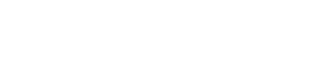

In [70]:
# filename = 'el_test_pr_3hr.mp4'
# lv = accessvis.plot_earth(texture='bluemarble', background="white", vertical_exaggeration=20)
# lv.rotation(15.0, -190.0, 0.0) #Rotate to Australia
# lv.set_properties(diffuse=0.8, ambient=0.1, specular=0.35, shininess=0.03, light=[1,1,0.98]) # make pretty
# lv.brightness_contrast_saturation(0.5, 0.5, 0.65)
# # lv.display(resolution=(600,600))
# date = accessvis.TextWidget(lv=lv, text_colour = 'black', scale=0.05, offset=(1,0))
# # colormap_list=['turbo', 'gist_ncar','YlGnBu','terrain']
# with lv.video(filename=f'el_test_pr_3hr.mp4',fps=60, quality=3, resolution=(600,600)) as v:
#     for i in tqdm(range(len(ds["pr"]))):
#         formatted_date = pd.to_datetime(ds["pr"][i].time.data).strftime('%Y/%m/%d')
#         # date = accessvis.TextWidget(lv=lv, text_colour = 'black', scale=0.05, offset=(1,0))
#         date.update_widget(text=f"{formatted_date}")
#         colours = get_interpolated(ds["pr"][i], 'gist_ncar')
#         # colours = accessvis.array_to_rgba(time_el_pr[i], flip=True, colourmap=colormap)
#         # mask_data = time_el_pr[i] < rain_threshold
#         # colours[mask_data, :] = 0
#         accessvis.update_earth_values(lv, dataMode=0, data=colours)
#         lv.render()